Project for module 3, CAS Applied Data Science, 2021-03-12, P. Meyer, F. Fürst, P. Hurni University of Bern.

<a name="title"></a>
***
# Butterfly Classification
***


### Contents

**[1. Introduction](#intro)**

**[2. Load libraries](#loadlibraries)**     
  
**[3. Load data](#loaddata)**

  * [3.1 Load images (x)](#loadimages)
  * [3.2 Generate labels (y)](#generatelabels)
  * [3.3 Having a quick look at the data](#quicklook)

**[4. Label encoding and one hot encoding ](#labelencoding)**

**[5. Train-Test-Split](#traintest)**
  
**[6. Building a model](#buildmodel)**

**[7. Data Augmentation](#dataaugmentation)**

**[8. Train the model](#trainmodel)**

**[9. Test trained model](#test)**

   * [9.1 Test trained model on an image from the test set](#testtest)
   * [9.2 Test trained model on an image from the internet](#testinternet)
 
       * [9.2.1 Loading trained model (weights)](#loadsavedweights)
       * [9.2.2 Upload image and test the model](#testnewimage)

**[10. Conclusion and Discussion](#conclusion)**


***

<a name="intro"></a>
# 1. Introduction

Goal of project: Apply supervised machine learning.
Chosen project: Classification of butterfly-images.

**Preparation**
- Download Dataset from http://www.josiahwang.com/dataset/leedsbutterfly/leedsbutterfly_dataset_v1.0.zip
- Unzip and save images into folder: "./leedsbutterfly/images"

**Libraries used**
- numpy for array-handeling
- pandas for define dataframes
- scipy for handeling sparse matrices 
- matplotlib for previews and graphs
- os for filelocation navigation and manipulation
- glob for filelocation navigation and manipulation
- PIL to read and manipulate images 
- sklearn for machine-learning preparation (label- and one-hot encoding, train-test-split)
- tensorflow for machine-learning 
- random for randomized loading of images
- simple_image_download for downloading Google images

<a name="loadlibraries"></a>
# 2. Load libraries

In [1]:
import glob
import matplotlib.pyplot as plt
# only in a Jupyter Notebook
%matplotlib inline
import numpy as np
import os
import pandas as pd
from PIL import Image
import random
import scipy
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

<a name="loaddata"></a>
# 3. Load data

<a name="loadimages"></a>
## 3.1 Load images (x)

Targets: 
- Load all images from folder into a numpy array  with shape 
  - [0]: Number of images, 
  - [1]: pixel: rows/image width  
  - [2]: pixel:  coloumns/image height 
  - [3]: channels: RGB.
- Create variables for later use

Libraries: 
- glob 
- PIL.Image

For more information: See https://pillow.readthedocs.io/en/stable/reference/Image.html

In [2]:
x = [] # array of all images
for img in glob.glob("./leedsbutterfly/images/*.png"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    x.append(np.array(size_image))

x = np.array(x)

In [3]:
print(f"x is a {type(x)} containing \n   {x.shape[0]} images with \n   {x.shape[1]}*{x.shape[2]} resolution and \n   {x.shape[3]} channels (i.e. RGB).")

x is a <class 'numpy.ndarray'> containing 
   832 images with 
   128*128 resolution and 
   3 channels (i.e. RGB).


In [4]:
# Create variables for later use
image_width = x.shape[1]
image_height = x.shape[2]
image_channels = x.shape[3]
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Image channels: {image_channels}")

Image width: 128
Image height: 128
Image channels: 3


<a name="generatelabels"></a>
## 3.2 Generate labels (y)

Targets:
- Generate labels from filenames
- Create an array with categories  from filenames for supervised learning
- Create a dictionary with labels from ("./leedsbutterfly/descriptions/")
- Check results 

Libraries:
- pandas
- os


In [5]:
categories = []
filenames = os.listdir("./leedsbutterfly/images/")
for filename in filenames:
        category = filename.split(".")[0]
        categories.append(category[0:3])

In [6]:
categories[0:10]

['006', '006', '006', '007', '002', '002', '007', '002', '004', '007']

In [7]:
df = pd.DataFrame({
    'Filename' : filenames,
    'Category' : categories
})
df.head()

,Filename,Category
0,0060050.png,006
1,0060087.png,006
2,0060093.png,006
3,0070055.png,007
4,0020104.png,002


In [8]:
# Get labels from textfiles
dictLabel = {}
labels = os.listdir("./leedsbutterfly/descriptions/")
for label in labels:
    with open('./leedsbutterfly/descriptions/'+label) as t:
        # name = t.read().splitlines()[0] # or [1] for english name
        name = t.readlines()[0].rstrip('\n') 
        label = label.rstrip('.txt')
        dictLabel[label] = name
        
dictLabel

{'003': 'Heliconius erato',
 '002': 'Heliconius charitonius',
 '001': 'Danaus plexippus',
 '005': 'Lycaena phlaeas',
 '004': 'Junonia coenia',
 '010': 'Vanessa cardui',
 '006': 'Nymphalis antiopa',
 '007': 'Papilio cresphontes',
 '009': 'Vanessa atalanta',
 '008': 'Pieris rapae'}

In [9]:
df['Category'] = df['Category'].replace(dictLabel) 
df.head()

,Filename,Category
0,0060050.png,Nymphalis antiopa
1,0060087.png,Nymphalis antiopa
2,0060093.png,Nymphalis antiopa
3,0070055.png,Papilio cresphontes
4,0020104.png,Heliconius charitonius


<a name="quicklook"></a>
## 3.3 Having a quick look at the data


Targets:
- Overview of images according to categories: 
  - count number of images per category
  - plot

- Display examples
  - identify first example of butterfly categories in dataset
  - plot

Libraries:
- pandas
- matplotlib
- numpy

In [10]:
print("Number of images per category in dataset")
df['Category'].value_counts()

Number of images per category in dataset


Nymphalis antiopa         100
Heliconius charitonius     93
Vanessa atalanta           91
Junonia coenia             90
Papilio cresphontes        89
Lycaena phlaeas            88
Vanessa cardui             83
Danaus plexippus           82
Heliconius erato           61
Pieris rapae               55
Name: Category, dtype: int64

Number of images per category in dataset


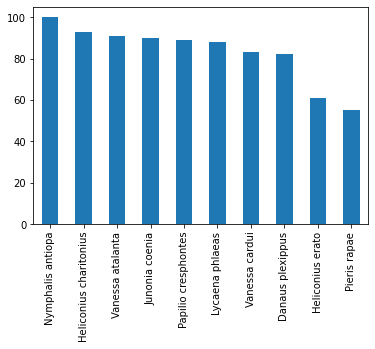

In [11]:
print("Number of images per category in dataset")
df['Category'].value_counts().plot.bar();

In [12]:
# First array contains the (sorted) unique values
# Second array (returned if return_index is set to True) is a list of the indexes of the first occurrences
l = np.unique(df['Category'], return_index=True)
l

(array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
        'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
        'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
        'Vanessa cardui'], dtype=object),
 array([11,  4, 24,  8, 29,  0,  3, 27, 10, 28]))

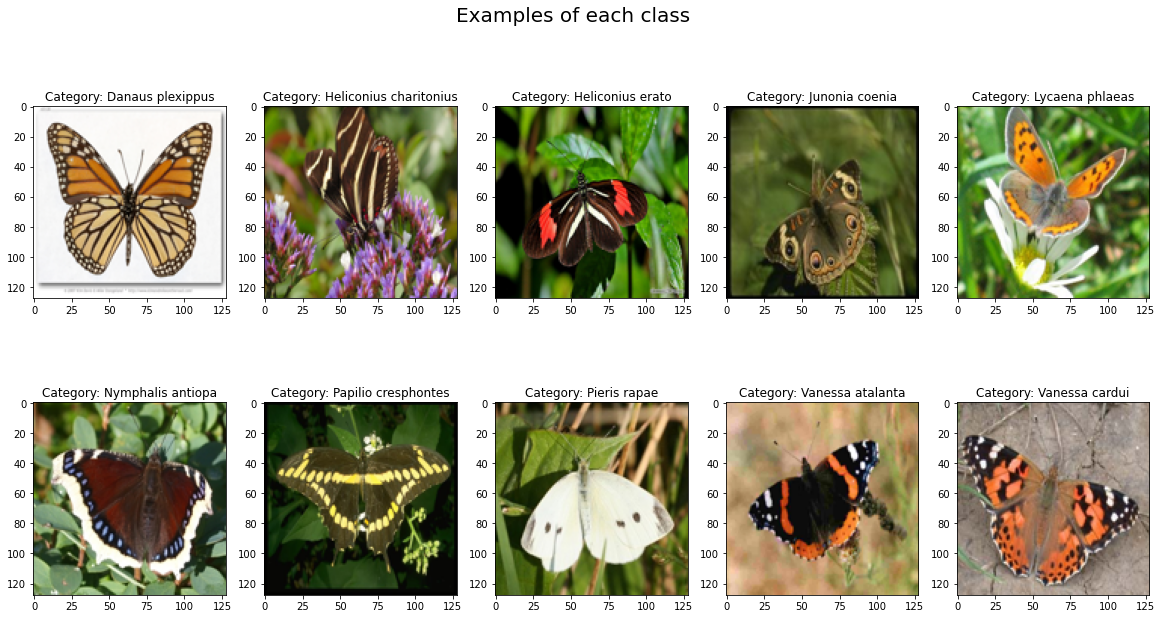

In [13]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs) # returns a 1-D array, containing the elements of the input
for i in range(0,10):
        axs[i].imshow(x[l[1][i]])
        axs[i].set_title(f"Category: {l[0][i]}")
fig.suptitle('Examples of each class', fontsize=20)
plt.show()

<a name="labelencoding"></a>
# 4. Label encoding and one hot encoding 

Targets: Define labels appropriate for machine learning 
 - Encoding: Convert Category-values from strings to label numbers  
 - One Hot encoding: convert column with label numbers to a sparse matrix


Libraries:
 - sklearn
  
  
Further reading:
  - https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
  - https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

In [14]:
# Convert Category strings to label numbers

enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])

In [15]:
enc.classes_

array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
       'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
       'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
       'Vanessa cardui'], dtype=object)

In [16]:
df.head()

,Filename,Category
0,0060050.png,5
1,0060087.png,5
2,0060093.png,5
3,0070055.png,6
4,0020104.png,1


In [17]:
y = df['Category'].values
type(y)

numpy.ndarray

In [18]:
print(f"Unique labels are: {np.unique(y)}")

Unique labels are: [0 1 2 3 4 5 6 7 8 9]


In [19]:
y.shape

(832,)

In [20]:
# One Hot encoding: convert column with label numbers to a sparse matrix 
y = y.reshape(len(y),1)
ohe = OneHotEncoder() # Option: sparse=False
y = ohe.fit_transform(y)

In [21]:
print (f"y.shape is {y.shape}. \n  [0]: number of objects, \n  [1]: number of unique labels.\n\n y is of type {type(y)}")

y.shape is (832, 10). 
  [0]: number of objects, 
  [1]: number of unique labels.

 y is of type <class 'scipy.sparse.csr.csr_matrix'>


In [22]:
type(y)

scipy.sparse.csr.csr_matrix

In [23]:
# If the type of y is a 'scipy.sparse.csr.csr_matrix', then calling tf.keras.models.Sequential().fit() will raise an error:
# ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'scipy.sparse.csr.csr_matrix'>

# Transform sparse matrix into a (dense) numpy array.
if isinstance(y, scipy.sparse.csr.csr_matrix):
    y = y.toarray()
     
print(f"Type of y is now: {type(y)}")

Type of y is now: <class 'numpy.ndarray'>


In [24]:
print(f"x.dtype is {x.dtype}, y.dtype is {y.dtype}") 

x.dtype is uint8, y.dtype is float64


<a name="traintest"></a>
# 5. Train-Test-Split

Target
- split data into two groups: training and test
  - apply split to the images (x) and the corresponding unique labels (y)

Libraries
- from sklearn.model_selection: train_test_split


Further reading, see https://realpython.com/train-test-split-python-data/

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [26]:
print(f"Shape of x_train: {x_train.shape}") 
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (665, 128, 128, 3)
Shape of x_test: (167, 128, 128, 3)
Shape of y_train: (665, 10)
Shape of y_test: (167, 10)


<a name="buildmodel"></a>
# 6. Building the model

Target: Define the model with layers to generate tensors.

Note from ML-Winter-School:

    In feature learning tasks, usually multiple convolutional layers followed by a pooling layer, and fully/densely connected layers in the last few layers are used.

Library
- tensorflow.keras

Further reading: https://keras.io

For our model, we mostly use the rectified linear activation function (ReLu) for the following general reasons:

- Once standard functions, Sigmoid and hyperbolic tangent activation functions cannot be used in a model with many layers due to the vanishing gradient problem (error gradient created by each layer will become too small to improve the model).
- ReLu does not suffer from the vanishing gradient problem.
- ReLu is computationally very simple and does not need a lot of ressources compared to other activation functions.
- ReLu acts mostly like a linear activation function, making it easier to optimize.
- It has become the standard activation function and is a good function for most models.

In [27]:
print(tf.__version__)

2.0.0


We will now build a *Deep Convolutional Neural Network*:

In [28]:
model = tf.keras.models.Sequential()

# Some convolutional layers followed by pooling layers for reducing the dimension to decrease memory

# Conv2D: filters = dimensionality of the output space; kernel_size = height and width of the 2D convolution window
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation = 'relu', input_shape=(image_width, image_height, image_channels)))
# MaxPooling2D: pool_size = window size over which to take the maximum
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Reduces the number of dimensions
model.add(tf.keras.layers.Flatten())

# Dropout layer randomly sets input units to 0 with a frequency of rate
# at each step during training time, which helps prevent overfitting.
model.add(tf.keras.layers.Dropout(rate=0.4))

# Fully connected layer
# units = dimensionality of the output space
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
# Normalize output between 0 and 1 with softmax activation function
# Activation Function: softmax for multiple class, sigmoid for binary class
model.add(tf.keras.layers.Dense(10, activation='softmax'))



# Adam: Efficient stochastic gradient descent method
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), #0.0005
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

<a name="dataaugmentation"></a>
# 7. Data Augmentation

Targets:
- Rotate and rescale images to augment the data
- Verify data augmentation

Library:
- tf.keras

Further reading:
- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
- https://keras.io/api/preprocessing/image/
- https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

In [30]:
# Create augmented image generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

# fit parameters from data
datagen.fit(x_train)

In [31]:
# choose image id for plotting
id = 0
x_train[id:id+1].shape, y_train[id:id+1].shape

((1, 128, 128, 3), (1, 10))

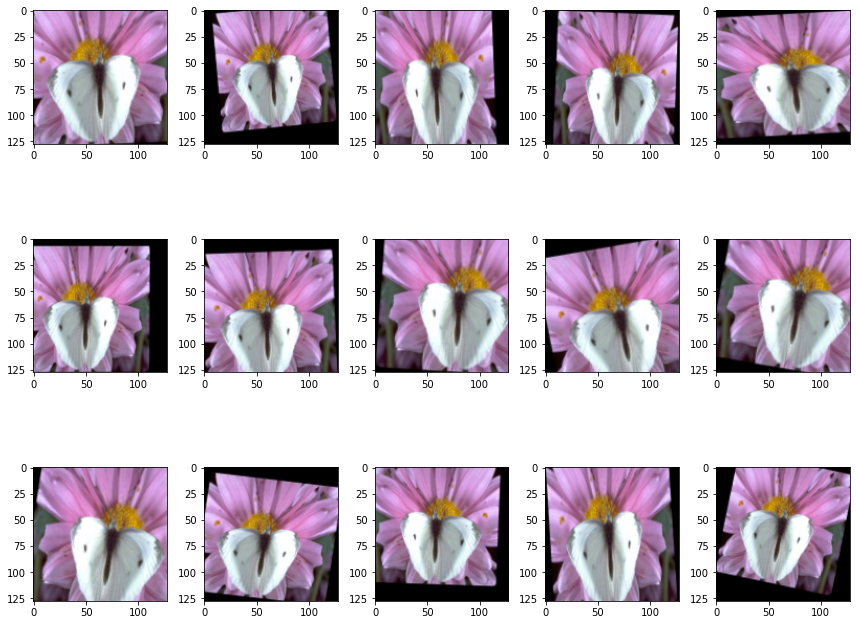

In [32]:
# Plot augmented examples
example_generator = datagen.flow(x_train[id:id+1], y_train[id:id+1])
plt.figure(figsize=(12, 10))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<a name="trainmodel"></a>
# 8. Train the model

Targets:
- Run model
- Save modell and weights for (potential) future use
- Review training loss and accuracy

Libraries:
- tf.keras
- matplotlib

Further reading:
- How to choose the batch size: https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu


**Warning**: `model.fit` does NOT reinitialize trainable variables. Every time it continues from the previous state.

In [33]:
## Load weights before continuing training
# model.load_weights('save/butterfly_32.ckpt')

In [34]:
# Save the state of the trainable variables after each epoch.
save_path = 'saved_weights/butterfly_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

In [35]:
epochs = 60
batch_size = 128 #32, 64, 128, 256

# False: train the model with the original data
# True: train the model with the augmented data
aug =  False # True

if aug == True:
    # Fits the model on batches with real-time data augmentation:
    hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                 epochs = epochs,
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

else:
    # Fits the model with the original data
    hist = model.fit(x = x_train,
                 y = y_train,
                 epochs = epochs,
                 batch_size = batch_size, 
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

Train on 665 samples, validate on 167 samples
Epoch 1/60
665/665 [==============================] - 9s 13ms/sample - loss: 15.8543 - accuracy: 0.1128 - val_loss: 2.4122 - val_accuracy: 0.1557
Epoch 2/60
665/665 [==============================] - 7s 10ms/sample - loss: 2.5660 - accuracy: 0.1188 - val_loss: 2.2860 - val_accuracy: 0.0958
Epoch 3/60
665/665 [==============================] - 7s 10ms/sample - loss: 2.2842 - accuracy: 0.1158 - val_loss: 2.2484 - val_accuracy: 0.2156
Epoch 4/60
665/665 [==============================] - 7s 11ms/sample - loss: 2.2270 - accuracy: 0.1955 - val_loss: 2.1480 - val_accuracy: 0.2934
Epoch 5/60
665/665 [==============================] - 7s 11ms/sample - loss: 2.1224 - accuracy: 0.2707 - val_loss: 1.9537 - val_accuracy: 0.3114
Epoch 6/60
665/665 [==============================] - 7s 11ms/sample - loss: 1.9128 - accuracy: 0.3504 - val_loss: 1.7180 - val_accuracy: 0.4371
Epoch 7/60
665/665 [==============================] - 7s 11ms/sample - loss: 1.7016

Epoch 57/60
665/665 [==============================] - 7s 11ms/sample - loss: 0.1637 - accuracy: 0.9429 - val_loss: 0.3502 - val_accuracy: 0.9042
Epoch 58/60
665/665 [==============================] - 7s 11ms/sample - loss: 0.1739 - accuracy: 0.9414 - val_loss: 0.3198 - val_accuracy: 0.9222
Epoch 59/60
665/665 [==============================] - 8s 11ms/sample - loss: 0.0782 - accuracy: 0.9759 - val_loss: 0.4598 - val_accuracy: 0.8743
Epoch 60/60
665/665 [==============================] - 7s 11ms/sample - loss: 0.0617 - accuracy: 0.9759 - val_loss: 0.3983 - val_accuracy: 0.8922


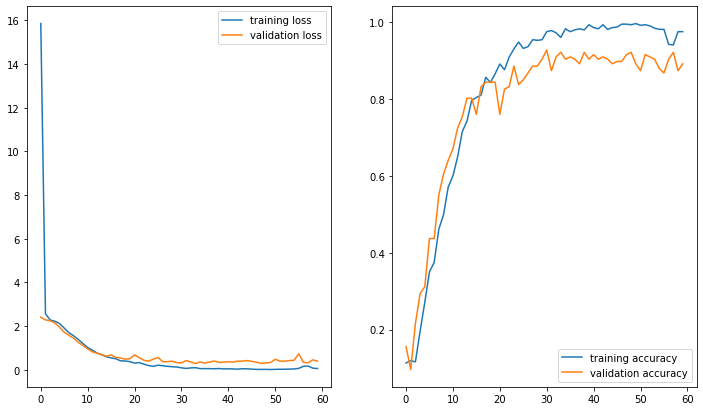

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12,7))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [37]:
# Compare how the current model performs on the test dataset:
model.evaluate(x_test,  y_test, verbose=2)

167/1 - 1s - loss: 0.2074 - accuracy: 0.8922


[0.3983107526412981, 0.89221555]

<a name="test"></a>
# 9. Test trained model

Targets:
- Test trained model on an image from the dataset
- Test trained model on an image from the internet

Libraries:
- tf.keras
- numpy
- matplotlib

<a name="testtest"></a>
## 9.1 Test trained model on an image from the test set

Predicted label: 3 (Junonia coenia) with 99.90% confidence
True label: 3 (Junonia coenia)


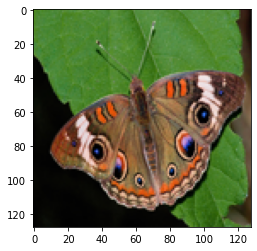

In [38]:
# Choose some random image id
im_id = random.choice(range(x_test.shape[0]))

# Test trained model on image with id = im_id 
y_pred = model.predict(x_test[im_id:im_id+1].astype(float))
# Print the index of the class with the highest predicted probability
print(f'Predicted label: {np.argmax(y_pred)} ({enc.classes_[np.argmax(y_pred)]}) with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
# Print true label
print(f'True label: {np.argmax(y_test[im_id])} ({enc.classes_[np.argmax(y_test[im_id])]})')
plt.imshow(x_test[im_id]);

<a name="testinternet"></a>
## 9.2 Test trained model on an image from the internet

Targets:
- Upload image
- Run model
- Evaluate results

<a name="loadsavedweights"></a>
### 9.2.1 Loading trained model weights

If you want to use only the test scenario without the training, you can load the model and the model weights. These have been saved during the training process. Load them and re-evaluate the model.

See https://www.tensorflow.org/tutorials/keras/save_and_load?hl=en

In [44]:
# Load the previously saved weights from the checkpoint

model.load_weights('saved_weights/butterfly_31.ckpt')

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

167/1 - 1s - loss: 0.1660 - accuracy: 0.9281
Restored model, accuracy: 92.81%


<a name="testnewimage"></a>
### 9.2.2 Upload image and test the model

Targets: 
- Check if our model can classify images downloaded from google images correctly.

- Test what happens if our model tries to classify a car, a house or something similar.

Library:
- simple_image_download

In [40]:
species = 'Nymphalis antiopa'

from simple_image_download import simple_image_download as simp

response = simp.simple_image_download

# Google search for variable species, downloads 10 images
# saves them in a newly created (sub)folder ./simple_images/species
response().download(species, 10)

[========================================================================] 100%


In [41]:
# array of all images from the links above
final_test = []
for img in glob.glob("./simple_images/Nymphalis_antiopa/*.jpeg"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    final_test.append(np.array(size_image))

final_test = np.array(final_test)
final_test.shape

(10, 128, 128, 3)

Predicted label: "Nymphalis antiopa" with 100.00% confidence
The model has classified the image correctly.


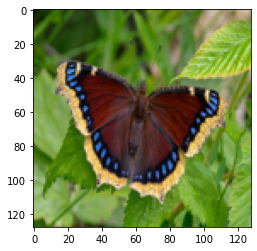

Predicted label: "Nymphalis antiopa" with 99.92% confidence
The model has classified the image correctly.


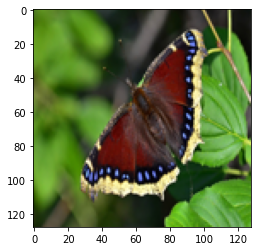

Predicted label: "Nymphalis antiopa" with 99.94% confidence
The model has classified the image correctly.


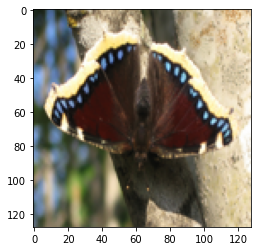

Predicted label: "Nymphalis antiopa" with 99.94% confidence
The model has classified the image correctly.


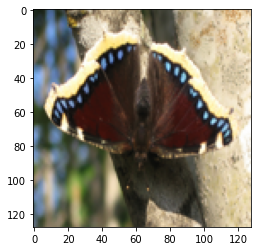

Predicted label: "Nymphalis antiopa" with 100.00% confidence
The model has classified the image correctly.


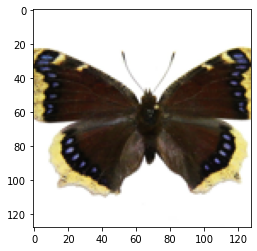

Predicted label: "Nymphalis antiopa" with 99.99% confidence
The model has classified the image correctly.


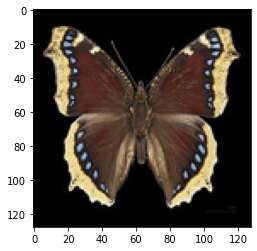

Predicted label: "Nymphalis antiopa" with 99.98% confidence
The model has classified the image correctly.


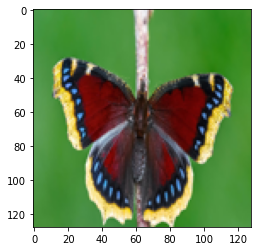

Predicted label: "Nymphalis antiopa" with 100.00% confidence
The model has classified the image correctly.


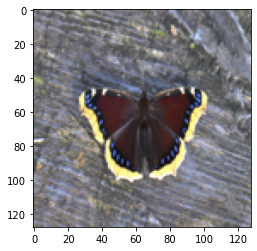

Predicted label: "Nymphalis antiopa" with 100.00% confidence
The model has classified the image correctly.


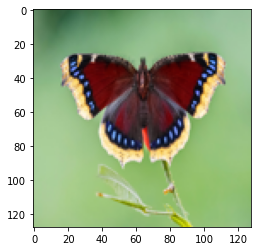

Predicted label: "Nymphalis antiopa" with 99.97% confidence
The model has classified the image correctly.


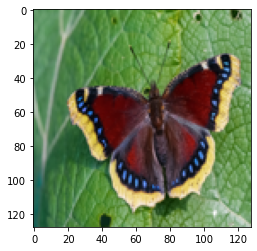

In [42]:
for i in range(len(final_test)):
    # Test trained model on image with id = i
    y_pred = model.predict(final_test[i:i+1].astype(float))
    # Print the index of the class with the highest predicted probability
    print(f'Predicted label: "{enc.classes_[np.argmax(y_pred)]}" with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
    if enc.classes_[np.argmax(y_pred)] == species:
        print(f'The model has classified the image correctly.')
    else:
        print(f'The model has misclassified the image.')
    plt.imshow(final_test[i])
    plt.show();

<a name="conclusion"></a>
# 10. Conclusion and Discussion

**Conclusion**

We have sucessfully created a well working model to identify ten different species of butterflies. After loading the dataset from kaggle, we did some preliminary analysis to get familiar with the butterflies dataset. After labelling and encoding the data, we created an usual 80/20 train-test-split. 

To build our model, we used the tensorflow.keras library. Most of our 14  layers are activated using the ReLu function, a standard function for Neural Networks. We also created additional images through an image data generation function, but did not achieve better results than with our original dataset.

We ran our model through 100 epochs with a batch size of 128 and got a validation accuracy of 0.XX. We then tested our best model on random images downloaded from the internet through Google images and also received mostly correct results.


**Discussion**
- Why does the model not perform better with data augmentation?
- How do we better identify false positives?
- Why does the modell have highly fluctuating validation loss, when data augmentation is enabled?

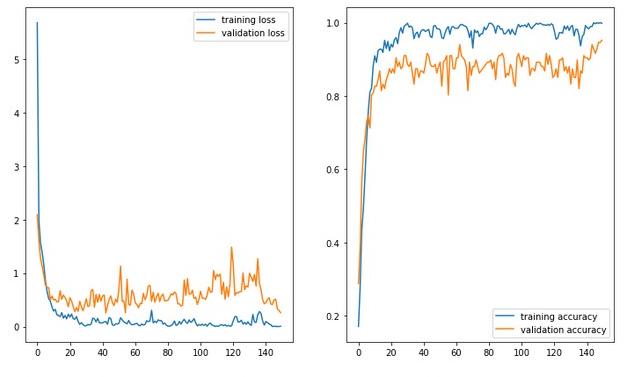

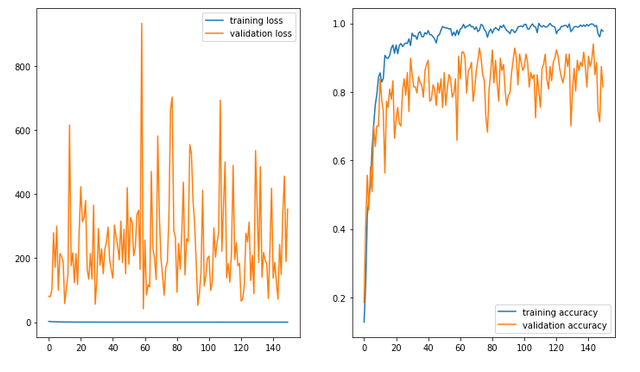

In [1]:
# imorting "Image" from IPython.display conflicts with "Image" from PIL package
# (if you want to download some other images in chapter 9.2.2) ...



# Adding pictures directly into the notebook increases notebook size. 
# However, we do not need to worry about where the pictures have been saved.
# Method used b64 encode: use online-tool https://www.base64-image.de/ to convert

from IPython.display import display, Image
from base64 import b64decode 


a= b64decode("iVBORw0KGgoAAAANSUhEUgAAAoAAAAF5CAYAAAAPuJtvAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7P33l1VHtu+J9uh/oHuM+8Pr2z3euef1rXtsnapT7pQ3qpKqVJKqZEreewl5gxwghBAI7733VlgJ77333iSZkJkkSWLS+0zm+35mrNi5yQIZkAGxJ8xcscLMmDEjVsR3R8SK9b81NjYa1NDQ4AzhV1dX5+5z585lOMMZznCGM5zhDGf4KmIILHcxnPe/uesrpqhMzBhKVypDGcpQhtL7h28T1dbW+jW9U4bq6+sTV4YylKFrmWpqavyajoniJNyFqHlfcqn0tQBAOvYLKZsBgBnK0LVN9A0RCKUDok/r/K5Gov+L5fu2lS1DGcrQpVHs/+gf0vHQZ/04vGoAYLqSuOOv4UwnmKEMZaj5j8ALgcGrmSgHZYz9IO5v60xnhjKUocujr7tv+FpmAKH0TpDrt6WDz1CGMnTpFDu8eI2A8NsEkuKP3kix72sOfjOUoQxdmxSxUVwK/rr6v68MAFIgmILEQlVUVPiVjo8ZwOrqau8cM5zhDF+bTF9A/0A/UVlZeR4o+jYBJPq6qqoqLxMAMPaLF7JJhjOc4WuD6QvKy8tTfQPENWKlr5q+EgAYwV9EtRCFgiOyzSwBZyhDGYqU/ouXfuPb0j/EH8HpFO+b+2coQxm6dimuDKTjpq+avnQAGIEfDODjOmbMGLv77rvtkUcesb/97W92//3324MPPmj33HOP3XvvvRnOcIavYb7rrru8L3jsscfsjjvusNatW6f6km8LjRo1ysv59NNP+5X+76GHHrqgPTKc4QxfGwwWou+777777IEHHki527Zt6/1GxFJfFX1lADDO+OF+4403bMaMGXby5EkrKCiw06dPy33K8vML3K+wSP5Fp6xQfvi7n67h/mSGM3zJHNuRs9pZ8D9hRRdg/JvSNrXFDH91fOLECTt1KnnmCwtt5cqVDgQhlkWudopLOa+//rrNnj3b8vLyLDc318tMX9jcHlcS87zw3NA3x2ehqDBw8zhNz0tT3G8Dx77jQmHNOcZN5wvF+2Ic+qXYP6Vfz2Pqpfk1rZ4uh9P7zSYO+ZwuPO6MO8YN8dPuoz1Scj6N09vQl2G/L59TZdI12CCtHiJ/TtsXFRXZ8ePHvR+kP4DXr1tjD9x/rzU21F35ADBdueZuX8aRV7t27Wz5ilU4rb4+ORMrjVkIYZeghySeTIZyz22GMnQpRNuhHUWmnYX2xB1LjGp152C5G6oTfzbt18dmGCjeXApzafYAs/THj6MvQs1fmuLZQi4cf2il59M8z4vRheI1z+urJPInv6jHsWPHrGXLlu7+NiwDx7K9//77tnz58pTf1UA8L/TB9M1eO/xxpu2qzekvcVLPVSqcm9TlqiX0P698KQrlDxwoxqVmsRmM+/JsgHyk8BwkfI57Mdd0pj9Jvzbo6m5F/1Qij4txSB7LrydVHHVROP3mufLAiZ96NuegN+7ggs+3Y5JHEPx3HJ3fPAU901TzclC/XN0GjckYkrKNmGckKUB62uYMhb6v0QEf12NHDtnLzz+rgHqrr6s5r4++mPtS6asHgKJ27drbsuUrvcARAGK82CC4NgeAuPFzI2coQ5dA3t7EsTNuakvcqW02CvTVVypAD1k9s03hyI66+qTjSm98CLuEK89BHPDTD/v8vACQ9OnPFRuHm6eNe8liPF44+KIU9UwHJ9/EHrWDBw/aiy++6GW8WoDSpxFlwLZXMwCEvWXxJ4yH7uaWOHAq3B3nOa9aQn/KRm01lYWBXT7O4TlMjxfHrTieXZ4NkI/UC3BKhwsw/cOXAgBDPxjrVz819TcCHPKhDy0N7AAoxieewpN7XHCUEyjJIwi+OH/jFPRMV4lyxDHlPACITaJ9YtlE6WmbMxT67QQASsa3DgC+lwYAGxwANjUM/ODYQNxwYu4v/wHK0LVM3t7SuKkt8XCKG+Xrv9QarbK0xM6cLrKSEl2Lz9qp4hI7XVJqp8+eEZ+yM2dOfeErXFxcbGfPnrWysjLdn3E30/5cWQbE79OY9PFKfJZFucJspUAOTHg6x3yay2vOLFEiq7S01JdguWKDKONCab4MRncYkJkOYPfu3WvPPffcJc2SXol0NQPA2Dd7tx665SYWpT9fMW4gBkz46ijnxYjyUAI4lE0FZ5D3wT4M1lCMx3gVmfvz+5wvTqSN9j3fxmkVkfRf57OCmiJ/TlK6C/B5olI3CuPZdABYkbDuUxGTqzh6RW9FbOKL6Xx+giuC0tWiLmIdh78B56SrHON+Hgq4qWkGMCc7y154voW740pPpIu5L5W+cgDYKK+2773vAND96zDd+QAQ4hrcGKHuvEafoQxdKsV2lWpH6R40zvoGqygrt7xj+ZaTk2PHTxTY0fw8O3LsqB07nm/5Bcft+PE836fxxa/HfU9H3N/B3i+WOLmPe0BivItxTM/eMdz5+fnujyzu4ezsbI8D4MP/6NGjLhu/5vKaM/oQl3TIJg1XGL8LpbkcjrIjkzfgOPYdcQaQ+29iBvLLpggA2QazbNky97uqlrZTz0qaO1SVU7pX8CYiTO8O4746ifLEUqTK5sAvfcYnhOGKoAD+Msau5nKjzCa5ia2bZRTjNPP+DEpknceBXFYUiHe8NkqrBtkC4HKef+KOnCIFpPtfjKF4vQIoqhV7I9xNADAUmLAL8eeh0Pc1AcAjR47YC88972FXNQCsra9zI7VpJwC4bIU89f8iADA4MCabpsPm7yZpGcrQpVLskRKmUUVOvHgZqejk2eClP/Hh9fYZPT3uF78yixWBTFwChnDzjHwWx3h0BCz/NgdFhMUZpSg/xomdx6fxhYh8Il0ozeUw9khnwCszgoRBhw8ftpdfftnvvw0A0H8Eq5wXAoCxzFc0oWLkSKl7NfJ4bc4OjmDur06iaLTAVCtMzf4BABMQqPLFeJQ2xnezXCZdTG5z2TFejMvTS0/A9cvSI+qQUiBWdYNCWG6Wn+sXwy/Gn4M+Z7SvjYLqYJbQlrnHHnAMi3aP/tEdKBrrQqz0ST8Q+7usIzn2/PP8CL7aAWBdg9XJq/V77UPnJ3cTAAwgMJUCh3capWI2lqaFZShDl0zNHjhvZ4Fjc80TADx1usS9aZM1+lMN17M8qcdb14vxOXV+n8ZQBHEAASgCLIBbOhi6EEPxCpHmQkuIxIny4j0dCtfP4rivkPi449u3zeNdLiO/OTNbyXJz7DsOHDjwrZoBvOoBYEJoGrSlfYkdDIlVNl/Cc/9IiV9c2ruKqanconQAyPJnAgA9qBl/GRRlxXEynSPFe+LQK9CzAP7YBcz1sp8gCUc+cuFU3qmMVX79Jx/C0SHqm4pDG8FM8d4Dm6jZrYjIka8MCi/AULqgLy4Y8Id/vI8cbREovTzNWMJiP1CvsQbXoexj9szzL/k8Qp0wVHo/cTH3pdLXCwBV4AgA3e2cEA5/uIoVBAhMC8tQhi6VvF2lcdL2YFpYgwYplnl5rb+6XvcK8c5Mf1IdWVqaL856sAXM0mf/ADYRBHwWRcDH8xQBEW5ABWANOVzTwR/x0u8/jWIc4qfT1wW+WNpm3yFlgvft2+cAEGqu09VI3x4ASDuhPuijAUBiX/qTnwNA4gR2wus8j6udKJDYJymwAeVOOIZ9FRRteBFbRm+eVjSBI1iDL5DkghTlXIiRHeXhjnl5D5FEIiyCTtyEO/kysezFTCFu+hs4Ck/ZjhQwz0Y6f0V2/byU0hFd0C944fLyu4tSAxCD33n2SVEsZ8LebmCNQkk/EF8+PHDkmD39/MtWp2hgqPR+4mLuS6WvHQDGl0BShSeuODhk5PhWURKWoQxdFsUGltaY4g+Pej1uAMC8EwV2prQs9dDC1WqKNfKg/dYpzsWu4TEOvw0vdG3+kEbA9fHHH/vyJ+GfxpEARrxIAEUZ6eFZWVk2YMAAf3EjHVw2l9ecoRifly8mT57s9xF8XSjNF+F0ulA4exCZAYxlYgaQJWAovRxXK1GGbwMApD+W5mINdueq9JDAAEG1ExUjDnqwl4o/ka96ouwJpwO/88DfxfgyCftFURewZ/RqYkBE4ADaP5v+XkYTx/4wyKRHCyAlAr2oXASAEQRiGScHgAlHAKh+04UnaZtaDkwbS9rZNw0A3QjoKr18cgr9mmziRXB/VkzgoG+0XeQmiuWNMpGHG2lKnQYAn3z+VatV4qsaADJ9yTQmL4GEN+DSjnZww6rAujQZU82opkQe7AMMxrj8ImbomiYaUFojwkm7ohXW6Q53Tl6+A8DY3uDqGj14xNEfuqKLMR1fldowV+7T3eSBjNjmAQIM/nz78bbbbrP27dvboUOH/J6XL/bs2eNLooC4tWvXOgOOIF6UACxBvD3LyxLbt2/3DcMQb+6Sljx4eYM4mzdvdmDIbB5HwzDTtmPHDk+LLHSJYdCzzz5rQ4YMcTf78rZu3epv5fIsw8hcs2aNrV+/3nXEjz1769ats/3796eAzRf5jiUzgOge+w50+7oBIHnzHWIoHfjG+oqzt1HHSMy8Yr94TSf8oJj2vffes6VLl7o7hn1ds6yXRRQ5xbKN733TYMcMYAL+CKJEEQAAFrz1Kw4/+NPthn0j2G9uz0sl5GDLKPfLpFhXjEfODbpPBu5zKj95n1+OJF76AP8pdCEbpPy4wA36gxjERT8uyTUQEXheaG8wgIRr1CHy+YSIuPRIa0xfBamspYfUmH0ugXWNyAwAB5dbRmN2Y0O113lsAwAXB4p+PIpSsKdGajQwpcU9F11jvnBNndqJy9YzJxvzEzr8jFa8iBnS6FLq++/r6rMIRZU3y/3MYsoNnkEb2GVRxvoyXctVCPpqbCZupN2HMYRyki5QaDfIOlcna3k7Cf0A8XABAJ964TW351UOANnASOfXdARCDXujcHgrCO4aRUpMEAztb8OokdXRCDKUocsgGlBocIG9U+ah44GmnTXa0dxjdvzkaX+ocwqLbd/RItuVXWR780psd36V7cqvuSjvzKu2Ldlltq+wwe93H6913nyk1E6ql0RmpAgUAFX//u//bj/+8Y/tww8/tFmzZtk//dM/+WeBhg8f7iDthRdecH7llVc8LeDhN7/5jcu49dZb7fe//709+eST9utf/9qBGWCNzyxCfE7or3/9qz366KN23XXX2a5duzzdO++84/evvfaa/Z//5//pYAuKIIVPNY4fP947VmTffvvtdtNNN/mnHAF1pOPzRXypY8uWLS4XXfjM40svveRv+UJx0PysDorwKwUARqJ+4n06UIl+8XqhsxabD0q4GbwoB592WrJkiftj7yZgcYUTxY0cn584G6L+u6a20Sr1KwlrwFXqyVVihVULG3BAsIBAM7ukg+wvg5CDfDhd5pchPxbd20UycIc+JMmPsISbciNOU//yaZTe3iKl7rlgN1bNfK8d9telXrnpStpA5IFO5MezDDwTO1gPujZxEyE+MuMy0ojNFSCIf/CRnEbOS0VmkCHYp9xow4SRZ1gVoS0ErQBB+AfVYz7RHa/VNU0nftQ2NqTcMCssxIlEu/ky6vTzk5QUkHPQTx2w51u+0UYeXiPwx4RVg9p6AyuXNYpTrx8+PA3n2xSAF0htpxZbKgQGYMqvPin/twwAnvNfvwBAQquThwbbwUx7AgAxEm8NR//YMC6/iBm6donGRMuiM6ajSh7Uej2odSW66uGtq7D8ozl2trTKitXguoycafe90c3uaT3A/tZqkN3Resin8p3vDrO/vNnfbm812G57Z5Dd13603fR6H7v7vRG2+GCpD4o8B3EA5EpH9vzzz9v8+fPdb+HChfaLX/wi1aEz67do0SIbN26c/Y//8T/8eJpNmzalAN6NN95oI0aMcFmvvvqqTZkyxeM8/vjj7vfEE0/YBx984HGJx/PHrB3gDQJ8/MM//IMfIQNFMBMB4MaNG+1Pf/qTy9qwYYN/m5LZScAgYBVCBvr94Q9/cAAa6WL9wYWI8G8aAEabc43umO+qVausU6dOtnjx4lT9ReBGHOz07rvvOrCL4ZQDjqA6ymS2N/4I/jrK9WURtXIxpmQ8XVW68cEKdtCjsjfo2fKlMQ2GskH64B0B4JdB2D3KhXDj19z/UiiWEQ6SVMfJDKAf0CsfH7cSxh3iyeXgizYQ2sXFCB2jnn+vu9ICPAAINQJg2LZeMhknCQvJEiKfyGgSOd0fDkRSuDYBbBU1bIg5P2VQQXmpjzTAvPJmNq9R4DDIIkx9BzrKC1+CwKdh1qzGZWIFNIajLQGAkdiGg5/7iwGSxEUHP0kk7QcDzPMTn6+vlqQk9e0AUBqhs3SLZXCPCOB8drTK6nStlz/htY3nrExJq3VDCUjnxIwfaRwAkpbShh9KpIsA0Mt/tQNACtvuvXebAKDK7obgRhynVCMILJMdq+UgDr8ImiRmKENflHhivXWpralhNQeAdbirrTA/zwEgi4Bbc8vtk10nbNbeYvvkULXN3F9qs/ddnOdnVft1zsEKm7H7rH1yoNwWHKmxeYer7ICyo5tiiTd27BEQPP300zZq1CgHXwAM7uPMUJcuXezOO++0zp07289//nMHbyyz/vGPf/RwABngkWVhgAWgjVlD/MmD6yeffOKzdoBDQMq0adN8lo70PJc/+clPfPmZzjW+9QtwJD4zfn369PH07FNk5o/ZPoAqL2gwU8k3ezlAmn2J7B1s1aqVL2Pz3JOO62cN9MS5EmYAoaZBNxDuXr16+Qzn7373u5RfjMMZhrfccouDaz7iPmfOHJcRASIU9ccOzAAuWLDA40C0g/S4VyJRUlortRivzZkSwrgZ8HwWw2d+wjJYQ0OYBICiPeIz8GVQep1FSq+nyyEkUK4axnldmayAXL6utbqlBiktV+L6Up8P8PKBvQ/6/ET7SGcyYhkdjufEwXW1YYYpkmcrxrLpHCik+bT4sT5Zvo316USegE4BXinUlFDAxO/1v7ZaP3B1G+Vx9azkqJAg+lW0BQhVCSFiI2/7vvSJTH58CeglM2BRF/RwWVzT6hP3l9mGLkpkScHIi/IkZcJbpXAGrKJJeWWF1TTUe1tQt+9XmHKXqjBsDQL7xFLwA6IJAGILwUaeFYUdPHLUnnnhlVAfVzMA9EIK3bZv2/rvAWBCNIY4/YzBWEU/I2NR+MsvXoYyxFNLa0qYJQyYB5vGp/95+YVWUl4THlLFKhPTDpnQT3Ven8LpcXBXSCaQiu4/vQ3HwR9ieTbOpgEAWUaFOMwZNzN+0Pe//30Hfzt37vRZOejhhx92QAcBAAGSACeWbekYCZ8+fbqHf/TRR/b666/7EvFdd93l4QC+//bf/ltq/yADM7qRfuzYsZ7X9ddf73EBesw8ohdABr+uXbs6CIzEjOX3vvc9BzhfhOgjrgQASJkoW9SBfCNQ5uUblsIhbBR1YmYQoA5NmjTJ6xOKYDpSvOclEOoZiu0gvb+8EgntfBBKu0aOTxRxYMpEcejHGfRL5aA/5z6WM/4g4P5KL3sktERrylElByAm3Q5/Zw+Fe9kANw5wLp1IjQ3pU2hFuD0PrrJl+Kxq0pbExCccX+JyxT/EiRwIf5eTxgBdv4orUV9Xn6rj5I4gyN9MrVTE+ipF0P8Yn21+MX+uNHFOUqAPhYuVnv4xgumgi54lAFAys0l5musE6E7vN9PdXwuhUBr78OHXegd/JeI4VsCshZQkjD9jCYCQslMf2AZRXv7zAGCwAXQ4K9uefeFlj3v1A8BztecBQN6spGCRGYMxJFPRGGniyn32cufhPhjX1WCyDGXo0ok2l97eIvtShRj3voPZAQCqd0uFiyvU/hz0JL/AL8S1NXTNSie3t3e56Rz4NRfu1baTmZ4INLjnZYsf/OAHvi9v5syZKUAFwOjfv7/96Ec/8r123/3ud32pkRdCmAEkHCAHAKQzZAZu4MCBvkQbl3gBLMjkGQScPPXUU54ny8K/+tWv7I033rB//Md/9BlEKC4BMwOIXsh98803HXCy75DZRl76YImY5WdmvlavXu0vhLAHkXtmMPmqxxch9LvS9gBGkBIJuzOjin+0E27KC6Bj1pbleuoKoo7jlXhxwOrQoYPPoHq/KP/m+VyJhFWY5Uh/JiJzr5Lob53VVWu402BGfJ6GU3LQEhbvLfA+HRtEO8Trl03ITa/HL4+CXEpK2RjMzyZXtozwhBPmeQvwRR2izT5LI+JfTHd6jcN6RIcv3m6TV++xw6XnPN9KRfU68LaGPcVkj5+YdOjFNUhN4jgHwh9OB25wOsAF8LLyWVcbZu0Ij2GoW3i2ztZnldpxBZRLtM8eigGP1Hu+/iw9eNb26Vqk+/nbsmxTVoEDWmSUCwwwa0y/i2x0Rg5lpGcqlRu8kE7Y6os+O9g22jna+kL2vhARC47jhZKrmvWnQbrr/qjs83yPiTZg7iZbebTCXu891l7oNNh6TF1kr/Ucbs+27mq9Rk2zvbmnvP34HkklZ3xoqFVJfflYBgIANvjT4i/uPcdB0LqjD0zX9WLuS6WvYQZQA0/bVucBQKov1ZAS5i1xGsbYdUftjpY9rFT2qK+WyZpEZihDX4i8XYlpb81ZzSu11JFfeNLOlpVbZVVNWJ7Qry4e9M9DtHM6Yq7wp4EW4qV39rxpy/d3AWfMFNGxRQCBPwxIA2TAcTaJGbf4pi1vryITcEJc0uMX32rlyhI06Vmi5QUUAMtvf/vblIyoM0CMN4Uh5LBHMO7vQ0f0jZ+yowzkCegDxMWOKpbx83TSxL+S9gBC6Xni5uWbv/zlL14ebBD1ZMaPGU/syiwp4PlCxEwhoPlf/uVfHDDG9J/XRt8sMdpJR2fdprM/PWqPDcChcmusKfMBkZmPXHGLUavtZ890tBU7D59XVtyR0t2XQ9Qd9UD9fLnylT5ZnqO0zPbwNKzJLraTcjPDA2Bq5OUQZm8YyDWgYx7ADBxa1cWJ9oCezXWlTMXyem3YQvvJ833sz28Nthte/NAmr93vM030BL6PLs4i+VUeypz8sXZT3kSMHIg4MMvYxHOwpyvlgQ/lFaWAGNcSmYHxOq5ulIunrNhhP3+qnS0pCLNfACRkUu588bsTV9kPn+lid/f8xB7uPdv++Hpvu+3tPvZkhyG2YHe+g0JaD3xGvPOU2W4JypZ75Kpce6nrWOnRtL842gibRbt9HopxaYMw7vgcfhoRg1lMQLKf7kD5MBZ9heqZck7ekm8/fOIDu+ntIfaLpz+wp7tNtFYj59l97w20VqM+tmFz19mDL7Wxj1dsdlCMHESEF4pk0RQAlDReHFEdfrsAYLMZwDqVGwPQmGAGXIhfGQxZIwUA73t/mJ3hibv88mXoGieakD+zYjq4yDQvruzb4CDooqJC3dGhqDNmF3PSMPn7Wczelej2JQu5/EeiHuYIiKD4fDBYQXFQTH9uLjRQQrEDixTDm4OkKKt5eohzAnlp4+abb/Z9hRH0pMe9kNwYL1L6PfFjGgbgdEov14WI8CthBjDdrpFiGQHMDz74oLvTy92mTRsbNmyYl3327Nm+7E54ev0BkPGjHPEYmHh/dZDqNQUudJti6ps2LGhQHwCgHN5/7xc6eHbAHPt9q2F22wejrdWgSWEJUEx4sA7L7djq/PZyHqXndx6RN3qFICQwE1egfIukErNP1BKPbxxr4OZiuMcffeDoZpCGuQ+RwrIk+m/Iq7Kn3h9otz7/vt3+fHsbu2CrAxdAkoMx+gGVi7RxfIt5Rz7/JlxinJQOchTX1luOFPnDK31s3P4Gy5J/1483228eb2Wztx11UAYQoxYi06r8McI8CQfiBslJXeo+5sUV5qtHpEfupkMn7G9Pv2GTV+22E7rfK88cZZanAg3+ZJlNWr3d9ivDJ3pMsO8/3dFajlvuwB/giB7YpPXoT+xPLfvY4I1F9sqYVXZX+zH2SVaNLTlWb68PnGa3v9LBnu881F7rMdr6zFhhA2avt1tf7mx3vzPA3hiy0G55baA98v4Iu+eFd23Lvhy3D88WM4zoy30k3DD+2DzWIbpwzxXgWiIzlClSnEGNaaI8OJ2Ic1Z/TinCaQVSz+SPXQmjzA93nWSvT1hnW2Wf8RuOur2Y/c5Lrr4UrPg+Qyq3r4DKnaqT85aApbX8jmQdsuefb+H60Fek96MXc18qfeUvgXCNbwFD9RogiRUNH0h+sgodxJh1ef72ZZHsESsmQxm6ZKIBRU4jOurwc67eigryrOysfn7yK973YfBwejS/xLb6aZx+flbspPz8pwQcRdDH8wDjH91QBAXcAxK4pgOT6Ma/OYCIwKS5TKg5KIv6IC/mFWe20tOly4yEH+mi38XipM+UQenuWI6Y5kpbAoaibbZt2+bL5v/zf/5PW7FihZ+zuHv3bg9nTyUzg+zjZImdF2eg9D2A2CGWgT4wHgMT+8Wvh7DzJTIjXWOdxqfwNqfXnNSmr26oT+BHXYUGtBoHI3s0Wt7/wSi7+a3+tuZ4lS3OOmM3vtXHPjpyznotzbHluTU+MNfWAqd4HpK2gPCQVXjeyJ4jM9wfPYJ/YOwpViJcvMfefd46+80r/eyuduPsUMk5H+CZ2YovIABqQk4if+Z1rzhl8jyhyISXCC1y3asEB6UkeqJXeXWdA9jNCrzu5d72Sr8ptuJQqQ1feNBueqm33d1pko3clGcHhYPJizei9ZNPLmYCa93NzBHgiDwba/ijYNmWkRC9KnSPNeAyuckP8NBt5lK7p1VvOyY/QBVQu+vMTXbLq91tj9Au4GKbPN+fvNbeGL7YFh8qdpDh58slYEK56QcqhlUN+Qtw0vJcrefrecrhcRqq/Z483hg8w371TCe7r8tMG3fQ7IbWo+y61/rZTa2H2R9bD7Vfvz3Qnhm33v7ccYq1n7/fbnq5i23LPutgCQD0waS5dt1z7WzOnlMOnJGLPbEPTPmW7zhgnYeOty4jJtoL7XvYQ6+3s1Gqx4GzVtpDb3a1kQu3ed0+0X2yvTVohpeLc4WRA7MXkfrhx3c8kJ/juz5atcfBV7bCxy3f78vQzDTuEnp7Z/gC+9sbvW17UaPXNTKj7XGHliEPQLxkout6VcR1z3W26TtPhBlLZYT+O1WwUZtO269f6mVzj1R5XaADcqKOpEcm9nXCkc60bWfFAgz62AMA3G/Pv/C0u+vqwmdEI13Mfan0lQNAfok1HQStItG5Ep5wMLj8GuvdaGPX5wsADrETarMYM84QZihDX5xC23L2x1P3Im97tFUaV32dncg7auXFpz0e5zP59HwSh7g8xBdj/15wcvW3IOXmit9nNV1AUPozAzW/jwAiAqb08Aju0gFY3KcGEIv+EbghC4ByIVlQupzm4C4Ct0jRn2t6unRKB4IxTpwVg9DnmwaAsVxRp/RyMmPK7N9DDz3key2ZNWXvJW8/QxMnTvR9l8SDYhkpSyxPLMNVCQBhyiRVsUrTBn6oXv/OWbGKFwFLp8mL7bZ3Bth+mZIBMV+J7mg31H70fG/70TM97da3+9u6I3kCi6TkzdFwlIqbgux0ZdaO2wb2f8vhs/EEyY0/QKW6qtQaq2t9fFhRUGq/fb2LvTV9t/217XgbsGCbgxjmJMuVlNlBwKk/mz7jGI47AZiMWbDJWvYabQeFBkgzZsl2u0Mg5552o21rXo3P/FAuljOfG7XSbn1/vIMLgAALk7tVyLcnrbWfCyA88eFYy9ajx6Bf68e/ADEEjpVfhcAs9vPmAYNwBTC8PGKeWGaX9hfW2JzNh30JdBu2e7enDV+wziUR74zAI+D0sQ/H2LtDZjhA6rkk237bcrjd1nG6PdBhrO0XMCwTaAU4xLL6fB86cZSL6xbeVj0j2yIXRQCN+G09fc5ubT3Qui/KUnkn2j/c2cpeHLPO+q/Kt1aTN9oCIdG28/faPz7Q2lqMXm57lebFbuN83z62Grhkp/3+xXY2P6vYQWsN6Jfy6j97+tleQ57kRbmopyJ55FU0eJ3Ax0rPmUzh5eu9LEc/Ksb4zB1tgLrEXsjAfnXsxVPdIm/MvPX2s0fa2se5ZoM2lNo/3fm2jd+Y7/Z8uNtU+/1rA52n7y22k2oKxWrQ2N3rTIw8B8/JuYa06yk7ztj3H+tgt7QepLbW6GWctPqg/eXtofb7V/rbW6MWuh/xz1WqFSXPSyDcaKqHJI5D/KhKsYJgxiHFDW95AwAP2AvPX6MAcNyG4w4AC1QjVIrbJkMZuiRS2/J5Arhp2YN2xSwdv8gZX7Kzj9rpIgZ1wExon8SlYyHVxZnwABLjNZ35FQkIAhjwPND2caeDjeazZenLwzEefhGYEB//mIZnLALBdIrxY7x4TQdf8UpcGN2irhBxo1/Mk2tMi/tCecf06RTzbU5XwgxgpAuVJVK6/ujavIwXKjMUy/DNAcDLo3Q1Y9sMFGZR2k9apUH6qO/7e7bzCOs+fUVqbxeD67yd+dZj+jrbIOT0er9p9nDHgXZQJqnUE0KbQz4vmXKqCfvAyY4nq7ymwqoEEPVzzJ9XsqZ6qAVXifNjdZm657T94Y3edljpxyzdZX94tZutE6pgJgr9iM8zzSxlo8APUAFwuiK/wa57qZf96qkPbLEQ3iohul8+1cM6TNtuLw9dIjn9rO+aE9Z5Wa61n3fYfv18L/t4b6mXi1kjdGH2jDJuLay3v7zT30aszfY8oXPnylQKPi8pMEavw+DPeXL8uPRz5dCHGcIAaABLA+fush8+LH2kS7cVR+3G17pajtAJAIWynq4OgGXUwk1211u9bYdEPTNslb0wZqMdlv+NL3e3iRuOGT0ZelRKT2R7y6UrVHz2s+Hn4WJmSpmA8jBd2k9cYre1HWxHZeTFe4qs/6y1li11AbzYjethJRwyd4WtPXrK/VYdKbM/vNbTnh6x2H7RopNN3Hzc2FCDrl5XAoARyCdZed7oAAMCuecq7Of6AfSQPWt/hf3p+Y6Wc7rCZZVW1bqeUimUS574A9bfGvKxfe/Jvnb3oK12Y9dl9rM3J9njw9bZ+APmeyinHKq3O7rMsoGr8x3cIYM80BOdOLzcZ0prFdpQ5Xp0n7baHugy1R4fMMduaDXURmyvsOsFIttP2WQL9p21g0VlsqEy56BsjhkDsKmxhkmExOiwA8HmTLjYV6Pkwka6Hj2UZS+3eN7d9XyNJe0hvJj7UumKAYCgXww+YdMJB4B51AOhTSIzlKEvSE0PIM2IDoM2BdOJMDTjf+LEydQn12I8UgESAyUPanMmPDINNXHzPPthqURLKD4bXAFUUHPwFymCDcIi4INiOijO9EHEI06MxzXKjUAwApF0kJMO9qDmACimifnG+3SKYIa06cvcEGFRp5g26h3LfiUAwFg+dIi2g9GRF2UIj+VM/2Qc4elLvlC0QfNyX60A0JdjIanLG+9ozQ8j9qkd0Xj3u7dG22/fn20rZZbb3+xjM9ft8Vmc9AEe5n5jTpXd0qqvzc8t93sodZydmiljJC2Q+MgAFDFAM1gDDuCtR89aoUzOBApJh28+abe3H215Qg7sG7/xpQ/sT2/2tSc7TbBpa7I8TrC0fsQIcPEFi5zqenug01i7u+ts+2u7CTZ8a5X131Bnt7Se4rN9R8VvjVtht7YbY/f2mGl3dxxnPWesd/CXkoeyyZo1er02epHd13m868wTpxHNKhsq1c8EABv8xP480p4IabSqmmpjf9oRRXpt6FL7/uM97J7u8+w3L/e2ESv2edl5cQDQSUsj/y3Zp+3WtwfbTCl7c/uPrNviYz4z2XnycrtNYLjlkDnWfuQnri9pyLFCmQAIVx08aQflyazV3lM1tv1oicukmVInj3QZZe2mrU2VFb8oo7I2zN5RHlo5zNI2dTR841H71wffsnaTV7lsn/0TYyu2DFBufiTzVJAe2YQjO3KUVyVdAKbYlY9f8lLo1GUbPY7vwSOeBPGpupqKcpd5QCjuwU6T7OH+q+y/Xhtvv3tnonVdXWK/fXeGXf/uZHt18FzfR/nYgCXWelrYu7l85xEbu3KfLTt42ioQ4i/xqPXxRY/6ctfz1T6T7fXRyx1gvzh0vv2vu9/yHwjMTmIjr03e3vW0sEqhthFnOgOpMGkcpg3SOOkLwt5zAGC2AOCL7v72A0BHv00AcPLWIrvjncF2TPVABWQAYIYui1INrckJ8+j5hm09sHn5OXbq1ElvmzyD/LLnrTj6BB5Cd1yMvUeUxMR9rlK9Fz0Z/vgleUM8E+SRDtDSKQwOTeSdpsAH5wJy5bDhCRMmeFhMDwDhoOZ4Tl8k3MThzV32r0XigOf0e6g50IpAkDwjOIqyOVZm6NChf6drjAeRbwRAzSnqHfP4pgFgzDed0vNND093x7pJL3fzMhMWZV2tAJAHgEN6acfs36aEAAmAweQNx+w/XhxmP2o719qvrLAbXh9gu0+UeL9drrhcq0mqtFV6Jg6erLWb3+ptE3bk+UxPbWWFnWOkpykpXkN1ow/Mk7dn210dh4mH25i1R4wPDG4Vynhz1HL7yTPtbdLWXF8SZObm3Zm77LG+n1gxz5xk7s0tsqkCoa3Hr7DfPvuh9f9kvYOosrpGX8ImzdztWXbb671ssZDKsyPXWOu5R6zFmB32wuDlfoQNogCh+aV1llve6MuTgA/Kzmwl+fClKvafgUiK5bdciODnym+JABbgFXBAXmz+zzpdb28MmmV7JRiwhP1oFexjQyZ5bVKC294fI3CyRTbqa4+8O8CKFB67Eq7oD7F8+bcO0+zhkdvs+lYTbXZWg4OuPScq7cUe4+2B9qPsj6/3t3Wngg6xPIv2nbbr3xxivdafNk4AfaH/dHu291TLkRu99hWV281vdLNZh0pCOilH3r6kzRuruuPe/agv6YOb/ZOAtfUHck0qeNsgTz8ORj+EZS4vJ0x8yo40us0oz1+O0JW4/keyK+XHTO7L/T6yloOme9sgDYHM6vrb18IO4IblQsB/eH2ILRJi7DRphQ2bs8nLeOP70+yHz/a0+VuOeDtoNWaVtRiwwHbJII98MMx+/lJvu/P90XaoqDoswbJMzldsGqvsZFWDf+mp24KDPqtKfaw9mG/HFAV7sh+QfaSxLDW1unGdGl0nbJgqjzvCJdqiySaJjeg/5Mg5nGUvPXetzAA2A4BTt592AJgj62HYDADM0OVQeltLb0r+oW7anh6/guPH7MxpFi3UAfhr+eq++O5lvR7zOnUbbFq/GNcoPHKV7jkTze/pJeT2jb0SkwYqmi/zRqDAPcewpIM5jnD5v//v/9vdnMXHsSvEJR3gLzc318/r40oajm3hmBaIOHwhhDd/AVmEE4Y7Hh/DzGcELtzjzywdesTnOeYH9e7d28EMYfgBMAmHIxhCPrrG2bE4k4bu6eAS+qYBIGUgb/SJ9QFFPaFY1osR4bG+oiyINLEMVycApByySfK2LhozA0OtMhg/L+D10NB19ocuS+xfnh9tT/Rf4mBJrdnKZT+3GIkQIy7QI3F/57HWe9k+H0AJQjKT5SAGTLI4p9j+1LqPPTd8rr02aond/FJ3azNimd3VZoQ91G2aXd9urLWattYBi542azFsib06aoUDjvhGAwCEmbyByw/bXa36+4wX4cyioffbgz6yl7uN82Xrt6bvtDv6LLLfvjPJ+i/P9bSp4zn8DWjqj7qVED6JRlmUB2XzkUz/+XIVT9yT3Sbbm8NmeN5zDpy18asP+AHIK/efFXDtbC2nbfWZpGHzV9vO3NOuU2mFnnldpx+ssD+8OcBWnmiwjXkVtudYqduGfCIQw/aAcYDFcyPX2b+1GG7Xvz3aARz25Oi0AsUlj1vaTbLO8w54eSnTLiEY9gj++9MCPP2W2zqV47+e62W/eKmfDVmb6zpPXrPL/vJ6Z9urojIW00arqslN7dX3D+oZ1y9kX/FUXlyrBXg0eiuOWPoxXqMruB4GALJESln4DKzXdxpTPiXxuneijBhUhcUP2wyev8X3lqIjs6WJ2T0tL92wLN1l4TH7q8BejpLy1i11jeZdZ+/wo1koD9xv3i5/uWXw2gL741uDbdJRAcc3htr45btCG6K/FuClbo+UNtgfX+1jM/ZXuqzqemEUlZ9ykTf6k4a9ply5B/yx+kN9wMQLBcTRpHdMH9nvMaiIY2BeeL6FXGFcSO8rLua+VLpiACCdDBX00Y4zDgCP6AmnsWQAYIYulWg6tCEeztjx8Ijhz6AD4+aLGBWn9Ruaqf+ybCGtXeLN+qm9Qtc16lFW/T3jD59ZHa6n5Ve4TOk3qtfaILfae80hyQxn8Hm71zMB83YpIIdPsUGtW7e20aPVkefk+Fc3eLv07bff9nMAif/P//zPHo9Pk/FJMahly5Z+qDMvKHBYM2cAIpcDpfmMHAc5A6z4nNz/8X/8H/azn/3MZ/5Ix6fjIA6E5sBpjoXh+SQvDnXmxQbOCeQFiAhgAEQAm0GDBrlMiDdfiff73//eX44A8PTt29duu+02PyCabwUDEJ955hnPg28Jcw9FwHQlAEAogrZI6S+rpC9tRz2j/lAEi1xjmhgvluHqBYDSX4Mi2lKySpWbgW2zqvHmt4bayM2n7b3Ze+yfn+xnb03Z5mF19bzmkTxrzIhoYAMwnJbHi6OX2ysT1vig7XLk+GjjMZ8tOi0zPzFglt3TY5LP+jHojvx4s932VDvrPmaeL81+sHCv3dZ+mM+wFSrNPZ1GWo9FO60cM7OJUOx6ijfnltktr3S2JRpMmKkBuPJCwE0vdbCPluxwcDR46xn7/kuD7LtPD7T5QoRnXGmNRPwI5E1n/zEoaXw2ku+9apw659OAlFAsQMBMGLr2mb7KHvpwuB2U+/UpW+0vrUfYcRnuk+359hMB2R+2Hmk39Ztn//jAOzZw7kbXEUmAnHazd9mdH05yu3D2XBTP+MfMn4M/efHVLI4k6bbwiP3y1RH28uAFvt+O6IrtV2zTauoOu7NjmDU7rfRvDppn93843YZvqbBfvjLYnp+yy3737hR7ctA6e7hLsG2r4Qvshc4j7KQyQi//fUzF82xojHbmZGgKrDBWS7BpeDoIC+0kfWYPEenM6B/dQXSyBOo3XCWb/PBXJKp1xb48+8PLXW2jjIytsAd5HlfmWeK9ivfs6J32xOA1qf2P5E0ZsHGJhPBNYfxHbS60v3SaaY8OXGX391poe+T3VJ851mrkAt+7eqa61vhcHXHnbsu1v709wDapUqhfZKKrH/6PviLKEcsLMMQf84BlyNuj8SeJD8XbaIdop/jy4MEjWfbsixwDcw0AQO8g0gDgtJ1nHQBm6acTFZgBgBm6VKLp0IZgf3jTOAJAHjg+vVNXVqwnttAOLBprG0a0sr2jW9rOIU/bjhHP2nbn5y7CL9iu0S/7deuw52zvuNdsy9AWtnfs62ZHNeA3lJwHLiIg4MsRLKdCv/jFL/zbsjwzHC+yefNm92PJF+IYEkBI9+7dHQDyebJ77rnHQQrn1P1f/9f/5TN5zN7xGTe+0gEw4+BhDm6+4YYbXA4EYJw6darnwQHFEEeZ3HHHHa4bXyf5+OOP3R8AOG/ePHcjGx1Y/u3Zs6ft37/ffvzjH7vOuAF9lAFASf4Qzzpgkzw5VBqKHf6VAgAjxb2JALioC4Q71l866IO8f0urWyiWLwLBWIarFgAyGyZGW0pUWdfos28cgXHj2yNtv4IXH6myf7u/rQ1ake2DHm/3EjdYABlyV4e3KltO3WL3D1zge6jWHCu3373Ww65/rZ/t0ui7YNcZ+/UrvWy5UAsDMOnY/1aghDzDpJ+6/6z9/pVOdrC00Y6oym59f6gN23DEj35hQ+G5OvZmMqaYHSoos3vfHWRj1meHmRrJGrTyoN3yRh/L1eNOHvNy6+2WDhPst68MsYMKF8wTgFUpQKw1lEZXbMA+L5XLv4kLEPIepVH4UKVUXuxdW7Yn125r1c8mCUje3mepXd92oi81Dl+y2657c4A9NmaN3dp/rj04aK492XWM5Uh0gcRwduI9XaZZq0nhjd9zNQqgOcKSC/iLDNggztJj9Xbds52sz8z1dkp6+3eKk3GUpclZEvqHVwfYBqHDwXM22R+f+dAWHGr0Wc873x9rP3ixr702fa+Dqt882cf6rS61J/vOsyFz1rsN2AJD3p4potVefayuxQYqM2ZRMPXCzB6RaiuBSaHeK4SGEOHAVcEw8SNDrMCEN1+JoNgpkJnYWH4cpQXg/UubwTZiS5GDU8yyeGe23f16R7uzZQ+7vdVQtZth1mX+YW+b5erY0QGACvkn5pQXdpurRvOnNuPtxy8OtnZzsnz2tM+CvXZPh3G+35ASwCyp9/tkiz3ywQgH2GclK4hDr6Af9nDMKl/YzSBHdfKGOoy/ly+dkgTJxWUgO84sHsjOsmdefD74Cbg2748ifRl9yJXxEogvkzX6r4kIALP1tOPbJDFDGbpE8samduYdDD0Xs3EsVQmIKCg7VyCkWL8d68vs1J5Vdmz5RKtYP9FKVo200+vG2sn18PgL8ok1461o/SQ7s2mqnd44xe/hip2fWGPeFjXrqhQIoO3H2SS+pwug2759uwMkiC908Lk3wOF3vvMdmzx5svv/r//1vzwtX5Vghm3kyJG+lw+5ABeWgI8fP26rVq2yW2+91T8Vx+wg3whmOQE3y7HE57NmfCc4ymDmkM/IMTMYgRxXnl8OO2ZmElATZ7k48oR0fP2CGT30IgywuG7dOp8VZM8is4t8zxgA+uqrr9rjjz/u385Fj/R+gqVrAGCkAwcO2IsvvuhxmgOuq5Fi3X9TANCbfhozEKcPWjCDLPuXuKb7QwzQ5zioViM+Ly4wKFFbbabtsPu6zQoH36qaeOlgQ26pP09M3cTvu3sxGf8kgjPuPlyWY9d1+siWapR9oOtEu73LVLuxzRgbsa7A+s7bZw90GO0gRXjRlWBVzCf2ZEYGfg4gvuXND23u3lzbJBD3mzf62/SsujDbIvBHGSgfe6fOKu4TvaZZu2nrfSxh+fCxvrPstXGrHQywfHhYAQ93GGSPvz/ChAVdDj1DJMpDOdzLUQyOhJXecQtX+ewrLLO/thpkr806aNd1/Nh+/OoI2yKB3WdstGd6z7BdKsABZbw654xd/0JHWyCU0WtNvsDhYAHQPjZhY57nD9XVhBkwiXbZLKWiC59NoyxnFdBr7GzbfqTQx03CoTqBYOIVSr0H2w2137za2371fCc/1JmZQWYYP5i4xP7jkVY2fvcZB+LdZ2yyX7aaaN97qb+tVB1iG2ztAApUozIjE3YKWYVrcyZNmt5cL0zRhjBGRDrPSjqHfAFj9/aYZm1n7/AfAXwi7oNJS+3udoNt1pZ86z9jvb07Yp4tP1zi9iutqotqeHqu/uKSrhuP19uTPabbdx9qa9MP1Xr7XZ5TZb97ZaAtljGQD9ijDb4w4BN7rvsEn1XkEGnk+PgRfyCI8PMyevljWbgGL8Ir65gR1w9Loqix0F78uYis6Fy9Lcl58MjRb8e3gOnovigAnL6r+DwASPoMZeiSKTY078h4wpLOxQFgOMMv70SBnT2rrpHNziwD1+g3X02+OE9R1SvU6/48Ljqf69RF+VUyanStUhzc9ZLFgazNCMDE8i/LvNddd53P9OEHSAKcQX/961/9G78ARmbVeJZYAgY0AiT4Fi3Enr//+I//cBDF58lYogWw8WUKZusAc7/85S89LgRQ4zvBgE3cEMCNZV/2HgLeOOwYAgAyg8ezDNDkinxA4JYtW+znP/+5z3QxO4i+LEHHmTS+fUvZIqEf5WB2kbJEcJcBgF8tNQd73KeDwObhMOH+FiPn1/m+JOqhzmrqKn15jGXFF0etsueGr/QZLPppQEMpUSH/gUX9kZHu8VezoGVMOFBtv/twqrVbkWfXvzfK1gsYPjd8uT3Qd7E90nuB9Z2z3QEmb4LWsxZK+kQxZtn0dNljnYdY17kb7JPcc/aH1qNtwXHlrTD09hknB2lBp/Yzt9lD3af6ixNs3gcQjdlVFkCO8mC2Z/zi1TZ9+dYU8OHcviTLFIDwmyDWnZHcPPKgrbLU2mLQQvuvtyfbj96Zav/8TD9boQxaj11pLQd94mCDMhyvqLcHO4+xx2W/n7460N4X8J20/aQdlgLYknKcl4nIZ5Z1hSlj1MvLy1W2JgybE4acVQcKrN/Kwz5rSjlLklnYtYcLrd3omf7mMPvljkvAowPm209f6mF7isNh3eyhc0zpHMA8PwOS4ib+YnSFIe7JHJabuE4x7nmsRCnAlPB54E/PiASjC+3tranr/dBt3PnCX/d9MNwGrznibYU4lI/6Q0ckQWSDGz/sRJlOSCkOlv7lo61th9oD6Q/qevO7Y+3DeYcCwBSvVEP70xsDbcraQy6bGeZQL9ItOUsRisVpKhNl4YpnyBv9ajTegHwSbxFxpAweyUPoJ0fof1ZWtj3/XNMqSHpfcTH3pdIVBwBn7C7JLAFn6Euj9LYWGaKpxuaan5tnp4oK9WzrUfVX+dUSa4r19KkrqNXjz0e707mG8ISZmqhXS+U8C98fow7ADzZTm66p9U3TEQRA6UuMALD//X//31P74phtY68ehw7/9//+3/1TY8T/b//tv3l4x44d7dlnn/VnCLDITB9AkCViXtpgxpCl35deesm+973vpWb4iMfevvhZM/JBp9tvv90eeOABDxs8eLAPMoA6lpEhlmLjDGDsiNCBr2MAWN966y2fUUQO6QF/gLcnn3zS5Q4ZMsSXq3G/8MILPrvIPkcozihmAOBXSxcDeA7uxMz84Uc8/wa2rvGecA7a5acSf6vUFump9fPGHuw5096dEcAaR3L4PijQEANgtZ4RBkrOuwPJkUiDNuBn8fFz9pt3h9vPBP6eHLPM955N3XbWvvPMSPvpO9Nt/r5TPlOITP13phUgBpBH3u9PE2DsN88G7KizP7873nbr0WPQjq2Ft0PZJwZYnLCr2K5/Y4DtkUqzdxy3G9/oazukD4MyRCs8VVkRyiA3/uXKR//1aDeNVZIaHElY8BORKehCgz46tJ65z/7fFiPsN12X2fdaTrBJQlnPDllo705Y7vsaARJnxG9PWW/fefA9az1hqc9wRSCDKBeu7PTwi6VDrfoZgY7GGhUiIf9OPvZ14BTAX7QXDBECeIGpAloiZYQ5LJrZROIStr+wzlbsPJZ8ySTUldsz6gKLuPUb39spDh6BcNP/+ewYtkvCm7PLQ4Y4gibPLaSBgUvhJ3qo2wnbC+2mtwb6bNwKtZFbWva0xdllvlRdU17iAJg2SNt2sOw2awKuWKhcumHntkOm2gNvdrHjpNX9GaV5afhSazkhvFx0XAnu7zzVnujziRUoQkpt1xeJib7uFsUIcCS5uY32dpYHKQC2KRnUSupTcGRWb0cPH7CXW7SQW8/dNfEWMA1ZRlGV2ay9ZXb724Ps0Jnw5hDpM5ShSyGaTtrjej4r0NuW+GjOESs7KxCmjqvBZ+zU+cS9KUmcizIdjgQS3fsDnm2SJX7p5B2IKIKf7Oxs3/Pnz4nCeFOW/XPMyPH2Ll+cwJ9lYmbZAE/skcOPt3n5tix7+QBZ+CGH9DxrzDDGL1aQjlk/0rAky149CODJHj9m7qJuzP4BJiGWj5kVJCw+2+zl46UZCHC5cOFCzxM3+a9du9bmzp2bet6RhZ68gEI5IqiL8jIA8Kul2EzTmXYfOfoxcEY3HMNo0gySLK0BJFhGzFaRbnl3hI3eWuT3xAEo+pMV9875bLrciTeRkLPxtNk9PabYP7X40AbvOOkgbdcJs5+8OsHu67faDhQDNjUWKC3J/Lw3MU8MX/WgZc7bX2S/eGmAXffWOHu81yxfxvRZGkwtEMqSdUlNneu2NLfRj6dZrYStp2yyZ/pM8ZkvyhPKGsBtelnLkhlAKMSB0CYYiaqL4f68sydOP/4AdpP219t/f6CbtVxwwv7Se6kN3m/2UJ951nnWJgevDjDFYzfl+Rc3tpyo8Zkr9joyI5madfMKwJ4KAMxwPp1+mAJKnbCz/yAljP4jZeagm/7Et7crKmv14yz4wxx9FeqHq9QHmcRAL5DAFPIQFm5TYSnwggyXw70opkcuhym7JZtsdh67TP2BPX1gZMPhB0fCKhvAf6O6st89381WqrJHrcq2v73Vx45iTMWxatV0AoQDSU4CACvUgPzHSV2V1egHPvW+7kCubdyf63WBOtj/g1k7/SUc2uO4pVvsDy/3tY3qlojTWEeqKDu2dd3HGbzIaeRe+gNTr5jSmWRKG8YX5Ojq+2xlL/9MX43lHt5rr7V4koyld815fcXF3JdKVwYApDHLKDSbj/dXOAA8cKouAwAzdNlE8+HB41GjPdEtwTzYtDo22R47lmNlpQEAhpjhfDdvo/pzQeZBpk+Q+1O5GcWjUSB/FhAmikAhUgRkzak5gIIiQCMsvnwApc82QtzHPYjpoC4S99EvXpvLhJqnSyfiRt1j/unxyZ/7qEsGAH61RC6R0wFfuh8zfxEA+qxfvQYo3fssoXzPCg0wR/1SjzHWccIS26CbG17vb3MOVvjgGWX5p9YctKjMdRXCAYI6ajp11apvedPy2Vv1ZJ/J9p9Pt7UtegjxOyVw9mKXGdZ5wtrwXDawlzAs/4VnN2zqZ18h+ZRK1oyNBfbnF7pbh/ELw8ya2MEJA6nyp0z48dWK+ztOtjv6rrJfvDPehq3Z50uxhHEeH3LDUSXkm5RDIDLkGxh36k4RiON/QmS/YjPA6ar8Rj+Db9TOCrtPwK/D8lN26wcf2dBFu312iWVIjg3hjWhe3gAMlshsSA8AqF4iaxz4hG/4EqBrAwBQrPsG1UvogAhHJwEl5U9Ur2NPo3j+Y7ZGtiAtgfjTC1ZJXyxArqStV5sEdp2zilq+YEI69YEc9ufyQ7xErAg/+hFAFm45U/JJo7AkzXkUBZwXv4mjM9322ARtsiXy7g/GW7tFufbowCXWacLy8MKOGtY53tbGHip8qo3LCFyR4fXneum5kzPOLlPP1bU1Xm8jNp+xP7w92l8EaT10pr3Ud5rPzDIjWlcrW+kau+S/A4CpcuAXwnxsILhSilfTJgkL8ej7XG+/xa7SDeZtc9k079BOe73Fo0pTFT5NmtZXXMx9qXRFAUAqes7BKgeA+06q4eLbJDJDGfrilLQfLjya6SCQVod/bl62nT3DPr6a1K9mOnQOe/0sip0CRMdcW9Pov6i9A5BwHgmegwhm4uxfBAb4R8AU3XA6UEwPj0R6AFSMD3GNwCpS+ksX/jwqTnreMPHTdYz7/aIO6c816WOaSLhj2iibcqILhF+6DCjqmgGAXy2RC0w/mhocmzH+AD44PQ7W5w1PZtfGrtpv//ngO/Zk30+s/9rj9rd2o2xlfpidqalLPnfIVLj68fq4BOyDYZBFS2BplVm51sMm2/M9x1q+7vEHL5Sq8z8FXlSahnOlSiNQImaArE3NwKCgWOkY/PlcaJ6YAby4plyAVfmybQMAVVVnFZLLWYGr8xrszm4f2w+e6Wa7SsIxNrRstIPRAWb2LcywhTGKJzWGh/xDeTwwUcfdIpIxfgGUD0s4c+RPD5pvr0w9YH8U8Jy2IbwhjQSSxDzhcFiynmMHZxylwjl0lF9AlI4EwMFsG3ZIBsSGmmpn7qM89E/U0U20P88pbl2ceS75RjHSVWdp7RCbs8gfFvqxcywz/iGPEBt/2jVMPF0ie3zyC/54NaUTxXgwYtLvk4uXJWHOEASocwjz6wM/tn9/qpvd0HqUrTtcknprFqAc+9UoirbsoF43Dth8uVxlrqlUH10hyEFt8ByGt4M/yaqzPwkALi3SD51+M6zrxMXeVilhLCN9exPR70oumeHtD08sO7PQ+InraZNqhTXq4zhbVnr4rB5BCZNHLAd3uYd322sAwHPXCgBMUDMP0NxD1XbbWwNtz4mqDADM0GUSDy4PKQ9laGORaJ+hvTaGg6BP8rKHOj7aI+Ep5hfap3F63NBe0+8hHxzTng0odlgQ4TAUQVM6xbRRTnoc3HBMHwFHen4xLD3PCK6a6wWl++EmbswzhgES0/3SdYKiXul5ch/Tx2sGAH61RC5YEaaGInN6CZ/2OpyTK6DUNMCnh5MGoLTvdK399c3e9uzwlXZH7/l2d+95dk/78bZfKIw+O36RITxjIU+Kx/OhnwoawMtcJi9X8DG5fQXH7bjSAjOigkxuEYkBP8yI8CyyJaM2AEsXqnbsbQK5iitmGA8QJ0njL17JlwyVhjBEn1TSHbln/Z6ZRG/T/mMvDOThUHieE8lxsBCyxBf2sNiHJDoTwA/FOh/t5a17ZuKwCcvSLQZ+Yn/uPMd+88ZIW3nobNgDViPZPO+KW15eGZYqk20nHJ9D/rV12KvGqgUYyLtGSIYsnQAz0dby5GsilIKUZXL4GYJQsjRMuQCRPu4CUryM9UoDxJSL+CnhvEVNDYUxuoq3qnVFPtcYFcadzsHfJSYc/EJ66iss7TpFIXBUKbnngrwohbyxDuWbv3G/vdx3om0TnuJIH2wIkSbG9+dKnTA/xpnBDmKTJVfGAfZ406qZFW2odjCG7HW51fa394bbgLUn7YEPJ9rMdfs831g2rk2/eaPSYgJxIt+XxaWxbO5NgiOD6vKsau88/VLZLPcJCZHy1IuCY9lon65VIu5I1iF7+bkndaMfAt/GJWCImB6bpyZ5sDDCvMM1DgB3Fwip49skMkMZ+oLEE8WDrwfRr3Boa9570PZ0LT5bZMePHbWThQUCI2d979yJk4V2+uwZ8SnxyYtcT1lh0Qk7dabI3UWn8T9jxaUldqb4rJ08VeTghr12nNPHG7vsqeOKHxzdxCMsfu2D+PGeOPjhxp8r8XHHeFzZh4cs7gknHVf27RFGudiTxzXGI12UHa8cQB31iTJIxz1hgL8oi7Aojzw4joY0UddYPuKSFn/uYfLLAMDPIkaSNP4C/SFRGfwZ9xnAIjMrUlZdb4XltXbfC638/Dpm0Y4UlVl+caX3w4AVZl6Y/Rs2b73d/u5gW63quHvQSvuXp3tYy2EL7JgeK8bEBn9xSsO8n5snp9KGwZeBv0pxwvdaawRe2Njj70Mqjj9+IE0CyVTXsOwsqOCzXQym8qYZcAXtuA0kQ3kCkpgldHAhv3rSsP+MwRixupAU8RxhE9LqL6jH+wHqRhKUDnlhWVR+zMSgX4juHBwxf10SwW5f/CD511WWCcSGN6Xf+2id/efro+3nLUfarpPhLEXPNwVoYfqmoJu3Cfoo16tGPk3nLxKDGT7PH/1833xQA5CO+bwuxE518lVeJHET+w806ZqAXnQGhgAYXSy+AFPAsNzIJWY64xcjI417GHf4MUxaONijuZwYNxB2TGyZcJrTmbhYgjfPuUcGs3L0Fp6nGjY6A8KjLjGx/1jm3nVRPL/DTfsQ5KIe1LCY8UXuYTX0hzqMsceHrLI7OkyyTUcDYK+tD8vx5MdzFEF0fK6DWPn5LKOYNsvzwKxf9TEJnm2Luz9qJ9dNloKFEqiMlIaP1lBntDhms7n6m8a68hbwC8/zJRCW5q9yAIjXewKAK5YJAModN7E2xVTV8PalriDhhdn19tc3+vsSMG8i0Zl8GQXN0LVK4YE9n0WxSenKQ1ZeWuYABwDD4cS8KIGba35+7kWuGf4sxoafxnHmMM4O8pILABBKnz28WunyACBtlfSR1Xc2GzTP4zRnGJBj+nr/hBU9L9ZmQKXHXbq/wH7fcoi9v+CY781r2Wec9Zy6IPVGamltvQ+4bw+ZZs/2nWr75H5rXo79473vWs8Za61EGQXwAwSByYv78/UOoKC5XimPwHhxTV1CHPR1veUZWkqQjQzuyT8Cj5jGBeAU42ySh/2iG7gESJKOAgPISclXnFQ6bn3kDx5UG0CUMwd94Fd6XjohLaUlWjwsu++SvfZvL42wH7wyLHytw6es4kwfydEn5J+ID38AJ7CXKXiFskLoHjn48ZQgkavLSAtrkiLythPSYr8YRrymvJvSIQ93zMPlJHGaSU78kZ34u/7BpqSNjC9+wYXFQtmTVEmYKJVP6nJevOgXKS16MwopUmERcKOqPPFnXyavy706ZIn915sT7eYPZ9mBs6FFNDQCzcJWm5CJ5Al8U9Raf/tb98zosd6s/ywxW0ORAz/bMchyB99nxye+oodJT09jhZVV1nldsZqMZrh5chwMShzlP5x11J57Xj+C5W7eV1zMfan0jQFAL52TzOxT4E0A8C9v9re9hdVumAwAzNBXSbQtHm4AiC8LJYAkQ18PZQDgp5FGCR8kGSYCUAiDuG4vxClnGOABRY0N7OcM4A9JWBurcrDt6NX77QevT7D7xh+2DfL78WNt7bXBM/0lCQAMs4Jsir/3/UHWd8FmB4ATDtXZv937jk1cucv7a+b0whCW6Og6Q+QIx/svTpQFfZ11E4qITPZQUb70sib3xAsBztEZ9MB+0Z0MvQlQido6xUSRGfyZQWyoswb2xTogjEy9hBkiSk90ACC2G7bikP37yyPtJ2+OdoDB/kZy4S1cF522+hXLmcovARzc4u/xxcQNHCmUu0n/pnDSUcrUU+T6KlZanria8k2u4uQiCrKI53LcM5HjvoRzrwvy472316Ab8iPHVMFaoc1Qd8iGXTx/0mxweZTo4/rByjPO8OqWbRDsTWWvaNfZu+x/PNbHHhq2xnKE47BQXR1PAnomMgDt/rKT3NiAvQvMKHJLAdmDWrjFtvS+3/b0uNlOjn1S6HKp/AsUjw0RvGWe2EP28SRiyg4oRCynL1xTADD8IgoAcPHRRgeA7AF0WKh4X0ZBM5Shz0u0twgKuWb4q+MMAPw0YvAifWT6TvxE9IvhErrS88QRJzDePtiISU1Py5wGS5T9F223/+ex/vbjDsttSI7Zd5/ubk/0neUvMKzKrbYFWRW2UMjlhpa9bfGBgnBkixLf8vIHNmPdLiuWcLRiAA95hQEt5sX1PLUuhRAAexaS6suljBSAzmBbgskP9vySNNEfPQIltvMrcgAfIQ4tjatTkj7FgD9f0jspYeVKrnsHOyGcuiRasHajz7aydD5xU679qs1ku+GDqW5v3u4NucQZKcn4DAAYdUvFTzjcK5QzS/3YlSROBHikF5EjnIqfaktNbSOkcy956A92dltHbtIj2FJxiB/ZKejVRGn3Lps0aeVEB5+NC7og25/2v5N7mRRloYq7Y75yiwDl4Axg3shVWfY/7u9gb83cY4UKD7ZBv1Bf/vY1r4r7yzcCev7BAD0V9aVhEgu5AnqVmybZ5r4PmR2ZbP5N+drjdq661LdeYEe3PHo4EJVigByXT151dvTwfnvpOc4B1N21BgCX5qqDeaOf7TpekQGAGfpGiPaWDk4y9NURdk6/pgPA9DeNr1a6bAAYB+Fk6IBI2ZybiDhN8QnzgUdNmT1kzE7Rr7K022bsfPvJG+PsB23m2mNTc+zfXxpmN7w70tbL7O/P3GG/frmvtZ6Xbbe8N9KOKRH9MwPlkfJzViTxAElKF3WAeWLgqAF+l00uWOVigHSww64pOAAf8ksBOOIGM7nzfD2wZ3JNAGC6rrg93GXIR3b3r5kwPlUfs+2TetipnSt0r7wVRh3G6EF2GMA5WgrbzN9/2n711hi7q8fHbjd23fGmL0u/4c3pkAch0W4hb8lywBT8iOHkoDONyc8BqWomkeNX4iktoiKwCiA9sZ8DoBCfOLD/8XwVx19mEGNv1zHIwGJBlyDfReqKMyzFh/sUezzSi73uAuAO8eTnAEgsqU3lJw2Ck3iXSwhBXKJr0Id8gyegnFdtaNvzdp2w/3j4Peu9PPnCCNsmqH8Rurk+3FKWuuOWv36K7Z/RV81Qv56YKTwnUFh10Apmd7KsyW9LwHYVTdBf7QFZXj4E8F3paGO3eVLLHAOj+uEt4Jefe8Z1vOoPgsbrswBg+NZkAIDL8gIA3JFX5g0uAwAz9FVSnIm6WBuL4Rn+6jjaGcoAwGaUGhCDfUgVB8vI50siPoMc/Wxd6q1OJ0WsreG7pAEAvtJ/qj07eIXd2H6Offe1ifanHsvs5m4zrfOaAnt23Gb7zmM97CctR9ljvWb5fj90pkZYMgNExv7ZFYDT6AJel0QuIwrzmwQANsK4w/ItAMQHUQcWCctuJGmyUWIbgJBrD3NPvMTG2NrTK0wAxV88KS8yK91qK7s+ZjmLRilZkc/o0GRTsn05l3FMNq+vdcmbjlfZ9a1G2tODw5Ei9Rr4gXo+Uxrr1PW5AADkmqp7yhJZ94SjI0DEjxaBATVBFklxoQ3XUHZpdE4jrNsNwIgNkB3DIfIjD7HbDw7y0gFgiE/cpvRNNha5I8pCL/KOwDMJ97IpzEEg8WI69IKT28ulVH4JR7287HDY/+n1deS0/eXlzvbxrpPevonO48ujyg8oTw5h79oc2zbqDTs0+Emz4wtlnBOKcFq/irba9gFPWdGyQfI76t9mRnYokfLjBRGOhPH2Fcod+gKFAQxlIw6Cfvm5p+W+BgHgiuMBAG47VuKGywDADH0dRBtjxi8ygCTT7r56ijaOAJAvmGQAYBoRLYnKhYGWHjRyBA6JFeVgUBGnZlfq5JsAGUWqrqqwcnWqubp9rOMwG7oy1x7uNtd+/uYEe3PRSbtzyCq7e9BSu7XrHHtt0k67/u0R1nXGBs+LvU+NAhp+rEgjQCZk6Y7I7hHyCveXTiRPlS0ljzYBkIF9hEjixHwpeyw/tvDAhJI4Xppgm+gXopBeHMGVy5B3rQDgsTm2s/tddnBKR93nKxzw2STej6pJ8nQbyS+7rNFufXekvTdts49t5BvAX33aYcLhGuUkwtKuyAxywz36if2tU/lH9vxDOpL+PWDTXToAdF0V/zzinnxiXsGPsqTL4z7EbdI7chNFWeRDShi3LpFd3yQ/dydpUvVy+RSzSrUjJ2QHBnv43m/dnZWKi7YftdzKoAFmbdKVe86kVMz6Mj1IB2z/4KdsZ9ufmS1uq8Dk2/HHZtiGbneaHRHeqT3jpSmRnGApOepl/zgDKy8XzR+uZCj/nCyWgJ/B59oAgKGRhGnYVQLSN7fsa1tywplNGQCYoW+SaHsZ/mo52hnKAMBmRLSEuTBQ0YPCcYanaXCjL2VgESeAAH80IDviYVFeUNhcXG9/fPkDm59Va2+PXGW/eLa7Tc41e2rGQfu3Fwfb/Z2n2dbTfBZrj+08dtbq+ZoBS6EABz8nj3wkCKFxPOXe/dEjub8MiuJdTAQLyqhpORMOftEuqXxdD8KjLqQJ8ogHY790JszjpgMTuFKG2dzP9n94g+0Z9pJG9H2KXB4G7KTwF3IXS+hfX+9hveZsSwFANOXrE+Tv5UrSRLVTukaPEBw4+nk4HHVMS+97+OTWDXlQrpAXAtAL4MpsHOk8ILCHExNGAH7hkm4z5IYklCTY3aMGz3hJKOap9q6/Kf94Q7Az+aEPNwRxTdPlEoks0BGrR2kpfaFEj0b2RiiAU6dS9iIiWceG4VsBOHRIBJA+u8WO9LnHTnT+LysaLsBXl61wgcA1nWz/oPsFEI8qXn3qe8veFuOyr/zBNRUKQDwW8iz0B5V4CeT55zkGJhw3k95XXMx9qXTFAsDN2WcyADBDXzldaKaPe/y/DefQXekUbR+vGQDYjIgmTi5hoEg4DlZwGDTpS2H5JEeXcJYf+9HOymvWiv3Wa+IC+3h3vs06Uma3vN3H1uQ32tzthfZMxxG2X/HarCyy/+fhzvbu2OV2UmlIi3wfpPkklu9fkv51yh2F5O3sbvJUbNch8bsMIjnldTGJvPP8vLzk13RgMWEhEKUYV0J4nJ0jPDWmi2lhkbl3Qv9UWZSuSoP72k52oN3PLGfkszLmZkU+KyHJ8I3c1H5hpfMD5ev8HLkRS3bYmrwaX1JkCZh6imVIzQImfq521D16hOCm++aU2BpJrkFafPzQMJY3tBHaIxzSpdjDoj5p3sk1JT/x5MJ95JgAN3GTaCJmPUP9RBkexh+yipwkiPLCtgU46HMpRHn54glvqqMB/wCETbqJolLKhibCZwv57eTPD4ckEoYBAYDVlX5rjcVmOXMst89tZnOftkN9brHK/XPViA5Y4aRn7PgEtZH6An+JLZSFNBLOt5uTN4hpD7S5pAWFbJQF14NHjtpzLzzv+n/jADB9IzyDYlyqgS7UkaUPqKTF+XmXgOls+NhzXALGSBkAmKEMfbuJ5zty3AP4bQHgXyUAhMNXFkKY24u4gDMNWLy1SJ/KsS4dJ22yXz3T1+7sMM1uaD3Gnh691u5sP84OnhGeUaQ92UXGt0+HHz5n//2+d23osn3+Jqt/L5cu3ztiyW+21OjdOQ78CEtmoMA2eF8uIQOm3PEbrnA8Ry3oEt4iZUAlrClf9IFVBxWnFLdCNpHtUZBZMO7loozUEgMwxLJbANAUQlKrDws9v2Q57X9ih/vcaZa7SH6F5i8v+nJeqOOQb1M67tn7xxvA6Ic+5B3Lk4rvnNz7H2RwTaPknku0gTch3vAhuS4eJbkSjr3IF8ZWcABAIT+PmKTF4YBDtiStxyWMaSn5x/SeIKlcwgmFIcQQh/zw4x6ZYRauSRePj2yYG5UhpvV4uglX6upyiDLxaTte86A+kIdkMk4o0SM1gRvtScOWbuccuSf+gG1aSm2u2e7hdkzAzw4MtwOjX7TcBT3Vxtbbnr53We3SToqTp/jhB4eXN/Wjwv+fZ4vYF3AIOvcHs445AESRbxwAXojSQWDspJsDRZQLyl8aANx6tDgDADOUoWuAeL4jZwBgMyIafWCTMzWoYB2ucdAmzCmJSPhp8Yilu+yGlwfZmB3nbK/uXxq/yf7x4U72eP/5tl+oj21NpOfNx7nHG+wnz35gc7YftVJ18z4roUD6YadENvFj/j4cMMBRX+7BfYh6OYSNeKM25lMp1Md9et4hkyaAEf1C3lIEB8C0tlSB4rgfrUHwlqNdlJK0keswhg86ulGZGqtklepD1jD9Oasffosd6X6T2bbRkgdcVgoHgMgMSULhVecJKGRVCyDtenkOgJJw3xQfjtR0f368QNEv5R+jS3RVFbqodLVhiTHGjWWDz5OXOGiK0a7+tRaV27/kQriDlkZBqHNW4W+ryiZ8Zo4wMRd88Q9gL95DQbGLAkDApXOwSTpghUmD/6UTmVAPLHsn9e73SCYsuSgTFT9QDPI2I0+U1T1qhmdAftU5Zhu6WnYvAcAzK+3MqsG2Y8gTZuu72bY+95rlLVA0tQ/sqBSwF4RnJHGm/KFkvZkfbLiYAXz++SsEANIJx46YDC/WecWN88SN4UyB4vwiAHB1YdMScAYAZihD337i+Y6cAYDNiGiRE4q3cTmLAZvv2zJ4xDDGrgo5gCkv9Zlpbw9d7l/74EDidSfq7EctutkLY1ZanhLxXdVSmbpcYXlKsyanyE4rvQ/ECmPyg1IgP2ZAzUSO+fpYLg84iXZZROmifBlNHrxg0XQIdHomxPF4kPuRUvFwu2IaTTiw19+A5Zq8DKGSERNoQHkTccEBKgDcVR+2ouH3m330gB3vc7MM1Fd++WHccvCHdRw1kEh+CYsi7Ahygx9udA1+SZpU+sjN44lSjkiKx5vH/vaxwEJttZwCOyxNs+Toy94hJpd0hrANbuo32i/MDpJW9uKFhYZq4/NxHF7M+Ewcz8+XNBUnCvMyJOUA6ACAI9iWP+kIDXnwR3HQk3phX5zwQ01NqIuzArIRsqXEXwqR2HWR1KhPZK8z/L1EKRt4e3EWjmELipKDe/kqGVZ2Yn/fojaW0/9vwpb7zI6usOwBt9vBbtdZ7rR3ZahDElbuYkiTShftIyKvkLMoAYC8WIXr8JGs8BKIdLgivgVMRukzfFAEfOnUfBYwdHSfDQDDr6UAANeoxwIAbsw65Q0gAwAzlKFvN9FX8IzDGQD4eYh+N7DbTS6+P0vvi8VYHi3TqMPRLSz/PvrBGBs4c6sVKQJ96lmFvzZ4unWdtd5fCMGPH9v0v9xzRYav5iac7JMP/XbiJi+ugM/orq/VIKY+nrqr4sDcyyD6fh88AQhnssxOH5DHKauvAbzJnwy5Kl6iVooCSEwDihQCwFEHAGT5V1zH3Bx79eq8DHwzl9kzzn7zFwMAgIDGuiN2qN9dZstftfJR99mZWa2kR14iC+slYMKVSeegIhzuQ3tGHfyCvtE/PV3QO6YN6aEYTvyE/U1oASf/9q/c9acFSo6ZFQuE1BUpsfxCRk44w5garkhBPuX3u9oSsQbh0oO6zVckWkS9A6ASmY80AbCplSQvNAQp2EDMWO7gExsntpZ/LAfJ/Q/ADJDJOYYVaqWnpXOl9FV6gqNUj3+p5LpGJj/p5S8yidPqjPMYuaOtoWM4n5Gy1Vgjb+HKjxSp1lx9zIonPG2l455QwBHZep+VfvSyrXjzJ2aH5ku06kBpa/TrCZnkQj5BCjk11S8O6oJ7vjlMm83KOmSvtnha0a4QAAjFzAB5Fzqh/0LKhNnAzwEAMZFQMB3POv1EBQCuP3QyAwAzlKFrgDIA8OJErKaYyWjmMxowQMWHEY8DaKNnph+NYG6fHPe+2dPmrDvkAxjxOMaF75/60Fwru0sE+674FilzYmGgUwSfNWPQVASmQZwVCSHJhdyZJQw1JQcDemqp9fLqj6zYn8cXF2oWd7d9/R4Ret0V5AMCa1RaFFA810NMjumM9QmLHF68EGM/XtaQm7MSw4Af6oVyhcJJYr3yOrPL9g14wGxnZ7OZL1oe33at4/DfYikpG/ksHHLDwB7ZyR0qRFJnLjbhEIcCJjo5c98EECgTHOKHsBjuDFiJ6XgxpWqnFUx907b0uMfs1ArpKDBCEkVOpSG2/oD5oi4eCcBWJ9B3dKmt6SlbH56pQL5iLCuGbP0cSb+n9WCbxG7u5+BP96mvkyRXlfu8fDyudMZ20u/E5rm2cug7+tWiukXf+kpfZqYPuGxK9A6sP7TnBADG/YB1qmdsHHylGjO7DZzVR/lqFY/ExE3KWH3Ezox42BqnPa9EAoB1J61x+3TbzxFBZwS82W6QrGpGe4e02AJ7nd8OkOxXAKrS5Bw+kABAgP0VAgAjpWdKBVVU0GUEd7zGmcCysjLF/2IAcMMZs5te72NrD5zIAMAMZegaIJ7vyBkAeD4Rq2ngp59sziESF3Ji2ZceObe83l8+WFOg/vS5D2x7TnEYaOibAT4MNgxmfObMQUQYiHzYdsAnl7PiEO4DJ6ywZNmMPF2mqyY5lcfN8laZ5Qt4MAvFd1HR8RKJ4bOW/CqzrXJSC9vT+qeWN/09DSzMTgE0pQ+Z639Kl4Rxw3zrlfv4QmewZZWdO52twfuE0gpwVErX/I0y2ibdV7mN/EWaamawyq0qa2X4tFfWMLOlbWzfUA3OVdKhURY+p1ELOybLsOSJi7xcKcofbS03XoQFXaCkXlNMqZv20oX9c0EuHNOl0jrokp5F+6X/Citf3NV297jVDnS+zmyv9K1W2QC9acAdov0hT6n96rIqBfbK91nx3I62p+PvrWaeQFldrorIrGKRWYnAIbOmDu5rVOURAMKSkl5WkWfl/ul7A9Ny5cdCTb4VrhhhG3oLcOZ/ojwEAksErglzOdjn0oj8Y75BFzFtGR0lN+gjTdTPUCJ++KCd12VdoZ0rki5VR+XBkwR4UwyBU94KLxh8v9l8QCuAT2CRT8JVJzOu/HAQh+0KCXn9JwDQy9+kG3m6rrRn2YtPwb363JOu5zcOAONsH5ldCJFX8XHshNLDoxsdPw8A5JcMAHCjfsQAANfsL8gAwAxl6Bognu/IGQB4PgEG/g4AOhDjCocgpNFTs6h5SqPK8FmLbfGBIpt9xOwvbwy2bFb2FOZgTQnYLxaAoLhaqfhKheRhcYcpDHQ+WCXC+Q4qwFDg75w4DlyhdIrTcNrO7frIDve8SXyj1W4ZqwgCDD4TdInkAEDpBbbyBj1gNvZ+y+t7m9nu8SqMBmUUQBHGGpYU3T5cI4gKMzBBf+IQLmBxardlT+8ogDRJZd9qpxd2tYNdbrIDfZTHyT2Kg33FtYpbf8ZK9i22dX0fNzs7R3kPsjVd77VzhxZIpgATewmT+GQDiIBRy3WJM2LIU/6uijiqHgi98IGbAGCod+qgzusuyiZW8Aegqp7KD1vpnLbS/3bb1Pths0397NSQ2+zUeIGISgFVLwegRClpM54XoDJ82cXvAB/MvlXutkP977PCjj+02gkCvZWHFUG2zl1se8e3DkvLlcVqA+gnigDQdQ2EPH6EwMEOIS7upnKhiwb7ygN2ZlE329H5L2Y7+uoHxMeqFtVNwV5FoQ0i7dKIvNAMm8VyuiJqL1EfHDSf+OYxeMPrqzbXshb2s/xlvVSQLbLNGatmfyWxynP8UHDb3F/x9AtLP1L8NxGyXChEGWM98kf33v5COyAMf2c3pvzqpKnaSfgSiOpO9X7FzABWVgLPmoiZv7fffts7tpdeesnWrVvnCsVOG+DIOV74AQCXL1/p/g4Az9M7GIrOhxw2q03c/FofW7n/eKrSvoyCZihDGboyiec7cgYAnk/ECjGTQdMHEbGDQAZtrvISYy0N9Xa4tMH+/Ny71mrSGuux5pTd/v4EO6h+lX1cTT+oiU1aBlkACsNkslfLB6tEPkR08qlTXGaAkg3uSGBmzWcRa3KEj9rb2cE3W+3Yuyx34msCbgILvocM3YOYL0ReRimet8Z297hDAKGT2bi7rfSjV5RfEeoGoVFfgAhpZJ8mEJX8qVL52LNXV2gNB+bYqjbXmS1ro4FtkR0Z8Yg1DLvFCrr+ySo3TlOhilU4lZP9dLVZdnL5ENs6kvKsMytZZXsmvGM7x7cSkOQ8QMXxJeAAihnDYNwBAFIG6eVACYvpksYKDOxhcBMADP6qG6UlhBqCAYMOjLEts5B5q+1Q79vN5krHPVM0OEuv7X1sdzf5le1XAunIbGz8bFxqCTTI8pypSAHAhnVD7UjPm81mP2AnBvCW605FOma2trtt6vBHK1s5RErkyI/ZwuNKKAAk8I/9Y3miHQCAXmIFxPJG9rI1qG5r9tmpma1tz7v/ZbbmHbP9g23+OzfZmQ0zpA/1IElep/zwUEoasDdi5eL+KguzhYDUBt7qjnroVkxJo83cpgSKcaff13Fskt/rL3atybIVvR+31Z1lg20DVBjZgbJWn1C9b7c9fQW0d45RNehe6TkmsEpJYy3629RyIZMsQj7Up5iyiwMQxk+xqH+fjRcAPLTfXnr+aYVJxpUAAOmIY0dGxwyfPHnS/uEf/sEmT55so0ePtuzsbKuuxtRN5B24dHzv3ba2dNmqYAOfssfIukv0jx0iqbfL9je+2NlWHSgIFYd9mhWU+y+j8BnKUIa+eYrPM5wBgM2IMcK7SgaM0J+GQYShTYO5zxowdoQBTD62rajKftCiuz02eZfdO3qDPdB3lh1TNKxZy+uOooZ6YkZGFhwGT48RHTCbCyvPWtn2JXZi8Wjd5ylZtU8KOm6p1gBcssOyxwiArBJIW9HR9g1uYXZ2qzI9I3VrXPvUYCjy8/gSG/jfGMA1xRLeeNqqD861bf0eMMsaZDb9STs58inlWaixP9iW890CiIXl1vjCMOPljVMymKyaI12O2NGP3rFdHQUAl76ugX2OZY193GzRa3aq351WvXyk4uQrseTnrLAzU1+3Xd1vs82j31C5D0pxgZ6zO2xbn/ut5JN35ScwJJDCGI6ZGLNgn0mCfZxDGfk6SJU74Qb3Q79kL6eiMhFCTdL+fRkasFZf60AbEAOIp1w+g1sjwFObb6dXjrI9g54VWGPpXfpUq34Kl9v+gS9YCUAKsMZSNy93AJYaK4wXaVCP3HnZlVVLgOKJ8S9b9bj7zQpG2sYet1v1TgHi8o1mS96wfe/9p50eprBjU6xy3DOWN/gROzPrfbWNPUEu5eN4nfpyrwa3OZm4Q4Q7lt/bjepDPxKOjWxhee1/YDZZIH/tu7ax7Z+saNFAKZareAJ2NZJJW/D0iQxfZlWelEmA7Oj09mY5i5RVsQMvbBiemYRivokHs8OU3beEuky1R9qp/8iRrar22NY+j9ixoQ/avk6/t6Jhd1vlzFfVXvQjYPs4geHbZGM9z/wQQQbVJzk4eZJoA1zJI0WeT3CmU3gO1AaYhdX1SNYhe+H5K+hLIHFPX7xC+fn5dt11eoiaEUrFjpsrjTgdANb6J4WoTFWGCgjxfT3SYbQdqmsAIDOA3GcAYIYy9O2m+DzDGQDYjJJukthhxgDimoA3nwXRf3XNgIQyBS08WGjfeaqH/bD9J/a9d8bYGzM2W4HiYE0/z8zFoBdDVDoHXZPMQjZ0+XxHWKAoe3p3Ozj8FQGNLXTkIRyhbHo/s8H2DnraGjcONds/xbZ3A0Qsl1hmSPgeseoXUT7iQnHAa8ou5Yjsm/EL7ey2ybau38NmpwVmVrW13d3vFigROJAsvqsbgDHjCrNFuIPaXt5ElDsqT5kVrbKdXW+xvR/8XABQgLX8Ezs06gmB1rZWNPJJO/txD/nxtnGONeydYVk9bhY4fEdlEbjyUxWVB0u/u0bb1s63WuP2j9w27EfkLWJwFFn5W8Syj+eNo/qs4giwAdp8Fk5l9y+GKLYfNxNAYOrrN4yPlKWGWUvZmjTMEIlSZQIAle2yncNbWuG8PsrjiHRXGZntK9lrB8e0tZwF7AMUKGwE/El/lqwd/De9mEETdcAmMFMwUraY/phA7ie2ZfjzVrBUcqtWWtmEe6yw+0/tZLc/2JneN1t+lz+YTWthe7sKCGV/ooILCDnADQDTlRQ31qKzAJncAd9Ic8rmR/MobtU+OzbsUct993+ajfiV2dwnbPObP7ETU1urLLslVzqzF5NGS6F1cfBHfjVZSr/djox71XZ2+qPZeulaX+RtLCzXEpl0Yn9OpATZI8LD5McMI3sZmQnneaIdAZhPrrTtvR8y2zjAbGs/s3kt7WCX663mY12HPmm56CeQyNJw3IcKY0/aAKXm6vX0GRT7goivwqfgOAeQurkCACAUOzI6Zujs2bP2T//0T3b99dfbk08+aYcPH3b/SDTkbt262e1/ucX+5Z/+2ebMXejGqK6k8augaQCQ6VcKA+DbqTYBAFyxLz8DADOUoWuA4vMMZwBgM6KLVFRinw8AGWLECQCkSyUnlt3GrNptP311oP2h0zz7H4/3sm4rch26pAYkkjPWOFjCxsiQLNyERSaOB6tTPrvNssa/atlDHjU7vkDCNPDVKhBAp0HXjs+z7X0ftPod0wUG19kugMH+8cJL+V6XdTW1VsMyrACAv7nqgzHs/z0rOFLQU/Hr86xww1jbNvIl6TBfA0Q/29D1Pg3Q+xRWI1vWaIyQTAZh9qt7edjfJmxU12DVHHDsn9+ST22enZv/nuV2+40VDrxFwO5NAaV5tn+wQM/GPn68y6Hxb5uVbpUh91jZ2pF2cOAjAn+zlZfAhr9XLVsB4qoO2el5XW11p7sUvljhBeLKMLOJLqAdzuVTCgd6AsK1+5dZ0ZaPJUIAg5km4iXLfg6edOUwYAdJctcVC7Q5QCmykrUTzHIEqBvPWlVDOCfPl8cPT7dN3e41O6S2VX8mfMUE+5YfscOzetrumd3kL2DIDGAyQ3quLuxFxEaVMjpY1Scia47bkSEC7oteVsBqy57d2bKmCvxWzLPjQ/6iXxYtrHjoPbajo2y3b6pZnuq8p8D44Wkqi/LmeaUcDu7khZJkBKuotFGygev8s4LSqWyDHRl0h5X1/r419PoXs5F/sPxOv7DjQ1XHx2XXGrUzFKU9Sg4m8yXaY0utZmlHOz78Hsvu9Ts73vu3VjHnLcUtkh7YX0y+TiQKQvAifw8CqB7fYieXT1R5VSf+PElpAH7WTNvCvs8jq1XXHFFz0CpWDrSNHf9o+4bqx0jZDgnBppKRtOMUp4h8P5tiX3BFAsCoFJnBsUPDXVBQ4C+BdO/e3Vq0aOGgL322sLy83Bpqqq1tm3dTM4B0BP6Lx38JBgOFU8cDANwlewIAl+/NywDADGXoGiBf7kqe6QwAbEZEE9OrhlkLiCtyecuwzu3E72kAXom4/YSF9kT/udZqTpZ95/4PbereGvfHmnS97vCrBCPKBzAAoDzJD7/IZMwyXOESOzbqcTvQ7Qazbf30S/6Q/AWEGAAbBH4OjLUd/e63c0eXacDcZccGCRis/FBKaTAFkHBkCCy3AyQUdtQRssTFNWbsYLexTHoKyMzpZgentxP+EgAqmGUb+z1ltbtlS96+bAjfW20SorSNHN2RFJKlYWbeAGh7P7EdXW81m/eK1Ux+xOpnvSCZi2xH38fMto+wqlV9bRtL16VrBXq2WOGc7pY9UaCiWoCwKk/yZCP08r2EGvyLt9uhwQID63pLF4Es7FQvnShnDbrxGTKlYAmzKsuyJr1nu0a1VCVtV/zSUHyAos9egpYCMAuf8pPOtfkCcoesZsskW/XejVaxoIP8cxSjTFUnANWo8LXd7eCgh6TvfuVZ7Acau44VR+3w/EG2cWJb6b9X+rJUSRrJV74M01ioSvHdbNRJ9THbN1D1tkZpqrZb5abJtmsIIGiI5QyS3bYKTO4ZrUFaIJ9zEPM32N4hT8muAlC8JCHgB7hviMfzkAHlqGDPoPKvPhXKSjnrZUNknJpvRwcLUH50s5384B+suMePzSbea4X95XdoisqvdMiSejRXXtbgGKC6dQNtd48b7exU1d3ODtYw6U65VXfUM3EU3znaw5UJANBFiF23TWNtZ/9npQc/KGRXZgPr1WZ3jg4AsPCwyqY64kdQXZ7VbRou8DlHQgqtjrZPm/AfHaKYr2cSFfhsin3BFQkAm78FHF/sSM9869at9vjjj1tRkSpLFMO8QDJEh/YfOACkjfkvFH/4m5YAvD9QGgDfbrXRP7/UxZbuPpYBgBnK0DVAGQD4KaRoxGRoCAAwMnJZWm3wFRQiMbRmq9N8uutY6zJrq03eWWr/88+v2DqNs+UK9/GFpGEsbLq6KqQGsISlwTCI6b8vw2pQPTHXDvX+s+1u9S8CPG/rfrZV7p6lMGZBFL61r+0aeK/AE+BmjxWOfcjKpwlgVR4VADgpgLhQgGG98ixX3YbyxDcvYVfBXUEP53oBhuINtm/0q3ZiSR95bREwWWc7xrxh+SsnSPZxJSSuSALYB+mCfGm13OpOHbCao+uUZpfZ6aW2e9BTlj9dIOrsciub8JjVfvSEA8ANvTTQ75osnhIG/WLVk8Dm4Ulv2YkF3ZWvwJUGe+wMwKpFPvrVHbP8Mc9Zgdj3AvqLEYqbtUJXlqjLgy0BqmfW24Eed1p279vMDgrYCHxghzAWqi4bmTwRmEd/li8rs+zcxhHWuLCN7e9ynR3p9AsrnfS08hEwO7rWqgtki+qddm7pu5Y1UiCogVm+UqtiXyFtQ7rkLB1jG8e+I/dupZNuAEAmW1SljsnF6AdYbmCvYWW27ep/j0CRgB4AX/ns7PU3swWv2KEBd5rtl42YDasG4FZaff4u2z7oWTu3aZgElXp90kb9PDvKUSYb7Bppjcukw9L3zDYMlG2liy+bClDVq2FmjZZNfq029bzl9viR5ff9o+K9byf6/SUsvwIaY7WKAaxWK6C2VOB86AMK3yR5m6xu1jOWN1JAuCpbkQUw2R+KfZ0RQOogKMqyBuGVJR8I3D6oHxYbFKxyYTtmaNf3t+29HlE9stdUVsJg/JjgqBcTeOdrMo5QKGuiYIpDxjg/D8W+4IoEgBejY8eOWY8ePWzUqFH28MMPW5cuXVIFgOi8vfPTT05mABcvWRFsk/r1p4aS7GlwfxUGc+6RjQGAS3YdzQDADGXoGqD4PMMZAHg+EYteFUswuIZlYO4CEwaTDQc5H9L1njaDbNTSvbZTY+c7fT6yo2UarxUWAIeYa3RHdkDJR/PjFvrg7YACgFcwyw51+53ldfpPDeYCIotetFXdBA6K90kBgYLVHWzfsPuUKEuiDtoZgb+C4QzICs/fbDu63me1i3oq7Iz/4K9UdkwtwKGW+ZsAq7i/sV4AL3+x7RXIKNkwXuPtHvE22zetvR35RCClTnnVl1pDLbOQzMoxSyOJvKlcddT2zOpuG0e9pcxWakD/0HZ1v11AUAC1Yp+VT2phdZM1wJ+dbRt6C0Dt+diEmGxH70dV1o8E2GbZ7uFPWsWm0cpToKKu2rdCom95A294ykIsFa7pY3s5I7BEwA9wdGSeLer4gFRbJd2K3Y6+jHlgsu1/72d2ssf1Zis6S16R10c4yJu2Lsk+AwuwPGm5c3rbhq73WN4I6Tj/ZbOVr1nh4FuVz0LbPfld2zaJWbq11jj/Vcsa9bDyYokakCqQh4zaIju7ZbZtHNlS+e+UrgLh+ANkfIZRV/Zxer2rPQIASw7arn4qy/ZBoSyq28KRj9iZATdb9mD55y6Xf6k1lktnGkf1Sds19BmrX91b8k9rrG6QfWQbX2qusJK9C2xt1xvt6OA/2skx99n2Pndb7lwB6kqBVT/GRwBwZ3870OUXZnkDbE+fm2zPQLWhoulWOOROq1v4vuLJxsqLVXG+FVxNu1U9189tbyfHPStZAqocxryqgx0gLfs3Vc6w0qi4NDYHb9zACJC3/8m3xo9ftbx+t6hsyxSHGW2lI8/lXcPB4ypjfEbKqip9i4VbLQL3CP4Qm8QjH57T8Lx+NsW+4IoEgPHXOcpFBbmeOHHCOnbsaO3bt7fx48dbaSnouYmYOSQtBnr/vXa2bPlqNwYV41PcyRIwZYjF4LHfK+sCABfvzMkAwAxl6Bqg+DzDGQB4PhGLXjcMXxcGgLg4gEFDv+1UJ3p7q8G2cNsxK1NivuEKpFKPq8Gz0cqra3xM9H3XSdrQq6NnWFL2WRzdkYaXSuycBuvsqXas75+sfuxtVjHgl1Y38Ge2ve33rXHfTAneZbUfv2L5nDtnvHBwzM6t7xU+n1a2WuBroG17TXFnC4xpcOVNZAZ08oXdEj6TxwgQywaIOSFgsNQ29xAQ27tQ3gIMNQetYElf2z78CeGdNYqjAbqGvWQCOfns19LgzdEceYttZ+/7HcTZmdnSob0d7C2AUHxQcQ9ZwTCBvhmSUTDCtva93+zgCrOTu2xvL4Gpff2Vfpjt6H+XVW6frHwL7VxVmM1DS1g1qD9FKu5s28xXM45tkD4CYYdn2Iq2f7WK3QKUjafUjlWWaum0pIOd7PJraxxxu5VNfUVxZadzAkzsUZQ87BHOnxOY2TXV1nWXHptHKR6gd4f8BtiRHn8029LRCsY+ZofHPSegNMPqpz1mRRNUxmqVi0OA2DfJ0qQAYPXeRbaun0BSkQBwvWwCfAEolxdaY/ZGxckPcf0Qa5XqxE7b2Vdl2TdOtwqrUnkWvGXZbX5kp0e1EEgSqOWFDBWpktnW8lw7PPpJq1rYSnKPCRdUWI3KcI6vaMhmp9aMs90jpecJ2V8gNH/FcFvTXz8ezqxTvgJbdfphsX2IHel7q4D4Qls39HnbOFqAtXq1lc9qYUWzXlWcbNmGdil1+RWDo6bIyia+ZqdGqmzYsU4/FPaPsh2DpTsAsLHMnxRv1xGoJUBXgUEG/rXHrGrCE5b14a9Vb58oWPVZFZbea+a1sWOjeNs8V0nqvB5j/bu1EjH+OHoFil2uWAbihxSz6eF5/XSKfcEVCQCjUhCdcmQoKnAxpfyNJhmat4AXLV7utvFfPGkvgRA9puDx36ckAMBFO7IzADBDGboGKD7PcAYANhEx4AiJzgOAyZIWvbMPRoqoodlmZ52zG9/ob7vzyhxosazIjAwfu9JPch+8SOmDmBLF+3RgSZ740/8CKn1mZOvg8OLEspftUOt/tsreP7bcbr+0yuW9zUpXW/HYh6105msq3FENGgJlBUttWy8BrgWtrGrYXXa83X9a7RSBgeo8q6pGeiD0d0sAAFli8zJC0qVOcvbPtk1dNLAXCQhx5p2ARePhBba6Oy8iDJaiGvDLdgnjvWEHhj0uXQSEKgUKVvawba1/avnjBPSKBOJWt7XsQXKXZis818qmSNcpAllHB9iu/tLziABccZbt7yn3xvcFCLvb1t4CJseWScnTwkgCNtIKAFAu8OyjIuCzeJ1tGSywsm6iBjDpuG+CrW71JyveOF76CrD63rcsOz1WYGK6yrHqHemhaxkzVU3l9bbOHsLsT2xTj3useHE/6XlINuCsPAGl3DmW00f6TLzXTvS5PryscWqa1U540MqnvaR8AN6Sxxu+7DmsL7XSnYts5+AXBYwXqQwCocy61Zy0mgPLbfuwFyRzge4FnnmrVkDw3NF1tqOPbOIvdSh+ncDPpu629+0fWvGUtwXcdqssarvKwutIcY5PbmFls19WXOUv6/iRPOyPrDlsBQv72uFJfLlFALZaZSg9ZJsGCHRvHao4LCUfNlvRyfKHyB4n11rWismWtW6G7LjD6pe9azuHqozV+60WvSEypZlW5VvRiGesYbaAJ7apEh+baRt632ONOUtVdtWL15RsCsDlzWfXLbRtJzBMTY5VjLjbCnv+3pf/w/E/Yfa4ZMZrajayUU2uNdQwq8pzzEHpYXdpdb36K5eTMA2Cq+Mafh4AALly/+kU+4IrEgB+FkUwCDVXyDs/gb12bd9LzQCGg6CVJgGAEP7IocNhCfjWlr1s3pbw7coMAMxQhr7dFJ9nOAMAm4gYDCAAPyzBNfSZ9KH4CNCpfyUHho5iJRi0/pTd0W6MFYEGmX1iVkgAruFcqVU3VArYBRAYAV4yTIY+WH/ozpFFGCJ8zxV78Vb3sOIhfzXb0s6yOvzCaic+alXTXrQjowXqSuZbTk8BsrUsyzKIspE+34qX9bMjH/zUqrv9wGzEzZY7VAN9CadF8CUSoGUoV5VvfGOsINcEEIkdnCzvYzmDBJ7OJoDJZ6AKrHBOK9vd+88CaiPMlrS2nA++a3va/5dZ3koHTiUCg6d63GBZvExQMMZs4ZuWPVy6VjCLWGCVs96xhokPmR0aYFt68BbtOqU7Yjl84mv16ypn27AfrnyvNdZyhIs0kmLYBuZrKL6XrWa3ZU1rY/unCTSWKO/do2x1mxstd14vGXmfQJqA5aGP7Egvgbc17wpo9LJ9vR8UYFkrQQLWDdUSrXID2koOWO6YFnaEmS1mnupUXr7iIdBmpzfZidHP2vEOP7IzXX9qe7rebHZimhULXDfOa6t4sjtbqthX71fpe/xAeMEha5bCBZI4okW2O7VioO3t9Gs7N58ZWQCq4rNcvX+Rbe/9gADjHKXHnyXtCbaj2012cm4PVZRsR2Ojcth3WpdnlbNbWvFHAqAVAtYKcMDD4dilW+3wxDZWNHeg7IrNS5RXoeWOf9XyWdbO+0RpZK95r9vJYaoHAHEV9mS/guLvHiHdpctpDtvG/rVN744K8OUOe8IaF8ieLNeSn+Tt6qP6OsixPJLl/pKHHdmH2lDq2tHuq9isyHNZddhKB/7Fcjv+1Oo2q41gI+paYPr4mMeteDozkJLtRMHD0xIgIJz8WOEPj2Vcbva4gL8Q57Mo9gXfKgCI+/MAQJLg3xwAzt18MAMAM5Sha4Di8wxnAOD5xIAal2SDNegQ6UMDE8ZMHkPHaQV1XpRjd304ycqJzHdJBfwEDWVPDv4Nn3rzflXMEBXT+tvBqET/LDmMkcwsej4CAg3zWlvpsDuUyQzb01MgieXJPRNsf4/bBJa62oHuuu6cJKCWo4FVefohvUesYNQjVjNCwHFHx3BkyIntkqlOnjd8mZnhzLr4fVk/GJnz8NQWlDWDb+W0t+zsuBcEFiRXng4AkF25xQ6MedY2drvDdne50WzmA5bf73qzvVOMz5Yd66O8ZrSwg3w6rmCC2fw3LGvky9JNYKr2pFXOaWs14wXE9vW3PQMFMHO3SeZhKxr3hNkC3S95wQ4Nf0x+Wb6vzt/YVf7o5brhAcCoPWSFS/uGY2rKl8ouPWxT2+vt+Mx2AnSr7fiklra58+22h711JwV6cqfY9j6PWsVG2YrvzMYZqtpjdmbpINvB5+jy5uu+xPccesXwRYyKQ1Y8u73ltvuJ2ZA/2YHOAr95U+z0oDvNFndQZQm8+N4+MS9uom/hEdvQWXXlX6wgHFsfsZMft7Hs9v9upwcKRJbzNrdsL8DUuGuW7aBuT/CZOwEflmlL19vWMS0tb83koIeqiFVkY48de/kWt7X80bIZAI5y+NKugOPRObZz4HNWvmaq8hAYc2AqcHVgtuzxN9veXWBtQSuz8fdayahHlT5LOlQHO3O4supxa09skSwXswwbXyCtzBGYV5rVXRRX9Vmteji7wg72k8x1Xa1gXkc1geEqc5Y1rB8l/QWQBbbrhUWSapQuKnPVQTvZ/Td2otOPrHaDfkjw9i8vnagusoc+ZI2LBeoB+Z7AK0PpAytjhCRtQQz4cwBIvBA38GdT7AsyAFDXDADMUIauLYrPM5wBgOdTOgD04SF0lroilwFIAFADD2FF8m45eas91HOmD0++yd/Blt85tmOyLcQX0NJf10J/fAsenS1fZ2CgBzySrlYDYsUuqxj/lJWNfFhuAbgz+zVgC7ycWm+5Xf9gOe//1AomcTCuBn6OSGEg9L5f7hr58RJC/jTbNewpq+MNWfZ+4c8boSU7BBAkj1lDDjwW4DxXpXQcIHz2oC8PAj7Zn+X6U1AHRQITVbkaqzeaHV8lULDSAVvDsg8EAnpa3mgNoAfG21YA1fGp1vhJS8sa+5rkAlDOWvWiDlY2VmEbO9m2Po/buXzpIkBWMf1laxx7u9nk+61oigBjjfLQGKb/wU7hoj/SoUE61+dbxY4ZtlYyrHSe2arWtvvdH9uZCc+ZHR5jh/sLiK7qIRC6XrIEck6tsdyZ7e3kvG7SWXZh3xlL1rtG2fauyne7ACxf86gpS/KhTpgVK7SKZUNty2s/Mpv+lBX2+5u/QFHQT2mQjz15AQS7AQBpHqdy7IB/G5hZONkcoFSy2XLHPmmNQ2+wEz2uM9s/R+kEfGqOWt22j8InzorUTgG3CAEAlbGULXDnIE7esoUf8Kyyn1vxgR0aeJd+GKh8LOmeUX1UCrTtH2e7+z1jdkRu1a2DN9ptpcrLG8xLe9jJ/ndaec/f2bmpzMxmB92ZQas8oXTzbUePx6364HLlp7rmazPMGnMw9OlNtrePfoxsH5zUgfxLt1j+yEftzMA/WW7PG+wwYF8AvHjo/WHvZ12+MKTi0SZJw3NRtc9OdPmhHW//z1bGVoaGQv22kH5qB4cGCWCu6im76F5qU/3SzjEJ1wACMYau/EiizdM+xIQkzeVzUewLMgBQ1wwAzFCGri3i2Y/PdAYAnk8BADYNKgxGYaZBch211YfDjuU6JZHPjFhpTw9e6H2nA0D2d5GVOLkkfTb9MDLwEPvIJnl52+zIRxoMszboPsfyPhG42D7EaoZrEJ3xZgArPrMoFjgqGPa4FfKGaOE25aeBFRlSxr+EIapvkGCW404stQ1DnrfT22frXoN9xQ47PLm17er3qB2fKdBWJgDD4MwyIGAQoFCy1/b3EdDZ2Ev+hU0vAYhqOYQaN7OGzFZVHRDGbG3VUx+3UyPustzJ0vX4QtvCcmv2GKub9pzlT24ZZNeftcaV3ax4lMDZ6vfswFABlaK9ElpgjasH2O5Of7at4tJlyrf+lC+NxyGLemAR0Pe6MRXWcMb31K3p9YTKONVsxWt2uPU/W8VIgaKlrezYoHvNjn0su7C8qLLVHrWz68ba3hEvCCzxpZRDAkSrbFfvO61k5ltu83MVp5RXePHBiQO068utbt8K29X3aQG6XlYyRLove0dg569mm4dJbn6oF0AUYyzNrjTXsviCyqru8k+WRMvW2dEhqsuFL1rx8Hvt+NxOkr9H9t5nlRsn2oHBzwpgrZascExNOLQbh/47ApdcGOXYJ7ixr2WjS9ZEPzR6fe/7rXTmG2ZL2gh4CWCfwq6VavMJiK6QfhwLdHylFQ17wrJbfd9sUSu1P0CmlKZdA7rObLA9A1/Ubw+Bav9hUWQnty20nJWjZOd5tqvHTWaHxksXZo+lUMluq/j4bV8iL+3xU8vp/Rezg4OsrPOP7WT3P0p+ltWezLIDS8eqrjmqSHnkr7Dcdv9qRR/8s1UtUztn5pJ9nWd32+7+stv24dJFZUzqnUeEjQtcw35cjCwmf+wh1tOWLBTLPMHrMyn2BVclAPw05fwMwc8JAImPYXkLGAA4Z9MBv88AwAxl6NtNGQD46UTMOKA4WOOG2TlmMTQA1bGPTK5T4scHLbTXxq81DYuK1yAbkkCDUg1xSciApbT+tqjS1p5zjOijVqWA1NZJtvqV35gt76sBdpxld/iZVfT5jdUO+LPZ/HAsB2e5spwmpGL1OZs0kLLJn1ka3gBtGvhCCZUfs1w1B2zV8Lcse/VkyRDoKVxgh/vdK7D2kMZp3sbdrHgnFCaAycsPHBJcsNY2cHDz0Y+CDP/4cIMwjsqCcIrmS9TSuzrb6pZ1t9J+v7IT3X5s5zhDrnit7e91p9mOzmbjH7DSGQJY7Oli8F/fWwDoNl/qzRoqAFvEx/5LdN1nxeun2/F1k2TQ3YmdvSDKLuy3xIq+B5CwhnJlvcHWA8wODRWwesaK2n7Hagf9zqpG32U5Ix4zO7kqAAkAcsNZqzq42NZ3Ewg7PEaAbLkdnfyO7R4n0HR2S9DPD7LmOB79VRnB+/6nptTKcgS0Je9EfwG/mY9bdo9bzA5MVzqBO+JxUCEVgLsyz7IHCMgsFsDmBQdeqjm1wPaxH3HrQKue+77tH/uSdJB+VTvt1OpRdnjkq9KDN4SLAyABkDH7B+P2gxAxgJg9mnsmWFbf22XHlnZ0wO1Wt/wDy1adFnzwQzs3gaVh1SefekU1b7di3rStybfSRf1s5xs/Vl10k58AsrJj64Ef0Cx9tgx/wU6tFLjlHMfqrbZzzCu2f6jsuaOXHemtch+eogT8YJBCNXlWvqC7bX/nP83G3mzlA35tNvEmq37//2vH2wtknt1gVfuW2ry2KvshtafKLLP9n9jxdt+z6h4/sao57ZSH6rtmn+y7PMwc72PZW22F/klqxceEKzPo3hIIEPM4Y3bCm+KE4M+i2BdkAKCu6QCQLisDADOUoW83xecZzgDAvydiYgkfHvjjAynApELXKj8mgwEJAHh/r5nWdtZOO6N+kxmc8E1aBvGTdmDjHCvJ02DKgbeARzbW8wFhumJsXaLBesGHdvDNHwpctLBzY++xs11/aKc+/K6uAoVr+0jOKd8byCAXagdQUCkPyaOvxl9/+LoTHud86VADeul+2z6tux2YJ5CkwZ2Dowv6aTDewnlr7MWbZXZirZ1e3NsOT3pbuKivNW4cYnsGCcAUC6BUCBwiv1GwSLZrABmRhS83s2RcZI3rh9mpLv9pp7pL//x5AplrLLv/XQKzLa1xFC9LaJDnkF9mw7b0t9NDBaKWv2BHBitOMXaRHF68qMeuslGdACGbDpUFf7BxNH8AgCq77N9QsNM29RXY2d1LdrvfqrsJhAz8peV3/ZWdnC7QWbU32OCcBjfsfnZv2BO4U/GXtLV1nZV/4TrFkV58z5h8ND6SD7amBbFs7y9YcFd72IqGCmwNvd4O9VIZjqtdARxlD98jiV3gquN2cvyLVsnMrc+iCWTtG207ugo8FS6x2g2jbT8v8RQvksydlrNkoB0ao7hntypuqYto+qEh5ocD9lYe/qOhWmU6MMuOD3vQigf8SfYUoK5aqUF8tG198wdhxrjqpNVWC7QrGbaj/hqrZNeKU1Z3eLmt+0BtQPVslQKnioBYBSqPA3Zw5nuW9ZHqrGKt2uY829LlD3Z6hPKY28KO8kb0EbUZZjXZMlBzxsrXTbGNH95htquL2Ud/tVMCf41d/l870/Un+hHxiTVunmgbWv3MbEMn5Sewt/sjO9Pll9bQ/7dW8lFLlXuF1a7sbA0rO9qOvveYHVMbcrt6A0jVfQr8wYmteZzxQf8Y55p4CeRiCtGBZwBghjKUoc+i+DzDGQDYjJJoYVBJ/vi4kgBA/4RYOHNMQ6jd2mGcdVmcZRqaNaAoMYiAw2zPbrSF3R+33LXjlFZAQxAOkOH9MMt8yCnZYydGPGplfQX2Bv7Cctr8/wSQXrfsPjdbdtfrNFD3U95nvJ8ulWwGO/8iAi90nJMOVZKBbujM0q/vt2IwP6vs8uzYomG2ZfS7YUBf+6Fld/uTQN8M2z3kGTu3QSDg0ATb8uGNVjP1cTvU6ZdWMPBWyxn5tAZ4DdZlRS6X4pMvALRcSJOjbsJ4LOCUu8pO9f6tHe/+i7AnrXyf5QwTgPy4hdWyhL2sp+IJBNXlme0YaoXDbzeb9agd5CsXRdskXDJYQq3mKuAK8PGDsFVfZCHm6gT44/w8+Mx+P3PQtgqsTBEwG/Qrs5E32v42P7HK5QLNVUcku0SgSXbihZeao1Y04QXL632T7ep2s8DoCPfjJYq62opUFfvLqu4G+sm+jZUaU1Wz9YesZuKDlv/h920fs28lsidlEsDkvDp09HMFVe+nJr9up8a/IFuwxy7fP1u3u9/dcu+x8j1zbecQAcA8luW324G5vfxzdVa8Q3nw0hAkMFpfJUBfIdmyi7eV8KKOz2gemWdHhz5shzr80mzhO2oY2xWeb9UbpioMvfQDRQWiPDX6d85rjiN1JKu+0Iq2Tg+25xBv1SNlPwdYrtpvRz7uHABp6WKz7MG2qc2/Wung31jDuNvt2ADVJzOr7AXlhY4yXU8esfJtiluxwWze05bT/n+qPm61vE6qj+2y8fKetr/Vd1Xnj3sbrFnV3070+K01jrzFqma9oR8NU+xYx//0fYGHOAKodKN0FMAMhvBLCoRTDp9JV8nwUqDrLg6l5bmEcX86xb7gWwoAzyUAcKUbxwEgFvPOhzR+kY83Cduv5+22lj1tzsZDfp8BgBnK0Leb4vMMZwBgM0r6ydTggsO7UAagdADYaCcV9cZ3BlmfVbmm4TAsuQEAOdR371jb1v0OO71ykNILLGgAc+sylVOjAZfN9SfW2e6+d5htbq2B82+2vd2PzE7NtZKV/WxzrwfCuXEN5VYhHRjGGc5rATQ+0Kmcviwsp/+4Rz/14P7dXIBPkTDoDNsy5CXlM0tgrJXlD1BexcstZ0orq58r8LDwDcsbLDBWPEWD9Zu2qvUvLZ/9gf4iSVlYrpbkCoFPcgQIuk34w+ApkLmn7712fMKzcgtQ1eXaUd5QnfqoVQ4XQFszQGVPAOCuEXZ8mPKa+Uj4hFgxe9XKZS6kQrIONvalcpZklYXY84P8zBzKq7KWZXu+tv4ts0m3We2Q3yvPu2z727LfHmapBF6ZTQQ6+97JAqtc2deWvfdnOz2vk+7Zgye9+AqF6hEIR15efc6+GCyuVXXJnrVHrHrCA5bd7l9tb3/ZsHKz/I4rqQCgAClpwMXsmzw95TX/6onQt9lBAb25b9s+vphRL1BauM3WdlO97h0l1bba3tk97PAM6cNhyrz5LBHow0wWOoQXH1ReAUDfg8nb2ALah4c+advf/63KOjLoQVsA0FUyg6riaRAnJe+gcyZlg2ovnJGn9sEZk/6SBz8UklJjK9WdHyQ9RECoZK7ZnGftVJ+fC1j/wXI6/MgKxrBXkW0DistUNyDQz0DUfeVBgeretqebfsisa2P5vCizROWa38ryWn/HbNRNKuNSK1ncJZxtOf1Rq5jxusDHECvu/F0raP9vtqu3QHLprlDGpNID+KMkPNNi9tD6LLD8Fcej+R/CaaEwaT6dYl/wrVsCduVV/vfee9+WL18uXzr10MjdUAlzqVJvBeA7KNvd27qPTVu5KwMAM5Sha4Di8wxnAGA60fnJBnAcSLgwTqSW5gT+FM5sUYG61hte7W4Td5fYGYVUejxxRa4A14e2t9Of7NQc3hjNtbrqEh/KGn2mjuXOXKva8ZHt7s+hvDM1GE60kxvHarwTWCo5ZpsXTFJnzCychnEBMET7DKJnkOhHkSK7P8xFNqgttdrDq21T/6fMsgUUFr1quYPvkZJbrWJZX6sc9Ber7H+DNXD0Bt93Ldtm2SvGW91xgaOyk5KJHckjFiqSwEilwAM2EpDN3zzXivetkLcGboHAM1Oes7pxd1pePw36O4epnAIonPd2eJoVDLrT6kfdYUUjHxUA3O8yWORtAmBcw9IvRQp+gb2I+uNLrgK3Bwc+LgD7itUMu9lssoDlvMds23u/FsjaqvzCDGn44oaujRVWmbvTdi9lP2ShvFRbzD5ip2jLNObbw56N8mvku7Ts55v1nB1571/sQD+WXVmyBUgJqumZcV2pG76ksug9X57l0OujnX9jZ/pcb5UzX1WYAHLpQdvRV2BwYzef7do7raftn9VLdstReJwBhJqWvrlGDgBwoxUIwK/vcKuAvdp3Q7GP5bXV+nnAcrGEuD4xjVMsmyTyAwZQzFE0lN/fBJdbsk/vWGBbOAOyaJJvR7DRAnIz77cDbX5kJ6a8KRDH0rrarn+bGftKH45xAeSf2WJF87ubHZ9tOSOesMZPFH/601be4d+tri/1MsvKFnWykgmPyZYtrGiCfpjsGmwlAwQIF71pJ1erjbL/z9tdOkXd07jJUAnhj7Xgz6bYF3wLAWBDAIBtPxAAXCpf/QLwzQOJ0bCTrjirhf71GNshBd/Xpq99tGJnAICySfOCct/cL0MZytDVSfF5hjMAMJ3oJ2UDWG5PwR/YlyAZ+Br9G6m4jpSY/fnVrvbxgWLTsOj+vleuNt/qp79oWe//0k5ObitAmKVk5eqNWd7TgMuSW+0hy53fw/aMekOAYmcACL78RX+ti/SlTtCd6+ch1GRIA6Ay03ju+E7b0ldg62A/s9lPhTP3KpTXro8sv+137cR7/2a2d4LyFej0vGusxmeRpEO0A+70+8gCAY21AhMxDPuUZ1mFyl025M+W3fsG5TtG8QQO+CrFwWlWOOguqx/2Vzs7GgB4yNMxzxW+GeGQwq8BAAb7cx/8RPJgBZCz6A71l4yZT1vtcAGheS3Mlrxuqzv8VQBpvzAEoEbATFfXMeoMoy+6Rk4P85xCvooVXpDA9HxabsEbdrjdf1g+3wGu2i4/gUyS8RxRr4AJ9juu7WqH3vtPO9P3OjvS4cd2oMMvrXFZZ9ld9Xtmb/h+7kq1ieLVtnfSh3Zwfn/Jwf6Mvk1EeaNGuFHFAWBNlu0Z19o29n9OPxR2SL+whA2DVYmXzimKHiBoQAIgjjJjK9wNdVZ+YLXUF8A92Nvyeet34VtmK96wTa+rPPM5AzBb+Qmo+syp2qUQhH81pFFthhdJ/HN2Oy1/8mtWO/kZa6Ru+v/aavv/XjKHWeFHLe3s1BetYe5bdmrii7LDh5bDW+eFc5V/vmz5+WbwLpdiX3BNA0A2uaYDwKnLd2QAYIYydA1QfJ7hDABsRkkfGQfVplQBlNCblstTw6btyKuwW1/rbKv5DJzuz9VXhc9Y1eRYyeDb/XNsecMETir3K/SMhkzFQiCDZeVm2zL8ectdNlL3Ag7nWAIMg1/U1bf0pNFn1w860ucDgKR92dHwrdlNH1jD2Dut9uPXpNsBs9yllv/+f1pxz1+bnWD2TgM4My8+vYYOTRyOJcES4b6epb+08POYpd5P3rATXX9hWT006OdMktICf5UCBoen2YnBf7OqQTdY2fjHBV4OSi477cLeRnKG06FgBIFujejABjV5dpolyY8esaqhAhkAqt0j7Mh8Ad2qk0HnNL0aOU8v3lOWyGlx0rlOelG/rkm1Mi0/braus+V0/52dmi4b8vYqL1YQ3ZUDTMjB0vOOoba93S8tf5zq/cgky5vRxhp3T1eE06qPg5bHIczzX1JzWGj7Rr1tuUsGKx0AUEAuASQQrqa7RDcAYG2B5a0Yb6fWCLiz7I5fGkUzRU5R9IjL6BEAgg8AgYDh/E12pO9ffQb3YD+1m6LF+rHQ37a9d72dXTYw6NkQlqrjMjVfuqnEXrw9w7E41YftxIx3rGSAwPjQG83mPGXFvNG+paMVjnnCapd8aLamp50a/7TZ3DctZ6h+lJxdq/yLJJOWQFm/WorP17UHABPmUtt4LgUA73+3n01Ztj0DADOUoWuAAHvxmc4AwGaU9I9YAo6poh/wh1149JWr952w217paHvlQS/LRn5ffizZZYU9rrfSbj+1nH73KTJHnoQXQTiiw/f/7Rlja3vcGY5j0SCO/SvV+dbVh3pIB3+xTJ9dBgBTndWfq1Zc8im0o0M0wM5+2soHajBe1k5+R8xO77CcXjfZ6VHS7exujRmAgUaN33EATvgiQCkdYHFETNjHp3teeljUxrLf+75l9fyjAMUslU3lZgbw2GzLG/hXK+79K6uZ8qRZqYCoAAiSSO0SvXiUFSvHPET4MwsaZ+oqj1rJWMkYeaud7qNyreksvx0hr3NVrl9KJzEAkPsUmP0U8IfdCI0aOCbmpZ7tQ2xr+99a0dz3lZcAPXsDSSLdqBfU81nU/ZNt3ju/t4LlAnZ1WUoroMs3flkir8qx05MFDD8SCDz9iR0Y8mI4diUCq2QJF+ISnPgl5WZ/ZM0pyZM+zDZWnRDrx4TC/IeHf16mKW0iKlDKE3ni9JlbZkm5lhywvKF328bWP7KaDeMFfFVH2R8L+95nhStHq9x8Lq/CxVQL7FUqPUCZZ6FEyf0Nd/0IKJ7fwfI7/Mzq+/7WbGsXKxz5iNVPa6G2+IBVrxKQ3DbKTg+/x2omPGKFEwWoS1hSPy25GBtDfrUUn6NrGgCyvyECwAfa9rfJS7dlAGCGMnQNUAYAXpyIxbAAewr+JMwFYEA/Sd85Z/Nh++trnS1H7nLGLZ9NEQjIWmRHe95gNvFOO8YXJCr4KoUGTzapM4NWk2dnJ79gOcMe1L0AGf4+MMvZjKgXBqrPpz8AkIVm2QBdlE/V5OesduANVtRDg/H67hoSWKYrsPw5H1rZqv7K/6Q1OAAEDMCMIfXOnwaUmrPH5xuwyz6wQ62+Z8f632YcIOwzX3zb+MR8yxlwixV2/ZGdm/GMbAIAZBkxDPuUzrPzPWDpAFAcgYov2epeQLNGQKpx6J/trEClrevjy8+1NcyGpacLZfki5cAWLEGz/IskV6xKYOvwNNvZ734rWNhb5eQtY0CT/tcn4A9iNq5gla0f8ZY1ciBzdZF0FVhrKFGgdOcrJh+/YdVj7pY9ptiRQU9a6Vpe5DimOGpVboSoS0KU3fczUn7VqW8hIG8YEErdRXaNg5iEU5TyRGnZIwJA2JfMJb+2wLKnvm0FH/NDQboDLgu2266PelrJPr4QorbtS9Wyk/4CAKmpWFuudu0Jq1jRx461/08r7vZfehbG+5vZW7r9zdZ10bOQNV9gerSd7v5bb5cls1srjdpCY6n6H+n0NVB8lq5ZAMgvLYoeAeCD7w2wiYu3ZABghjJ0DVB8nuEMAGwiYtAvRvYUDGqwbvCjN9XQawzpk5dvtzvf7mkFcpcRyLIab5xuGCOwc6fZ6laWO+D2sMfJvxyhHpYvY5TstsO95L/mQ/kf1RhcJVzIgCwZaRTrI+qevkR4MQpDs9IBFFgiXNTGTnz4U8vrnLw1WicwBlg4xcseLMMyCjA+yG68GapB/e9Ak9zMokVuDqiI7/4CnLa6q+1r9QMrGM63eGV/ZsX4tuypJXak/6127IPvmn3ynNADedeo3YWXKILxEz0EluLyb8gffci3XjaQb22h1X30ip3q9HMr7H2j2Q6VS+CEugk2atItnV3HC/inMwCQl0B4GRJJfuxNjcpwcpVw5lNWtH6S7KS6dOClCwBQ7LpiV5bBSwRoaksCsGZGVoDN65CXYZZ1sLOD/yLUMcyyBz1h1VuRp58Qcf+blxM9I+FH+UOdMHZ7XhCA2F/qEDcIuCYAivDIKUp5Sl5zAEi7BVyyN5XzEaukvx/Ho/i8XVx2PCyD+3mWlEl9hf6SWyhhEBm+iCLAv22C5bb/npX2+aVZ3hzVtcDwoU9UZj0HfJ5v32Q7+d6/WlWX71n1og+Un9pCY/nnat9fBjV/nq45AMhzRtEjAHyo3UCbsGhzBgBmKEPXAMXnGc4AwCYiBv0iVoB9eMBTjDsOeCwBa6i0obNX26Pv9zcWdysZLNkQX33Y8j7uZHmTXjU7ONSOAFCOTlFCxeLQ48pjVrdtku3rcbcG23mKf9xtT79LHvTN1AOMP1TD594+J4U00p6ZGoDFpl6W0+V3tu/D68zyNQizhOgRJRPw4MM3peUqBhD4yN/EKeCX3NfVVjsDSAB/KcBYJfCzua/tafMTOz7uGbMzayRa1uJt0VMr/QDoQ23/NeyBqzokUSzXUjbSo3MYqwB/bgtxIOXreikZF0Dl0o6W3+kXdqL3n832j5fqRSFlog/6Aog+D+g7nwGkTfn78S7MtJXutYW9X7Ha7I3yZNkVW4UkFB2n3zALCMhnudZtKmCmMno4bWDrQDvOG9LbetgRAcDavaoTvsgCiKOMzOwlIIs0kf1ebRh93ATuJ6KelRdfi0mPH/nvKSlnBPGep/R0QEi+vM6kMtCOyIQGyaHjlAs7qNwsk9eIOVyGkvENFeMLOCxB85WYgx/boXf+zeqGqW6OLVClcSi2yk752Q969GMrafsPdrbV/8caVnRVeLbCyVcyvgaKfUEGAIozADBDGbq2KD7PcAYANhEx6BfTORJuelK4VGZiBrDv5KXWovNwnwFkuPe3Rat3296xr9vxBT01+E233d3+YJYzUQMfAFADbN0Ry5vXXdhQIKh8uwbFM54vcnnf4NO0/FwzgIyhCPHZSA28u0ba4d5/se0d/2h2dpWElHsfX1MTAAz1Hj5bh91gBJzPFwRREUCIAVw++8RboNsH2853f2r5k1S+4s2KB3jQSFO01rKHP2L7Wv+b2cKWGvR5M1rwIZklcwCSzGAhmZYIB3sk+eiv2xkAtrybZX/wKzve968awafKlkcVQIo0HWM6AOoF/C/MIa5PZumWO47w8bLlq77KVNvs16tnVk+aJsnQzS3iecke1QJMgERmfXUfzoiU3gKrOb1vNlv1rmUPeszqDi+Tv+S7ncS+tCsWMPNqTBiiDZMHIJglasLP1Uq+8sEf63F1/4T/nqLCcXk8YbUXzjSsVW7V7q9oVLuufhQOZRHYdOCv9Czcq1RiwLLk8V1hACBA8fhq2/+W6nnsnbLbbsk5G8rGDyAO1s5fYmXv///sbJv/braFo4IEgGsyAPBz0acp97kAYOLkGBhVlfHYsAdw3IKNGQCYoQxdAxSfZzgDAM8nYjVxU7/JheECBqidFXcYOtta9ptkJ/ET+wzH8QW2edAzVrnrY0Vab3v4wsFOPsemgQ+AU73Xtk14x3LnDpSfQEV5AIDAoKoku0sl0sLoGGauWLpc5ocm7+f8OX/bskKjQhJRjJsRwsuaAoCXSMzy7B1pez+8zk7yWbLyHRKsknFg8OktdnRUCwHAH5otbavCauRpFHCJM4Dk3Qz0wJQlUdXdkqR0Agubhtje9r+z/IH3mmXPUnKWZQM4uXQiLbkGsIkrQFKADfUne/qSa9RO8UmiyFE/2MlnCBNw63FFyDg2x44N/JvZvJftUK+7rOHoBgUgU5wCf0qX2IL8Q/00UczL/VwXgXj9pfSp/C9KKHxxBtC5tgiP3rg9H8oC4Sk9jSNoBHajl88sSYtT2yy7/U/t3HjVDZ/lo0y8TcOzyYzl8VV2puN37VT7fzbbM1nhZ9REmFf/eij2BRkAqCsAkD2AY+dvyADADGXoGqD4PMMZAHgxYkSjsxT7tBq2EZ+rtar6c75Q1m7YLGs7YrYVyc3XOvwYkO0jbAMfti/ep072sO3qfafASm8hvAJFOm5WudHWDWphJ9cJtPBpL2bfpJonF19OL0vaGglBjgMXvtJQtcsOjX3djox+Ve7dKkuVh0ciHuDhywGAJ8wOjrct7QUAP24j4bIBgKmmwuzMLssf39L2tP6p2fIOsk2eMlWbawxv3UZ7Uwbum3P0r8IBANw5xna0/70dGfiwWd5C5SXbOji7DP1dB6xzPgD0L3IgG6YtEOihYtxiLlFXJwBTAhSDbXEK5JzZaHljnrKK/jdabp/brO7oRsVTLtSVLwOrDhJQh0zyhz1LlxM4yTa5D+DvywCAzOZFe58XlOjk5GUDPXB4dZh99CAc/MgpP2i7O/7BKqbwhZgcq/NZSoX5s6TWVrjBirr8zIo6/Vjt5ROXxcxiKM9XT7EvuKYBIOcApgPAMfPWZwBghjJ0DVB8nuEMAGxOjGRh4PaBzmc1dGXg8gFag5XC+PTbq73H24eTFplgj1Uy5VZ51KoWtrPDI59SByvAV55rx4bLvURg6PAM8Wyz49NtXff7reEI3z0FUCC3adC/HKKEDGlxNsgPQa4+aptHtLbtI9+Vflny9dMIU8MBbnIO5b1cAHjSLGeG7e13t5Ut6y7hAECNMvUAwN1WMKWN7WzzS7PVCqvmvL4A6NAXHWB0gqJ+lAcGRMEcX+Zvox6aKqB5g+0fzJcr1invU/JPxrpLJqVNA1+4om5um7g06oRvci/mEuAEhBxdxPiF9DhUK3XHrH51bzvW9j8st9NvzE5u9xiNvGxxHgAPV9Km5DrwwicdAIZrrPMQl7QX408j5IYZPZeDYE/WTIa31wAAUzr7cyLGRpW5tmXgM1bEZ/fqzwSghd58ppDjcIo22dmev7dTPa8TAOEZrRBOCfnGMn2VFPuCaxoA8iBRfQBA9gCOnrsuAwAzlKFrgAB78ZnOAMDmpA7Sh92EmwNAq3LQJAhiD7cdYN2nLPSXQhzk1ByygvHPWuWC95WpAEntSTsxSgBl4kNWNulJOz3uEbNVrW1vz7vDlzBcppgDdDWo+p6yyyRK6S+u6kqd8lbm6S3zrWznMunDCyAc3qssVU5ySw26Di7SAcglUP1pn43bMeQJO7Oyv0y1X36yDrYp3msFH71nO9oI9GxQWM0pN22cuWoCoiIUSqor6hhC663eX1hQPvmf2Ib2f7K9g1uYlfIllWL5UwaPfIkkhRKQhRhyxI7o5mHYMyU/6BN1TS4JJfHEpIU9DMDB2X05C6y0/5/sWJffm5Xss0bqX0CKL2ycLye9/FE3wBd5N8XjSh5ICX6Ke1H+NAoA0GcsEUR0Mk8vNwDD20l4FlLxqUxeBGGfa/VpO7v9Y6s9vFxpq7xfqWf/n8+iCnWc3mLF/W6y4v43m51gCbwmNRMcs/kqKfYF1yYAFPMjiiYUAeDD7w+ykZ+syQDADGXoGqAMAPwUSqJxCQMhnAy8GqTZ5M+Zf8fUT979Rl+btHid/AUKDwhkLepiGzv9xWw7n0ATRKzKt8rxT5gN/J2V9/q5nez4fbMB11nx8PvNKvkUWhj447eFsf7l9bJNuiLLv08LuKgXAHMmvzBgnzfQe6ZyO18GNQjsnd5qywe8bMeWD1dWxwQGBMxY3qzIshOzO9qWNr/2N2H5nJtvC1MyRijXl+xdH/SK+kQO9q8HNDcUmZ1aZJs6/Nn2DeeNYg5mLjU/SPmySOkTgIUaEVRxdcKTLNxeaAyHPF3tdAeidCUt7GHya6yRjaoOWdXUF2x3l1vMzh5UQJDFOXjEi0Ao3R0EKl7kFIX8g4S0uBflQFH++RzahUvyHz5ibklGBCiJzAXdKBtXj0N8AHqjkASzfbQ5rzf92OBFIvQGAJ7damWD/mplQ+9Qe2FbQkOq7F8Hxb7gmgWAXrdyRgD4SPvBNuLj1f5WcAYAZihD326KzzOcAYDNSNGISf94HgD0gSwsUwnS2EHd3vlGf1u2XeBDQG/XqFdse8+7rWBaW7MT6wV8BAAZ3Ge+YCXt/91q+v5a/BsreOc78tNgwzEoghcc2oz0CDQur5dNdNUgXBc/2Yb+7Muq1KCcvM3r5YpMhpeXaRPxEkbdSTu4fLKdPbBC+QmoMfPDER+VAoAff2ib3xUA5KWYmhPSi3nIADnQwSdAXR/0kq/bHUZvylOTfOf4tCphhW3tdIsdHvO6ZAcAmHxK5DKIfMlL7UV/qY/z6oU/mM1vom6UIHil4sCI0pW0cPTzP9hl62grnNtV5RBI9oDQvqAoAnNEdg/CzwPG3Ac9YnyPlgq/EAeKeZzPsTakC22FGT2EkowIySXqREzswzUl3utHYC6Vjj8eQ07C1B5K91rZiPutYswjxucKAe68ac5+wnQdvyqKfUEGAIoBgI9+MMSGz16VAYAZytA1QPF5hjMA8HxKukjvH73fZPnLZy8Y6sKG9xLxTt3e+no/W7c/26oLdtnWPg+ZbRmkAe2AogmgMNBVHjab+7rtef07VjX+WbM579ih9/7LbG1HjZx8AYRT1DhOIwyRyL7cXta/BuZCkMiNroAwZp7QSWVK5SEHZuE+8Plg5ouyj/rM0FUK/HL0B/vEHBBoZKk8aEXzOwsA/tJs92AB5DzpJH0AXL6sKzsDOFIC5Xb9YWyP7gK2BHKwdOlq29H1VssdLwBYvksDl/KjrkQpEV+Qg0P5iYGmFweA/Im1ltjM/6QxRdGVtMTydA3njONyGipPyTNfXGh11WUe3dsXnxL08obl+ZiDp3dCaLzK198WhgNgbWo/ZHZhJvziTL5JjkzP4lSy+OggH3vEvYbEJwruRLyfRxgSif0bw2rfVZRLeXP0DOWrzLGz456z0smvKs7pUG1u9wSrfMUU+4JvJQDkR1Db995PAcDweRUqJFy46oeXVxqADwD4WIehfqgp1ZQBgBnK0Leb4vMMZwDg+USsyE6MTj7Lgtx6q6pr9DeAx249Yze+0tVyCwvs1I5PbN/Qp8OXLyo4joQ0is+XONZ0sp1tf2HVS/r6WXi7Bzxutm+SOuBCl0k/jHTmcHx26zLJJ8Gc662B79V63y+5gL/aZCDW31hIzIIO4fbyACA2buDAu3RwwgQE+/NqDlvZ8t62sa0A4N6hQhG58k8DgMwOAR5SwhissHnksGSNywFg2Ubb2vM+Oza5tQBgctacp0kT8QXZyXUPecmVAnAenopMPvjCTTZrChdjdl2JgX3dzwEHAUhV2RvDm68eHYAe3wJWnKZ20VQ/TYQMhThoApK5VdLioN+FOeZ3MQb4elzaME55xvy5Av7IkXu0C6Ax8SAuX2ohIfolANDrV+Av9dWXujN2dFpHOz6bTxOWJxO3sbRk+tVS7Au+dQCwVgAQE7Zp1wQAw+dhqBAiBeZSr4qiMo8p6KmOI23gzNW+mbmGqM0K+mUUPEMZytCVQTzPkb9uAEg+kWIHHCneN/eH0vsgwpvHibpXV2tQVdwPPvggBQDJMz39p1EYzv6+v2SIpb+sVjAzgM8MXmAteoyTMqft0PQOlj25lQJ36r7camr5iocicS7g+j62rsNNVrt3se5PiQskrEhZVCqX1I4rEQlwNdnn8gg5UZauCbC5EH0+y3xeCvk01rGjHKvpvk4Wq8my4iW9bNeHNwoAj5JfQXKocELJmmE0ewrgyI8QQAcjmRPfW67aZ1uHvGqHpnVWYI7uz6iOk/DLoia7RV3OE5vySLdvGjVLkLo9z5901EV6+vP9YvTzkp1HxEvnL4dSeaVlHP24UhdwoCZd/54+RT/qtV4gHk61yQvE+4oo9gWxD/n2AMB6psjNWr//vq1Yrg5Hd+fq9Njwi4WoCXNhhpeHKldBT384yvrPXOW/bDMAMEMZ+nYTz3Pkb2IGMHa8EQx+GuCjQ24ent4fRRlR93ht06aNzZ8/39PyKTXSpIPPC1Oj/gXQEccjcsKHvpJFSGDNtuPV9uuXetqi/ccF+g7YnqHP2pkVgxQxx2orTzcNkAxwez+yrcNftfpCvn0r3ZgR8xmRWukU3nyEQ4k+S7+rgShDvYYc4Bp1IeYTebU5VrFyoB/dYgcEnOsL/c1PYsTyO1DX1ckBIKEhPAUAGcs4ULkyy3ZP62U5i8fI7nydgzdSM5Shz6bYf1zTAJCPN6dmADuNtn4zVmYAYIYydA0Qz3Pkb3IJOL1foTOGHQQk/rjpkNPdVVVVVlvrUMD9YieerjvxWAJevXq138c46fldmJoBQEUnpXpRByp8AUTQw3pOX2X3dRxtp4mTO8/29HvA6vfPV2QBHd6ABLj4vrZys/IDVpO9NrgBf3wpgc+DcR6aL5P6fwc38GdpeKUTy3mhDBhHdqC8LM8KAFatHW7bu/zV7PBkB4AAYOzKmIOdWZXyxD5eEYKM4EW4y/XjRGS72kJryN2pCsnWvWqlriJZ7cpQhj6dYj9wzQJAf0jlFQHg053HWN/pKzIAMEMZugYogiz4m1oCbp4X/szUQfGaTjFdOiEj3R83AJGOvV27djZv3jwvI/6fr2wXBoDsXEIOALBI9091HG49pi2Tq87Kl3W3Xf0eMju7X/HDvi4Hdn5cCfe8nSr2/VrSIQJAf0GiQmHyk1xKDIch6eokRgmsHCyNAZPy1qv8tflWsm607ewrW+XO0eBT4MfUUF6W1UnjZfeZv8RWLiOS3B6GbWVX3ixuxH7YWMwnxv4uTYYy9PcU8cw1CwB54YprBIDPdBlrfaYtzwDADGXoGiAAEc80/E0AQPKNM3tQBHz5+fn2wAMP2KOPPmoHDhxIxUUv4nfu3Nnuu+8+X94tKytz/+Z9E3sAIfYALl3KPui/79QvThdaAsYvvFzH8i+Hdjz6Xn+buWiJ1RbusU0Dn7Hy5b0FQE5bQ3218E4ys8fnr5gFVGr65SAMAANzL9DigFFuycbyV/sMILp7ObBdqrwqH7Od9UV2csMUW9PrCbOC5Yp0OvX1h3gGYhiOsYfslwJzUQ5+kXm5UW2iXjVDMHWbHKYd0mQoQxen2BdcswCQt4C50lUelfvZruOs90fLMgAwQxm6BojnOfI3tQRMfpFivrfccotNnTrVRowYYY888oj7xb5nwoQJ9uqrr9qaNWvsrbfeOq/DhmJnHmWxBBwBYCVn4H0uCgAQ0JfqL903AEDBGNurTvPxd3vbmqXTbevMHrZzQluzMl7+KLV6P3sPwKNIlYCe8Nk1wbxQXoCgy6TsxA1gBj+8k275qiV0x/oOAHmpwwGwfJgJbSixM3tW2LKBr5sVbVFYuQO4mAYOExPYAztxjYxNActwrdd1Yj0fw7Cbv1CSAO4MZejTKPYp1ywA5E19rhEAtug23npNXZwBgBnK0DVAPM+Rv4kZwJhPBGZ0uuhx0003+X15ebk9++yztmnTJr+H+vbta6+88oq7+/Xrl3LHGT/KglyWgIuLi+2dd96xRYsWnReWDjovTAEARiCmZO4gPQCQUxI2njZ79M0Otm3+IFs24Bmr43NX9UVi9Z7MTim9f9orySsCFWQgC9lBPuGJvT0f3Fc3gKEYlM1hnYM24K/qOwHGNadyLXv1DLOKox7OJ+uwizNpfUCm/OJ08Jea+Qv2IR21TuvhiuVCm7p6bZehr4/8WRRlAKAuAMDnuk+wnlMWZQBghjJ0DRDPc+RvagYwnch3w4YN9swzz/gLHnTCALhZs2alAB5gEYD4ne98x373u9+53hCdeOzISdejRw+fSfzXf/1XW7Bggcv7bOAXiF6ORUmkwd7r8YfkQoDMAC46Um8PvdrGjizpY9tGtbDGE7sUFmengCQ16m6VZ/05l4H2JeAYREiOgxVxkB9mwJwc4EjGVQxiKEtTeQCAlL4xHM3jfio5L2w0AJaDnb0dsg8SW/hRMJEYiDAcADByOEeOMQ7JcJmieGo329Vruwx9fRTxzDULALnwFjC/y/LEL/ScZJ3GfpIBgBnK0DVAPM+Rv24ASJ4RkMUOGFq3bp0DQMBCRUWFL+GyHIxO7BEcM2aM9ezZ0+OOHDnS9wlCcf8gcokLI5+XQNL3AH4eopdT6jSAJkZVbhrq/CWQj/eX2QMCgMeW97Gtw5+0c6cPKJJSAHb8DWCBuASoMP/FUcxwlBk5zAB+ywGgz4iGMkZ7xtk83E2tLdgCOi+uk/yxbxJOGHfYFo52zVCGPi/RV0AZAKhrBgBmKEPXFvE8R/4mZgDJKzI60OmeOXPGfvOb33g4S8APPvigHTnC59IC3XXXXTZz5kx3L1++3O699153x74pXiMATN8DGI+N+SxCQgQWLk1/UgCwvtZfVpi4tcgeafWB5S7raZuHPGxWejR0phzxArhhJlDgh/T0rxEA4o5ghbAw+5cAQPdoAkxXK1GMWL4AiilTaFP4w34vTt1DwSBO+J1vpyaK9zFOerxAV6/tMvT1UewrMgBQ13xxAIBzMwAwQxm6BojnOfI3AQCb9yd0unTGLVu2tKeeesoefvhhf4sXUPjxxx/7jOCqVavs5ptv9jiAv4EDB6bSph8bczkAkOEASR4bFb2jhOWob/CXGwauOmJPte9qeUu726aBDyqBfkJzqj7s4KYJACInHQCmgxXcYfgReV7Ynt776gUxscyhFTGQRAAYgK6X3ceiplnBdIp+pEjndLtBMd75/sgNeWUoQ59Gsf/JAEBdAYAv9pqcAYAZytA1QnHmDf4mAGDseJuf91daWupLvZMmTfKl4BMnTjjwwx9dFy5caMOHD7c5c+YkKf6evjwAqI6Q11J9dk/9nzrWKt12mbfbWnTuYYUreti2gffJ/7jiNlgjRyt4PysJDnwCeGFXIIw7vRclr2AFEQEOXq5uAEN5sF2wH6zyRBAYC98MAKa80xh/LBFlpezktgn2aZ4+5HF12y9DXw9FPHNNAsDozADADGXo2qRvEgDGTrc5RZD2efsa4kV9kcl9LMOlAkByJqZLpaPk5YQG9agJACzX5d1pm+zl7r3t7OrutnfIA/IvILYwIMADpgcG9OAZ5NHPchv9IPII+STsafHhenUSNUt5U9YGkLEM7EvBiX2SAYgiRwDnxU8j7qN94BBOOt0lII+0Mb2TA01sf/XaL0NfD8U+JgMAddXv1wwAzFCGriHieY78TQFA8gOYpfctuNGBmUE64qgP8WI63DGMa6TYcV8uAFRqAYsEbAAA6+WLGmKOgXl17AprM2SEnVndxQ6NekgdJj0o5fG/IR1ABI+mpEF47HyTWy+R++OAXMhVSxQDS3t5oXQA6Pb4+/Knio4jdXOh8MSuDgBDGK6mcMLEGQCYoc+g2OdkAKCu6QCwRO4MAMxQhr7dxPMc+ZvcA5h+Je90cHghap4OiiAw6n45ABDwcM57UMAEgEN6RKQhBgA+M3iB9Zg22wqWfWDZ4x6Rf4FjjpRKDkRYBiZ9SO6lQlYCCgORT3hbOJ2vZkL/pvLCsoHP/sFNZT8vHhTjOrhTPCeupIEJS+okCSctd4nIJE56+gxl6MIU+49vJQDkEWjT7j1bvpzOTx1aMwAI8POrvACALGC83GuidRwzzz90XqWw5gX9MgqeoQxl6MognufI3wQATN/7F8Fe7GPiFV3SZwg54Bmi046gr3lnTZrLBYABmMEJkIhIRQwAfLz3HBu+YLXlLmhrx8Y/pqj5dq5W/SzRUSUFVuShe/cSh/vg15RPAIBJlxyCrnJqKgdlTUBZGjCL5Y0cKC1utHvz9Gnh6TJSNnPbhvAMZejTKPYZVyQAbN4JN++8ohJ0cum/mEkXwsIZWIuXrwgvr9U2dUbecRLFo51zAFiooLcHTbN3Bs20M7qvlMjYKUf6MgqeoQxl6MognufI3wQA/CopgkMA4JIlS9zdvFO/KMW+UYwlHGBETCG/YyVmt707yWauO2An5rxnpyY9LeH6CU18OtMknjv8mkbcn+dH5NDPNo/67aFYxlDOSP9/9v7Dv47jzBZF779xf++ed8+578yZO2PPOTM+M7bHM845yJKVZdnKWQySKFFizjnnnDNFijnnnANIkCAJgiSISBAgibwDgPXW+qprYwOiZFuyzA2gFvDt7q6c+qvVVdXVviha5vvT7lr6b2n/Kf920WwfEPBZ8LogowmgjhKv0AQl4LMIodzG9T3EZILKrw927T1kSszeTtONkUp7dCM18UmaZ7dp3nPqKnw0fR1u87qGVoEABgS0X+h+9hIIYBrkRKqPR4Vi+tNYoLPKq2jEb3sswpaTeShe1wfly19PEcDUFn5yGBAQkLHwuiCjp4BbkzAl1idYuJ+ytk/pNCTRu3dPbNu5zxSYvZ1G84aEm1JxWsqZyT4QwICAjgXdz14CAUyDnEj18ahQjATyXDMp0rzZJXfw0EfTsf9yPq5/0h23V71JB4VOnRpbdH4DAgIyF14XZDQB9CN9ijSd+KWfC1LcMtO6mmSSfpq0/qUPtu/a76YxSPz0bcqUYhJJbEUAe01bHQhgQEAHge5v3dOSQADTICdie/yXlvSjgPoCiLTxsWsF+PWH43H65i3krOyGivXv0EGB06meBAYEBGQ0vC7IaALoFXJ6pOnTv948XXFrClgvffTt2zs1Baw1gI0NMafYhFYEsJwSCGBAQMdBIICfBSk/6Vh9qzZB0pc04qcveWgz523ZufjNR5Nw4dY9nF3WDZXbe7AXyacfff2DZWp7AQYEBGQyvC7ISALolbOQfvTkT2+2/df/+l+xfft2u5adz4hGAEUA+/TpZSOAUoVOKVGx+7R/BgH8cNraQAADAjoAdD97CQQwHdKL9TzWUV3GSP70B9sfVW8Af3LiPB7tPQWXy6twcuE7iO0fHBFAUUTGa7o1ICAgk+F1QUYSQEUiUeJ8An3E+jZmly5d8NBDD2H16tVm5hWe3NpLIHwSHTJkEPYdPGYEMF6v1cmOAIpENmlzUyk6SiCAAQEdD17HSAIBTIcIoChfAnpFTiOAKpEqGmuP1GX7T+HZftNw7VYFTs7tDBwbS6c3qXxr6ZNxKIiAgICMhtcFGUsAhdbKWOaTJk3C0KFDMXLkSMybNy9lLsj90aOHsf6T1XjyycexaesuU15GAG1fKuc2EMCAgI4N0wORBAKYDhFA+df+fKR0fJhWF1HNH+2RumDXMbw0YCpuFJXi5OwuwMkpQKyQzmNWfkFLBgRkPrwuyEgCKHgC5iPUdXZ2Nvr27WvXvXv3xo4d+tKHG9WTvV4CWbx4Ifr0+Ag/+MH3sGHzDiN4tg+gzhrdtzIb9W1LKjcRQdlLsfWe/gm6T10TCGBAQAeA7mcvgQCmQU60ZMb2TlUHwTKiUS1/SnmcunEP3h46A6WlpTgxvTNwmg/hsTJGIKVJL64/CQgIyGB4XZDRI4A6phOxd955B//6r/+KTp064Wtf+xoef/xxFBX571D6dYPSQo0YOnQwdu87bFPAbh9ARwAFTwD9GkARwD4z1uCDKZ8EAhgQ0AGg+9lLIIBpkBMVgUQqkNcNPK+haAp43NJP0HvMNNwtvo7jU9hhnFtKAlhOoY6N1KyFERAQkLHwuiBjRwA90t/6vXDhArZu3Yply5bZGsDu3bvj7t27LchaXV2NvQTSs+dHqSlgU0hNCdsOxi79FHBEAKXY+s5cGwhgQEAHge5nL4EApkFOEuwUIhWpa31JM8ZrvRoyee48TJ0yCYkbWTgx/jXgynpaVFDoQH1JtIVMQEBA5sLrgowdAfSK2O3t17wVjP+G5kcffYSNGzdaBrydyKIIoEYA+/fvix27Dzg95kcAfdptnkLardFGCEUA+89ej/cnr0YZzwMBDAho39D9rXtaEghgGuQkUpeRinTXNE/W38GqeeOwcfogIHszzo55Abixg0pZBJBxBhUZENAm4HVBRo8AKrLWESrB+ii6FLWXdDQ0MPHRNjD6EkiMCixWp2dXRwCN2IkARiTQE8CBczei26RVgQAGBHQABAL42ZAriQbzbA2gVGVDHXD7LA7O6Irzk14F9o7F5THPAMV7qWDvIhlvsO+qS1yXEhAQkKnwuiAjCeD9FLFXaj7BHt5ckD+/DcyAAf2w98BRe5Ctr61DQ1Lmzh1dpqaBPQEcPH8z3pv4cSCAAQEdALqfvQQC2Ay5kIZVKdixscGF11gBFG7B8ZG/wc2RPwY+fg03JjwNlO4D4hUst0aQItpm0YEABgRkNrwuyEgCmB6JlLKXdLLn4TOgo8S+BUwCqG8B+ylgvQWsT8FpQ2g3hfxpAjh04Va8O2FlIIABAR0Aup+9BALYEnLlXFLvNsVtKxg0lCJxaiKO9PsnFPT/OzTO+AmKp4sA7mXg5VSyCft2iOZaAgEMCMhseF2QkQRQ8BHV10ultCRkPtHeLj1R7qURRwC3795nysiTPmk1/wawP3oCOGxRIIABAR0Fup+9BALYCnTWoG+qUz/al5WkO5NFuLH+Qxzp/Q/I6/lfUDnu2yiY+yxQRgKYJAFsSJquZSzyHhAQkMHwuiBjCeDn4fMSZ8qvqYHKrw9279lnyiiRjMicOeV5A5Vbk3uxRGpOBHD4os3oMnaZEUBNZagz+GtkNiAgIPOge9tLIIDpaNaP8TjLQl54jtuXsH/SqzjQ73s48cE/4sKgb+HS7D8C1Yf51E0CSHcNTdSZLpCAgIAMhtcF7ZoA7kkjgObKfqjMGuUmaYucNTao71yOXLQlEMCAgA4C3dteAgFMBwlgoyOASQWjZ2e9WFeSg53jO2Nn31/jWN//wPmRP8XFRa8A9SdpX20+/abRAQEBmQ2vCzo0AdSlJpH1kfNRi7ei85ilgQAGBHQA6N72EghgOkQAWQZ6QBb5s3396lBfeB5rR72DDX0fxYVxv8P5sb/ElaWdqCzPAnHNobAzoftYg9OrAQEBmQuvCzomAdSUBkmgLj0BHLN0OzqNXhIIYEBAB4C/vyWBAKYjIoBaI03n9rJcQyXu5J3AwqHvYnmfZ5E3/3WcGPsQLi7uSsZ3gfY15lNdiUovaM2AgMyG1wUdlwA2aHFzMwEct3wn3h61OBDAgIAOgEAAPwNyoqE8bZ6v88YYz8tQeGE/pg78EDN7vYbSzYOQPecVXF07iATwKu2pMelFsQYCGBCQ+fC6oOMSwKQ2LWgmgBNW7sZbIxfhFs8DAQwIaN/Qve0lEMA0yEkDf1LTv7XUlQW4fHwDRvXvidE9uyB+bgWOzemE7E9GkADepNANnarkau2t4YCAgEyG1wUdlgA2Jert0hPASav2BgIYENBBoHvbSyCAaZCT6Hu+9gnNphp6vorz+5diyMA+6NujG1B4BIcW9cWZdVOoTsvYizA+EkZ1JUmeBK0ZEJDZ8LqgwxNAkT0RwMmr9+HNEQsDAQwI6ADQve0lEMCWoPo0XdmQ0HrAaiCeg7M7Z6E/CeD7PXsiUXYFtXmHUHvjFNXpHTqUTqWzZIwkUEOHAQEBmQyvCzomAbzPW8DT1x3CG8MX2BpAbQ0TEBDQfiFd4SUQwJbwutIIYEMllWQWTm0Yi0FjBuODwcMQryHpi1NEDhv5uBy9MMILxuE6lICAgMyF1wWBAFLSCaBGAGUWEBDQfiFd4SUQwGbIRTQA6EYCkySAlUdwbEV/DJkwDO+PHo+6epZRQo/J0qNx6lM61OfiTAIBDAjIdHhd0HFfAqFoqYsngDPWHw4EMCCgg0C6wksggM2QC5WAdQu6SNwFbu/CwXnvYeikkfhw8mzUORVr1o10aVvFpAigRJ4DAgIyFV4XBAJIE08AXx82HyU8DwQwIKB9w6/xlQQC2Ay50NxICwJYvAX7Z7yNoVPG4sNpi22NtHieYomTAqrcjBHyYH7+dDQBAQEPEF4XBAJIExHAmRuOGAEs5nkggAEB7RuBAN4fTTam10hyR/2ovkEE8OY6HJz+JoZMmoQPp6+wNdIKSt9RZ6guXClTEUBPAgMCAjIWXhd0aAKo/U5bE8AingcCGBDQviFd4SUQwHRIVyYQT9Y1E8DLy3BkeicMGD8FveZuNALY2JhEjHrWxUQoaLkPBDAgIOPhdUEggDQRAZy18agRwEKeBwIYENC+IV3hJRDAdIjBxagza22a1wjgqek4OOVN9Bo9FUOXH4gIYC3qG+PSpg4K2hPAgICAjIbXBe2SAOoo5bdnzx4zT5IANoPnIoA8SuFLmaUTwAKeBwIYENC+IR3hJRDAdBjrQ7Ih0oLJCmD/aOyf+Ap6jJiKsevOmM5MNtSlEUDpVB7Ul3z5/iEgIOArhtcF7ZIAajlK334DsHe3CGAjGhKfVuqN2ruKUPb1KfOlu87g+QGzcYN+AwEMCGjfkK7wEghgM+RCOtE2ydJFrJgEcDj2jv0jOvcbhck7rpq+lI4VEUyYa8VHYfmZH0lAQEDGwuuCdkcA48lWBLCJBDCp5cpuFNC7dhnXgmf35Y+lu06RAM4xAqjrgICA9gvpCi+BADZDLlQCVgq6iBUitrUXDk16AZ36j8KsA8Wolj3tmgmgzqg1NbPiSWBAQEDGwuuCdk0A3RTwn0cAl+0+jef6z8Z1OgsEMCCgfUO6wksggM2QC+lElYJ9CzhehNKVXXFqTie80XcUFp66awRQPK8lAaQEAhgQ0CbgdUEggPzVlK8ngHnUYYEABgS0b4jsSV9IAgFshlxIJ5pL6lIRwCtzXsGFFT3x4kdDsfx8nSOAdKBYRACbAgEMCGhT8LogEED+igAu33MGf+w3C1ep1QIBDAho3wgE8LPh9kygvtQnM6uv4fz0F3B980g8020gVuUkbA2g3wjaEUB3FghgQEDbgNcFHZYAmqJvarCpjnQCmEungQAGBLRvSFd4CQSwJZqoF+0bvw3UhKXncGb6SyjaMx1PvNsP6/Mi/Uh1qpISAXS7AQYCGBDQVuB1QSCAPE8ngFdigQAGBLR3SFd4CQSwFUQAk7XsHSoRu7IXJ6e/gdIji/HEOwOwvSidAGrsTzqUYRsBjMjfnxlNQEDAg4HXBYEA8jydAF7mRSCAAQHtG9IVXgIBTIf0JMsgXsVDOe6c2YCjMzqj+NQaPNltCA6UO32ptTPumyGOALpRwEAAAwLaArwu6JAEsNkPFT5/+ayLdUcv4Zle04wAmoILCAhot5AO8BIIYDpE4lgGSRLAmuso3LcIRxf0RO6xDXj2o5E4cY8PyAqGTkQAk6ZDIwIoc6nZPyeagICABwavCwIB5K9G/DwBvMSLMAIYENC+IR3gJRDAdFBP6uWPJJle7CryNk/ByY9H4szhTfhjz9E4Q15YL1UaCGBAQJuF1wUddgrYoZkArj92ORDAgIAOAukKL4EApoN6soH6MnmHTO8izi0fiPPb5uLA3i14oc84XIoFAhgQ0NbhdUEggPzVlK8ngBdrAgEMCGjvENmTvpAEApgOlktCBLCCivAMjs95H1eOrsfmndvxYt/xuMkg6hWMCCCPDaZDEyaGPyeKgICABwqvCwIB5K8I4IbjV/B0z6m4UB0IYEBAe0cggJ+FRjTGYyR4ZUDZLhyb3hk3LxzCyi278HL/ibhFF3GqUtsphsEFAhgQ0PbgdUEggPxNJ4DZVYEABgS0d0hXeAkEsCVMXyZL2St8jBPT3kDZzRzMW7cDrw2aggraBwIYENC24XVBxyaAadvAbDyRawTwfGUggAEB7R3SFV4CAWyJpkaWgQhg1hwcn/Iyau6VYNLKrXh76DTcof1nEkAF79RsQEBABsPrgnZHAJX4zyOAgvch954Abjqei6dIAM+FEcCAgHYP3fteAgG8D2JFwIkpODHheTTEqzBy8QZ0HTnLCKDWADay33BrACVpL4H8BVEEBAQ8GHhd0C4JoI79jADuc+Za1Ky9rbRTPdHAg7Itn1L3Inw7z93AIx+Mx5lKRwgDAgLaL6QjvAQC2Ay5iElNNpQBB0bg3JTn0RSvRv9Zq/DRlGU2BVxLRyolR/4EemgSAYx07J+OJiAg4AHC64J2SQD1aCrlt2f3AWeeIoBSW41I0Iud8ShVGaN4Ang6jAAGBLR7SFd4CQSwGXJhGz2LAO4digtTXzAC2Gf6CvSevtoIYA1FpSRJEUDtHehJYNpsS0BAQObB64IOSQC98kongLvO5xsBPBXWAAYEtHtIV3gJBLAZcuFHAJt2DsSlWa/YFPBHkxZj4NwNf4IA0iQQwICAjIfXBYEA8ugJ4MPvj8NJfeqI1wEBAe0XInvSF5JAAJshF/UsBxHA2ObeyJv/FhLxGrwzZh5GLd1mawA/lwDK9E9HExAQ8ADhdUGHJIDKsp3RqyeAu7NvGgE8Tg0XCGBAQPtGIID3h1zEbJF0GSrXfICbS99DPFGLN4fMxOQ1+1MEUDFIj7oQAwEMCGhL8LqgQxNA6bnWBPCYNsDndUBAQPuFdIWXQACbIRexBpZBQynKVryL4lU9EUvU44V+kzBn6wnco/3nE0CeBwQEZDS8LggEkEcRwD0XCowAHi0PBDAgoL1DusJLIIAtkbBvARejeEln3FrXH7XxGJ7pMRaLd58xAqi3gD0BdIgIoJG/QAADAjIdXhcEAshjIIABAR0L0hVeAgFMRyMSSWrAhkIULOyEWxsGo4Z+n+w+Bsv2nUMlXfhtYJpDCwQwIKAtweuCjCWAishHJsXsj/5cCffnghKdsqe3AQMGYO+eg84ySeUUEcDGhkRqGxgRQFJDI3xHr5XjoffG4NCtsA9gQEB7h9cvkgdBAL1u8/C6rPXRIx6XpnKQ7pN/uUkPx6ddR9mJAO7YscPOYzE95n463k9DG+dTIyYLcXXO66jaPQ53Ygk88t4orDl8EVV0If3YTACVTl1JdN4y3QEBAZkHrwcyegTQJ06RSqTIJDKXkvNKMV05KvENiST69u2L3bv20x/DiVFl+RHA6PNvks8igGEEMCCgfcPrFMnfmgCmxy19JXgdpjSkw9t7XZgOuVUY6dC1d6uHYPc1JOq7Pzdf+sZbIzVgPB+5s19D3YGpKK2ux2/fG4lNJ6/a+r9AAAMC2ja83shIAugJnoePtKamBvPmzcP8+fOxZs2a+ypPnYsA6unXjwB+1jYwngBKoYkA/ubd0ThYGghgQEB7h3SKlwc5BezT4JFOAL25N9PRK+zWfnw4Oq+trTU9qIfgXbt2mZs/nwBKp1IDVl3G5ZmvIHFsLq6XV+G33cZgV/bNFAF0mlfpcjrVSUBAQFuA1x8ZSQA9vOLziq2qqgoffvgh3n//fTz11FOYMWOG2QvKiNxVV1cjEYujT58+NgIoNMZj/KHKaojbFLAngMmGphQBPHa9wgjggZJAAAMC2jvSSdPfmgD6B1bF5XWcSJtXxrKvq6tLuVMa09Mld35KV/D58PDngwYNwt69e+3c+093d1/Y1zyoAe9exMVpLwKnF+Fy6V089ME4HLxSglo6CQQwIKBtw+uBjCWAXvl5Bdka69evx+9//3s7/5TSZhr79++PXTvTvgVMAtiUqEcyEUu9BOIJoFTp8Rt3jADuKwoEMCCgveNBEsDW8EpV8ftZjdaEzetBr7B1LdLokU4qJbLXCKBfA+jt/yREABurgYpzyJr8HHB+Bc4XluPhDyfwIbncyF8LAhjNqjgJCAhoC/B6JWMJoJSWV3peoQk3btzAt771LXz3u9/F7t27UxkQ9FQ8atQoPP3kU/j617+OzZu2m3nrNYCfRwD3FjYFAhgQ0M4hReblQRHAdN3lz5WW3/zmN3jyySdx+vRpM0snb1lZWXj44Yfx85//HMuWLUsp5PSwpMB1rVmQ7du323l9vWjbnwGbKSEBLDuDU+P5gH1pDU5dv4WHP5qMc0XVpislgQAGBLRdtNYbGbcGUGgdmZSzlKGU4JAhQzB+/Hgzl+JWonXMz89H/vUbeOedd7Bj+x6GwfDSCGBTYzJFABNJPhnzKIV2Iv8ufv3OKOwpaAwEMCCgnUO6xcuDIID+gdaTO0/QfvGLX9i6vVWrVuHxxx83Mw+N+P3gBz/AhQsXTGHfvHkzlV6vMxWe15uDBw/Gvn1uFsS78/F+JkQAm0gAC4/hxNingeubcfhSIQngVFypSAYCGBDQDuB1REYSQK+sWistn1hdnz9/Hi+88AKKi4vNLB1aA9i/bz/s3evWACbiUq4MKxoBVBYUkgigtoSRQjt14w5++a4jgFroHBAQ0H4hReblb00A0+NIV6hXrlyx0T9BsxldunRJETgRu0WLFmHgwIEoKSmxtc6C/LcmddevXze9qIfgTZs2mb2U+p+FJhLSxko0XNuP4yKARbvsK0kPfTQd+YxSKVdIzTnQmSSQwICAtgKvdzKSACoSr7DSlZsSKYW2f/9+dO/e3V4I8fBKNV5POsc8DRQB3O22QNCnjagmeeaVFeOgNNKdjorp1PXb+PUHY7GjoMEIoNLgJSAgoH0h/f7+WxNAr1O88vWzF3ph46233rJrEcCePXvi448/TrkT+fvd735n08OPPvootm3bZmFp9NDrSbkdN26cufu7v/s7c+Mht7L38beGmTdIf1YgcXk7zk19ASjYiTUnr+J3/RagVE/K8krRQamSNJlOlRYNJDAgoC2gtQ7KKAIoKCKvjD0ZzMnJwfPPP2+iBc6VlZWpBHkl2phkhvgvArjfCGAj6qXYzZV+IwVPb03UVfKd5M/pG+VGALcVJAMBDAho50i/vx/UGkAPr4QPHDiAN9980841wqc1fOvWrUvZa1+/p59+2s5F7DRFnE78vDuP0aNH2z6AypPE69H76TRfFmioo5Sj/sJ6nJ1GAli6H0uPXMLD/RbhjoKXKEo6VUlpAjtFAP10cFCZAQEZDa8DMpYAesXmlZbgI5cyk70S7915xOrqTUn9uQSwkUcRwDP5FUYAt95MBAIYENDOkX5//60JYDoRSydumrb95je/aefa8kpbXRUWFtq1/Oizbn7W4+LFi3j22WftIdhDo4YKU2sFtY2MHpL9FLKuPeSmNXxZGAFMlqHyzCqcmf4ScOco5uzOMgKoSeemuJSmTpq1aSCAAQFtC14HZCQB9ARPSI/QK0uth/EJ98o0dR3jM+kXIIBnb97Bb7qPw+YbsUAAAwLaOaRf/P39tyaAXlcJ6XpO59rFQNO3etNXL7mVlZVh+fLluHv3rpFCzX788Y9/NDdTp041Xag0ez2lo3+xRJvh+2liH48nia0hMzMXAUyU4O6JFTg1/RXg3mlM3nIcjw5canqxMca0Kyg69dq0eQpYRxdPQEBA5sLrAK+LMm4EUEh/o80TPcErPK/MpNy8gkvG6e5PEEALkiICqK+BiACeK7xnBHDT9fpAAAMC2jmkL/z9/SCmgO+nVxS3FLKmbbdu3Wpu9PUjvfWro1BeXm6kTuug7wfpSf9GsUYAtQ2MoHB93u4Xty8LNDCeWAFuH1mCM7PeBKqyMHbdQTw9YuVnjgC630AAAwLaCrwOyFgCeL9I05X2Z+HPWQNo3ikigHIuAni+qBIPfTgeG/JqAwEMCGjnSL+/M2UNoD8KOld6pIx1FHQu83R3Sr/S7Ef9dC73cqM1g34j6PRw7qfTfFkgKQJ4EyX75uDs/HeAmosYumInXhy3zvSibZvwKQIo8hcIYEBAW4HXAV6XZOQawHSF9acilr0lXEN6zNNfSgCzi6uMAK6/WhMIYEBAO0f6/f0gRwC9jhPS9Z3O04meh8z8zEe6vXSfh8igrv2XQASfNx193OmQmZknqxhAPm5snYwLSz/i+TX0mb8Rr0/ZbJ+BSyeAit2lwBPA5rwEBARkLrwOyFgCqITdTxl7BebtdO6ffoX0bWD+UgL4248mBAIYENABkH5//60JoOKReNKWTuRkno50Ypd+LtxPP3n9KGgjaH0tSdfp+rK1HyFlbgQwD7nrRuHCyn4MsBAfzFyNt6ZvMwJoU8DyTlGqG4z0BQIYENCW4HVAxhLAz8PnJe7PWQNokDeKDn4NoEYA116pCgQwIKCdI/3+ftBTwH9teKKol0D05rDQWql/JvQd4NhVXF07Ajlrh5EMFqDzxCXoueywfQM4nQC6QzoBDAgIaAvwuiAQQB7S1wAGAhgQ0P6Rfn8HApgGjQDGLiH3kyHI2Tia6rMMr4+eh74rjhkBTE0BEwqNGpe/gQAGBLQleF0QCCAP6VPAay5XBgIYENDOkX5/BwKYhoZ7QE02Lq/sj9xtk2lwF88NnI4h607fhwA2fooABm0ZEJD58LqgQxJA8xKJDiKAF0qqjQCuzrkbCGBAQDuHXysnCQQwDUkSwKozuLC0N67tnUuDajzecxzGb8txBFDFIwJoQaVP/zJ8/gZtGRCQ+fC6oMMTQL8R9MXSGjzcYyJWXbwTCGBAQDtHIICfgeQd4N4JnJ33PgqPLKNBHR7+YCRmHrjOM0L9RSCAAQFtGl4XdEgCyEs6duI3gr5UVodHek7CyuzyQAADAto50u/vQADTIAJYcRgnZ3dByclPkGiswUPdhmPxqVufQwBjFD5Y89d1JwEBAZkMrwsCAYwI4OXb9UYAV5y/HQhgQEA7R/r9HQhgGkQAbx/A8WlvoSxrA2rq7+HhD0Zj1YVKtw+gdGeKAKqsAgEMCGhr8LqgXRPAvWkE0GXTEcAmXcgbJZ0A/jYigPbJI4blJSAgoH0h/f4OBDANyXKgbB+OTnkNt89vQ3nVHfz2w1FYl1uDOnm/LwGUOAIYtGVAQObD64J2RwBN+VFB9Y8IoN5Ui5HlpQhgE4X2RgIjIig1drGsFg/1moRl2YEABgS0d6Tf34EApqFBBHAHDk14EWUX9uLG7Qr86oPh2FncYON8piylN6VDedFg5M+zQlOnAQEBGQ6vC9o1AdRH1VsQQJG/iACmFBm969QTwKXnywIBDAho50i/vwMBTEPyNlC6FQfHv4CKK8dwseAWft19GPaVNTkCqI8uqYhsViVpf6ZQo6CDtgwIyHx4XRAIIL3r9FJ5vRHAJeduBQIYENDOkX5/BwKYBhHA4o04NP45VOVn4eTl6/jVB0NxTPtDy94t9zMdGghgQEDbhNcFHZcAyiCNAF6uiOG3vSdjcVZpIIABAe0cInv+/g4EMA0igDfX4sjEF1BbmI0D5y7jV92G4CJ1ZWoEUHozIoCSQAADAtoWvC7o2ARQeosiFXblTtwI4MIzxYEABgS0cwQC+BkQAby+GsenvIyawgvYfuIcfv3uYNyglfsSCMXrzkAAAwLaJLwuCASQIhV29V4SD/eZggWniwIBDAho50i/vwMBTEPiFpXhCpyY+gqqCnOw9sBxPPLhcBTSykYApTdTnC+NAEYI2jIgIPPhdUGHJ4CNPEqF5VU2GAGcd7IgEMCAgHaO9Ps7EMA0iABeWY5jk19CZUkulm4/gN/3G4ebtLofAZQ4heoQtGVAQObD64KOSwAjSSeAj/SdGghgQEAHQPr9HQhgGkQAc1fYGsCqsuuYs3EnXh42DddplSKAEgtKBFBxNZPAoC0DAjIfXhd0aALYKN1F71Jfegnk0f7TMfvYjUAAAwLaOdLv70AA05AsA3IW4ej451FTUYCJKzfitZHTQVoYCGBAQDuB1wWBANK71JdeAgkEMCCgYyD9/g4EMA0aAbywEMcmvIDqu4UYs3wDOo2ZDdLCZgIo/WlBqayaCaCMgrYMCMh8eF3QoQmgTj0BzL2bwGMDZmDW0euBAAYEtHOk39+BAKZBBDB7riOA90owZMEqvD95EW7TSgRQL82Z/rSgVFaBAAYEtDV4XRAIIL3roLeARQBnHM4LBDAgoJ1DZM/f34EApkEE8OwsHJ/4Iqqrb6P39MXoM2clKmgVCGBAQPuA1wWBANK7DteqGvH4wJmYfuhqIIABAe0cgQB+BkQAT03Hyckvo6a2Au+Nn4XhSzbgDq2MACoITwJTBNCRQFkFbRkQkPnwuqDDE0C/D+D16iYjgFMPXAkEMCCgnSP9/g4EMA2JEuD4ZJya8hJqY5V4fdhkTPxkuxFAbQRtQUT6MxDAgIC2Ca8LAgHkUWrsRg3wxKBZmLL/ciCAAQHtHOn3dyCAaRABPDrRCGBNvAovDhiLGZv24R6tAgEMCGgf8LqgfRLApgb079eHBHAXTRuRaHDKydgelXyKADLvjbRQEeTXNpEAzsHk/WEEMCCgvSP9/g4EMA0igEcm4OS0V1GTqMMf+ozFnC0HUUUrewtYQXgxRarykn7VeUBAQFuA1wXtjgAmE1RTTXEM7NcTe/fsoGkjGhJUUnImkZ5q4A8zLgIoIxXBjaoGPDF4ISbtv2bKTgXjw1bH4PHXKICAgIAHC93HXjo6AUwvC1sDeHg8Ts54C/kVFXi270R8cjDLjf6Z41bS4lR6MhDBgIBMh9cF7ZgAfkQCqBFAZtITQK+fGnnNjIvXyViSX5XAY4MXY+Le/EAAAwLaOXQfewkEsBUBPDgWJ2a9jbzbd/BMn0nYeOSCG/0zpBG8KDh1Ia4bUdlJ0twEBARkHLwuaOdTwHvMXPwvxfSM9VEapfBkSzQlUVQVw5ODl2BcIIABAe0euo+9BALYkgA27R+N03O7IKeoFE/1moSdZ3MRlztz/WkCqIM7DQQwIKAtwOuCdkkAta6vb78BJID7TDHFqJPMlX5E/iIvbucqXcdQWh0nAVyKMbsCAQwIaO/QPa17WRIIYBoBTJagYc8IZC14F2eu5eOxHuNx5HKRjQBKr3rdaYjOm40DAQwIaAvwuqDdEcB4ogFJGvXuNxi79xywqYl6/rhsiuy5F0J07Qig2GEMZdUJEsDlGL3zZiCAAQHtHIEANsOXg9mTAMZ2DEH24vdxNOcqHuk+BucK79l7vuY9PYjovNk4EMCAgLYArwvaMQEcSgJ40IheLX+cWtdvwswcAeRvk6aME7hd24SnB3+MkdsDAQwIaO/QfewlEMA0ApgoQe3WAchZ9iH2nM3Br7uNxtU7MUfrvBr0wURHHdypXJlLuwoICMhMeF3Q7ghgggTQpoD7DsWe3QdNMX2aALp9AbV1QZNeBebxVj2MAI7aej0QwICAdg7dx14CAWxJAGs298HlFT2w7eR5/OK9USiqozGtUnrQBxMddXDbwAQCGBDQFuB1QbskgNI//fsOwt7dB0w5aQpYaqmpBQHUBHCj/cpNsSeAW66hhteBAAYEtF/oPvYSCGBLAli9qTfyVvbCpmPn8PN3RuMWg2tooq6M9KBCsZBSJ0IggAEBbQVeF7Q7ApiMm7bCoD79sH/XPhoCsRQBFN1LItkYiySBeGOTveF2kwTwiQHLMXrz1UAAAwLaOXQfewkEsCUBvLfmA1xf1QfLdhymTpyLklrnz5eNrswkdSL9GAhgQEBbgdcF7W8EMEY6l2zAkN59sH+33wbGTflK3Cigk4YmSnRVTG9/GL4aQ9dlBwIYENDOofvYSyCALQng3U/ex801/TF34z48PXiBLY8RqWvgg7W5j8RgJ60JYEBAQCbD64L2RwDj1FYNCQzt3QsHdu2iIVUSlbpceRLoFZXMJLFYHcro7fnhyzFqYyCAAQHtHbqPvQQC2JIA3lndDaWbhmLCik34w4jluGtKU1PATl96aUYggAEBbQleF7RbAjikT88UAdSXQOTKE8AmfQmkiQRP10m6j91BLBHH8wPnYszmQAADAto7dE/rXpYEAphOAItQ8XFXlG8fgYGzV+DVyevt2+i2fRat9YKdQmkZUiCAAQFtCV4XtD8CqCngxgYM7NsL+3frU3CN7lNwRIoA0l1Tg9YD6qIOqLuORPl1vDZ0FgavPhEIYEBAO0cggM3w5WD2JIBlyzvhzs5R+HDSPHSdv9e+A0wL+/1sAujJXyCAAQGZDq8L2h0BjMfjdpTy22PfAr4PAYz4nK1paawEcjbi/NY5eHf0HAz8+FgggAEB7Ry6j70EAtiSAJYufctGAN8dMwu9V59yBFD7pRJ8bm5FAKUb0wlgs64MCAjITHhd0O4IoKZypap6DRiA3XvdSyANCae15FTZTRoLVOb5E7+NhoNTsG3cm/hw3CwMWnM8EMCAgHYO3cdeAgFsRQAXv45bW4aiy8jpGLb1MurMkT4GR2s6idRnhHQCqFmVQAADAjIdXhe0PwIYTzoC2H9QRACbRwDlUtlNPcXKb7IMyJqL/ZNeR88JMzBo9eFAAAMC2jl0H3sJBJDm2hBfQgJYtOhNFG8YjM7DZ2DsnhtuDSBipjPTCWBzaJ4EBvIXENAW4HVBxhJAT7rSI8zNzcXTTz+NH/7wh+jUqRNKSkoiG9jUr5R3oiGJevrt2bcP9u6T8ksiVl9rbhSSuKCRQM0Da1ojXgxcX4X90zqj+8gJGLz6gCk8/6JIS+XmJSAgoC1DesVLeyOAyYRG6xpTBFB6T5/I9Ov3WjwAC9JzDXEemfeqa7g+/21c+2Qo3h4yFXNPVtiXkZr4WK2SidnLc9KBzbsoGPxFyiAgICBT4e/9jCSArZWwjzQ/Px/79u3DtWvX0Lt3b7z//vufcisCqCz1GzQQBw/slgkScRFA99JHsqHJ7JON/G3SnoEkgDfXYs/0rug+YhyGrdoDo4v+iThF+tIlICCgLUM6xUtHIYDKmTRaSwLIC+lCEcBGPhCLAC54BxeXD8Zr/Sdg2YU6I4AJxG0MkK7sSmJh2DURBdXSMCAgIBPhOVVGEkCviBWZxCtljfJ5rF27Fl27djW3PlGyLygqxPHTp/DqW69h544tNG1JAL1YmJ4AFm40Avj+sFEYtnKXEcDUCGALIhgQENAe4HWLpKMRQD8SqPyaXtNsiMifpDIP1xa+g1MLeuOFniOw6SZsSUw8WYc6+g4EMCCg7cNzpoydAvYJ80fBKSyguroazz77LBYsWGDXPsH19fUYOXoUnnr29/hf//rP2LJ5PW2TttGzoKR7cYqeiqyhFCjZir0zu6H7kOEYumSLLXoWAfQSCGBAQPuCf3CUBAIoiUYA7+biyvx3cGBGN7zUYwT2VTgCmGioRz3dKgxNBwcCGBDQduGJXMYSQMGv6/OIxWKWgPfeew/vvvuuXXt4d0qesjRsxFDstylgjSS6TCb1SbgGKn07l/uIAN7egwPze+KjocMwaN5q6NOXUo5e/hqZDggIyBz4+1rS0QigriXKr7G2dAJ45zJy5r2D7eM64fW+o3GsyhHABtrLv8R/TtOHY7AAo2PKMCAgIBPhOU1GE0APn0gp51mzZqFXr14tiJnOnTID6uMx1NbXoVefnti9ZztNkvQXj9yYE6erbGSPSk8EsOIAji4dgD7DhqLftEWoZXSKMz2OgICA9gPd1146KgF0ejWNAOqluPIryJ77DtYMewVdh0zESbI/eylOepRHjfvpXC+C+HAMOvEEMCAgIKPheU1GEkAlQPCJ8zhy5Aj+j//j/8Cjjz5qU8BTpkxp4cZGDBv1lhrQu28v7Ny1lWduCrh1WDat20ill7wF3D2G06tHYuDwweg5dgpqaJXQaKH0opxGIvw1CiAgIODBQvexl0AAxdyoc0UAb1/ChYUfYFGfZ/DhqKk4W9dMAPlIHPkX+WtFAIVPGQQEBGQiPI/JSALokRrVq3cfI9K2L0ePHsXp06ftbeArV66YuXdXV1fnlDhJYJ9+vXHgwD7Ztpgqbk4//YgAxkkA753E2XUTMWzkIPQcMRa1iSZTmK0JoDLv4woICGi70L3sJRBA6TSSP+rDpvJLuLikJ2Z8+Dgfhqchm6pXa6Ibm2gXkT75SYVh1xG8YUBAQEbDE7mMJoCfhc9LnBKv59S+/fukPgWnrWHMlX68c40AJqkoG8qBmmxkb5mBPn26ofvAgSgpv2uKLU69qKPf/NQvnv40pEDTJSAgIJMhXeGlIxJA6TLB1keLADaQ6TUlkCi5iHNLemF8199i0NQ5uEE3evz2BNBTQP1KFF4K3jAgICCj4XlTByCAzFAyUlv68c6l+LT3VUMFUHsJ2dtmY1C/bujZvy8KS2+bYgsEMCCgfUK6wksggNSPyToeE4iVXMCZJX0wputDGDFrHgrpxuZPND3MML2+1a/CkqQgwyjcgICAzIW/j9slAZRS69evj30KTrafIoASv/lpw10SwDxc2r0Eowe9j779eiAv/6Ypyxi5nI6eAHrxQTQjEMCAgLYE6QovHZEAanmL8GkCmIOTS/piVJffYvKipdC3lqglzU5hen1rYUTSEkH/BQRkOvx93EEIIO3MQZqIADbWswRIAOtuIO/Qakwe/hEG9P0AF3MutyCASbr3yk7ig2iGJ35eAgICMhkie9IXko5MAE1feQLYmEB98UUcWdwXwzs/jHlr1qCMLtIJoJ8GsTBkHEkzgv4LCMh0eN7ULgmgpnf/PAJIRdlQSaZXgPwTGzF3bF8M6v0eTp4+ZUqvjrpMR6k+rzw/W+mlS0BAQCYjEED+GHiSRgBriy7g4MI+GNr5t/h423ZU0IWViH0rmG7TCGBrcQj6LyAg0+F5UzskgFR+fzEBLEHJuV1YOmUQBvfuigOHDtq6l0AAAwLaJ6QrvAQC2EwAawovYP8CPgh3egib9+/HHbqQPzdFTLefSwCD/gsIaAvwvKl9E8A9+0zhfS4BbCQBTJTiVs4BrJo5FEN6d8aOXTvtzTdPAKUARQIVlinDSJrhFV9QgAEBbQHSFV4CAWxJAPfN74OBb/8Gu44dMwIoHdiYqDV3XvlFhxbidF/QfwEBmQ7PmzruFLDyrU8fNVbTQRnKrxzEutn9MLLXG9i0fZd9/qie7lLEj+fy5t+eawmv+IICDMgEqA2qu/fyWW2yZZtV075v826HkK7w0n4JYB97mBVEAD1/ExpE+qJzuW2Kk+A1VKOu8Cz2z++FAW/9GvtPnsBd2sakV2WvduIbSZr40/S2FBAQkLnwvKl9EkCytP5UfunbwBio4E0/GfmLRPtfkQAmik9g66x3MbHf81jwyUZb+2LTv1ScKUUn99F5SlJwCrWFUUDA3xxspFqw36QpOy96jFHjJXwDtcaqJyO5dSTR08WO0IalK7w8CALoFa8/Coo/Hel2Xs/JTF888vB5EHzabRaE9dlvQG8SQH0NiXZx6UUzth/5Ueg2EijvtidqBerz9uPgnPcxotNvcPjkcVTSSi/DuXh44aFzLymkIggICMhgpOsToV0SwL1+I+gUAaSClMZTnuVNxlrcnChHsvQ4ds/uhCn9fo8ZK9ejlFZSsw1++NC7T5fmqHnqCGCzyg4IeBBgw2zS0gZN6aURQHt6UTuNYG2abVuj4BFBFH2QpDXrdgvpCi9/awKoOD3Z09F0VgRdSyl78dB5OkFMP/dplpnTgTHWYTKNADaiMZ0AavSvieHzNGHXOhEB5INw3h4c4oPwqE4P4ejJE6iilQigEC3/cz9erL3pKPgIAgICMhnSE0LHIoDq8O5LAO+g8dZpHJjXFVP7/h7jF6xAEa1EAJvkPnJLnen8eEkri0AAAzIDaqhs50bsePRiDVbt1InB7OQucisj+23/kK7wkilTwOnxp+u1dLKXThbl1rtLHxX0BLBv/15/GQFM3kL91d3YO+MdjOryCE6cOd2CAHpVaD9erL3pqIN0YOQ4ICAgY+H1RscjgFKmzLMNiJjQPQkgbp/FkUXdMK3fsxg2fT7yaaeJFK/oRP4+jwDKQJeuOAMCHhDUCNXGJZ9qn07URl07lRtPAnU0ww4BP1omeZAjgEK6DhP8dfooYGsS2DoMD6XfEcDGTxNAr7+o/Bobk3bZmgDW5e7GzqldMfrdx3Eq66wRwHqXhM8mgBF8+woICMhspOsYod29BPK5awB1UL7lVR1f8h5w9wJOLv0QM/r9Hn3HTUUeH6iNAEYwr95PFIZTgP4YCGBABsDaNBsnj749mpGJI3+iOBKZWUNOjQKmDNs9HiQBFPyIneL050pL+qiePwqxWLM2Sjc3fdcKpsBZryKA23duMbPGGGtelW966zMIYKIUtVd3Y/PELhjT7WmczT7vXoaTQ+K+BNAMFIgjf4EABgRkPrwOafcEULafIoA0bEEAG/icW3kZ51f0wOy+T+OjEeORUxd9BF1+5IxubdRQfnT054IdHQH0RgEBDwTWCNk4eVQTF53R0Td3HUU3JDq3huwJINFR2q90hZcHQQC93vJHwRNBr5TT7Tw8EfR6SddyJ70n/zq3I+v1LyOAtZRi1OTuwrrxnTHmoz/i/KVs6N1feRVEAA1yny4WaCCAAQFtBV63dEACSKFhgx8CsWlhPudW5yLn496Y3/cZfDB0DLKrAXJAJMkUzRkldeL0XWToj4EABmQC1L7VuF0H7wmgb5vezDd/517kr9l9R2jD0hVeHsQUsODj0rUnf60hgtea7PnrdHhFLsTjSavDvv37kABuM7OGesYlJ6a30gigHEpEAONFqLqyG6vGdcWoHi/iwpWLEQF08d2XABpkEfRfQEBbgddB7ZAA8gk5RQCb9wE02MiIhMo3pS9pqbcla64h9+NeWND3aXQbPArnqmDrX+JJTaeYF/fjdJ0TM/RHGTQbBQQ8GKgditC5dqtmrqMXXet2sOZvhrwyAthoSx406p26NdoxpCu8PKgRQHtYJdLJ2/r16/Htb38b3//+97Fu3brItCWmT5+O//7f/ztKS7VXgQtL8NPHfwkBtNzKcYJPvBEBXDb2HYzq+Rou5ubYQ3DCnpaVTjq0NpMmKQQCGBDQVuB1RsckgDq1X0GWlLqbKFo/CJ8MewHvDhqGA8UJe/qtJwFUEelJ2bZBkMd0EewYCGBAJqCZAPo26eGbrN3yOtFIkl6CatBLA3wGopAGOFIQQQrC32OesLQHKE9e/tYE0Cvd9JE8la3km9/8Jm7fvo2zZ8/iscceQ22ttJBzq1HCW7du4T/+4z/w6quv4tKlS5ZeH159vei7g2psxKjh2Lt/j1WzVaqOEtOBaS8DyXGskheluH1xB+aO6IJRfTvjan6eeyCICKPcmVe59yLYMRDAgIC2Aq/T2ykBTHzqSyCGiADKTNnWmbZDMK0YK0bFlhHYPPJldB0wBDvza6xDrEvETXd6AmjQ0YtgR2nGZqOAgAcDtUO1WC+6dm1TUPs0QmAnJHS2Z6AbLVR7l8iXVwzp+FuNjv0tIF3h5UFNAfsy1lFmIn0vvviindfU1KBHjx7YsmVLC2L37rvvYuHChXj99ddx4cKFVFgeCuvQoSNYuepj/O6xR7Bx84ZmAhipus8kgI3FuHVhO2YOfwcj+r+LvJvX3DpoumoiAZSzFgQwBRfep4wDAgIyEq11UPsjgP17tfgWsMGcUp1RX5k+pDZraHKKTV8Die+ZgD0T30bXvoPwyfli6wxrk4EABrQx+PZoDzxqvRLXPnVsatR6M438aZNo3S9Ja9u1lCo6tXvmPqN96SNWbR3SFV4exBSw4HWXj1Pf7e3UqZOda+SvW7duLaaBN23ahFmzZtm50nvv3j0LQ+n2ilzrBJcsWYYPP+qJb/37t7F1u5sCTg0IS+5HAONVNCpGyfmtmDrsPYwc+AGuF9y0ZQF6SE4RQO/eJT2CC+9TxgEBARkJr3s6JgEU8eOZyF+80W2Iqq+B4PAMHJ3W1QjgrL3n3R5YaWtlPnMRdBRu6jQg4EEi1T7ZJo0A+g5aR143iQBq5E8EkOd0l77hueAVQzr+Gjd/pkCkSfmRPIgRQB+PlK1Py/Hjx/HCCy/YtQhgz549jQB6Mv4v//IvePrpp/HHP/4R/+2//Tf06tUL1dWatG+GVRFFhzHjxmLPvr3OTPXKKm2sd/UtA6/XzHFCI4CFuJm1CRMGd8PwwT2QX1RovPHzCKA7uPB0/ulWExAQkGnwurxdEsAmxG0LhJ17708AdZB5A89jDY7gIV4BnJyPUzPewweDR2DQ8h24R2NNjsm7RKOAFoR+vAh2jHrOgIBMgLVPtknr7N2l2rkjgerW3ZCQOvekHprsm9h32dApNkLYDN1XUhR/jZs/U/CgCaCg+DxUvrr+xje+Yed5eXl4/PHHUVmpr/GyWpiu06dPY/Xq1TYK+L3vfQ/z5s2zET8pbK/Ik8lG3L1TjTiVVd9+A7B95w6Gy6qtZb6UNUVpe2A5AiidZoZJjQAW4vrpjRg18F2MGNoHBaWF9CIH/G1BAOleDw3+2gVq5y4VAQEBmQyvgzowAZQCdATQrGPlQNYSnJ3VDYMmTsHbExajlNpRdulio4AKwIsQhRsQkFGIRnrUPK3tyojiW3N9ksROZuzc0VANVF9G2dE1SNwrMVeCJyY6/jVu/kyB8uLlQRBAX5ZeAfvjsmXL8J//+Z/2JvCKFSvsTd+xY8eiuLg4VQ9VVVV44403UF5OnRVB6RYZFGqq3Us9ffr2x7Yd263SG2P8sXUstPgsAthQgKsn12P4ABLAEQNQVFZsbtRWtGzAXoLTZSCAAQFtGq31T/sngHJmThtN9d2XAF5ciXNzPsCUxcvw+/6TcL2yFvV048dLFFay9VYIQhRuQEAmwDVL1ykLat8a0/O3gX60pUc1G7Ub66O7ZBlwYwsOTHobFXlnzVRIJ0S6v/4aCiAT4PMieVBrANPhy7Wurs6Ind4E9mb+TWCfXilomXnCp3Snp138Tj41AigCKL5mBFDNIU43+v45W4PpRouCFnoAIAG8cnwthvQjARw5GCXlpaYjreXQTyCAAQHtA163tFMC6NYAegKYFHuTM3NK4tck5SdptDV+pjZjd4Ara3F23odYsmYtnug+BJdv30UtFV09lasUpcJqMQLYAk4JOgkIeHDQNK+b6nVt0e6B6OibrTpzTwrj9SQSsUKgYA3OTPwDSk5tpAOSDt4nSX1DNoI1e91vdmJGqfDu3+59GprT8nlIC/Yrh/Lh5W9NAKV00+Nyequ5nFsj/S1g+bM6iM49/Lms4jHqq3gT+gwYiB17dpt5gz75Eafw303nOsKmje7NsLGKFzdw5dhqDOhDAjhqKEpul0X1Qbf045eJ2k8k3t7cOKOAgIAMh9ch7ZAAUpFG+wD6bWAaNASoEy/s9pKNMev8JDZCmOQTcPlR7J/2Prbv2owuA0dg7+ks1DQ0md5MeTf/Djo1UmjnUoJS4hKdBwQ8GKQIYKrRmrEdfHvVA41Zub6bLKMYuLwQ2WMewq09U3g/kBDqxQAb7XHdu/n17p2xmTkD3UQ6pkEvoGiTaRPZOz8Sh7TACLsNKc32Xx2kK7xkwgjgXxPJuKuV3v37YduunVaeiQTNoiE8V5dRneklINsLkvovlouLuxeiZ88uGDxmJCoqq8yvSKJ/cc7qxleZXegQtbeUBAQEZDI8b2qfBJCKrn/ffiSA+hQcFVeSSk4dWUppJdiRNRNAGyFM1gB3TmDfnB44cWgb+gwfiSXrt9s+WPoWpryl4rILd1DxOVFICkgSlGDAg4LrjFsQQGv3+nHLHtRSberX7Pgjq/pSIGc2Lo/+Gcq3D2MzvkpHd+hGJMGFau3cBWOi28GpD9/2ZZEG8xtzYvbOvaKVpAKK/CkUibP7aqF72UvHIIAs/2i0T+N/zoXMqOE8Aay7jJydc/FhDxLAsWOMAApa9uLrxvy1rDaauXaVqsG/RQUGBAR8YXgu02EJYCOffFNKzU5IAO+dwfHF/XDxxBaMnTYZgycvcJ+Dox/bCiHqxCyMSHQQ+XN2PsSAgAeFzyOAbtmDWmg6AWTTdiOA56bh8sifonh9f15foqO7dEPXdPfFCSDNWxFAiaJ28AE6c4XUbPfVQbrCS3slgH3/HAJo2wAxz8l7QM0FZG+bhe4fdcbg8eNxt1o7ocqHc6+SMX++yqLqDgQwIKBtwfOmDkQA6UA6ypy3JICmF/UtzOrzyP5kBC4cXImly+ahy6DJKKJ7dZaJpH0Vk51EpOC8MFCRP0cAGYGZBQQ8KPyFBJCSIoCnJuLSyB8hb/l7QG02nd+RhqClwnOd/59DAKNgCTnS/SKiIfsojEicG8H5+7T5VweRPekLSUckgC6Xqpc0AliZhfObp+KD7l0wZNJkVNa6l0x8ffr6sQtVWVRRLQmg6tyMAwICMhSeN3UIApj8FAFkR5hGAK1vTNSy07uMa1sn4cz68diz7WP84aMxyKFXTQMn4noaVicWKTgvvHYE0KnUgIAHiy9IAGMlwJHRuDT8h7g491Wg6jS1g/YEdKRBTu3MhxcF79SHQozuDSIKNoIcimjIvtmPF+fOBdjS31eL9k0AXVl/FgHUr8slf0UAddQekHdP4ey6iejWvTOGTZ2B6lhzWaTXm12oyqLKaiaAkfytKjEgIOALwfOm9ksA7SUQEcCkU+pyllJaIoDu7d+UQkuQ4NXnoWTfbBxb3BM5Rzfgd+8Ox9Fq8kL5IEF0n9CKgtBPFJbicJ1uQMCDhiN/fwkBbEzyRwRw/zDkDPsezk5+Gqg8zpuDpMDWR7jwdK+kE0D5depDbkQ6ZOiClbmOZtaKALYW509h+OuvHtIVXjo0AfSSqAAqjuH06tHo9tG7GD5rAWrdHjGEq/DU1LGMo/oXPkUAAwICMhqeN7VrArhnz2cRQO3t14oAxkjzEgW4c3QRjs3shIpLu/C7D0bhkxuwdYC2EWpDcydmsOktheLMvAQEPDh8NgHUvfC5BHD3IFwe9l2cHP1b4M5B8gKSgiTvEFv/+nkEUBcKVUcXrMydHZFGAB18ABH8fSSPfyNIV3hptwSw3wDs2Lnb6iGuN930soe1Af0y76l6oyTKgLKDOLlyGLr17IZR85aixheFDRHroVltSNdpYgfXtj5VrwEBARkJz5vaNwHcu8MUU0qpSzeZ8/sQwLgIYCnunVyO41NeROON3Xim30RMPXkH7mNM9Ex3+tRSKkbr2FzYMnMSFGDAg4Qjf9YOfaO0du866SQv1GLvSwB39MflIf+Jk8N+BpTvZmOvoB3vECMAae1e4VmYPghdeALgzORDYn6M3Il8RB79m8F27+ha9s3+/xaQrvDSXglgv/sRQJaz6kS5tLqxMudV4hZQugcnlw/Ge726Y+TCVahV1VtlsrWw/rQdjKvPNKH/QAADAtoWPG9q9wRQyu1+BFDPwTJV9m3RdCM7pIZyxC9uxulJzwJFe/CHQZPRf0ce7sqLIL8MOxWjJ4A0kJmToAADHiR8h8x26BultXvXSYsAxil2R8hOb3XIvq4I8Y09UDDmR7gw+ufAxaW8McrJ/WRJvySBbtNgu4zC9FHowhOA6J6KRPbuHhEpob2O9WVAbSk1TbW7pjQl6nmMwv8bQLrCS7sjgPq2M/EpAhi98KGWIDOJ6idp28CUA8XbcXJJX3Qf0AcjFq+xtc8G6UZb5yyfhH6i+teJM4/q38wCAgIyGZ43tWsCuHdPKwIop+ZcHaBTWcq+jYBoerfhLpqu78WpcY8DN7eg6+TF6LLiBPTFTZv+UGdIp6lgrGOTNJu5zjAg4EHBd8hRZyyxztp10poCVldud4Tmcz0BrC9GbMNHuDXxp8gd81Pg7EzeOmUpAihy5pWFuZfQu2/zUYgGudKVRPbOv+4TSmMNcDcXF3csRenFo+5a629tlMkc/00gXeGlfRLAxvsTQNa+asvXkR1FABtJygu34OTCnvhgQD+MWLoR2vfA0MAz28qn0ZqM1VNU/zpR3bv6Vz3LLCAgIJPheVM7J4DbaZpEwhayy4ETdVgykUozG3VySV41VAHlp5E9+SngwlKMWLEZT41ZYwRQ66HdGkApPBcUewwn/jog4IFD7dNJqqGqiZIAqrX7NYDW7tMJYKwEdeu6o2rWb3Bz/E+AQ2PoqMxIkXOg783Slw9PwnMXhSMBHunkQvbm2BPAhkrgXjZ2TP4AV/et4vVdxq1FFs6/c//VQ7rCS0clgNJmym1co7AigDc34MT87nh/4CCMWLnDEUBViBFAXSWbCaCXqO5TBDAgICDj4XlTuyWAA/t6AphAIhkpJjmlfIoAylxKU5+Di+Xh5sJXUL57NOZu249f9JhhBFCq06aoqEijYNyPdazRdUDAA8dfSAC1xk9WJIBVq99D0+KBj5kAAMFjSURBVJInUD71l6jd0pd2IoC0s8atE4oPLzLXZSq+CFIpCt+8GeSPJiIaSd5NZYexf+xrKNq7iPddKW8uvWbFdDWQkDkPXzlE9qQvJO2dAKpM70cANcUrEyOAyRLgxhocm/0eug0cgpGr90IbX7mHBJ5FBNDq1VW6E6v3QAADAtoSPG/qMATQXKV1WlJXTh06MyOACSq5ZAGqNn6I7CXvYsPh4/hV93G4ToduPQwDiAigFZtOvAh2DEow4EHCkbE/RQBT7d6PAMZLUbG8M7D6OcTnP4LylV3o6M8lgBIZOCh8Iwp25f3RRERDhO/aOhwZ/gSKtkxivAWUe+ZSo+y6r5y/rxbtmQAmWhDAvVae6QRQeb4vAcz7GEdndDUCOHbDYSOAtgSgoZbCh2PWqtWrq/CoolS/ngAGBAS0BXje1AEIYPJTBFBXUpEpAthAwwY+GTfQtKEQODoaR6e+jIPnz+KJXmNxrOAeKn00tpaKztyVwaz0o05WHZ1FFBDwIODI3xchgCULXwc2vgqsfAZFC16ho9JmAhi9CWwjQjLz5tHhfgTQIXLsCWCc99eNVTjR/2coWjPIRtyRrLJ7VzGIBEbBfqVQfF7aFwFsbEEAd+7Ya+V6PwJYx2qRSUx1mygGcpfh8JS38O6gYZiw5SRE+WzZi8hfIIABAe0G0gFChyWAdRQpP1NbmiJmB2VrnPQkfG2pEcCTF0/hmT4jsO7EJdsL0F6CpH+FFZ26a52Y0H+0WDog4MHgzyOAavvOjj+yipXg5pyXgK0kgZtewo2Zf7gPAVT75lFm3jw6fCYB9A9E/t6I55MALsXZft/F7dV9gforRi4UhkipfXdb/r5iSFd4aa8EsH/f1gRQY34xy7PMPkUALy/FgYmv473BwzFxR5YRQPuMphFAt05TzaVZ31Gs3gMBDAhoS5AOENr5SyDuLeAUAdQPRVcxupXKUvabEuqcaKqw4qXA3f04MqsTss7tx4s9emHp7uNGALVcSl9GUDCu2AheWBJMok7OlGJbx1+SB7mNRPlXh9HIDsP2HZOZOSLS3KXD7O9j3saRahZ25ZBu9qfs0tHiOu2itTuV4acIYORIbVZtXtLqIw9s9yXIm/kysL0TsO1NXJ36tJEC7QOo+8IejuRTb+t6PxKGkxaFwW4Td0pEDlME8DqQNR1ZPb+FOx9/CFScolmF+deXx+QvPayvCsqTl/Y3BSwqDfsc5s7oJZD6ViOAVt6sFuU2ridbEcBLS7B/wmt4d/BITNp5zgig7SnYSOKodYCsRyOAPGtZSQpF9RwQENAWIB0gZCQBNAUVReTPW18LSrxXdoKuYzH3hNuvXz/7EogU0/2UukLw0nxCNFLt1V/CqY+H49jWxeg/oBemr9qCClq5onJhOedO6cnc7Cyc9qAMlX6fj+a8+GJSf+FHhtyb0XSrvcLYwTeUX0V99kb7rqjt96bRCBt9ktCt1hOldxgWKM+t3NpD2QkuD2oTypGOvux0rm5Ycj87mXk7b+HtdNRPQz1t08w1iys4kuYJIKGfyJ1sWBMmZkw/5pdidVl9E5dmvAbs7wMc6Y/zox+n45uKjH4b+EdHEYFIjRoq7Ch8GTlDN8KYSm9kZp9RtC1fSABPT8f5Xv+Je4vfA8qO0fE9c5/4Ww3/EV6PSNodAYzKUbMgu3Zut7qrb4jxV/eq6kP514+dOmjm48xM7J/6JroMGo5pe9ysh7Ut/ShI39AiqM5UWqlgWocZEBCQkUjnUELGEUBBibufQpaiFnzihXR38u8I4B67/ouUeiMJSrIYV3bOx8GlozF1eC+MmLnYCGCt9GBTtBu+EJE9rwidhVOWbRcqW4ly5PLnoWxZ1nz+eDQCaBvJstyaatBYchaHJrwEZC8hkymlOe1S5SG3eptQHRHD9gHa6FBklhZf24Tq3+XDtwsd04rMzP4sAmhhSZy9/ah4ItGlDyOe0K8MfTm6S+/XhysxM9rJh8Uv4njvGnKmvwocHAQcH45zo58G6q4xjBr61abpClu+qRxsxJz/FN1aeiBo0Bu8fpRQYcpSERNGrEgkm9g+bATw9BQbAbw7/w2gdD+93HFpUdIjP181lD4v7Y8A8ofl6AjgFp42os4IoPukn6DqsbKWiL2LAJKY753yBroMHIEZ+66kCKBf+hKpXcJN+aqkoqgcZO/DDAgIyFiYfiYykgDeTwmnj/QpEenkLx0tRwC/CAHUdEc5Ks5vx87pH2HlhF7oOXwCbtOqigrOv6loMOKi7lEqUdf6oaMvX0YPENLiEuXInzsoW5Y1f0KxTp+koymprSKqkbh+EIeGPwpc0BYfZezUk6iLN6EuyTqz8mKXIZJiojBUXtF1FGzbhs+PtYi0/Mjcl6kz/zwxRO3Lel4TmklicUaRRH2s0dbMKVQ3pSs3fpyPafDujXBL7CIVgUshzbQHZnkOLk99ETgyGMiagDNjniUpvMTGXkUXCbZxjSo6Amh1xn/pAtMHJgpbhlHe1S6MPfCSN4gbk6Rd8gYJ5iic+ehruDWbJLN4C41v2T1rxROl7auGxRdJhyWAOuVRZWAE8Ngk7Jn8uo0Azj6Yl1r2YlVLJ4EABgS0D9g9T2QkART8KJ+gSNOvhdZmyojMKisr7fjFCSA7KU0Dl5zBvsmdsW1aL7zXbxioHk0h+nUzVgxRB60idMVIS+vFWqa1bUFpl/h8NOdFeXb5Thf1EBR9zaGxErHLO3F06G9IImazsMpsXZc6CVESV0YqM5GEiEhY78Jzmis4ubE42iyUpyh/hMuLzNLzrfPm8vVFmXJnZR+58eIJlZEqubN/k0ScDy0Wrt+wV0ddRw6sfGXGWkhbl+nGKHmdYMsuPY3cSc8AJ4cBl2fi5NjngVtZdFRFp3G6ZPxeNCRE/9IFEhdPmr29OcqjLvWGvYuOwpNkAXBgAM71+HsUTXsIKFjN+EtsetHWl8nh3wDSHdITkkAA+UMCmDgwBrsmvmoEcP6x683rnuXW3PFoCAQwIKAtw+55ImMJoBIhZewj1PXt27ctoXV16uSohtKUdWvC+IUJoMiMOsXaGzgz4y0cnf0BOn/UFzdoKoWomFNKL+qcde5SyTRYR9iclrYHpV3i86E88UCk8iljndjCL9mzzJIsnYa7qD+/Abu6fxs4NpFmFUb89O6hxNWC3Ltyc2XlRB2TSt73N20Xyh9zTQKWKq9UnkW+0sW5M3uJpse1Tk7mUbk4vzxERe2lIdGI2lqWqtbWxW8D1flsnHxMsZdvRAhZkqkEKByRP4avrY6MBKrMFTfNYhXAzUPIG/c7EvcRPF+KI2Nf5PE43d/j/aR35l0daQmEJ+7JeBNidYxfb4omY24DYtnrxQFVJKOVG92PorkxkVdtA7O9B672+QeUTPklNc8S3m4ljny5VLokf8UIBJA/OuXRdGxDKWp2DcOO8S8bAVxyutD0nWb7rULMXeTW2kIggAEBbRXuPuZtn6kE0EMJ1LSu8O677+K//Jf/ghdeeMGupaz9lG99vSgGO5AvOQUsv+7j6KUoWPoOTs/qgjfeex8XagFthKBYlBorthSJiZC6dkq2bUJpl/h8UHyd60gxjkzyl/6dWBtFaihHzckVOPDhvwOnpzGICttqoorWIs7y7tYMyo/KSgRERMl1/hIF/eWb2IOE8iYi5AigtRPBt40U+ZM4d84P7fx+aykC6EYHU2VCZ3aio6DhGW3PUX4G2SuGofL8NjbOUtonWoymuU6f8Wh6WJ/1shd2lD7FzfPYXeDGQVwa8xhwkcS9bD0OjnsV8dx9dE87EkdH4RSmAmZ4ehvYRvoUpsKjyI0Yg0b/JHJKU5mLfMSVjFgxmta+g1tD/zduTf0VcGEBk3bLyJfIhO6vVJl9hVA+vHRUAmj3MY/Kt/TdnS0DsH3cS0YAV5wrNQIY9xszSnSQR7bNQAADAtou3H3M2z6TCaAi88ROCS0uLsa6devw4osvmp1PvD8KtbW1ZvdFCaC6OSk1NJQhtm0Qjox7Dq91eQcHCmItCKALkRrPCB+hckmRGqdk2yaUdokb8XGIjpbHZvEE0EaF4iQKyWJUHpqLgx/9J3CERCJRbuWk8rIyVThJkQV36soqYXa+TP8K7evBQm1AI20kRGqVLt+C2kYklnlK+rX50zQ6xUgxjSiyTZVfVG6+4zY/+rJG2Q4cHPII7hyYTw+l1v7lRyRQ7VlhyLmLgzb2JnaMsUR1rJG7GydxQtO+VxlG5U4cGPc6ai9up9sK+hEB5KmEzuMx5i/BMBK0Yx0jwTsjwTvD0kQHSdpXldv6T5dURwAtDfrm8PI3UDPhB6iY8Tvg7FwGSLfyRlcqNXP3FUNl5CUQQJqRAN5a3xtbx7xgBHDVhduBAAYEtFO4+5i3faYSQFNKafDXa9aswUsvvWQJ8SOD3k4JF2T3hQkg82eu47eA45OxbcAjeOudd7D5fJF9GklrAKX0mkOkgZWJjoy/XRFAD5dHu9aPF3s9MCKA9XdYAQWo3DsNx3r9B7BvJNl4kTkTaa7WiJAP20cREUDVYmrkxyJpwzCSJQIoepXeQaoMXRn44msJ2bMkopE0lYVEPvxDh3kSU5LoXGQ6VgBcW4bDvb6D4vWDWOaXac660DSwiSN7JlpHaKIQEy0IYPLaaRwe/xJwfQkraw/2jX8dNee2MC4SPJIHi1pC5+6iGvELO1B9egPjE0lMoLZao4us0+qbqMs9jNidm3RYR0JSQ9KokU3a1VzFvSWvIDbjl7g3+3Hg5BwWUjnbEL0yhvStSr5KSEd4CQSQZiSAJWt7pgjg6ovlgQAGBLRTuPuYt30mEkCvhP3RRypFtWrVqtQUsEb7ZJaemQULFqBbt27493//d2zZwg6M0CiiJ4l/SsErJJE8vcGK/LXYN/ZFvPd+N6w+kGXKLkbtqmMLxacTWxfFzivq5NsulHbJ/Qmgmfn82jSfa0C2BjB+Hbe3DMep3t8BdvTndaG5U5mpVLT5trmWf0VhZZV05RoZu5/Mh29PQst2SnNbg5e06W/ly5ZKylzTpiwvlYF86JguciZJv9ZRdE1l5AzYxozEsd1rulVb7VxdglN9vo0bC98E7u4FiilFB2mXj9j1Y6i4sIv+6K6GxNDSKhKa4G9U8skaxC7swZkJz5EALgCq9mD/hDdw58Qa2mmEr87SIZ+WFSF+G1eW9GHUvZnAEoZvKbSwcOsoNg1+BrePL7M06EUSjRI23s5h2Cdwe9GzwMqncHvGw8D+cRZW6vV6T26/YqiuvHREAihoHWmqrONFKFz9IbZR373dfwjW51a6Nc/RnpPem2vjgQAGBLRluPuYOiBTRwA9fAL9UVPAzz//vJ0rMZL0zvjYsWPYtGkTnnnmGWzbts3M/hKlruxZTJreKtuHg9O6YFD/Xli2caeLi4pUYxRSfHLXXBxSplKWiqs5PW0PSruTlnlzeTUz/ajM0wmg1qLFLqN8fX9k9fgXYFN3EgN1/uwoko4A3iNh0V6Kzr+O+lFHoj8Xh4sgs6H25tujztPbn2WM+VKbi+gV6mN6MKD7iPAqizpTCOnibJvt5E5HhWH0ysqNtkYC2ZlbQCRoF+cjq8+/oXTWU8CNBYiveQ95018ECjbg1MyuODH3A/bkJF/xe+ZPMTgCqJYsAliNWPZ2nJ1AYnZjvhHAQ5PfRvmRlbTjg1Cy3qWP8SlKQ10hiua/ieJ5rwPVeUwTUyjLxF3g8goc6PN95K9+n2EdpcdCNoWTOL10IHBtCW4veBJY+xzuzX4M2DuKSbhFYQza08aPOH3F8LpDEgggESvEzY8/sDWAb/UbjI151UYA61UvchN5U3mxQmkUCGBAQFuFu4+pAzKRACpREh+Zjj6hy5cvx2OPPWbK2q8P9Io7Ho+bW8mAAQNw4MABs5edFx/O58FiTbIjq83GsSWDMH5YX8yeO4dmmlKLmeJL76QdpExp2s4IoOXPRjfduV3b4jKa+SlgmTWwu6g5hzurP8CVXl8D1ndm56995Eg0RALppI4iMmMeFIV5TLPRtZllNtSGPOlr3Z4aWFZuPZvLa3MHqTKkaTRS1jKbrgzlR7a+XUl0LjNvbmAEWn8pvmTE+/RsXOz/LZSP+S6w5g+onPgj5Pb9F9we82Oc7/fvyJ/3MlC8hxHQrW3hoinqeobJ+0axNNSw6rYha/Jz9gawpoCPz3gHt/brBY1iSn0qfTpaXqquoHzGE6iYQRJ3O4uWUf1p6cSpicgd+A1cGfsj21IG9WdRvHMyDg/+OXC4F8rn/BbY/Bbq5z+Dxu1D3QiiRjNtzyCKi+QrhdcTko5KABvTGX19AW6s6IadE17Bm30HYcuNukAAAwLaKdx9TNUf9V8ZRQB95+qhSKWYu3btiq9//ev4P//P/9NeBCktdQvehdYdct++fbFrlz4FR3VFv39Jwk1JxrWm7TqyN83A5EHdMHnUQF6zA03W0tZNZSpELw5KQ8u0tz24PKgMUnkzAph27QlgGjE0AnjnOCqWvY1rPf8OWPUqry/QPMmOxk176nNUbjNohUExj+pGtLpSpMSbtR2ktyvf9lQ8MrWXJfwDgR8BTD0gpElkJt86c8XgytubpZNAf3vUm4N7SO6bgBvDf4DkpP/EveH/C3UzHwKODUDVrCdJxN9B3qRHgaLNJFhlrA6GYusMYza1bCsVG6px7/QmnJvyGoniKlbHAZyZ3x1F26cx0nyK1u8xXoqitBRVZOHOxJ+icsJPgAI+aOnhSJaxImBvX5p/B3dn/ASxtQyzdieKlnXBjRHfATb+Eben/ALY0x1NS15GfF0/ZoR+9K1akT/bedgi+UohfaG6k3RUAmiD96pTteG6m7i6pCt2T3oNb/QZiB2FCSOAMb26rfqIvLn2HghgQEBbhu+3MpIACq1HVjzSzZUYXXvypxFBJV7XIoC7d+82c2/m3f0pWFesNW3JMhQe34ApvV7BzCHv8ZoEsEmjjFKkzdD5ly+WTIHKqDUBpKpvTQBtyo9ueWpmJCK4dRC3F7yEwv7/CCx7DrhNAphgRxFXnalzL6PfCh7pV0ZWHfppuwTQQ8TBtS9KgnnR1iqanq0Rualis9HLGI3Ri0uRO4nKVi9OSMxMcB2s6kDFFJVeakTREzH50DYt9zYOxJ2pvwE+eQaXen0NNVv682bIolwFrmzFqVEP2zpBrQPUdLzg/DNU23qmAuXH1+DMjM5AGYli7WFkL+uD6+s1Pcsw9Ia38mZJVuRMya0juDPq27g76puMg37sfmFK6wsR+6QrEnN/TRLaC1fG/hi4Ng2V8x7D7aFfBxb+EsVjfwYcGQKsfBv3lmupwE2Gy9yktamvGqor6Q9JRyWAdqrqlFKvzcflhZ2wb+qbeK1Xf+y9hZYvgUTeXAcQCGBAQFuGu4+pcjOVAApeGTd3rg7+3B/TSaE/79+/f4oApiv1PycD5kKfLGusRF3+Sczt9UcsHcbCqb9Nc4Zlj86Km0LHci+TL180mQCXr88ngBRN+an8SQjMTASwaCdK5vwBt4b9MxKLnwUqLqmviKaaatBYsD8aLRLpkB+KOvzmyeEogsyHJxAeqTbGjtbeiq27QTJ1HJfXT0JDyUVmjw8PsrZfQfmOYOXrCaBE57wJraN17hSTYvD+bQpY3/8lySxf0wNNy58H9nTD7g//DcmcDXRI8pkk6bx9EWfHPQHkzOZ1IX0212OD2rimkLUFyOHlODOzC3BnF9N+HFfWDMGVlQN5zjqMsd3bukP60hSytqop3IvbQ/4Z5YP/CchaweQqPoZXX4yyJW8haQ8Aq3B5PInp8qdROe6bqBvzL6ib+B3cHEUCmDURWN8VJQtIOlVWzL/7lvDfBqo7Lx2NAKaabdQQTI9WX8eFuW/gwPS38WrPfjjIJiwCqJl5764ZgQAGBLRl+L4rIwlgeuLup5BbE7p0Qng/AphOEP8cuNgVJolJZR5WDX4Rnwx7DTWlV515ajqPnSIJjEJXinT88sXzoKF8iySkEb7PIYAiIla6WjN5cyuKZv0et8Z8GxVznwHu5bmCsaIsxs31A3Bu4bvsNdi7yJNEpCLqUFLhZzh8m0tvpx6Vhbm4e3ItUHMcODsD+wc/Blwj8SXRSiTde7c+6yoaSUuosEQARYgdEXTtTKJ6cNIYIwmzbWAKUbqMZUoyhXPTcXyeXrxguYuk1ZMAFmfhypTfAyfGArW5jFhTta6O4yJdIu4khmX75+HcbJKxe3tYVydwbeNoXFrSk+fnGU6pi0v5tNFKEvgb21Ay4Ou41e/vGba2ctE6PoZdW4K8eZ3QsLEHScVRVK7vh/yB/4zaMV8HPnkCN0b8O3LH/grImwls64rrc16kH95XTEuLlxK+YqjuvHRoAsj7z/Rn1TWcn/0aDs3sjFd69MURNotAAAMC2ida910ZuQYwXRn7Pf/SzfxLIOnQiyDKVO/evVuMAEr+HCKo7NmOFOwk9caviMvW0a+TBL6AwitZ7iVFFYI6UXXG1HpeESp0Kx792Eka7Fr58pIG7761ny8J7aom8fF9XhQyV/pdHkT2HOEzWF7T0qxz2/iXHUEjyYgcatTrxiYUznoK8fm/RfmC54ByEg5xGLMvReWG7rix8FVWZrEbRNV3YiXWoTgi2ZyGz4PLk9y0dOvMW8KbOfNPh0vzNMN0e51/2n2zubdLaCROF431uHlqO3aN0frHTcChfjgz5GdA9jorH62F1BZDPo9q0RKfBx+eS6taVUT8/BSxkUD6kOjbyzrGbuDqrBeR3NidcR4CykjYYnecf42oVeY6Anh8BG8Y2mlkMNpsOqnRPNu+pwC398xGtghg5V62+dO4vnUCLiz8gORMU8kkgLoXrL6YBoVxbT0K+38NhX3/AThCMqctfxRWXRFOT34NTbtFOEnsstbi4rAfAYsfBo72wIVh30XOxN8BRQuBXd1wdeYfSRSvWP4SegmkuRC+Uuge9tL+CCALkf/9+4kAbudpo62/1R2j4k0pcTmjmL6tvIGsGa/h8Kx38MqHfXCi0i3M0Ky+eRL8MWqfKimJGevHS0BAQEbD64CMJIB/Cp+XOJ/4L/wpOIpc17FgLOT4HZxf1t8I4Oljh2yy0pa0RUiyUxQN9R25eZJ+1IWOuvZinbg6cMbAaxnZj9x695IvCwtbX1VImrgcNRMsi1fQSSQyVx4kIrPykXJncErfSImXdAKoT4blfIzrMx4Hlj2B4llPk4xcMm9WR7GbqFvV2UYIcTebHhhTnCWnrWRULlH6FHfL+B3Ra06L0uHil7tqXoqUG/SZMyvf6NoiZ0jR6JknmS3CiupComR6e4nOJQYZRAfF7gm/8m5W6kRJjAr2z8OxiX8ASkhw9r+PY32/g8TxxY5EsW1a8hUnc+jzav6j8A06l6hsdIPKuSVEnhNosI2cVVPMbzIPuXNeQmJrX/bYJFzahJrlmazTixv0WH0VOTNeAHZ8SPtdQO5GpqWAdrUujjp28zX5KNk8FVcWkERWHqDZeRTtmoEzs7vS7RlGWUa3rAdLB3/qr5PULkTR4G/h3tgf4952kr06mml9591LODruFeDMMiaRRPFOPrJXD0bjoZEkjXNwZvCPkTONbaB4BQlyH1ya+BRQkWNp1ZdD0m7nrxRqk17aHQHUAwnRt98A7Ni526o5nky4+5TQ5xiVb7mS6KEZFVdxeurrODb7A7z9UV9ks1lI1+mNdnmTntPRgrAf3Zfu3my2UPuUBAQEZDKsTyYCAWwFhWYjgNG5FsBfXT0AH/d/Eod37zCyV8cn7JRipHjiZApW4jWr3HgziT7DZV+JoC9ey6jZPR1HfpzFl0AUdgsCqA6cZ4rCoAtJFJ/MNUZQT1Fe5Ms7kTiI+vjcOlJl6VYYGgE8twgFM58AVj+HgtkkQbcv0g3jbWQHU3sV9ctfRfHU37GzOUUP7GHiLAsRCnsz1X02zJMil04GHJWVwRKj+JjKRLWlUW4tZ+ZO5IfEJsXKZCbSxfTy6N2nysDsKUq/xHuLIHd2rR/FG9kr9z4cRWXhicTGb+LWzok4PfYRIG8iSdfrODPgW6jaNYmk6SaLTGsf5VNdayyVV4sjit/Ep0eB66gIosi0bk97+DUwjEYwvJpsR6gOk4SRqLlv8cptFEhDMa4teAvY+QFJ23icmvBHNBYcZTw10Sgs000CWL59Bgo+GUoCd5hpvYSSfXNwerbWvbKuWLeWLLnXvZS4joajU1E9+yk0LXsFJeuGsH5J4uoL0VR8ElnT6e/aFmauysJvunuFWT4L3NuJU0N/i/NT2DburicB7I9rIqey18OA0myF8dVDOsJL+yOAuk9bEkCZmX4yMJ/6+gvPJO7Z5TqOTn8PJxYPQaceA3GJt6d0nddzCbZ/Vb8FoR87idpYi+u2X34BAe0d0ntCIICfAQtXQdcXI7ZvFNb2+iXWLpxm6k1KUdAOCZptESEw4lTPwox0osT6S4pLIQ1SU3hS0M0jcuZAWlj+dO48fDFYWO6ouLXXm52J6JiJ0uHsXZzRtaXHUUY3dezSZsXg3VsYym1aODqVQ63rOzYTZdp6ZEtnXJ39PFB2wfkRAau6hLpFf0Th+F/QnAREBFDTyCpMEUASKMVq5SEobBsBo18jziyzVHp5baN9PIjw6GUH29tOhFJuaSH/lm/5oxnTIbJlnZqsDEq84mCYMuTBxEit/Eb2OprYf4sRQI0rypWRuvorqNg0GNnDfgyc6A1sfh7n+v1vlK3tT4JEkmPfztXLICRfdK+6MQKoQBWvjhJ7G9bFZ2JpIllhmpJawxcR8SYRwHtZyBpFwnl0PBOltXpyS6E/y2f1deTNew3Y/i7d9MKhHt8lOd3PIGpQVadyp9Tn4ebaUe6t39pzDDoPt48swelZ2sKFddVQZcGqSIww1l9D0bbRJPuvomFND+Qu0Zu8WYw/HzWXd+L4+OeA0p2Mo9qRTJJN207m7hFkTXoJefPfZLo2AWdH48zEZ4ESjTKqPSjfck/5iqH720t7JYDSgTt3sh7YgET4TKcJUXtWXuvjfOxj+yq/eRl75g3F5vmj8HafEbii5kyngQAGBLQ/eF0QCOCn4JVakn0jiUPiFnBjLVa8/yNsnzeSWrES9ffK6MaFqeJTJy4xyLtGiwhv7opY7qmYRV6sA08jgIYoXpMvARWHomLAOm1eA9gqfFlGHYH1APTkCaCmdpw9Jd2bkS/lQf54LjPFJYmR3Owbh6q5T/PYE9nTXiAJIJkw8sau5M451M97AgWjvw8U7aV/kiDf4YtUkOC57XUUKKHwZW6ETuROJE7mEsVPOxFIfXmikkSz/BQ5WBHdkkjYUJWg9Cp/Ls2qC5V+yzKXPcVIX2RkvZ4yRX8pUZz2b9mVicJxpSYwjTU5KF/dEzn9vgXsIHla/xSyen4NhUu7MY0sC70pq+1hSNxEALWKSmFZE/Zxq4xFaBmDz66Z60fxs4waGmrorJKXWqh1ATkiUWdmM2yt76NT1T2PekBBohS3lnUG1rI+tr2Gsz3+lQRwF9sx3Sp2faat+hyy5n+E/G1TGYa2fclH1Zk1ODntRRLMfQyv2r4CYhkW8a7NQe6agahYPQA4MgVXZtBd+WaS/MNIHJuLi9Ne4jmJIwmg7TutRNXxnqm9jGzGkz1bn6wjASxaiSMTXkJd9lbGeZtxM9+6Vy3TXy1E9qQnJO2ZAGoNoNpyY7zO8iroXFsV2ZF1o+eleG0V6kuuYPuG1XhrwARcZaO2eyWqjs8igC10hTU+SUBAQCbD64JAAD8FuZXqo6j30j5pleexa/ybOD67J3D7LJ2w87TpRvPAjrbBumspQ331QkeF0pIAUikb+ZPSdW4kImjp5ykl+0WhNKUiZmgkDDaTmCap8I1IUUR46FFP/KIell45krEuJDo3jzyRHysbXiqjsiOhaNoyCPEFzwAnhuK01sEVnqQbTXsyz7dPIzbntygc/m/2Bimaqtm5MJE+Hh592SlYi8qnj5GobHy2zIs6tHqSzjtnUL36DZwZ+B3c2jmJTktlaW4sDIMjcT65OqbiUORGNClGcJ25s1e9yIfz7829ifmlqNysbqsvomzxu7jc459IuJ4Alv0aVwb8C67OeYNESi9gkEhpj0BrAySq1s5cnFFQPFeeVQuyoxHt0tPs3LNMSf4a+XDSWHoKZyeRbF74hHVw1xWXnEjkIV6BxMaPgAXajuUhXOjxP5E8u5SB6jvN2t6Fx7IDOD61C+6dWMtoC0ySOVtwbOoface6amC4PgHaC7P2FK4s/wB1W8YCR6eieNJDJIIfAhtfRXzhs8if/TKzR8KbFNH1OeEvyeiVzVNxVPsNVu4nSTyCc0v74ea2WSySfBe23ja2gvhq0REIoH8JRA9Ltg+lVSLL1h6IJCxrHrW+zy97WbFhJ94aOgvXaK2aaLC1f7wn2bBkr/p0P6ojp7fsOs0sICAgs+F5UyCAn4Lc1qFB65cUtEYB60tRcHA5Pun/B5KMKUD5CZrdoIasQSLmCIskkXBbLfB524iKjhI3CsdwjQBqhM25d+LsvVvJlypiReWZkoZtbGSNalqnkTSHrzRRonkepU5kxkiPOghbnxfZixxZ4BKZMQKZKRMyit9G/VoSjSUkgBfH48jYp4Cbh2l/l0LCUnoU8Rk/RcGgrwNX1pl5U6Le0uMT1EAS1pIAOtGBMVraJPYJNEt3OSr2T7cvS1RN+xnK1/ZmJvQyQr25lygsd9ZMzL25xaHEKyyNAiofhOxVfM6NDNWhShSGs9eOJY5tJe3NXnsguHsapXNewfWe/y+w6CfA1O+gevrPcWnS7926x2RttJheYYkE6qj43cGNHMvME0C2hiQfLmjv8kEkKlGbt89G7UTianP34siEV4E8ErV6tll5t/LhqQqrjiRvW38kJ30PmPs93Oj/dVTuG0+/l3Bz/2yS8c1AwUYcm/wWqs4xDL3wESsBru3GEaW7eCPd8oEnybQpEdrup/4Echd3QWwX74VzC1A16ceIT/w3lA75Z5zu+a8oXMYHperLdFtlba/WRo9UvpWoyT2E8qMkoHojufYyCnYvwIlZJI/V0RvKRpBVDl8tlC4v7X8EsBUBtCUGdNNAM33ZiG2llnKPtrPWH8TboxYin051D9genvQjAmhn+pFYHUW6KmUmfPV1FxAQ8OUgvScEAvgpSIHJPTsD9sE2IMEOrCj3DEZ1ewr753TDGY1wXFtDywrTqSpCV4yCJ3IKQ4rYkRoLV0qXRylW1707fzp6P+oonfsvCBWHolEklg1eaApWm/4qsdYJuBhNRDpSGZDHaHRK67Y09aopWI2OWdqVNokWlFv3QIm8xstwb1VXYAVJw43pODLqCSD/IL1UUCqBov2ITf4ebvb5b8CF5TRTZ68XEVQu9E8RAUylSaLgvR0PKjNxGn2e1Ih5rAA3Vg9EfB0JxL4hODvxRZKwLDrWd26dex0dHNHWtcTSnCoDHrwQMpUba1omcqPQHGmTkUZGHAFMICaHTSRGdw+gdPpjqBj8D8DEf0HlyH8CNryEvHEPk2TtZKAkRAqO6fBk1NLhDAllWGVgzI1mPFcDtHlUutY6ubJzyJnxBzTu1B59WWi6uhenpnfiQ8khelNZK4woOAuK5XxwEioGfgMY/Y/I7/3/oHbbILrfjcNDfwbs6A5cX4hjU98kZ9N+hcwH6xJFR3F4Isl8/icMk9d6s1SJVV3Wn8SpqS+gQQTyygoU9ftHFPYn6T01CVWHFyB5eS/d00+y2kZqVe5uJJV50jR4vIBHjTSWof7yPj4s8H4SESXxbLQ1ji4PXyWkI7y0NwKoDcJV/3oJxNYAirylE0CJb9MihzRRy2brwYQ1R9Bp7DIU0NDuE9sIsJF/LszUPRGFY6cpM+Grr7uAgIAvB+k9IRDAT8ErSHeo1UMyT3Pzr+P9D9/BsU0zcX4GO8YDQ8iTbpq7ena0bkSIBZqstw7PRjysE486colNvTjFKjohF5JmUuI7yi+hRJVudfwWKBOvtVWJG4yIHa5G4tI7AYkOilLGRvI0NclOXi8YpKfdiI+mUSVJxNl5KCqJNaF4KW6vIBH5+FmgeD4OjW5FAAv2om7Ct5D/0f8FnF9Cs2IWAu1Eamz6leRX6wWVGOucJFEEFMXRXE76YdoqzyN7VhfUbBluI1HZk1+BvkeskSdlyYsPRufyr6OFYQXlprZkZo4IH481LV9UVgbqJl0atZWGK5skCSl9N5I43dmHksm/RWz0N1A7+L+jZMjX2U7eR8HER4CLKxko86tRU61T1BpIhmTpsAT6ihC5VhwqE6bCvrGr8GlWWQLkbUfhmO8iNv+XwO2diGd9giOTX2XvfYRVp5dA2IYYno3UKDgRwBOzkP/h15Ac+ve4N+xrqF/7Hu/4+bjc/38C60jYL47ByRksu/JsRsu60ssqpSdxZPzTJIdMtwigNoSzgqJ9BUnn5OdZ5quZnnW4Nfr7uDX1V4z/FIuniP5ZFgmNoDPNRujYXkhk43rTV2bJO2xeha4c6vJxcepraNo7zsVjhf3VQzrCS3slgL37D7K3gFWmtt5PDxI6t839mNc61ZEb2btLI5X+sBX70XnccrAWrfnYW+V06z9/afeExOopEMCAgLYI6T0hEMBPQQrMdewa5dEAlaYcC2sb8cSHE7F131GUrvkIVZ90pTOSGNqpCC0V0doaG+Gx0TZ2dupQtTg/oS8uUAnTWMlRirSfoI7q7msYj86/1OifoIQoQdrfTfu1nV2CC9om5PxcS686OabS4kpqtEjRKQEyMNZgqaHU0a3rHGJxdxQ5jTdpetWNpCkcvWhg3uLFuKx4tr7F3mQljk1+AVVa3B8TeWB4RQdwd+Q/o6AXCeCxmfRMQlpbgPj106jN3kf/dMew3WYtLEOVldWDCGcjalloypYTFRaJ7e19OD/tZeDkHODScpweR2JexDj14o7qwrZcERlvzqJG6+wLGC7DFGcusaKjUTU7yhZFYmAaNGJpuaYofOtUGb6C0SfVyg6Q7P0OmPMLlPX9/6F03HdJkoahdArNjk1h5MxzTQmSl/W5Ne3ZJyJIvxax0lrH9ltlhFJxmznbs5HGepElEsDTC5E/4B9JLv+R5Gw5Kg/PRtZctsVavUlbySbHjpoZlhfzX8+yuLgUN3r9b2DifwDTvo/6Rayngx/izoD/Dsz/HnD8HWRNJ2HXPoL1zIc+1Xc3G4dGPsp2w7JtcNvAWHGJ3N3dR4L/FHBhM/N8DFljn0HjQRK4+mt0q/WJKiNfqhTznDrQDR9M9DURbRydKETZsndQsvQd+i+1ukq5+wohHeGlPRJAlWOv/oOxbddeM9NbwJ4ACr5dK//Kse42jQD2m7MJ3aeutnN7iSjJurSHH971vmLsKMtAAAMC2iJ03wuBAH4K1ssxMPqhxlPnLt+F/Hlm9BZM33AUtzYNQvmy18gUSLDkmkmISVva1KWIY6RoG2pwO2s/ivevZOemzp9qtU5h00pCZyKB6vol5qs5O18IKo76WsahffJOL8P5cY/iVO9/Avb2ZkYKjNT5+FL9gTJISdriOhGaeiZRI1spK2iHGx1Fx1L+6dyIhk7qbuLCZBKL3e8D9zbg8NTXUHl+myOAGq0rOICKEf+Coj7/XzQdncEAWHb1V5H98RjkLOgDe0u2ocrKwBKlkSMShaamOpcWLWizsmlEzKa0SxnmBkf6rpOI5G3EsVEkLDdXMy2XmVCSbpa/pr9J+VBFYqPuytPBRu0XKCLI8lCbEVSHsvX5c2lhvrUuzabENX1JQlVHEqTPrBnhd+RYG4ajeDcJ4GPAqj+ScP0Drk/4JZA/B2XTSAA39WL9n0fVsY9xZNxzQM4qhqEXVhiLCtHyp1HXCkZxhYSO5SYCHmMcRgD5AFF3A1Vbh6Ny6o9xd8K3gP0DcGtjf2QteJfuLzCh8s+0UIwEav2WyuHaJ8jp/U0kpv4CWPoY6mf/GtjyAu71/f8AE74GrPg5bs57mu1ZW9UwHZr6r7yMU+OeBLKm0iyfhcM8S8qygOxos+ur+2nGh6CCw3SvLX8qWWYi6q4c3Yi2S49EZnatZQWqV5F8Pgg0bOmLK3prPFluy1bNzVcM6Qgv7YkAquzqWYjKRY/+Q7F11z4zszau9hrViexdHTlhrUPfj+k7cw16TI8IoCxS/tgWfcXY0W58d6ofb2fmAQEBmQzpPSEQwNZQcGJn0mM8aBRQvm9T3l+RReW4EkXbhyF3rj5hdZWmDJ/uTFk6nehm80QQYrdxZf10nJr4FnDrEAmAOnVnb8nWkYGrDuTdjPTzJSD/VqWJStxc0x/3lrOjn/sbVK7txPSIsCZRG3ebwLq80qke/5kWv+VDJTNTx2vpfqVTbut41KiYnOpocaicNJ0kh/eu4exYEsCjw1guO3FgehdUnNtCxxEBvHkIZcO+gVsD/weq94yjmxySlnPImdkZZ/v9HGSMDKvM3qg2MH5HsCLRG8O0aoi5N3xRVwhcWIzzetmk+Dhw4wCyJpFEXFnEymK939A6NJIfjTI1VjIMkhcdkyRS9hatCJ2E9aRRWpt+dvUYJ6MXGbCINMpXrynLXNzbPhooZbh6EcIqSgRSU+EsoZgI6SYUaL3f1ndQNOyH5H5MT/ka1CwkSV3Hm6tqJ24ueBun+30HODOJfm4yWsZvw8xMizZyzj+Aw6NJro4v4DXj0do7jd7ovCYHNxaRYO/8CNjwGnJH/gcujv818j4ZyLBzLa2qQ1d2/FfDZBtE6XZcGfVLNKx6lQT9HdyZ+H0SwV+jcsT/QO2ov8fdYf+vs6shcVZdaeT69nlkTyQBPMs8l2wl8SPZO7cYV0m4zwz/lX02zDb61jeJjSAkkEjWIkHy6Gm2SLSSo5KSRDVLpyKZyhPj0ifkjk1yRL6GDyjm8quHdISX9k4AVe4pAhg9sKjG5MY/6IgAsoWh15Sl6D97nZFBKwp7YUSu0joFHUzJfZoARoeAgIAMhr+XAwFsDQWnMok6US2Clm8pxClHyvBSvzEo2DEcZ6awc6x0n7ASZ7FkUBrlWOcxEo/6fOQu7sNOkyQlZynN2NnF6m2kLdVRW3w8ifx/WYiXSLlrMf+1ZV2BPe+icdXvUfbxG9T21ygkO6JxthZLnXAj4lXqHOTHJUq/NhiogCjieeoC6nmso6VGPC2t6lRETvT2afE5nBjzHJA9i8TuEPbPeh/lp9Yxv1qXRpKQtxclw7+JOyO/gfItQ2iezfI7jKsTfo/rA7+L2/NIQBL5LMsYyzwqDwPPRZJqWQPxcjQVa5SKBI7kCQdGIncSiUPVJdtz8PzkF0lYJpIg9UfWtDeZrgLKLcZfwKzvI5E5xXBIgkUGNfqmdYi2FjEiqYzTqkL1X0OiWF/CDDO+ugsoWjsYx3p+H9dnMJ3lrHcjjExro9Z8slBUt3kfo2g8CeDBwcgb8RByF7D8K3egfvnLaFymUb+pyB3za1wb9m1gR0+XBz9fq73/NHV9fhVO9vjfwN4BzBfTKoIdY9q0lrJwD85MeAGNh5jHgpW4Me+PKP74XZIzrXusQKO+ja1yU136o5Ye3NqNs+OeQNVmxnl+LG6N+DckJ38bDXN+jOrJ30FRr78Dtn/IeDQtzXSIcFdeQsHMJ1Ez57ckgk9b2eaOehKVi7uQZC9mWnYx7LvW3kQeVBqOdujMkQy1GV2pOHUtsUQZmWcc1v5YDzlLcHric0jcZD7ULi3hXy1E9qQnJO2VAPopYJV/CwLIPMte9SPxtaZRv+5j5mHYoq2m79zyP/mRq6hTsIpk/aQTwAhm5U4DAgIyGHYvE4EA3g8KUmIdc8I2QRVt2ny9Ec+93w/Xto7AiSkkHrbNCclIPGGkxYiD/Ck+ddh3j+MKCU7BqJ+4l0bqLtKcqlXDfgYpUp5rSlPTYZGCNvMvCHXIViINZciZ+SywjyRk6xvInUdyVHuZxKYI8VKlg8TnDslNeR57jCo06duxWsdmo2XsDpSOGI9Rcmx00NgROxCxXNlrdCxOf9pqJGcfjo0nOdJbo3WHcXRud5QdWs4wSHJUFpe2oGTMD1Ez5Yco29CHbk6SmGzC1eG/AT5+FYVT9cLBXpcGhq1oRSzU9bgyJUnLWoIj415wX46IXUJiTSfcWfQSz0lcqi/jwjSSrH3aiuYJ5Iz4JUkp40iSVMVOI3fFRzg29XW6o19NHzcy//pe7aW1jKSURV/rFsdbATJ2EZNj01C1hOV2qA8Kxv3cSNvVqS/h5toxTH8+01pjnavdQrUkgFnzUDbxUeDUZOTpixerVefHkdjQDbkjfoDiaY+jevHzwLo3ULjsHfopNr+NbD9GzOuuo+bgVFzq8z+BZXRXeoKBxyJ7lvHl1ciewvxf0tYsrLcGEfobFLapWvqvj1kdqezow7WDJMn3rf04QOKYv3k0idsnqBjxr6ga+jVg4xuoXvQc8vt8A9g/lJ6uUyHQfRNL/t55VM59BAWD/gnFSzqjctdU3Nk2k/GIgOulojI28+a4RPkaNZJq60dlEj1IUJQOL9aYxCzUlnSfaJS2ZCdOsm7uZPGBQdPsRgK/WrR3Aqh2lXoLmHBrAFkbNqLeYM28ue7cvXaLnjoPn4WxK/fYljDxGB1JJ0k/fYoAylcggAEBbRF2LxOBALaGgqN+c8LCobJMNNTrnVicq6KC7DcCh1cOwck5b6Lhoka4NMrETkvTWSKM9G8ESYSleCtyBv8Al3r9k/sUV/kW3DtJUlSnkR99zYGkw96SpF9brybl7BTrF4ZYqMK4cxFX55EQHSchOtYHl2f8Aag8g+LDq3Fm9Uh28EeAw3OQPbcnUJbD+Jne5BVUZa8lb9rAc+VJpJBhqY2IHGk0TXu1aepUI2YigOr06wpRfWQVTk7rDFTs4PVhnFnUnf06CUM9iUq8CIlza1A26TdoWPAoCpZ3AapI9vKWoGDkb4HTo3Ft6h/IUxYwnttoIqmMs4cSeRAVqNfIVh1JB0nK6f7fA7JXMS9H7bNzyXV6eYDEti4XBQtIQNeTEE78FgpGfBcNeklB69cuzsflKY/jzAjGdXs7zS4BBbtweuhvcHsJ66U+n9nUyKw6O5a9RuMqsnBz9nO4Oep7ONf7X3Bz0u8Y5y7Ed0/E2Wlv8fw03d2zkVK7hTSKeGQSyhgPLi/Hpfm9kLt1OvNOsn1pOSrW9sStj1kXlxcCJ0fg7OQX0HSbxFXtzcgQy7E2ByXreyNv8L+iZMIv2H4O0I7mWohfW2KE9Nwkbc7MuBvvIsF6qBEB921WCUm4zl/pSthLPqyrmovI3zsHdy8w7/cOoXrcv6O83//D8Eaham1vXB7wQ55PpP9CJEX+VOo1OfZd5yujfgDkrnGjrCSsqFc7uUvSkLA1ohoN1vpQfaPY2rG92OJohV8LaKA7JdMSqnTJQspHXwipz8LJ2V1QcnAuE8760tvnXzGkI7y0VwKojaD37NjKM+YrnQCannFv9aqdKMds8bbO+bWB0zF57SEjgO7TlnKvNkHxT5eBAAYEtGlI7wmBALaGgpNzlos4j4qnoaka9VSeWgc4dNoCzJ3UB/sXdEf82AwgazFiWeupSdUx0iP9W5GKKOWtwPVRP8Lt8d8HNr4I7OqEg/2+g+qjs+g+l24qrMNlqhmXlKy+JKKe/EtACruhGk3X9+OiRgDPDABODUT2yF8CRZtxYV43XJxBklRCIrq+K452/0/ghvaoO4/qzd1waMC3cXEuidSdYwznLoV5EhGuLUX50cXMEzsUjZ5patH2CCQBqb+B4u3TcGb++yQOJC11+3Bl6fso2TCa/rRO7DpiJ5fhzqyngI+fw3WNRlaTjJydjLxhvyFBWoSrC99HoT5FZtvVqDsiVBfqbJSn+E00bOyBc32/jfrN/YGba3B9PAndgRFMi14oIXldzgY85xdoGPb3KOj/v1B7cDbTk4WGTd2QO/w7yBn+M8Y1B7i7BZdmv4Abo3+CG1Oib9GyY7Q9z4y8V6D+7DqcGEc7kseGk0ttjSFiJCe5O5A1W2s6d9HdHdTG3YY/ti5w33AUTnmMRP8wcrfNx/VjGtFiWTVINOUssnOFdTIV2eOeZo97nGHeoZ2INNtL6S5cnP1HNK1/HXnTn0BTzifOn6ZLaV+zZQCKlpOw1l1jhDF7GUZtze4AnSghYsxRE0raF0XUlYvMMw16c7r2FOomfxclfUkAr60mD5+FsyOY5stuu5cmkQS1xeQtXN88EiW7xrDsWScaZRTZ1EhlUxWj0H3GYBkXU0ey7gifS4RMaG+JUZnyYDdFVKU+0SIRerM5dhEXV/RD3jo+mOgFHr0h/BVDOsJLeySAOg7q2xP7d2yycnbbwIgAsk5sFNDlUyRetaRxW33947n+MzBt84mWBNBGZNkmrM4krNBAAAMC2iyk94RAAFtDwTndZtsguNMa62yreD575Sb0H9ADm+f0Rf2Wnsib+DDOTX6ZhOY8tWiFdXTahsGmHo9MwL0ZJDgbXkbZhO/jzuTvoWjyT8l7niAZIwESMbD99kge6niuveT0koJ1oOo1vUSwrKabRyJl7JW6Om/tr1d4BFmT/wicH0USMw6Xxv2aca5E8dyXUTSFxOlYL2DJY8jt8T+BQxOMhF0Y80M0rX0ON6Y9Clxfy7SQMChcEcHrB7Cr/y9xd6PeJr7KJJLMiKhphKr+MvLWD8fZpX0Z90mSjIPkvj1wY81Q5ovlEruCumPzcWf+C8C6N5E36zlyEoa/tz+uj/kdUHUIJVvGkUszTXESJBEAjTaocWrkQh1Q7AaqlnXGld7fwJ0ZT5L4DcKViSSUJLVWjowDmz9Ace//geoB/w13R30T1RtJfiv24Kryvvtd1Mwn6dpGkrqvN3LHs16yRrFonkLswhbGF420aRuUqos4q2/jrh3CvGQxDSJhTFNDDZL5x3F03O+B7EW8LkcdGZC1rmQlGncMwI2prNv6S8wH679ee+KRfLE+Y4m4badjI4UFm3Bx0h/QeGgqao8vA4oZB+PUG8xZE1ge2VORt/At3N0zlu5lx/K+k4WT455E/V6SpAYSNQuV0VJ8s9DyPevNdU/T0BGwarZ/5onntrlNzXlUTvkRbvb7RxLhY7iXtRP7JnUFbp9ggCR2alLWwTO/2hZGhLyWeRAJrVG9KMzoxRfFQdEooNKhaOtiepDRlVIntzz3zZSHKGnRfUs77Y1IQluwYxqy5n/IuC7QEeMR1J41oqjyF3m2kUFtSqzXTOhfTNLeom4mcy7cdESRmzRD7nw4IoBdOlP58WEn9X3qNgy9xCSkE0B7k701AaQzPfOoptRCcnn++34zMXvrKbuuEwFUW2A92YOBoKDTCGA6zMqdBgQEZDC8ngwEsDUUnCk9dTTaT6vROm+FoP71wNmL6NT9I6yZ2h83R/0Mt/r9A0rG/cI220XNNZYeO68EXcYLEFvbHcl5j7NDH4HzQ76LrGE/Ay5Pw93FL+DqgjfpJp+JY+dWfx43NwzDrd2THXkQ4bLOj2L7w7Er1Xo89c5+/Z29nSc3VN9xjcZRZWsaWZ+wi/E8ex/OjHsRyCNRuTYH50V4rk7FpRHfw7WB/wtYTqIx7XsoG/A/kVz6Mqo/fgeFyzuR6C3CuVEPMZ0rmDYSQJGx+isoWd4NZ9//B9QseJY9w1nGTVKgqW9NHZOkZC35CJe2MP0icHVncGnVEFxeM4Ln52h/AeV7puDeyi7A1u64PJ0E8OZSkrEPcGMyyZxGpU5/jCOTXrH1ami4gyQ79tRaQ5WnXkqYxrgXPIy60d9E8cjvomiVXlxgeen9xSTLckcvFPb+e1SP+ldgxTOoXsTwLs3BqWEkgKVLkZxPwrjyj6hd8DRqVrxGb1txad57KNk1jenMYxgsOxGN7IU4OfYxloVGOwsZP8tBZFed561sXJhIYn1E3x0uM/IjXqep8MSOIbg6k3Ya3W3SWk89MtQayTAnFDOL5+AS6//C8O/g3PDvovrIdJYliXPWBJwbw3q6dwAlG4fh3NiHge3dWRcLgMPjcHoi21Kpvs17z6iVp1rWZl2TtXPd0jJPjcixw9e+lMYLYjdxb/aTyB30HzzPY5Zvs7hJVGPuKyUWnqByt43AJTpnWF5SkTnInxeHlm58uGrJXiyNtsSCpcLyrc7ajGMTeU/c0/ejK13d60WqWD7qNvTFrZUf2LmmmutpZ2pLI6ckpHozPC3ytMQofsXshdeRO78GTmsXL1/OwTud3+AFw9MLN5bHtgvbzolZGNjXfQtYWdZG3FbWaoVWj/xXIfKoN995ByGLWX+y73Ss3HfedF0tzVVG8t/Qokx0ni4OcicJCAjIbHjeFAjg/RB1TPrcmW1pQR2nqS51XNduVeCND/piyaQhuDCEhG7Bb9G08CncWfw6ULANjZd20SFJXd1l1C7tjIbFJARFy7BvyMPIXd6HmvYAkDMbx0c9gaYLfDqvzQZK1qNowSs4NYKdvzp4EotYNUmdbZdhtMHl0wigFDjzIwIoe31xoa6UfflxZG8l2bP9BkuRPL0NZ8e9CtxYCZR9gvOTSfiO9EABydG9Md9A/fh/RdPMnwBLHkHd+O8hf+RPUblrLNOyAxfGuXVstg4wdouZXod8rYFb9wqKJzKN17YwTr2AkM/+muGXrEX2LNodnGdkUVN6V9aORPayvrzW1yHOo3jbONxe+Q7TMAKXpj0PFJNgrn0T+VNIymrOI35pG7KmMb25q5i38lTHk9AbxhoRunEQF8aSLB7tBcz+ObL7f5vkTlOsFaxf2idJ1Hb1Q9Hgf0PdXLrb1R3Fw7+HhuUvoXTF+9AWLFj3FsrG/AC5w38EnJzAeI+iYMMoXF/2EevhOPNDElh1DvnzXkKxppOTV9hJVvDINIj8aRSs9ibyZ7+K+o2sS5J3IxK6hxIVuLO6G3kmSUxCU7TqQlk/6nRZbeo/RTagadmGIhTtnoTC2Y+ieMavUbamG+NlvW98D4VzXyIJIsHO3Y2bi99F/rSnkTvhUWSNewxFG/pb2Wp0zhNAtclUz6v2waOS48tPkdtXHNh+7C6Il+HW4s64OoXtMsH027SnjacZQdVb3s7fl4AC8EIoXonS5dLmpijN2ghgNZLXj+H4aKapgG1Lo6a1pCT1N1GzeyKuDPpP5Az/KVCtL5WIqvBBR0ssSk+i9uJ2mpe4+8LuW1qzGFzgOlGuIomIj3BfAqhRsrZOAJmvRnt5gwSwj3sJRPmsY9vVUhPLtcpAospQOfCoeYfTzPrjfadh9YEsa1vanF7tTP718NCsalU+6eLggw0ICMhsGJ8gAgG8H9Q7eImCl5LUk7IU4txVm9CnZzccmMQCu7oAuDgdh3v/By6O+CnOjnqEBImd0p1jJDfPkIj0NnKRtX4qis8fZOmSHNacQ87iHpQPeb6PRGYWbs1+Gmd7/gsatrCTlxuLW8rapV2dtDprbeRsULq0PYo6xHgxrm+dgV3DniXZY54rL6Ly0HJcnNEZuLWRHeROnJ/4KJqWP4aqCf8bWPoLXOr9dyif/Ri1/gDUj/hHFA38FxI5+i0+jAsTGc7ZOQyX5Kf+Fm5v7Itird8rWILzE55H9VmSvgSJSP4GXJr0NJoWP2lvueLsYvohAaw/Tx47DgXLPmBaGGbdKdzcNBr5S7ra/neXprGjv8FyW/EcapdpJPQ6GotO4eykPwCnpjPvd91+g1p/aC8WFCNxaROOjROZXon6Ne/jwpwuTIOmBd0Irb3VfGgUyib+Gomtg61e7Bu1g76B2P7JLOeTwPHhuDbyRzg/VlPwJFyVJ1F3ZA7yJmgN3BT6WYSGPSPchtK5zGOTpuhZ4/oKh9Jiw32lKF3WlQSRZRsv5A2UQJ2+ulKTh3sr3kTVcuZHLwZpeEXkxqax6U+iRqSpNL04o7V99RdRu28izmoqu2I1ymY8jZp1JJZaa6iXI2IkNiTUdTvG4dzsd9BUcJR+NS1fy045wZS5F2UYKsGOWATVPzDYb3MnrXvC7pXkHdQfW4I7e2fTPduO0mmjya4j18POXxsuLYTKQ0TaP8T4Bxl97u7eFeSMY70c5UOIyk8bTF9chEsj+JC1uSsuTHoKCb0lrPWI2s/y2mbcmPIojg74PurPfMxy0pY9vB98li1StR+VhxdaRIlJJ4CXrkRTwHo5RcO5qQS3QTDtfzYBjMpJdS4CeJzPOY/2noL1Ry8aAaylndqXKyc6lR+DPKaLgw82ICAgs+F5UyCA94OClF5T2bjyMSWpl1GlEG/x2HPwEEwbxc46rvVZR5A4NAnImoiSBS+7zXqLNtubrdCebeqwktWIx+rcYmyNrOXuwMFRjwOFi4CTw1GqdW2fvIFL2uajSFOsVNbWmYv0KQHMQ2Ml7uRnIX5X6wXVkTIhCqvmEs7PeRenBrGzPEMic+84SrZNx9VlTF/1fiOZFyc8gvIxJH/Tv0VN/x6O9/pn3P2E6Sz5mKTwRyiZ9BB7iVwSkQvI0drBfaOYN5KU2kJcnPUyGre8x3AZzsJeKCC5Q/1hYPdAXB38n7je8/9B+cSfME+r6UfbyuTi5pbJODX6SVSvfhe4MB+3Nw9G8Wq9BTvfkeQbcxGfQ6KlL2QkClmGl5E/72WGOZR5dSOAVvQN7JoYZu3pJTg14y2mdyuJJ+WqtozRpsMsAvusCsvhAt2MfMytqyvfi/z+/wt3JjBdeXozmfV0YxXOjHkM5xYwHZo61ssjuVtsxDNv9K+QM+FJnJz4Aip2sQyVjzjDVKepkVY1ACWo7hZwYAxuLOHNorV5tjaKqY3fQPG8PyK2jvklcbNmKZahG0xTcva6Jc81SkX3Me1rqLV5l3Ygf+bvSZ6H4Oro3wHnHZnRx/ttX796jYQxnlISWK1TpN8mds/6GJ9i9iM0Bj0cGGl2I3rOxl2bGNkjSdL3evUVG5tCVfp41EbUbG/2tqjz/IUh7y4IxRud60dtVnF6omqjqrpmTtgG7q7ojHsLX3EjfRVncWveS0guf4nlvBmXeU9d/WQk22MWtNH31ZkvILb4Wdya+QTy1w1iGZE066Ukd8tEkSrvMlApKT6ZETyqOt3UvCOAnTp3taLQMtA2DebtixBAtazDbJKP9JyIradzrcS0Gbz8qsWal5Sulcd0cfDBBgQEZDb8vRwI4P2gIBmOjQiwR9B6JBVTPY2kGPmgjHWHTuPRTj2Qd9dNE9tolLY8KdyB46MfQ+6UZ3BwCAnOubW0qzY9aVtz0K+p1brruDSLndsukrCD/dz6toLVODy1C0pPraf7CiryaF2WIteoUfVpHJneCcUHljCwEqaTnac2NL66Ebnjn0TesO8BW7qRqB3CjRUjcW3tWMZzyghgwfTHUdz3/wZmf4fuJ2B/n5+hZuc0hnkejQdnIHl8BTNGYlB7A3nTX0TTVo1EkSQUncK5Kc8DpzRlegalO2cga/YbdLsBWPUmGmY/gspx38aV0T8CykgKtfFzQyXuZe9GwbJuOD/8J0h+8hpqP+mEuxv6sXzW49xIEsDzE1E6+bfAnhF0Tz/xm7i34m3UftyFnf8Vq4OEyIhGIUnWijcMx+UlGlE8wmuWc6IcTfWVVva2lkwv01RmIWvNSDSW6oWcizg/4je4t7Iry0h7EZJI1WTj9NKBuJOtb/FqbR/rrOY6yg/OR+mOyWi8sp1Ei379G85NcVa/pnJZa4zDdjrRCzZn5uPwmKf5JEAyYp+rY/zMw+U5z6FmC8ml3qal01QHqeRJeCpzBWPfPBYJunUaBeN/hAqVobZ4uSWid9fyJQ/2uTQRxWh/Rm2UrY5c32NWWyRFtPAUfOTF4OJXu2ccepiwoxJAM3sjNMEs0rfMPDHT0Uaco0C+ABSvy67CUFiSCHqSEUHV/ahRPyN/FBWsRnDPzMD50WwTpSTs1zbh2FDeP+f5gFSThfztM3B8Fsl1NevuwgTkaK3kjU9wZ9dkXFo+kG7YZhiWy7eH4o7yrnNZUiyNyjZPRAIvkgC+1aWrLfOIRc7aLJSnP5cAUqz6eRQB3M/b4aEPx2Ff9k3Xtmguv6pPc57StfTUQhzMjTsNCAjIYPh7ORDA+0AKMaGF5fJHEmJfp6C5RAujq6nz8mn1q49mYNbxUtseRh2xvgphb6RmL0Xl1kGoObyQPQqJRizm+CTdqLOWW41Y1Wzuhbp57ORWvoTy+a8w8FM4s2o0Ti0bRD9X6bDcyI3lUCN9N9fi+PDfIGtWZ9prBEujSCSChybZCF7V1F8Cy18E7u7Bxfm9cW3LdLrLpvY/isqVb6Gwz38FFv4cKF+PvPXjUX+O5aO3UrWJsTZr1shMTQGKF7yFxnUkW7XncO/kKhyfyDBvkRyJ4F7agRNjmOazw1A/+0lgd0/g2BDkr3yPYWmkU2v2mEttXFy+H3eXv4HYgt+hbtFTqFjXCyjZgtxR7LyPDWaaHwNOzKYfpoEEKrFrGE6N+p2N/rj0sFuqumajYoXLPkIhSaCtgatnGTMe9xk2t9dc0ggMy6gqnw1BawJLWAwzUHtsKc1rWDfs0liGdQXneNSEVx15uV7u4HkUv9bx2R6ALHARBDWtZFIEP8E2QNJlo3gMO38rTk3RCybrWEa5NFOeC3FhxrNoPMQ0ansfVbF1jjxTBUb9pNLKlFo7MELEMr0352Fc6f+PrJbBzF8BvVQi1hi36f54vN4+j2dEN8a4jQC6jbI/RQAVj9LurxWpTbuKZMm1Gxm09Vw66m11YwB0o/IR2fXfBfyCULjNeRfhkDhz+5GxTacz5QmNOipddCMyfvcQy/BlFC//wL7kcnEhH0K0eXldEeK5+1w7LJwPrHkRxbNIwCuO4s6xT3BqGonhvdMsiHLE+cDWnH+lJEqDkV/+U2SX5LE1AVT12ouv8tpWoTz9BQTQJhZ41EPtbt5Wv/5gDI7m3mpBACVy7raoup84REEGBARkODxvCgSwFRSadarSaxoNIalzoy5OEUoxampEk4MvTNuNF6butPUz1XVJRxq0V5o+6aWXEtSp6QUGffqKAcTj7ju2VuSasjwxGYVjfoDCwd8CNrzPgC+i8sxGnJn2BjtDvQ1bZsRGU37aBgVHpyJv3O9wbszjQLGmNUXcCnDvk3fRtIwd4vauqJhJUlbwCU7PeQ83D5KAasuW2AVUbh+MvEH/BKx7gWZ6kYAEKvr6SKO+56oRGSn4WAkqV32AuqWvs1c4iBtrR+LkvO40px+RxXs5KF34Gkom/Ax5Y0nkLi+mOUlmPclfI7uRJhIXEUmRong+YnsnoGLCT1A/81eo3tqfnfZW5I/6EbDpTRSNfwS2ybDWb+kLKeXHcHTG27i6ojfdaT/BiyjbPQOnhv4WB/v8HFVHljFNIpkar9AoWBNirGsRIHVtIktuBItX2hNFb0fXlqfqzm3xobEzvYTAvNqIV4zEyoVnQvKaIBNQHRnf05H1pl5S2bIRq5ITODfnbeSM/RXK9LJIeRbzcAWnRv8GTYfH0C0JnJxa56i0KC6eWsxAJUlKzEYNaVd3DYmNXZEz5mdoPMey0BSz6kX5oGj7DaVBYkRO26IwTEtfmrjbmE4oiluic7fmjm2Q/nw5eAKo71zb10+UOBEke1NULiyxXwgKV+mx9EZl6s1S6bQvgbiytmlpxaf2wnvm7pFF2Df4CRSvJRm+w7arfQdV5pWXkT3ucVTO+i1uT/kFsJNtpCYLjRe34MSIZ1gn29z9wJgVt+Jyo6i8srJUHvlPsU9YU4wAUjQF/FaXzuYnxpuYRm0XytNfQAA15e0J4I6CBvyy2yicun7byiJybSLnKQJoZSnT6DqCDzYgICCz4XlTIICtoNCk/CRe/WkLBP9lCplony1RhinH7uGH3eeiVH0ZryXy3yDCJ5dNTIutEXOK0pm7lzls4+iC9bihj/kPIgE8NppaWlPIp3F2DEncqSkMooDu6xDXiFUDz/eORMHYX+P6+IfQtJ/uNeJWfRFXpj/Lx/du7Mkm4/JIdo5Zk5A9+01UnCahaGCnSPJYtmcKLg79Lt2x46zPt41fRRI82bVSVOZqS1C9thfuzfsjyd52e/kgf9cs2hUzLJHbUuDMbGSP/DVOjCXpLD/MAEhalFflTSGpcxAR1hvE51aiYOg3UT3+P1C/k5167SGUz30B5/p+D+dH03/pIZoxTBGbRh6L9+PU1Bdwd817QNkmZGnLlR0DmbdV7KWumbvGRDVjcUROSdaojToroxJWCbpKoD5mE62WTx2VR30dwxM7tRXVhx9l1QsdutaF1hX6+nZfCOGJmJP2WaxjXWj0b/9AXJn0O5SuHkACsgs5E54ATs+2NCpOJcVCUH3b04FC0+q9yE7DLxqxPDUXx/WZunvaHFwkj+Zqs3Sv9iO39ZqS1uijysny58LwovS7UmieGrY4bJ2d86drxe0JoEfqXGwgIkpfFPKqXEr8mY/X1wMLng71lr1rewaVjUjgXd4DlzezXPhQwTQrvCaNFtoU8VxcnvQELoxnOd/UJ/xIEG8dw5UpenloBq/Z1lmmLfJv9cmwo3zJTGlQGXgSqH0AO3V5m/d5EgmR0rYM5ekvIIB62NGpCOC2/AR+8d5InL15x8pQrlVearqCbc2TKs/o3CQVnElAQEBmw/OmQADvA4XoOwp1B+lixcXORG/IHScL/HHXidhy6iZqeF2pvjZyI7+SOhawiJEbjaCdRj+kPGvYod07ibureyB76M+AHL1BS1IYL0bBnBcRX08CpJcUEjUkIxqhK0Dduo/QuOgpNCx9FreWvWWdZOLSTnJHdog5U4E7G3B53CMon/wbXBr7MGIXttG/pjXL7bu8WSMeBk5OZyLKLY2+5NQ3phJdX46mHcNsrzicn47Do59DY/4x9t7llhYLr+ocLqwYiIvrx5OAshNmR63RN3m3MEWktD2NPh1XsA1FQ/4Xigf8PZJa76d9AUsPomzbdNzesxCo0L6HJCi2zx7DbyAhOjMH2SN+Cqx5BXmjf81OXl/hKKEdyRHJgKZ+eUL3cZ67UVVPamxES5s5K0yWeYx5s6xpPSfL3btXWiWyc3D2Llx3VIdpnaYncDYCom6R8Wvzbn1m7vzHyB72MG6MfAi5ens6fwcDjrEN0pkXi4x+NcLGTlR2Zq/gRLpit53Yp/UUT+TPYI4oSpfidWFYWnz4JjRT+TFtaqfNBEjpp3ljnYUiOwfnX14teTKycKJwvyB8eOnlauVPSd0/ShPLQte6jyw6i5tiZcC6E9mlL3ffKM+sU+2ZmSD51gbV9tIH22Q8D1l6eWYv25Y23mYYuhdVEpYnwcqG5C6hfT2duWpRBFD1cOVyDrp0ftPalT4JaGWTAZAeS9dvreF2BWiVVjr/swigvPGo6pZKEgFck3PPXgK5fFtvmdOcdqmHQwMv7OUdhSEXCkTi3HgJaNtIb3M2a8XrT7WzLwHfrj9L/hTS3bT289dMZ1uFL5PPEvEhET+de1y8eBFdunSx8w5PAE0rUrGps/CdlhdToMlaU4zsjvD8wLkYtcxNA6szi1SsiScfmgrUOEhzSunK1rddRfX+hTbKhlKSHHVyDaVo2N4XV7Q+Tuv86tip3b5oxEl7wmH9q8DpwbgwnmSudCfiR+fj3NRXyD53MQHHcW1lT/p9Ag27hpMQXmEG1HHeQ9XFvdg97DkgdyOv9fKEwATqRIlUgnXU5s57x6JyzlPAzg9xbvwfSNJyaKENd0nSRNQSxWgqzUJjmda/MeckJVqv5sqHEKlJiiwy7rJDKBnxDZQM/B9oPDiOwbDzrmUnrjWCRk6ryeNqbfTNxvO0+XT1KeTPfhl5A77tNnOu0cgYSQCh5LpRVXVEkjjrN86cRKWrjklEUemkqUZulS7TC3IvOzqVa59lR3p0JdG5HIt8aOo/Il0itVGnp5TaFjUioiTsTTvGo3FdP9bHPtYpy1wjXBafC86VL09EAM1fFEXKLhKe24xolJXUaSp9URq8XzOX6Fzmoj115q+ZbNHc1gC60VCZG1IJcGYtzKP4vwgsKRQXt0O6mRG6iMBr5FZpMnJOqGhSjinuIDu5l5hrGrK9aZNoraaMXUfZ8i64rU/kxUuNG4vCSeTaoGHhqO6UBp2xJO0o9XH1Ug7e7fQmE8A4vuQayL8GPLFrrWx1nd7B6TrdjdnzAegvIYAqGk8APz5fjkd7TkLenZgrI9rbG/YGerA2FrXBqDyduCBVtpKAtg21Izc7wtqN2ps/6rvsvt09KEm/B0Rk/CiW4IlNkM8WD537srxy5Qo6depk5x2cALJArJOWolPhUEzxSenJjJ2ErUFL4i6tZm0+hj/0n4pLNBblUFOU4tTUkrRirJ7khv6VAonsbQTLiBQ77Hu3SM60v9stOtYoG8lRwVocGfEIjztI2DYgf9br9pWI27NJyo4MINFYjovjHga2f4S65W+hdGUvRn6Od+d1yg1qcxI2fWVEa+Cs87+HBElk1oZpdJdnZq7UolQpsSZMndJxcjbKpj2G5KyHUT7/JaaLYdJdk3oKlYveuJXYSJ/CkFmSjYkHiUbLVIYqv+oc3Br/A5QM+TpwbBKdMn77xjD9aM81G4ZxKamhe+ukkhWoPLqKWX4ROLOAfspsXaHcSCwS1YkIldLFXxGFpmQNGpVnS4+jhCLq8mMqwuqR1MDq0YdG0bldO3deRCvt82n2uT7WFd0ozJRP2xiS9lpDWFvGaJkvpsHyZhFGkCcVju88edpaVFRyouJw4euhwRGWZsghD60lCsO1Ufl20cvKWag8HEGXbXOYsvPxERZeFMeXgU9XCorHx6K0SFSuKo+oTKJ4vdcW3g0+DK1/1FKDKDf17ksh12fzHhEZZ9tTnYvQSjWYqFzoT21LuyfqblQoqk3piquXLqPbW2/TCX1pHWlULpkMpTtd9wlS5pph+EsJoAbNRQAXnyzCk32n4Wa1K12phBYEMJ38WTtTIK6s5Ep+JAFtH2pLktZtrPX1g0A6AWx9H3xW+ry7z7LvSEgnzJ7o5+XlhSlgBzYukRdbs8VLiToQKT/rYEXeRABj9tWEPPKNX3Yfg2UXKnCZnO7klYLm0RRpV+tuGsxMXZ7Wn9kwj8Jz1q7jETERIdQbqXdOIGva66jd2BfY0gunu/0TknOfxpVRPyNVn0M+chC1G/rZ59DKJ/8KyUPR+ietoVJ8GuFLOsLiIohIjPa1E8m0FClrFnmUnihNIoA5y3Ft3EO4Ofg7wDbt0ycCqPyzTKzBJMjd6thX8mmL3lwxReWlgHV/qhh50P5uFbN+h/yh/9vWcNnLMfaSA50wWSpOncttNdOgcmrUSOPdQjTlbOfRvbWrjshyoWSqx2JatK+iYNGKQDA/ypNLj4NxUR7dtdKo/CovaeIJCGFhUVQySotogpWdkUCda3Sp0cQcyxs9JPR6uM5VRhERM1LqDCO/yoHsePAi6+jcOlyeSkQ+Fb/OvVMvzSdpSDmI4mshCiVFmUx0bnb0o3O7NhLm3H4ppNISSSoNTpINerFKRJz1p6lerfFj3LU1br2jxLy1gupW9aFQUmO+2hj72FwcHaltlA4zvApa1rt2qQKMAlI9NLDd1jVV0z/br4XgRgvyckQAOzMshmwvEjk/mYrP6pwNNPpL1gDqttc9Is0x68BV/H7QDJSy3FQHao+us1D9UVL3SiTenFBwcikJaNvwBCG9fVVUVKC4uBglJSUoLS19oHK/NNy6dcuktXmQT4vKr67O9Z3iRqYDSQA1Aqi67+AEkJBOY7AK2m6FFnmWIiS5Qp0pYb0A8ubMrXh0/CZ0WnwMT/abhbyyaqek6VH+a6ksa9nBKRVaV2NTXYRGK+wFA5v3kwFF06fxUlTvnor8MT9F/bQf4/aU3+D6uEdwZvCvSA41zZgLXNuJnAHfRNFEksL83QxYU70Npsyl5GPa2FfhRVJbTfKhaNRx8KBTjaSoY5Sit2LU076mZnNX21rC7P4/As5qm5brdMAuQiNuSh/Dd1uTuOD9qJXB4uA/j+p/NaVds/JlXBnxHSQvfEKHd2hB10qnRO4VCEPw4zIWmhFtrbNjh07ipPLT2IxRKKWT/wnNsSsMndOL1n4dOpeLiir31rZ+bPQn1XE5M/Okaxupk12UGN+xyR9NUklTrEqPETsRM/eigXWpmr6UQxnoqLYWhae8iHQ4S91wmp5N26bE0iP3SoMLUXl3RMeVH21d3VC8P0sTf3RsYWZQ3PKlsLzournefbgOztygdCs9FsaXgAL0YaXCa47fgWb2FrDcyC1NKOn5kTh4/ypTd4yzzCwsrResOIdLi/sgV0spbu5gcRcwgzTXF1rklQEpFRpRrW+qpz/51TpNhsBIr+bk4t23SQClDI2MKuAHB+mr9FEOD6+cW6OFUubpX0IAbaCep3qknbj9PJ4fPtdmNlQXgpEBY9N0mKqvSKxwXTrlXPVhdRLQpuHbmH/IqKmpQUFBAQoLC3H79u37koq/pngy93nyWe7KyspS0tqudTwdVUQAReb9+k7d45oC7ty5s9V5IIAKkiJl5jtLia5dbOygbR1To40Nrbtcjf/7qd74Sb9l+FG3ydiXU2T+vMiljtYdM6B6DR0SMU0fpkH3nSnvJDuua7tJwL6Dqik/JSGbh9y5XXFuyhtAmb5ZS2J0Nw8F899E0eK3GFA+E8ZOQ3o6CktlYNnQj3S0Eq8E6Jxm6kR9h6rUmDtPAK+vx5Xpz+H8mGd4vonm6lBJxLTuyjoS50dBSnRu7y74/oDxqH9QntFYBuzqgQtjfoyG3O30oBEf1hP72WgG1zkmAdJ7t83jXj4wl856Bu7LM1UPsrYTZ36uFHilzySculxkIchOJDtFAKNezf3S3OI1lw7+Oi1cQ8pcR5f3Gv76tBgndknlhdzoX+4cqXVjl249ociH/Muf86N0yF4EUQHJ1gWoM+9W9ePFp82fpsrDJSAS5ZlhRuv/nJ1z60vYwZkbfD7Tzb4QlCeFpXhbxi3Ryxiapr3HhIjUKz3i8opZ9j5/zXDhuPbaHI6Vvx50tBl60SFcnf46Cue+Ddw+Sku22Xq2WWuvfACiB7mXuFFihqn2wHivXMpFl06dWbVxEiKlyKU3E2D3sVX6Z0P2vrNWZv8kAVS+FSQlnQCOWHccL49eaDrNPUjSqT1AsfBUn4EAdgj49qa+VO3KE4ZMx5+6TwIcVKc3btzAnTt3IhO3BjBMARuo0NQhs/NSyNY5pYl1OhSFqPM7PClknzFlzWHsyU/gjdGLMWzpdmjcStMqNbSvpUO5l39TkKaAG1PDsBYRzRpjtJU+Vad29zKuzOyEqjW9qL2zcXXnItzYuZCdmr5qUUth6LcuADdOMBJ1dEo3ndZrSJenEgWrCKX363ilNWum0CNiYB2hiIZoIB1pzkxTaiV7cHleZ1xe9CFQzs5Ub1vam7rMaPQWrTrsumi/POVNx0YNBSr90ZCgzGzbmNNjcWH8r9F4Yy/jYN6MlMkdRY4s7UqkK2V1wqpDb20RRn506i9loMZczXLTyr+12TX40Zsj8fHe80an5F/rMX0a0/o9E48W1zpR2Ba+QJ82QhUJLVTvEp8+HVns9iRlI45RYBpxEqX17pxL167sp9mCl1GEZunLwln7uMzOJaFZorgc5Ep1KtDS3v5lvelo5duc3ihaQoFEaNGxfxnIv8JRnBIXnuI0oZVytyn7Hh7rPhl7LpcZ6aihZcIzEitvHuXX7kf5cNO/rpWwXIzA8czeouZDUOEOmwq+t2ss2SUflBJFjEwjfi5s80NxwfI3StDly7no1KUzn3/ifJBRy/my+f9yUNtvLenQg2NrnZZyZ3pExz+PAOrhRacigANXHsBr45bYG9Q2sk24UVKK2oVeklE7CgSwXcP0GNuS+lLh5s2bKQLoSeGXEd9Wv6gISqNPp8JUuiTpZl68W90zfnS9PUt6Wd1PBNVpeXm5lYugbWDefPNNO/ccyuOzzr8oMpwASrlJ0blpRPlUp+E7D4lGu8RxNFYgc8kd9hsifJPX7MVzQ+fhEstVJFAvhtzm+XuDZ2LjoQumXH2KVfTGy3hUGIpLZvbUranSO9kkgufpgB2cXm7QSwYiYqaA6bCekSpv0ciUjMy/fnhhZRMp+6YYb2bT1zrSX0QAZaiOwXa9EwFUvFUXcWphP1zaNIVxXKcTkQgpft788ej7uxRFI1FZyMx+xMwiCx3sU265q3FsystIFpOskgA22afIaEdp5htMh42qUix/DamtXexHQ6dKg6U3MrdUJG1dpQjgxN0F+LdXR2Hy2qPWodnoEu3kyo8wOX/u6HynkpuSFN/juUukDN25I8ysN57JrTYOVqoVV8IIomx1dGH5OFJhRXZmEEWuU4uX4qB8KlTVSzPhNAc+CC/NnggXW8pI7djIn+pbYTrnXj4Fn3EGnG7fwn1rj94yzZE7VViuLPSr9CuPvky0zuydGdvw72+OweO9p+JkaZ3l2Np+Kh0eSrsrC/mtZgRy69Z90k7tWVsO1V1G45mPsX38a8A1bYEkAujaaz2dWj3xwpIpr5F4AqiVgTGtxTWLBwdNV927d890mYcUu6bitBZLUl1d/Zl6zb5Yw/9+/QZgx87dVmb1ZHqeAKZ0Jg8NVGa60v3TZ9levD5hpemouL4S43G/KeBUATooDC8BbRu+ffj2pRFAtTlBD2j23PUFRKGlSwt7thxFq7hbE5rWIqSTOZEYPRT5ByNP+NJJnyeInh90ZNGb3EVFRaiqqkrpmOvXr+ONN96wc19GHp91/kWR+SOAacpNoUt8B+1FCtKba2NoHVWUB3OK8JOu47CfXE0DrHrlYlVOAv/w+0HoMX8P2CXhHoNWh6iu5urdRmzOLkc+z68zmUu2n0BJDYmWQtS2MJrutU2A6UMvPbAjV/4s24rUEqb8aV2TmyIznpQyj5GTOTIrsc9/6dxG1GjC/8a4iAKvFY+2SYndQUn2Ydy7kUUPzIU99cs9j9YJ2L91pupUfeDRge7cUS9sWCeduI26/JPMQ5lMaa98uHVu+qqKBj7NnwXANHvxqiJlpnQ4giNJxEWv9bm0uBG+fquz8PUXR6Dvgl1W9s6W6WT4OvpikWf1aUYIKCLhMk8XuVcd1dKTiKj7Gohs2BGzjcmv0iATbf+j9Ycq/0Z7cFCoTKdz3iy6lqfo4Im6JDpYXBo51FSxS6Eb9VJadJQb55hXRpZcOcpOaw4dmY9gJ4zYiJIkgje/D2Tl2pEjBvWsHBF8DR4rSkWktiMRebBglBENJfE8TqZtb+HKnP6UttzKJhOXRvegtOrIVfyy03Csu9aIV2duI/FYZqXmRlBd7FF05keiMvDloGuD8qanWE3dxlnr8VuounoEydIcFh87LXvTSPXS7E/5Su98RADd+hd1Forhq4XXWV4v+Wt1ZitWrMB3v/tdfO9738PSpUtTClp2GzduxC9+8Qv88Ic/xKuvvmoLt9MhNwrpblW9PaT26jsIW7bvsTxr3azbPsndP8o3fxk5r2muEdh35u3CG1O3WP0obb6ztfR9qjEHtF+wHbG+3acigYLCYlTcvWObpKsVePH3Z2tRi5Wkn6d0bZqo/5BdKjz+qFmqva1duxbnz5/nlYMfqRL8/aKjv4euXbuG8ePH27l3m95+NeU5e/Zse7hKhw9L4aSHmw5PJD18uIK/P+XH+/NmHtZ3ED6cdILl7dLj9uF7O8GbpafDo3V+PwvpadSaTj1kej/SJW+99Zadp6dP+KzzL4rMXwP4J6BC8/HqqCcPHSUlNY14qu8s/H7YcuzOq8IltoUui07gf74+GU8M+RinyUpyqG2vkLEUM1mztp/B154dgG18BB+/txD/9oceWLD7tBFH3TSC1ZFE02PsbBW1FHiqX7eeWR2/U+52N8lzgxqiviTiNgFOl4jL0G90VCQKRwRP/nRu0246Z2Os92aMI6G99yLiIf9RWlT2vqx1M7vuRlDYLi2kSnTIzJNo+mTKnRWnpUXxWIIoLj6TlCpxeVSH5htvVXWtEcC3Z+3D/3h+JF4cvgSimqZwEuzUGZH8KD5tyePeOm0w4ic3Mjf76Ab1sSldSp/sUnmgf7mXm5jKgQUpdxKRXTfK4tIpj/Z5aGVbSeW18W61HxroXGH7vlV1qnAlInPp+fVx6ug8KXznutlObnX2xaBglTLRL9WORoJEDKpoUaWs82jVY4kgojzZYk5Lj7uWtZqLzqto/ObohZi46ZiVpcj+ddq9OWYZes/egOs0G7X/Bh7qNRG3aW6fEbRUtMyzjl589D4+S4cKT35FBOt4MyU18ql00UwdF4mdL28fnrxI9CWQLp3fpgXL8m9AANMVdbpu0pKQf/u3fzPFrw7rkUceMSUt6N7SOh1BembYsGEphV1bq0cdF5buCz/qPWbidGzfcwC1ZO+a0vUEUPl3ZShX1BskySJ9nebsxpszd9yXAEoCOgZU07oDY9rlgU0gPz8fpWW3rLUUVNxFTsFdZBfW4FxRHUXHapwrrsR5mqWEZtmFlSY6l7szxTGT7NuNOHW9AnfZCE13RvdlTW29HfWiws9+9jObktQSBo1AnjhxAps3b8bRo0fNftmyZfaApKlLQfeACKPa7aVLl8y9SOTx48etHWsEU6NcQnZ2Nk6fPo1t27Zh165dqXYuN6tXr8aRI0dw8ODB1Bo53/Z1T8pe8ercEy+Vz/Lly/HJJ59Y2gTdq4sWLcK6detSaRPpEkRCZV9ZWWlpVZ7Wr19v1xs2bMDixYstfg+Zb9myBWvWrLENmzV9K//SE0q78ijdIR2RrltaI/0+VhiBAH5BpBeyziWKVw1CndyO7DJ0nrgG3+s0Fq9P24EnBy/ByC2X8HDvOViQVYvXZu7H8+O24AqT/saEdfgfL0/Eo1OO4ceDNuA/u8/FS5M22IigFHEV75Db1Y4sWSerLS7ozwigiWyUHqfMzY1d0lIdIntsjefoRquihxSh0Y/c+V6QnV8iRkKTcJ2mLa7nUaODfqSqQWsWxQBsLz11Orp2m8Za+uRQIzg60n0iCsvSpA12jbDwOsmwbbrXkRvbfcP2BFS4Mm8mADo6cuHcShxJcMpDrnUU4XuOZfr9jxbhyT4zcTuys7oyjzxqDaNMo47Qrw+0EVClU2srmT6/qbWmdFV2lmaly/ZVlBvVOQ92VEepc+UjjdTJwBLrvOpYzWAszco/alnk2q6k2YOIqmIzx1aqOkbwgVqYNI+8yb2OMvDWrZFurqP8KHRv7u3chbPVNGseTw/zgfkqi00EW9mw94RUHNG52qAbFU4gxjrUyJOFIDser91pxMN95uLt6VtQTmcaLT3Cp5tfdp+CNacLoOfxtXk1+FnXQbhcVtUq/6pnXw5RhiX+4K8plg5ry0qcF7Ub0lmWVzr5805Nd9D+6qULeKfzG7Tkg5weDiy+rw5eZ/mj70jOnDmDP/zhD5ZedUbSYZs2bTI7wes2yaRJk9C9e/fIphkKcfP2XRgzfgp+8vPf2LmLhVDZsDwVW3o5ixje5dkbM7aj6/x9gQB2YKiWvV7U7mQyKLxZgLLy23b/j567HM9+OA6PfzQdv+05hw9u8/BQ75n4ba/p+F3P6Xi0x0w82msWHus5A0/2mIKneky24xM9p+GRXnOcfDgVz/aYgL3nbpg+qLanxeb7QYTqW9/6lo12T5061e6Bv/u7v0PXrl2xcOFC5OTk4KOPPsK4cePwyiuv2H0h0vbP//zP///2zjxci+LK//9lnnlmJvPMk8xMJpln5plk5peYbSbJxMRoNjVucYvRxLhrjMZxwwU3BBEEBUQRkFUWUUFkUdxAwRVEBBdAFgWUfUdA2dfzO5/T7/dStO8FLrcvQujvc8/tfqurq06dOlV1+lR1ddx//PHHh5f8mmuuiQcqvINTp061X/3qV9HW/vCHP4SHvXnz5nF8+eWXw4C69tpr7Xe/+53dfvvt9rnPfa7Gw46hBW+jR4+2Fi1aWLt27eyiiy6KqVQMQXhgCxWmUHmYxDg76aST4qWKW2+9NdIm3c6dO0d6GJH85o3qn//853bhhRdGW588eXJ4Mdu2bRu8YPCCG2+80U4//fQwiJkFGDRokJ1yyilxDQOS8vKGNnLYFdJ2XBqABSCfN4pCTgzvc7zxDJ2+zhW+p117X3+b5nbD5Z2ftCOv725HNO5nhzbqbY0HTrJTWj5mTZ6ebT9q1NOOadrf7hm93I5q0teec4uG54VR0xbalXd2tqlLVmWVhbfFD9kAhjfQmypsQFyHuIZV5aPeNh+tMVlYwREGpcdnQXwMAB5v88Yt2VY0CbbFBmp+vw8YPAWu8Mv+4BYdwJoN/Gdg9VRjc+TKZ6OcwsjyNJkOZRiFpS2VLyuQB198iD38MBjCkMwG5x0gFa8//0+aFS4qyEwxSGnCCbLmSfKN+Wvt2Jt729X93wmZv7fGr0XS8OSpxAJ2kQ96Lgeltz32JcSYRVJM4Tqvzh/H7bF+jmsYrRXyNOOzYm6IhjHqDOMhpSoAHejaTV42CuLYygI0wpwNeM68exjW8OLXXAbIhehxT21EeRJScMBPdvoNKj/ScI7kDqXhGUjUy+T1/7FfuO2hF+yoazra2Xf0tdcXbQn9WesVi31PNfLiSzSBMACzZQakS/k3+mM9xuCY91fYcbc9akfd8qDN8zohjUff32TH3trb3lqyJQzA912Ep93Q2p4cN7VGb0IXYp0qhF6QmQqfxYm60w8dodiuyFMKvrJK0SVRGIQw79f5FFyj+BKId/T7wACUwcdRnTZHBqJGjRoFX1xr0qRJDBb0X2lfwxM/nT4DG+GsBwTcs9Wt8qeeHmHt7u5gRx19nD07/Ll4MIk+sGIcR/njjkye6DG+jj92fsYa93+9NAAPYlDLrJdGK/Xgv3BB9hIILWPSvBU2YvJSGzZlrQ2atskGTt9kj01fb4Omr7WhU6H1NtjDhk7fYE9O/diemroyXvbinDDoiamf2Igpy2y2d9z08dKsmNXxHxhMGG94xdA7vHQYcoB2wtq1Pn36WMeOHe1LX/pSGHc8PNEmiH/GGWdYr169In6rVq3skUceCU/h+eefH3qNsdamTZu4zjVshVdffdXOPPPMaEPgG9/4Rhiash044onD04eB9s1vfjPy7Nu3b6TLfWojGG8y9gijHbFkA68lwIjDWKQcv/71r3fy9lFmHu5+8YtfhEGG1xLjj7gCnkSMTryNrVu3tvvvvz/yV19SG+BFPJYGYAEgnzR/8tm0ZbMPjJknEFPhwxX+lLBweZzfP2KK/b/Tb7I2w9+3S3u+at+6vLuddf9LhhN78Oh3bcSEGbFG8NimD9otz82zyX5+VvvB9tWzGtsDr70faWSbIHPi+TK4BfHbCd31IwcII5CSPzputg14yyvcz0mD45uzltqKNd7J+72xPsjDwu3vAyDTk5GQ9wCU476RU+y0Vg9b39dmhyFJR7BuQ2YIQeSyYdumGPg/WL7eGnV70obP3mQf+e/1W+L1kuCDPLKMYNIHKw9kbRnXKkP8TsR9ulcUaTBQe7mZXsQzBY2avsJOadLbuoz/2H7bfIC9NHdrGL7hhfRSbF63yhNwzt2IYPAnv1h/yFW8nXgkK15Kyr8B48xjbdyI18/D+bYx5x6GzChrBk8PS4ffdB5+f7ZP4BbbHB5HZ9Jv4AsNMRB7CKFM021c76XjVl6swevoF0OdclQT5nE/RUkcPHJR7051gm6IdDBEt9m0BYvtxMtvs5ZPvGPHtRhg97ww01bGdeJ5xn70B+Coylj/5yVmep39IZkKRz6U9ckJc+0HjXrZNy+7395ctC08tS1GzbOT7xpi8/1eDE106vK7utmd/UeE55b7kHP28ooMwJ29whyJxzECnDjPfvsVvrSz01dfMHRcnzdlnmT4ox6h93gJ5MqrQy8aqq+oDRpwwMSJE+3ss892GW+PN/RuueWW8ALQSWvLqJkzZ9pRRx0VgyK8qv/Z+UEqQ/v294bXAmRrKylbVn5yRaKcU2fL/fYL7nnCbhvyTmkAHsSgltEQ9INxAcybN8eNn1VxjfXU9F/0/vS79Igc0RnCOPIwIYcDfTDxOfJbcaNvdvXK9Cprm/SJ7JBGCAYSRhzXR4wYEe0i4mzaFJ47DCCMQDxoGG9M+TJtDIjLdCyGJIYeBhXtBgNP11lrS1o8YDVu3DiMMhlA4Ac/+EF414D6BNojxiNeyN/+9rcxvdujRw+76667whuoBzHy4SGNqV8ImwQjkTyJxzQv/OPlx6tHuycc4++ss84KI/OPf/xjPAxSrqZNm4axprSQCUZoy5YtwzvIgyNAPtX6ASFtx6UBWA+keSL0tBPPrvHEnW2XsoHpRR/ZUe63F2+xtoNfj+ndUXO32P9ccre1e84HVv+9eu0Gv2dbNKK7nhhvP2/c3X7ffpid2m6InXrvk3buvY/VDI6RR43xB3kg9Qgbfgyjxom47y3baGc072uH/V9b+9OdnSLv8d5qT77mTnvSjc7MzMluzch5d2No06YN0UBosKe2esR+cftA+9kN3a3HqzMjjBchyBbCAGRfPBr20Akf2H+e1cxOajnAJnkvoMbOnm9+S9wA+zR+dI/7yZdLDPUy+AjjmBqAhBGfQvISDunS0Sz2wIGvzbSzbnvAnl9kdswt/eyRiavDYMnSyAwv0lrjea7whMQXYWHwhtfTj07eHWVhfld8scK527SRmsl4IGZ2XwY6ykjfAxZ/st5eef+D4MvvDk8icSkbsuaI16vDgOfsvj6Dbb0XPPSHwdmN+5jdJuGMlZBV/I4wD5DQICwWyP/4HWpB+G7BDRVSWpX7yJ5urNPAp+2iZncb34C51o2CCzo9GWWKBwY/ilxFXEbchT7wqTX03uvH4yG53qOm2DEtn7D/vf5hGzB+ic3zsPN7jbFLHhwd6a3y+9Gn1n0ft4vv6m2L/Zz7wnBjqp56wWvlBYNF6UB6LoNUPIUsw9PraSQGYKRRSSdC/CRvAGr7k4ZEDR9O6jvotzDy8HSsWrUq1igxzSPDD7B26Oijj47BKg+lw5GBiKUFt9x0sz03fIRn6OGsbcQD6CVX+TGCuWuj87HUi312m0F259PZTgWlAXjwImaVvL1gQHH8YNYMW7pkQZyjF0wubRR5VHZCoN0onJkXlpBgLMr7nN2XxVuzdn2snyY9iM+l0p/7rbFfJ5qGAchLG+gdBiBTprQFDKXzzjuvpg18/etfj3WCtBfaBvj9738fxhbAQ3bfffeFBxDDj/sxxjCy4In1fJdeeml4+/AcMpXKmsMvfvGLYTQKjIUnnniiPf/88/H7kEMOCQMQQ/PYY4+NMNKm/d1zzz121VVXxTlhlAFvPkYbuO666yJPpoAxBN96661o/0xrM70MMAyZquZ+pq7xNgK8kLTLN954w/7jP/7Drr/++jDkwO7aaNqOSwOwHkjzpJKrWd3qkInJGYMazYnOlQGWQW/UmzNt/qot0WgyQy4zqjBSHhs10c5t3sV6vbHAhvmoeczV7eyNOSujYdGFh6emQoD7YItfdPPEw7Ac8uYcO65xZ+szZb0dc3M3azniPWv+4nz7t9/dbNd1HWZz3Aoiv7WbWPiPIUOacLoleJ7tpyc07WFdpm2233d5yf7UbXikywBPnngR8HhRHpa/3tJvpJ1zjxuudwy0q7uNCI9mGIxRRk/VaYHnuZxzD6IPwDuB0UWXAJEu4JidZ/KlbBBhxONFGdLHaOj4xDi7pEU3Y5n8r1sMtDYj54TB/LHfyvqmYRNm2c09n7UxHjjVf0/yioAvOpyMicyriAc3ppjDiMjyWucjJbLAYISYcv7Eb4F/bqejo14xli5qN8BObNLdRs3bFGHEHzZxod07bHw8LcPTQ1M+sR9e2cGOuLyNTfJA1sFk7j/y9QGf4sJSJf/4F/xUKC4S5kd0LwxB/w35aXYTJ5VoCWX3JmmRRhIX3aQcp93SyToNeT48dr1en22n3HSPzVix0VZ6Hh84i6+54lA2sty0hQ2uRd7RO61cvynK27zfC3ZB9zF2Utvh1mzgmzbdw45r+Yi1e3FmGIAsFyCdoa9Nt+OubWfTPEHqhZdrMKwpGvoe/r8w9MRv5bxGJll9QFn7TOIF7YzwfpGk/2Pdzr58CxjQP6gfUf9EP8Jgd/jhh9sRRxwRi9RZD8WAwuDH8ctf/rL95je/iTgMkCDt3ziPTyS6/Jrf2sReffEFD3WDPB5gMoOYXLmDqT5Ky8tQi/3SH1oPsPbePxCTdEoD8CAE1ax2Rf07LV+8yNauXuXPY9lMRcSpIKJHa4oWGv2BKLsmVNLcifwe0nMQTw8kPJThDfve974X7ZJ2gOcN0A6Ytv3xj39s5557bkyVYkBBJ598csTBeGSdHMD4Yx0h6/KYhqXdseYOww1gPGJsoe/du3cPYwvb4Wtf+1o8cKXtgDRpd3j/mJblxQzaRfv27cMTydv7vGCCDXLJJZdEGEYnU9Rsu4IByZTvBRdcEAYi0+qUi3sARiprEjFgWf+IQQa/lJc1jRiaTPeqLcIHPBMHPvUQWRvSdlwagAUhzT/t1BFs8ONKzhM2HHAFQsnxgMVeWwTEkzmds3fHeCz8GmutZFRN9+Bzb+tmnYdlXhMGaQySbBDbGulF+p4WxG88XHiamvcfaRfd/UhMM3edsNq+c2l7O9oNpLO7jrRTmve1kbM3hUHHwM49DNornLm5qzdE3gPdgDz+xvvsDT+/e/waO7XVAPNbYuAO1j23jZVF5O853yfd3Nn6vjbHxnjmJ1x7v905+I0w0MgDnqcv2WwnXnOPdX1+mn3E6AO/W7M1d5SBQYkOIAzbIOSBbCpTrx4Hg2mpR760bX9rOXSiveSMnt20mzXvOjDKfHaHEXbVgMn2sj+0vu4W4jsusN/f5o37ivZ24o3d7WdXtrPf3NLFJrp1w5Y866kMz31Hnp64P/GxsTUGK7KZ5ZXR/ZkJNscvUS+UZ64XaOryTVEnGKOtH59gR934gB3d7GG7pOuI4AUZnnFHP/vvC1vYIM9wjEf8xQ3d7NKHxtmpdw2ye0dMCYMy7BqVNc7jLwPh8fjA4I2/lf/e5RKHCvfB3oWYVTz3OrhXlAUmpA5YkSsgLvX/2Psb7GdXt7cpy9aFrk1YttVOve5OG/bmbJvhbFxy7xA75sq29ur7y0NnMBhk7BIf45jfGLtXdHjMWj/tDx1Pz7Sz2z1lo1xwRzTuZE/N3WTLPB4vOa31Put9l+OJN3WyoTM3htxWOzPIGL2i5DG87MT3zuWAd4oP4WXIQnaA9qg2CTiKWAPIW8DZl0BQyoYHfUUe6ozpw1LgfeAa96Skzp5zlQts3eiK6QrVouktNmrEM3GerTclXW9HLhukts6zIwXaEwbgmS0fsk7Pvx/1WBqABymoZsZL1tG6Xm1ev86WLlxgq1eF/79isFXaX45kCAoktUNrPBz9iwdcjt6XeVqhW36Vhz30PGJW9I5jbWM34XjHFJc2oGM1fa0Wxr1qa6SHUfTmm2/GFC3GFumrHaRHSPdlXtLsfsUROIcfhaXnKeCLewFH8Sl58Jv7+A0xFYwBi6GLYQvyfUY1pDLYrw3AVAip0BSG0HVOXAkKqFPEAGSdDJBy7BvAa9ZI4JCc+cVRv+EWLjkGZzFdBXlMIjnhFcQ7RWeMwdH24WfsrGad7T2/xjTahz7Cci+iIa1QQ7/GSx94TeTJOb9VN+s+Yny8UMJ9ZzR7wM6760F7yUfXMzsOt0b9x8e0MHFneJ49X5pqZ97Ry35y2Z1276tzrenQt+3cOx6M7TqG+8h81LUd7MUZSzLvGW+xMqC44cqAP2rORjvp2rtt7JTZwfejr860Iy9pHYbRFE+bSYSWg9+0b17ayU64/VGb4Uyyjg/VpSwYW1EmZODIOhunyiCPV4jBCiOl/7i59qM/d7DftB1uh17Zxf5wx8P2uvNFN9W4/9t2+M2PubF7v53Qcqid0/FZ+02zXvauX3xp6gp7eOxsO6vFA9Zi4Dhjf3vSI4fooDY456oHB3VAmvc99Y5997wW1nvCsvCKYdTe89Ic+96f2torC7fZyJmr7egrWtuDE1fYs275/ODPd1q/d9da30mf2M8ad7YLeo607ze6305s0d8uatPfeL+s2aDxIVvSX+/5ZJ7gjFgzGJ0Z06DbMjOLTYrXuxyQLSHUceiRx2crBZaHIr/47UfOkVu85BJvOFMuQrP2xPpMsuTFHrKl7ZDuFb1esHPaD4o6XeNtC0Ps2s5D7FeNOtoJt/S2397+iJ3a9AG7pd+o0J1XF24J/aB+Oz892gaMfidkNNWzPOvW++2h0TPsqffW2I8v72J/6j3BfuU6ONEzxjsbGbvCsh7zzOY97OZBb4auXtv5cfvd7Q/Zqy5o+IjPx62DO68jyhdtPjP0KAOlyow3TOPsN8eUdsAzqzH2s5dAMgOQdZikcWAje6t9m7Vs1sReGskUsLcd1sKiSy4/1mjiteYX/QYPZgv98mk3d7FHxi0IedO/ikocXMi84DTOzKCbM2+uLf9oRdaOQh9oP/QlEOcQF0W6d0c7DEQ/7u03Xs7inD4r8/IHvC3G7IsGgCrAFsAwy0MGkGyF1GaQDqdGksKIJ+OLFzpOOOEEO+2002JdntLI2w9p2ukxjacwwDmk69yv6zrPx4cnrqVxAWXgJRC8ifJiYhAC8SWk98VY4r8V54DcB5DMYQ7KVwpAaCJev04NQO4tgvndA4GiaNUHIn7TvGLgrvyO+DkDkHX1nGIUEG/a0o12/DXtrOPoudbnrYV2Xssu9voH2csl4cXyI2oMMUzikXph0WY76Ya29sKUeeFJWeLxXp2+zIaNeTe8LPePmWOHXdHOzm7Vyy6/1wf1Rq3s1OvvtvbPTbGmT7xjx97e3356bUdrN2hMDOhTnBE8aQ+MfCu8OxhOS7dsi4/HY8S0GjreLm7dxz5eSwPP+Bj4+uyYvj6t+YPW843l9vs2Q+3qgZ520wet+8hpcd8yFwLr9Yg/z/+9MnmezVvNyxTZ9CpHNpWm2ZMnxsaFbR+zGwe8ZeO9wINnZW9M0wwwijo8M9F+fNl91uSJGXb9oMl22FUdbJBbf5GHE7J5eNwcO75xNxs0fbN1eXaCTV+6JuuIvA70VjSGETyNXbDdTrypl/2yyUP2x66jwvjDuDm740j77uVd7dq+Y+zs5r2scdcnwgjCmL5j6Fg7vskD9uMr21vTQaONLU3/3Oslu67vK2G8U+4XZm+249xofGbiwpDvUueN8mEUR5mdn1XOC+YZ+kL5qUfiPj9rifV6wY0lvyeMcScMP+pfusU50yryiPHptPhyiacbsvVrvBFOusT1nzE9f/xNXazr2HmhWys/+TjSfurNeXajG7F3D3/fJvsNQ6d+Yic06Wn3jlkQHtVbB71hj76/wX508e12+IU3hQf4HU/79Cbd7Jl3Pgx9aT10kp1wkxt5Dz0XDyPwEELftC7aQbcXpttvWz1qPV9f5sZmJzvdjeVTnJf+/lACL5QL/rO2T2Vlg0xm/PoZBjwv+jhYm0QsrvPih5B1ln5DxfijT9gxBbxjMDiQEfrrg/AOA9DDYksmJI4XOatvftFvIJEFfnL6TR3skddmRZj6y33TZ5bYv6C2xfyOPxwsXWYrVn/s/Yi3qZq2h455QBDtyYNqqBKeBGUgnofjXYw0MtSkWZPezp5uKG/cAMJTo642pPemaQppGmk4UBvQPWlanOte4qTpKF7afvJtSWkLnKdTuHleQBpfPOk8hX6nzjEgHvdrDyDMKyO5efnNkXlyXhHv1q1bTeFkLRNHHTh7+WgKWIXcN/C8QvkzPrJSZL85p1r4xXGHKOGPivGuF0OQQdEjRFvxIjJDiSFy17B37GfXd7OfXt3Bzmg70H51ywM22i0Jrq3xwR3j4I3FH9tbbkVgJOFNYUr2w098YPPfkR//nJj25HNcQ8ZNsnaPv2T3DHnJHnj8Bftg6boYbBmwr3rgWfv2WdfbsxNmxZQchkfzPk/ZNV2eiLV2zy/ebpfe/7hd2mmE/anjc/bDS+60bs+/m5XWjSfe8CWtd1ea3fbwi/atc5raabf1DgOpx3MT7Of/19aN2VU20Uegp95bZ3cMmmyn3PKw/fTK++2CdoNsmheIacK5nmCnoaPtsbGzolxDZ223X1x5j702d33whDGFDGIN19YNMX094u1Z4bmiHGNmr414mAYYPEtd1Oxxd2rTh+1QN+C+c25Lu6BVX5vrzBIHrfpk89Y4J42rezxvp7cZZveNXWkn3NrHJvn9PUbPt+Nv7Gk9Jqyxw6/qbj/+Y2t735nAAJWXsttzb9qFd3S1iQtWxduuyz1hpr1p4ni/SPuaDo/Ype0einJhJI53FWBd4zseefi0JWFQYng/NmFGGJ78bjpkjP2k8f32Xxe2srajpkcZGbTXu/HDCzx03Hyy6ZP1G2qMxnmeKTLCWMcAxmiknNQV9360cXscn3p9sh13fXt70+NTBqYJ9aa21usxZT3LI59wWx/73pUd7dLuz4ex+/3LOth1gybaZS6v39010Dq8tdmOubWfjZy6IO5DF95zQ3vWihXOl3eYm5y7bd7ZbFofntbJzuCJrtM/u6qL3fDgGHvPb3jg2bfsJxc2s5v6vGjjFmVlie8Fb17r9p7fH9Oa/hvjhrd+mcb1/gODMAzfmrbPMaGK8YezYdoM7/yuuiYM6Jqv0hzAiE7eC9FCBqDCYuqNmtwWG6Sjp9QLDxy0iZOvbGHD3poXOoNsRCUOIlDdCdF+5s5bZB+t/GSHYy6mcrO2li1boi25ceSDViyjiWUstEfpHI1qB2Ve9h1tEc+71l2zzjALzxBttJbxW7qZN35kwOQf5mT8cFSaSkNxOcqu4Bpp542p/O8UykMgrvIA8l7qXvGq+zjXtLJAGATPSot0dA7PMhzzZRZ0r8p9QK4B5A0YXLQYfyyuZHFn6g6m8BIkb92MHDkyzgEF5XoRBdg1XKCJCzzLjUrZYQCKAjWRPI6mgnmrsmZFbHadN6ume2993p2P2L3PTbYJHu2cjk/bcTd2ipdDGNCHvPWenXJDKzvh+rb2p/ses2Ov62D9Xn0/BvZIiMZI42MAjaewzXENAwIjigGeacR1a9aGcTB+0Vq7c8CzNndVFg+DYMiYyTEgd351vp3SvLed5YZa8yFT7Lo+Y+zx6R/bXL8f1oN3P+LBw9DBAHtmxlp78cM1Megs8Qv3PDnefvrntrEx6CnXdbLfN3vEOr281Aa7NfSb2wfEGr+R739sdw4cYz/7YzM7qdHddnG7R+2Iy9razb2GZ1OgXiwGslD7kN/62I6E3+wvSikxPMgTlvicEeXEkBg08SPr9NICe9ULf9qNna3x/YNj02MMJHhm/R5bkxx5VTt70q1WXh456aZubpwOsaOvbGd3DRgdU8iPvLHc+r82N/LYEHO5UfSQ14duQbHIPgLoQbO/+MQcvL09f63XV3u7c9QsNzIH2WktH7LbBr4SL138/M/N7Ia+I+y8tg/ZoRfcZPc+PdbuGz7eDc521m3ix9Zr6kb77vlNreMz4+y91VttmSeMHmDoUZ/k/+J7S6NcF97Rw+7o+4wNe3uOtezztDXtNsjmeyVj9I54Z3YYl9RRy75Pxtu4eOiQEXoQ/bgbiDC+bt2G2DsSGQ6atMRuf+rteLGj+ysz7KL7Hre3XPDveMHObz/UvndVT/ttGw9bvDbKup6NAx3ZpK0nijHC+kXPgHyQeZNeI+zwi1rasHdXZeXwfNhDjOngoy+/23o+926UkVafJ/LAq0nqUdd+XjNoOdL1SzXrj5x4CxgDkAetvwwDkNJjADZ1AzB7azH6xRiMMxkQgz5FclviDfykPzexV2d9FGGSTcP3lyX2O7hebOGpz8GY+cGH82zV6nXRLrL2RBtCj9SesjbDHTx8RlhFz7JzP1RBZnxU4jIehWGZ3ZfqXaqLMr64V8aZjB4ZVRrrgWwCrulegXjKRwaV7IeMt+pQ3oB7ajMExa/ySCH+8lC+3CfbJm8QAq5VK4+gcx3hIeV7vzcA08oEMP7iiy/W7IDNzt+8SaPPqwgwzz3NmjWL+CAvqIYF/GZEFVMKjnCA6DjyG8pEqV/QjnvjotO2DZ6Cd9w8GRFj/ursu50MjvNdV6/p8LAdc3nr+PzZUZc1s9v7P2t9x7hB1qG3jZk2Lzp3F4on7+l4ejG7WUmbpze+XQuPMRBUsnUB+knGPwv6UT+uY+DM9X9tBo2139zQya7rNNg+8IsMyHgIuU5+eFLoKPhGMgagPA3L/Rze2ScROSzzRN+Z+5E9M266TXRDaL5fxGhhenr0wu127u097ZjL3KC9uq2N+GCjDZ++2pr1eNyGjZthi/1eDCvWsZEnnqroPDa7RcNA5zKUrNf4qO5RPchjbsX35Dz4PwxDjByOY2eusNNv7mKnNXvQWj05yVo+OdFObdbHTnYDe8j4GWFQYSjzIsiZt3axzk+Ns2VedrbyI4/oL+EBK8J5wxZd7WxQbq6v35h1oFA4eD2QfRrhvVGPp+x7l9xll9z7uBt5k+y3TbvY3c++bU9OW2Hn3HqfNen2mA0YP8d+eXUHO/wKN4Jemlrj+Xzo5Yl2fOOOdnyT3tao32jr+PpSu/nxqdbsqZnW/JkP7LibHrAL2zxkXUdNs3Pb9LefXtba/uS/T/H6O+W2h+zYJn3tyEYd7by7h9plPV8Or+zQN2ZFPVDn7MsllaRoFDN+e0G4jh4iP44rPIz7MKCneV3+X9dn7fKuT9o8lwNxKTtffMH7RA0FPJAXFBg4CJvu+jBo5ARb7vmid8iPtDFQe7w0yw6/tK11eGGBPTRpnfUav9z6vb3cnnh/g7240GycK+KIGWtsyMtv24dLPg69Q77wTN5ZX+KEnrAOKSzbzbEG8MorL4/rtXXMBxJod5S3ebPb7IVRz2dyjxfOvLxe9g0bsil35Bsv7DjN+WidnXLJDfbazKUhMzp6UYmDB9Q2usFYwAuMnC9essxWf7wuW5fuF2gh1Yi4EGkonWrx5NvYsHFzpb15ZrykxDczwxO4w+sGUh3cVRvlnjRuXne5nqabTyeNz7XUsOOcvLM+5NM8AaWdzxcQpvyr3Ut+iiPIGAVpvvk4Sk/l4ah78Qym+Qn7vQGYzwhGeR0aww4GmQrmFWrtj6MCswcWFjMeQE0B8xuLWXEaFgg0U2qqiTPUiCMlgjjPfisutMNjyBQXx5pqxprYRsPweJVIeOpIl0F36OQV1nLwOHt22vIawwCK+1EWFMNHb0TKPYRv9MYXg6DnzVu4G9j+xH/FE57nv3WDj+CVtRoYWgzEDOIYcKT9of9gTR1h3Aeyr2JkxhaNPJJychstjjXeGE4SLylcxIfBnTAemWLEkJjrUV5fvN0meKEoF2vkMAbIM9LDi+NHyTemFhjkwtORpU08juQVHQxbrbgusU8a17J0tkWabkfYzf1etXNaPWTntu5nzQdNsAle2BV+q98VcTAY2cAYbxX3xneFY8NhlxXTF1h3qBki92Pw5URucMRlnF4RuDl7+WKyJ9ppxGT70JPAyJztgUwDYwjzWx7U7i98YM0efCkMaeSFtwrja7Jn+8BbK+3MtkPsp9d0sTPaPGG/aTXYjmrcwzq+9GFMG+PRm+bMvLRgu83y+2Y4XdlzlN394lx70TNq1HOknddusHV6dnIY1xju8B515jzDKAZgph+QX3V9zLYXYQpivded65HXCVrDQwH8wzcyQ37cChAPdcbXQgDT9rxIxIsvRCIeOkMc9o9kC6HVnidGYPcXZ9phl7S3o65/wI6+vpsbr/fZMdd0spNv7h6fnGOd7FlXN7cxk2ZEfa3ewHRnRRc09UQ7qhh/EJ+C4yUQ9CA/KBxooJx4vqkiXoRjmwvCMgMQonyZPGjXq3xARypT5yyys65sYpPmr4r6of8VlTh4QG3LQNvIOOC6wneAly1bFuoT/XbMtHi756tI9KnxxjB9n48OW73lQ9sg4nh4DekexhYfUWL8oQ9Qm/TftEn/nbZD2qX0UAaLjCl+s3UKYG9Avr/LOM81jDbGffYQ5KsZ8qgJpIkRxPYuMqrYNFozh+IhzRMQrvxJQ9cVnzBdSwm+FEdpAKWldAC8p+kBxRcUX+mnUH46J600/wPOAAS9e/e2O+64IyoSAxAPIHvoUAgxzWaL7AfEBpHaLDK15PNCLB4u0DDUEHTW0XKWiR1hZ2FZ6fitqzsMEgiPloyuiBdGjRtAq9fE9iSMvwzI7PfHYLvQiygvnDc179SzfHgrOCwFv846eWbyUgkwoGOQEFd5Bz9RBr/NBwjC4DAiObFeCwOEnzJE8cRFXtznDZs1HXyFgzoJW4/I8MQGoCzKD0PJOwOPR51soEyk49c5kqZfDWOH8uGlIByjL8vDO51t6zwrtqD2ZLhW+XpHlqGfbXG98HzxiARqOi6OmScKQweQP8YlRCoQsoeIQgrRUP3ISzfIGR5lxGcbRsObHzglAS757yx3/8EJjHoiW9kB2g2mLZuzT+lxC+XFIwMpb/j5yCNwjQGbOiSdbZW5SvjRvRiKrOXCgJbucORaNVI5MOo5QrBNFvHPKb5V7H/6HQoDwzxAUN8xdZMRU7v49rb4YIA/j2hMFX/s9YI+svkrSRAOob/6TTnIZzN7wlQMQYoIP8gZ4lvK6PaHKzbZbH9C4EFkvgfwMfo3Zq8I79V7KzbEekvdR9rkEf2JDCBIBqCH8RIIG0GjJrxkciCDsuK1pdzNbrvdRr4wKtMRGmql/LwQQjzkg5zQq9X+5DVx3gpbjPg9LNpthUocRPDqjs+Ieh/Kt8rRpHlzZ9vyRfPptFxR/FFy9XTvZN70BviaPx2P8U76dT868fsj/x3k5ysnOHm8ID//iDhOn0z0J8N3POkV3gbXxoNZ+AQqusZ4vXLlypqxms+gYaxw5Nu7bNrMdcZ94nzlK18Jm4Dr7N1HOjh92CKFts0n4pgpVBh7BhKXeGPHjo1vCGNHsAE7m0DzFR7AC2N8ig3jSHnx9Q7272OTaMUD4pV7sE2mTZsWGz3L9sDwgneuURaAzcLXRgjHcaVyA8oDL4D4GLDkyTI4jDfeUmbTaviCSB8+SY/4xKM8hHNd58J+bQBKmMqM35y/8sorsUEioOJ4cw8hpUxRSOLzEgifSKGA6Zs1RRRg12BUowFVyH9TmqxECHtHJWS/RR7diXjEQG0wfBiUaRybN3oIEZyyJ7Hsp+JC2taD/3yGDM9eRKpkgfHAMiyNcVyCMCYJy/LmaYHUXLE8QG8jh9wikkeO1uqH2G7C0ySexwlrMMrNEAIR6srJ/Ggk4vfHwFuJGx456sZlRIfjZ6zf4z54ZxoCTgjP6g1mPP4mN1k48u1ef2rkCm+4RsKVQT2UmPu4K5jzdPjkGx7AOPJ0m3EonQhjMQrsoZGOH+FZCXGPd4rcFzL3MOSFEQjxtEy+kSjFIhmvkxpEuUWkm0XctokOwQ1hP8eAIi3xHy8mEItMuT++LOMnFSMJaG1b1tmQbkVOThjFyIY6omykvcHbBMlldVRhVHWGcezxM2Pe47GnHO0ROUTaTnIx0XnwFI/xS17b3fDn/oxjT3ajs5ptDg3BLtXEreu9YBQjROHEdFMWwSl0bHMUscJd3JPtb8cvPydrP/Ir6sIJQ4ZjeJMr14gTyTqv2RdLPDTy8itO1P3OBmAW/0AFvKt6wgAc9WKc13gAQ8DZw6HaF3JiqOdBIBvyParLRVTiIANV7hQP264rGIBrVy13pVpjk0cMsFf73Gbje11vk3peYVN6/Nmmdf+/IM7jdyVsUs+rbWLPa4I4f7fHlXF8q+cNNrZPc1v/wRuubJ/E9k6VLH1Y2B7GE5s28zk19O+GG26wrl27hqF0zjnnxEbKV199dRhFgE2bAZ9kw4jBBuA6tsJFF10UBh6GIYYjmz7zmTXSwAhkI+XPf/7z8RWR1157LWwK3jEAbObMxtDsCagtV7QRNIRhSRr01Vqnxz6CfOmDT7rhoMKgwyjkk20nnXRSOKfwymPwkT5p8F4DhiZl5LNvgK+MaGNrNpRm6Rvx2VSatCgXeSAjwBdNiM+G0ZTpscceCz7gC3uIjeUxPmVb7fcewBTKFKuWXfBx06II+uAyhVLBxDzTH1oDiEIQVgTze4ask80oU+wdOWdhtUFxIQ1gu0IaX5TmHahc2HG9OnZ3/VMRKuc1wfFPeed4ALpec8POcSIokIUp2s7hKWUdFMjfWx2VeyrGzM5p15JPGqESpvtEQs05J0RNLwLdIFIeUY6sLBhoKYiGDkT0uM+v19xfG5RuRvnoO37vHK+GFCFP4FNhxM/dnyPKlJar5tbKMf2d/dC9uevx79Pp7I52ht/vgeoPIG0Dk9nVO9I/UIGxR7nTKeB8pw74lRJ6VqNrJQ5KUPfxEOW0xh9eeQBdsGSxrflkpW3fsMpWzptis8Y/bfPGDbFFrz9qS19/2JaN7Wcrxvaxj8b2slWv9bKPxziN7mOrxzxoq8b0s4/GPGwrXutvy17z+K8NsoVjh9mid16wjUtmusLxMM+DGe1uxx5/GE/M+IHDDjsspqAB3/3lc2wYdRg5jPtf/epXQ787dOgQM4QYRRh4jPsYfv/6r/8a3jIwbty4mBn83//9Xxs8eHB46fi2ttoGXwlhSphPrZ166qmRLkvJ+PIHhtxPfvITe+aZZ2ri8i1hkHrXuPeJJ54Ig2/AgAERn5dWZSSCBx98MKamgWyXjh07Bv/wggHIPeBHP/pRfLpOePfdd+Mb4Xwq7tprrw27iDgffvhhTTkoF4YuBunkyZMjLpDBhwGIVzA1AC+//PI4/8wNQDEFZNzJiMOK5/t3PXv23EmgYgwF4jw1AFWgIpgvUaLEgQ/1B9Bf2j6A9HdABiDId+olSlQDGoJnGM+7vMPzFsy3lR+xonejbVvPtC3r+z5ycqNs2yIfpN242jo3o82z/UanjRz996b5Tn590xK/5vG3+H1bVzm54cd6wO0bbfumdR5OjvLSW3jDWrRoYWPGjAlvILMbfCYRbxyerR/84AdhAwB5APlUIl5A3hXQd3fx0OFhY7qWz8vhcWvcuHEce/ToEV5FPieHccdMIUYThmWfPn3iE2/YE0wf41Hke8NnnnlmTBfDD/z16tUr7BPuB6xB5FNu2Ch89o10MExJi/4Frxttkd+UEU+gvIg4tigDaWHg4eSiP2LTZ2Y81Vfxm+8G4wwjH6a04Que1q5dG3YReSEnPJeUiXWN3C/bar82AMGeZKQ46VHMlwZgiRIlaoP6A6g0AEuUqAAVYQlGzDRAW2zxvNn2CQZgLItxQ22rG25Bn7jh5qQXP6AtTptzRByINd9bnDiyjCf2EfS8Kst2ZABiUPHtXF7k5HvAjOPoLp8+w8ACZ5xxht17773RZjEAuc7UZ8uWLcPLJ48X08R4AJmKxauI4UVbwEhjBpF1dUybCngO8drhxSMP+gOMUIwtDDW8ghMmTAhji/aFJw9gdBGXbxRrWhaDim8R80EKpmvTvqVfv34RlgJjEo8eoCwYroA8mZ6mjJRfy+CYqiYN1iXiAZSXE2DM4izDc3nIIYfUGKgHhAGoTMRctrYpA0KEQSxzhWuNH/ehPNxXGoAlSpSoDfQR6hNKA7BECcHHXAxA2gHrof182ZzZtnYF3j4Pw2ALwjhkfOboh0S19LN2bavclxLrcT19XgjRjB9et7/+67+Oly7A8OHDw9AhHKOOT7cR9wtf+ELoNl4/jETacaNGjeyYY46xiy++2A499NB4VwCvGlO4GE2s5cPbhvHE2rpvf/vbsaMI3kY8ceTPmjiMLdYBagqWN46ZViU/PGxaL6jZSKaPWbN37rnnRtxbbrklbJWbb745PI1MC2MQMm3LekQ8kUxBT5o0KbyBP/3pT+PeI488MtYZwgdeT7a9Iw8MVq7hXeQI79g/ePqIB7Vp0yZ4AaSPUQy/6vPAfm0AyrBTRyYmqyE1DmEOIn5pAJYoUaI2qDOESgOwRIkKUJF4O8sp3rTaZkvnzLfVizEA/RrNgyPxKqRTfHhcxh3DSj6Ic4hRGuK61pkG7aSTJAxl4XjtMFTQXbVLXhDBWMGgw2ACevMXL5feosVYwgPG/Rh5gHR4EYIXLlgjJ6MNG4J1cvzmfowz+gLCyU9r6yDWIsoewSPIlKviCvQnTC3jxWTKF3CdN3Qx4AjjN4Yb6ROm+ykXv/HmkbbCtDYS4NUkfcpAHN1LGNPT3Et8ZIbxinFJHEh9w35tANbWCRMOwxIG1n+eIQRCWGkAlihRojaoP4BKA7BEiQpQEWyCjf6AxCvxfr5s/jJbvfzjOI8lelwnnhMqJZIByOjMhGM1I5DrbP9JXOxLGSDoJt4/vIDV2mC1sR4oLjYB1zGqFMY9gDwIT+9XG0mRthGO4k0gDCLdtK/gt/JK+SROmkZ6ThzNXIpnxRdvMuxIU7xxXfkpL+5XuMCaR6at2Q0lLat42O8NQDEGsMzzGafXOVdliPnSACxRokRtUH8AlQZgiRIJXE3YrpXPWjLLu2jhclu1cm2EMyscX2+sheJNeu6vQhWH4k7QFlZBlXWA6CrtMG2LCtO5IDuAo87Rc8XnnHAZU0DtHqT3V2v7hGNgKU8ZXYQrDSE12FJwr8JSTx75pWURiCu+yIM4yot7qskBcB/XuFf5iVcojb9fG4BCWiFiVIUBup4yJUu/NABLlChRG9QfQKUBWKLEDqAlmA9sYcrxw7mLbMHiFdr+ddeICIzPtCOOn6bsTV8/r6z7U3jNl3oSyKhSu0zbJzotXZdNgI6nNoIg3ed+zvPGGkedc6/ipwYbyIen9wPS1TlxRSm4Lr6BzvNlEVJ+0jjKJy8TIP7SfBQfHBAG4O4AM2KIIwWUMHhNWgYgYSp8KoT0fpD/3VColi9IK3pfIFWOfY28kqveUmUG+l1N2YtEbbJP+Ux1p6GhfFXevM40JJQPx31Z5jyUt/gpipe87rEmiMXUtIfUU3CgQmVgU1kZgFrvJFmmeiWk5w2JNB/xofaXv6Y6L1IP0z4krwvpb/Giqbp9DfXPks2+QrZhvJe/QmvXr7OZH8yKT8ItWrLYFi5eVCstWrTAli2caysWfuA0eyciXLR04bygZYvm19CSxQuDWGeHQcLLH5xzZN0ba+Egfu8LIm+2gOGcI2vrWHeXj1c0UVblrfKSN2sZOebj15Xmzp0bRxmJ6BfrB3kBBtA+8u2iSDSIAQhgWo2bbwbz+jbIN3gaFpQWUh3kvgS8K1/xtS+gcis/yZBOdl90NMqfelHdiJf8oC8oPK2z+oB00rRIX79pGPkBh9/5sIYE8iC/VCfyPDcUyEP5cq46Ss8bEtR9Km/yJG9+F6mfpEe6eAC1/QK/D3RIRmyjkT4Ep5BsJQOA4bgv6jfV6dQTQ3hav59VXcCTZpL0W+f7gifqgPzSAXrfycLzMm9ntsXWb1zj5z5OOm3cvM4NvHluAC605R8tS2iFLU1oxQrWCy62T5bPd1q4ExEOfbR0UdDKZYtthf9e6YbliuU7CKOHFzsweFjLhjEkAxCvFWENSeTHkZc44IE8eTkE4w8e8vGLJpWbMnOOLCB44JiPX1ciXemY9Fqf1iUcyuub4hWBfWIA8vo1u4bTsfBiiBq04ufvS6F4DUXqfDmvhnz8oknl5ZiWXbKrdk+RJChvwiQTIW/4iDfO8+nVlQBHpaXfOgfwk/5O5aS4DUXVoPKDavcUTSlUN6qHavGLpDyUJyii/iGBwZ23BdlagvC0ng9UaM8vPIB8xUD1BtJ2VRvysiqalEeKvNzRuXxYem99KA/JJ59f/rdQLc0iSUjbfIpq9xRHtHV0xMfLeG0DA5DPbeIV9IfS7ZtyFF//riF+M627nU90xvHT5JLdmT5dJTWAp/TBgPZKvTQkpcg/lEgvG5IA+aZjIudF5Q3Up/KbI28661Nw1dpCKoP6olADMAVMS0js0j169OhaG1EqXNKRMCSQhiSQFzDQa9/V7imSUiAHhXHU4LErpGntDaXgd1oXkkFab6pTkE9rb0hIz1Ok/MhDARQ/TWtvaHeg7GqgQjV9bShC1uoE+A04L7IOdkWA/POdr5CPX1cCKgtgSkSd32cxE1A01KZ5A5ANZAW1qbTs6TlI9b025OVZVwJpvgoDkr/KIKT36nxvCaT5k1fa3iQnkBrMXOe+NK29od0h9TgK8KQ+IJ9esUQemQG4dRseyMzwC+MvjEKX06fIZbITOY+7oK1bd3j4qxFIzwG87UtQB+QvPUl1Yl9BZU75KEIO6RhPupSVPpC9E0Gan1Ck/BvMAOS3mOdzL3yDD5cnblTcnrhwcaGmR8Ih7SFEGPEbkuAJNzP7AeFS5pxwubfz8RuKyFeuZfKl7ITxe1dULa26kFzsnKf5Uw8cIYWJ5IbPp7W3RJrwkfLCEX7Y34nfqY7oehH6ITnWRpRVekF+kGQAT9XSLJJURsoNP/CBrpI35/n4RZPkrLpR+SWLavfUhZQeC6HJg01W+a4n+Cw6+qKhNWt8NJ7vnlKP2pMMQgaaZlOfgxzUxnZHeXnuDak+1bY4T3UrzU9xFa44e0uUU3lxLn3gnDD2l5NMOCIn8ZDyuLeUlq0aqaziEyIMavj277JYudzWrPOxaemCOC5dvihoGbSMcZR+8dPE9G3IaLn3HStW1UKex0rvX1e6HtZClDcvC8LQFfRXsmgoIi/kzDhAvZMna+/yddFQpHJD5JfqqPSwPoQ8OZKPdJ6vl7AGUJ7HarZVUWhwAxCwQ/cRRxwRu2rznTw+8cLHlflEDN/Y45wdwfnNZ2G++c1v7hTekMQO3/AFkTdh5513nn3/+9+PncLz8YsmyskRuXCUjNg3iE/vpHEbgpAx5ZasyZ8PY8MDn9I5+uijg0fiiEfxTH0pnfoSaSt9eOGcukEXyAe66KKLIly8io+GJPSWXeOlH5INOlJk+Wsjyvj1r389juSJTPieZCqv+pBkWxsRh9302RUfHpRnEXlD1CX9wfnnnx+E3l9xxRXRb/wlGIAqA9865WsEGLfIEX3i01CUGZ1C1sgBuRJ+8sknxzdWq8msSFKdpnXOZ7cI5yP9fL2Ac8IVj+vV0tpbIj3STfsiiM9u8VUItXdkxTl8QMgwn1bRhAz4igXn8Kl891X7P/133gd++xA78yzvf51SHtAXxTv7DzvTuXH0ejvrPPv92bunP5xFXNeFP7h8E6KcfLGDTYyRPboAqU4amsiLNvONb3wjysxv6afG64Yk8pRu/vCHP4yvfpA313SsDyFf6pOyoN/khb6xEwI4YA1AINelXPepCz91a8pQBMRBMHm3575AmiefhmEx5r5AKhed84TFUwBy3RUVgWrpUCe8va1vKaZ1hJyKyrs2kD5TUAyO1ZDKrD6QHGsjPlH0xBNPVGJnkJ5wfV+ADg+kU0/7Enxjk4+9p3kXzQdTH5rylH7tK/k2JFRnKsvu+jVdnzp1agwCkkNtVF+kaXCe8ochzhcTQJqfjNoi8gepLqVp0wcyQOZ1bXcyrAtUrtoo3b4HEFZk/nsCHvqErZs9b8TuFOewAiGiPBHV46XlYfuYlPxvJ0pvjzC/5+67747Pqqnc6bR4mnZDEHVPX3/KKadEfvqt82r3FEnoI0fy5PN2w4YNCzkoLI27N0Ra6vcEhQOVMYXuLQL71ACU4jCwp292cZ2CImy2gTjxxBPjOkT4viAJVS+pYInzIetqcYskZES5pWgckQefpeEJWNdqo2pp1oXIEx54y031gbudc77l+Pjjj0e9kZdAXCl/tTTrQqSjskgPxA9ucTyQANc/cVJ5KX59SGnVRixf6N27d+SLXhCmBst5tTSLJKbAeCKkrOQPCIcHeMrHL5ooIwNAu3btIj/yhRdRtXvqQoB0JFNAPn9pkK7oXOWl7Og6YYBwzul78AxwvivKy7OuJD50RPZa+8vDF+sWiae6BpzrmKa1N6Q+T0e9bQs/bD/CLAw80SepvFo3VUT5SWNXxH5sfNsVfoiv+oGnfTE+LV+6zI791TFeMWYb13sdeRe9eaPrzwavAz9nmWCQq8+nKK65sZK89AHfKW3e8mnasMXLuXm7U1bffDu3T58+NeXmCPS7IQm9QM58V1d6p/yRT7V7iiTyRyc5v/76661///6RNzzl4+4tkQd6pfYkvQIcuZ6C3/mwvUVhBmARQBish2HBNFCnBCiwhCJFKAJKU1AHhOeHt3EExZPywWtRUJqUUeesieLD0eSr8soAIJ4Up75QfkLKQ4cOHeztt9/+lIzysqgPVAalmabNegi2z5CsFRc5FJE3yOebypR8+/XrZ88//3wlJAsjTlr/6T2AtJTenkD3p2XSOengiVV6+XKn+UhPxFvKY23Ix6lWrsGDB9sjjzwS5+oMAcd8/nlZlNg1kKHkSd1KnnjeMLz53ZByzfel6mMAHg/eygapXgj5e+uLfB7svaaxINUzkP9dBNI2J146deoULzAif10vui5IDyJflUt54CzBAIMfrhHOeXZPRKkXVM60LkmWYMrLdR6An3vuubgmGXAUz0Dp6Kh79wTEU9lqA8bXrtITX0Ay2hMQL5PlDqMqlYVehOJa9+7da7Zy4r5qZSSejLkDAZ+5AagnKgFFYHGlFEtHIGGn8esLKYCMTeUBDzxp0iFyXfHgR5Wbr/y9hcpI+oDf8JO+IZTKocjyp2UHKifgQ9wa8JFDqtTwU0T5lZfKlJYT8OQPiKe4OhYFyp+WRXnBC96QVD7VkPIGUhnuDrXJME2TRdAgL5t8vrqusLrWT/5+QBg6IF3UtZ0GjCS+8kzDSuwaef1Ctnr5KYXqR/pVlIxJN1+f5IEHXgYh11N9KroPTpEaoSyMT8sNUl6LgNIHkqnKhwde+Ske9ZXeUx9UkyPlRAYcyQcZKF7R7Yr0VBbO0/TJk9+0fzlGUj6KkkEKpZnqAHkhA6DryEa8Sk4gvb4n/KVpAP0G6TlAF9IHYEGyIX7+nv0d+4UHMBVovkGklSgBS8j5ithb7C7NlCfFayhQ3mrKCLjWUPlLBvlGU21gKBJpejIy4EEyV5nFV1oXRdY/SDu3FOSdNxLT8/rIhTxJP5VzfrDN8wO4npeR7lH8avfloc4LEF/3KE0hlTvQb+WZdticq1wl6odUD/J1UCRUV2mdkV+aP8j/ri/SMqH3/E51kvykl6k+gqJ4yct1V2VOeSgqf9IkLZVfYUD1ofal8DzP9UVa79UMXHjDG6b8VXb95qgHmfy9u0O+7yOttHz8Jj/Sr1ZXaX7EFU9purWBe/Pl1X3Ki2sKUzzlAeCB32kaBwr2mylghCilYvEvT5+pkIW84OsL0iMdPXHLCCGMcz7TIqUEOnK9yAqngZM2Ske+HPmNJ5LXz9W4AHmL6gsN1ioXXj+9lk4YZZc3lN+UmaNc40WDcpI/T1sqH09/8MNv+IFfqIjykx5lIg8NPOpsKXfeC0N8linAXwrJb2+B/qH3SkdywPtHnpSVMgNtvyBwjft0L8e6yIa45Ee6qf4DZINc8IRK3zkiA+KDuuRV4tNQGxQ4R+8kX+Svdqd4aX9QH0hnSJf8qFet0Qbkja5JL6Rb6KTurS9IJ02LvMlDeoXu0QcKupbKbG9BOQRkCh+0bfKjDrhOOOOA2rzaQVF1kJaVI+XV1icqI3XD75Rf3VMESIv+Tkae8s3LXiAuupHXA8mmLlD9M/aQrvImbY1FkrX0Er7YDibNOz3fWyDndOxRechX51zjXHWUQvcVpRsNjf3CAKTCESjEegNtPzJ8+PBKjGKVPQ8+P8ViY1535zh27Njgie02Dj300HgVXANg0Xyo3IDGxxtfv/zlLyP/F154wQ4//PB4/fyxxx6LOFK+okHjmTJlSryAQ5n5egtKzJuA/OYtrNToKKKxAcpDWhwnTJgQ8j/ssMPiBRj2S2MxPNtnIIdevXrt1AEWhSeffNJ+9KMf2b/927/VGLYjRoyIMLYDQvbwB1133XUhD/jT+qhqoEx1qadLL73UvvSlL8UngMCAAQNCD4488sh4E5KOkfT4og51hIzuu+++mg4RqE4kzz2B4r388stR3n/6p3+K9aeEo4N0yl/+8pdjHaLS581I4rJFyLvvvhth1Is6bpCel9g18npCH0ibpw9EN/OgbpD3ntbx7kD+M2fOjDZOW2MrnjfeeCPaAluNUNe8EKK2IRSVv4DOUC76QPhA30aOHBlbMbEN0cMPP1yjgw2lXzNmzLATTjgh2jjrD5ENbZItedieB2OoLu16T6F+jT6QLYAYi5ADfSBhbMUET126dKmRUxEgHcrz1FNP2f/8z//Yv//7v4cRRBh9IHrIePzQQw9FfUN8qpF+Ef70lrgenhUHHvdUPyRPXrj553/+Z7vmmmvi96OPPhovfxx11FEhe40/rMlkWxrGhHvvvTd0Qn2e8tzTvHUvYx19K+WlD+R7vIBy0Ad+7WtfsxtuuCHCQPPmzSN/+Hvrrbdq9BJQnvT3/ozP3ABMBUUFs+8SYXw7mH129BRclMJXA096PE0AGtitt94abz22adMmwlgIzKecAIqCUkBFdQRSVgwcGgHlhieObEWDDNgniMZGnhr091TJdwXJn6ceOn48AFLgjh071izCZgGsFuJyrYi8UyBP9vm7//77I20MrdatW4cMJk+eHAY42wNpWxp5JOoL8qWTpdx0/MiaJ07yZUd2frMHFC8E8UIM+0AB6oq3pPN6iWxEddEPPAx0eBiCgLfA4Y10WIzPQnA6WfLUwwCDEm9KCsQV0vNdQfwzsPE0iwFO3oABn7zYi+3OO++MekH+GKCAtyNPO+20nfIiDlRU2/hLh+SkI+2QegV8Og7dkwdQKFq26AD1L+MGAxSD/6677goCDLQMeuikBvsioH5EHhO2HOKBm73f8IjT72Gc0h9ihLI9Dv3fnur3noIywQNGMPkhB6h9+/bxIhrAAKUPBEXVAeWnLOrT6QMZewCGVqtWraLfe+eddyJP9orjzWzJrShQ98j7uOOOi76WvgCjC0MIA4itqNihAz5o/+TP/r70R/BFGdI6qUv9SJbqA3ngBfS58royFqN/AMcMD8gA4xSjHagvI2/SRFd3B+KJf8rMgzYP92+++WZcRy/Ii/1oVS84iOgnuQ/DmR1DgHRYqIsMPivsN1PAgK+FXHLJJXHO4IsRwOAPpCQItUjlJ900PQxAGj1PNzwBcY1Bj6cQgFIpvniqL0gPbxL7/rHPEArOUwUeAOWBcQY/IJVFfaE0MC7xNpE/hh+Nnqd/OmQaFvXBE6iAHPIKvzdQ/pSJxk9jYvCho5NXSmBfNPhBXsQvqoGRHh0NGz5j8DHIUN/kAdEh0OnicXvggQfCMOKLFXhH6TTSjgae6soX96v81L2gtOj82IePzhhvBB0jBjDn+TeU9xbqPOnYKD91y/5nPPhgEOjTRBjlGAPEp11gsPLgBv9A9aL0SuweaX+Cx4t+ADDgYgTgBac+kClx66pfewLxwJGBnT4QYwh+yBt9p38A6Guq8/WFdIU+iP6fmR8ehOn71e8C+gbtw1YUSEu6S7vC686gzoMogz/7wdIukTl9NJ45UKQRnLYd3rhn+x9mYOh/aWN4QFVm+hzaI7+LqIM0Dc7xrNGeebCkPxQwxNEF+kC2hAH0zxjE9If5mYi66qjuoX/XpyABYegHfSCOGN4MRwbMVhGOt1APxGmekumeQvdyH32gDO5XXnklZjxoE/SBtAXaRufOnaMPZgYEox3DkTpBDkXqZ0PjMzcAEbKUcMiQITVPWHjk6Px4/VzKAdL4RYI0mfqiw+GJAs8GCg4wxmiE8JA2vCIqmo6E9BhYJ02aFIYXnR+KjsGlsmOQajoIJayrgtcG0gKUETc3W79cfPHF4fFjio99AAGywTtLmdP6KBLImydNdIDOnilwnvCQD/nhFYAvUGQHDMiDAY4GTOeiKSjAPnx0BGzLgRcAMA1Bh0DDz3d+dUGqQ2w5o8FfHk7qBV7IB/2gc8QYB82aNYsOU7qQ18c91RHKrriUFf0njAcwjnT48oDzFK460GbFqRcSiI8i2sfBBtob/R56xLpUBjhtPUFdgKLafgrSpr7od9EB6hbPE20QTJw4sWY/SgB/ddX12qDy4GVG3zEoMLx44GFKDr7IC48UBqB4KEIOqY5Sxv/8z/+MAZ78GeSZ4mMTZEC7S/tA1Ud9oT4Y0AfS99EHMgZhdGlWjHzhq2vXroXKX0Du1DEzIPQBjHnwRr6MP+ghHmH2wiNvHkzgB+8hSOWRlml3IC3VJf2rPgWp9XUYWSwBwDDloQADUH0g/RL9k+pE2FPd0D3Sf8AUPMY+eqYvctDPMkYTD4OQGSDA8jG8oDysgb3h4bPEZ24ApoqCh4unHoDBgYcDJRMUNxVyESBdlI0pBp5wSJ+pPjwgnMMDT0YABYAIr4uS7wpMObCeAI8f+dIJ0fGnT788lWhH+rSh1RdSeho8U31Km874b//2b2s8TDQIno5RanXAure+QJYYvmy6LC8nxhBeQAxAQL56+gV0VkUCI44nXjyByII1N4AyMvCgA3hGeRIkjCUKdH6cQ5QBqivSTiKdAiYtpv8xSjUI0/lhANLpwO/VV1+901dKlL/0UvW0O8iAJT7TO6RPff/N3/xNTMex3od1gMiAQZEpacBgDb/aogHIMIeXIvX0LxVpG0JmTPviUQAsTaAfwPsMqJ9UX/ZG32oDOoMe4H1Cz8kLzzfeOHhk+YO84uI55b0+IB10Du8abRDP41e/+tXQdQwS6TNeKK0LL1q34IGlD9/61rcqIWYtWrSwv//7v48+CVnzoMPa26J1W/XIQx/Gvx702XsTY5C+iPqAR8ZEjBFQFA/SKeTMOIcBKA+g6lgOETyj9IGA8Yg+EL1RGZRWXXhTP8U9ePNkAJIm08LwQd7Ew0uMUaZlKsiDpSjkqzx1FE+7QqrD6geZBscJQB5/93d/F33gf//3f9tXvvKVWI+JAc5DAuChAZuF8QuQnmSQpr2/Yr+ZAkZYCFFTfjwJ5wUrgSJgaE8qeHcgDRQGrxtGD6AhshE0HQBgHQbWPyBukRVLehifPOXQ0eNdwRDknLUQuKKZmtBaGN1DYy2q/JSHMuPxoxHQGfPxegYinnYA7nfWRgpqZPWFGj88UN+Un3PWHrLoFh6QBUYGDZEGB4rMXzxgbLHWCFmQFx43ZI8nBIOIukBGAG8gHRG8IkNRXaHOAh54+sXoBazHweiX9wEQF68jxjFg0baePLkmvZRs9pQf8cAR3aP+MeRY68LCaAxNjAGewDGOWStJXqyNYYDSvcpf+SrdErsHsoNYf/Wd73wnwlgSgz4QJtlyRL6KXxTQefpAPDyqP4x9rbti/ZP6Q/qeouqWvCDSpI0x0GP4YIjwkIUxgDcSzyS6hm7WVb93BaXBERlgbNAH4mGiDyR/+n/aJ8s/mJolblH9D0jLgdGL3AF9DP0vy0J4CGR5Cv0ScgFF8JDWI2WkD2S2gQdhjT94YtFD+kKMIvpA8sZZQt8AkJnSqitfio8+Dxw4MJYBkBYPQDwMpH0geoKMqAvi8738dAYibRN7oh9p/UPkiwcQPeOch1z6QPpdZqcYhzAO5ZzhoZ11uiCV5YGC/WoNIArYt2/fmPpkIELwgEql4hsCVDr5fO5znwvvG9NtNHg8TAzwGKQoP0oqJZHBUGQHDCgjjUxeUKYZcX0jj2effTbC0qnPIjoAgXLxpMuUB2VmzRnlZBpQb3zJGC8yX4HGw5uHGD14GjF46YQYFGhseAJp9MgIXovE008/HR7YL37xizHdwrQLnSxTIDx9axqcfOmQeRrEKKRjlE7Ulye8m3zw/POf/3wMujzZ8jYaAyFeENamkgdeODpgvLWahgDID32E9oYXnuaRO2/hwQdP1QJP/BgGaoPwh5wwChmcgfKsrxwOVmjwoG0x4OFpoj7wCBIm74TiFSln0sLw+qu/+qvwftAHMrWGQYSHh7aH4UHfk+ZbBA8qD30N5eQ3xp68QDyE0P/RFtFJ6XhRyKfFWMDYQ5nx9MAP07E8bGGMyNsNr0XVAemoXHhaad/UP95YjDGMEb0FTJtXvpJdfUG75mEDD+wXvvAF++53vxt9IH0NYwH56ktAACMYwwv+9PKkeFE59kY2GJP/9V//Zf/4j/8YzgaMrn/4h3+IWQkMU83O8WBOnwhfPXr0iPzS+uBcfOwO3APv6B/rLZHzv/zLv9ghhxwSxqjSZDyEJ35DPBAhAzyjek+BfDU+yUbY37FfrAGUkIVUibieGj17Uql1hQY2jqRPRQKOdIJAcVIU0QBJY1fp6BoG6e7i7g0kZ0DalFODDeC6lDqVvcLqC8lVaXFM61sNSceUX9VTfUF5yVODEOCcfKpNNaeDMXHEz96ANMgzlS1haR5cz5c11UfdyzHteNI0a0MqT5WVPCGQppciDYeX2uKV2D0ka9W1jrVhT+p1TyH9lQ6oHvnNOXVLfmmeXEv1pr5Q+YHyStOmLcCHZLIr2dQVaVlUdo4pT+IllUF6XgTSPg+ojOSttp7yVBTIh/Km+QDlxbW0rMSD8rKodu+eQOXkfuqZtAkT6Rrh+TrJy0X1V18oHZWL9MVLCvXR1VAXGXyW2G88gKmQVQEcCZOySTlAXjH3FmnFKr38sTYUkb/SkDKpceUVnjB+Kwy+U973FpJ1NYVVp6Rr4i1/Xl+IhzwkB8qZ6oRQVP55KF+B35JBep7GqQ9qk6XSr00+XE87IX6nPFWr0zyq6VBaVh0VT+nn7+MeiHB15HuS/8EOyQ2oniXjdFAlLK0PUJR8q9VVqnO6ls9ffBaBvAGUTzvtH4Vquru3UJkkc8mbox6MlLfiFgmlSV6SveROvgrTkfipfuwtUnmC9He+nJI3R+JRJ3KQpPdRl8RJdaguIF/Vt2TAkfLuir+8Du8J8jqUyjx/Tb8pF9fJP+Uh5S0935/xmRuACFCCTQWer1yQXt9b5cpDlZjygRJQgWljA4RBNNKUl/qC9KUwtZVL+TW0Yqmsyk+/hSLLnYfKhvzz+apOUhTJC2ntSVnTuiqiLiiXOhSBMPKuLX2FpwNANfnsCX+6T2XPy0AgTsoTeRNXVA17kn+JnesR5OXJGkBkn69jfu8rKN+Ut6Ly3x/0J9VjlStfPl0vauwB+TLuyzpNIT445nlSeeFtd32ikP+9O6R9YJoeR8k9NQDzdcA1hen+usgyLRf35XkAaZz0wVtxoSJ1Y1/gMzcA8wolYedRm/LVF6mScJ7Pn8qtpkjEk2IWAZ6a0vSkUJQ5Vaq0ERQFlSUtp/LIy0SKD19F8JGWmTT1W2mngyNhacMrApQvX4/yRqT6lm/YRZQ9BekpTfgRT3sq5zReXXlL7yVfPdXn6yIPwuUdSeMqfm33lfg00HO1P8kSVDuXXqb6WR+kfUpaZ2n6igOPRbfB3ZUjr0fwQHssSr8k912B/Gqrl/qAdMg/9YASlsqE65K9jqCI+iev/DIn9XXV0s/LXHJQOL/Fo67tCioLcdP4pEH+aZjiCvnf4iFNc0+hsubLl/8N0nTFdz7vvEd7f8V+MwUsoSLAakIHhKfCzyvA3iBNL0V+wFdFAylLEQ2wWhrKJ+WNsotAnr+9hfJPG01e/qncOeo8H6++SOszzUfQ9SLqPYXSozy1pa2y6jq8FVF+1SPpVtMF5cGR62menHNfWh/EqWv9pGkIqRxIR4O+8tC5kF4H+fRK7B6pbqVHgFzTek1lXx+keaT56hz9zOclPovgIe3HpLuEpfqXDqZpG0nj1Bfpg2b6AJjKJ1/elJeioDLtqpz6nfK2t0jTSOs6LWsqG4Hrqisgnva2TtL78sYT+aR8prIhPOW1mr7uCvk6zJcH6CE3BXnk882jLnx8VthvDMASJUqUKFGiRIkS+walAViiRIkSJUqUKHGQoTQAS5QoUaJEiRIlDjKUBmCJEiVKlChRosRBhtIALFGiRIkSJUqUOMhQGoAlSpQoUaJEiRIHGUoDsESJEiVKlChR4iBDaQCWKFGiRIkSJUocZCgNwBIlSpQoUaJEiYMMpQFYokSJEiVKlChxkKE0AEuUKFGiRIkSJQ4ylAZgiRIlSpQoUaLEQYbSACxRokSJEiVKlDjIUBqAJUqUKFGiRIkSBxlKA7BEiRIlSpQoUeIgQ4MbgNsrFNCPSkDu50GDtNyfKvsuL9Yd1ZLZVfK1hZfYT5CroJ1+6kclIPfTsW0nSq/vHI9zrhNv3yPl42BHvl6AwqrJqbbwAxGfKmcaUAnM/cxQNbBEiRI7w+z/A+BEk4s2L+i8AAAAAElFTkSuQmCC")
b= b64decode("iVBORw0KGgoAAAANSUhEUgAAAoAAAAF0CAYAAACzJoixAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAP+lSURBVHhe7J0HgF1F3fbVVz/1fe362nvBhgiKigVpUgQERV5AEMSCSBWQkgIpkISEkg5JIKRSEiAQ0iukB9IbpPfee0/2/81v5jx3D5e7m7vJ3t27yTzhcPfUmTNnzsxz/vVdFhERERERERERcUwhEsCIiIiIiIiIiGMMkQBGRERERERERBxjiAQwIiIiIiIiIuIYQySAERERERERERHHGCIBjIiIiIiIiIg4xlB0BPDgwYO2f//+uMQlLnF5x8L4cDQhjndxiUtcci0HDhxIRonCIUoAIyIiIiIiIiKOMRQNAdy3b5//7dChg11wwQV25ZVX2h/+8Ae75JJL4hKXuBzjy+WXX+7HhbvvvtuPExovaipU//bt28fxLi5xiUtmufTSS+33v/+9XXXVVX6MKKTWo2gI4N69e/1vvXr1bNCgQbZ7927bvn27/41LXOJy7C47d+70v1OnTrWbbrrJjxM1nQBqvLvvvvts8ODB/v7ieBeXuBzby65du/zvunXr/IchKKQquGgIIDpv8MADD9ioUaP83xERERHCvHnz7K677vJ/a7yoqVD977//fhs9erT/OyIiIgJAAtF6gGNKAggBHD58uP+br/ySkpK4xKUoloiqB+2uAfDNN9+0//znP/7vo0UCCAF89dVX/d9xvItLXOICtm7dav/3f//n/z4mJIAa0CGAGhBr+ld+RM2HXkiwefNmW7lypa1atSouBV5Wr17t1SFABPCtt946agig6g8BfO211/zfcbyLiIgA27ZtiwQwDogR1Q2Rj40bN9qSJUts/fr1tmHDhsxvXCpvoU3VrmvWrLGlS5d6VYgQCWBERMSxgEgAHeKAGFHdkARwwYIF3hkhouqwfPlyTwaFSAAjIiKOBUQC6BAHxIjqRpoAIo1iHakgv4VchFz7ci1Crn0saeTan89yJOdWZFH7ogpGIihEAhgREXEsIBJAhzggRlQ3ICJg4cKF3iZNJKUQ0LVZ9uzZ48vjHYAQ8cs7wi/7+VvrAOnknDlz/N/apwVs2bLFq7A5XovO1/2kt7EA7aMOixcvzpAzjsORQYNTdp1YZ5+2cZ6OKwvaxy8L9pZRAhgREXGsIRJAhzggRlQ3REoggJIA7tvviM2Bg0e8HMgiRZAkEaVJkybZ008/7f8+FDgHadlTTz2VbHk72D9//nx75ZVXbMeOHcnWUrC/rEFGdYNgHn/88WWenw2dV1Fwns6NBDAiIuJYRCSADnFAjKhuiIxIAlhIiPwg/fvnP/9pJ554oid1EB9CIz355JOeFBIktFmzZp48jBs3zp+7adOmTPgkCEWPHj2sRYsWnvQBCOKECRP83y+//LINGTLEHnzwQRs4cKDfBtj26KOP2vPPP2/9+vXz2zT4cO+/+tWvvNSPd/WFF17w5U+cONHvhxiSxYf3t2/fvn7blClT/DHNmzf30knuLZ/BTG1OnYuRAFI/yi+rDhBi9pU3funcSAAjIiKyEQmgQxwQiwjJpOx/tWj9KIbICARwryNmu/cdsB4TllqHkQus46iF9uRhLh1GLLBXZ6/x1z54MJRBWSwQwNtuu81++ctf2rPPPmtjx461b37zm1a3bl176aWXfIgUiOFzzz1nf/rTn2zt2rU2bdo0+8EPfuCvc+aZZ9of//hHT8hOP/10r/olu85ll13mr/+Tn/zErr/+ek/2SD00a9Ysmzlzpj+nXbt2dvXVV2eupfcSCeApp5zi/4aIci3OP/fcc710EcL597//3ac2o44MYKQ269ixo6/H9OnT/blHAwGsDEQCGHEsQO+yxjb9nQtlHVvW8UczIgF0iANiEYKXUUvYkPwendDgAwE8sG+vbdm9z67oMM5+8eAwO63ZcPv1YS4/bzzUGvaZ6a994ECpKljqVEjUHXfc4f9etGiRnXHGGX5QAJCiJk2a2K233mqf+9znfOYcJGy//e1v/X6IXO/evf3ftWvX9hK/N954w2688Ua/7fzzz89knyD1IuSN6z322GN+2/jx4720D+gdRML361//2pNProO0EHB9yGi3bt3sN7/5jSeSgPNOOukkTxYJagq4t3wGcx1TbARQz+b111+3iy66yJPgtFRY+5GeXnjhhXbDDTf49G65EAlgxNECva/8atG6kN6eC7mOLe/4Q0HnZl+rMq4J0tfV9vTfR4pIAB3igFhEqKSOXdOgF1o2gAfd+qYde2yjX/YewbLHtu8J/VtliCCxdO7c2RMIMHv2bJ8YHDUv70SjRo08OUTyhpQNwgE5QhoHrrnmGq/a5Z3ifUKlC2n517/+5fefd955/niuBQHp2bOnJ4KQOIA08dRTT/V/6x1EAohkEUcQiCdSSYCamYVBCpJ58803e0kgcRNxPOE+fve739kTTzzh7ysf4qb2KDYCqHohMYWgI0mFEAPtW7ZsmR+4x4wZ46WpSHJB9iCOlJfn3aBBgzje1SDoOfN74ODbJ3/9ItFnnNB6Lmg7x3F89nUOF+nraNH64SJ9De6ZJdf95SzL/f3OY3Jt839krgvYrqUiONzjs8tLr6efKb86BqSfH0j/fbiIBNAhDohFBHVqpByblrgZLEij/PpRDL3MVWUDqJe9V69ePhk45WJLB4mCVIFatWpZ/fr1Pfn46le/6u3xICU///nP/X5IIVI/cM8993i7QQgJql3wi1/8wqZOnerLQ4LXtm1bbz/IftKtQQp1Lb2XSABRC1M/SAtEjGPPPvtsL4FESskybNgwu/TSS23y5Mk2d+5cv9SpU8duuukmfx2Iz6GgNi92FTBSPuoINFYh8YSgAwJZQ7a5H91TNh566KEoATxK4N9fRwYEPfPsZ5+rL6RJRa795SF9XvrvwyUm2dfhz9znJtvcPsoC+vXH++1hfli0brtt3bnXn6EP3TSB5lpyilu7dZdfANtCHd5+L2loO2243x2//wDOdKnjU+dmXyO9zvnphX3+7+SeANcWsp81x6q+2na4iATQIQ6IRYTk5bQ9O8xa/NBsYpewfqD6J+JCQi+xJID+Rc8alI5kAfoFGjCx6/vHP/7h1a1I75o2beolgACyx+CAtA0JEwQR8iVyBAFBjQuQwEEwIGuPPPKI33bnnXf6+wHdu3f3toQAiRXX4JqQGyDCxi8SSeqKE8rdd9/tVc5duoR+AOH8/e9/720K+Zu24niIK9dbsWKFPzefwUztUcwEkPKRuEoCqPpIlc49YHt55ZVX+hSCQPfFL1LWoUOH2rXXXut/QRzvKhe0s5ZsqRVLRZG+Hl78b63ckiEKTPx794d3d8mGHbZuWxgrPBlxvwLb9MuydutuW+jIkZDeX1FAVKhXmrCAcK1DX091AtSZuitiAX9j/zxlySYbM3+9rd6yK9x7irhNX7bZ6veeaRu37/HtzXa1z88aD7Xru0306/tcO6XbhL8xg+F36659dtpDw+2EBoN92wCiLqhequPb6unKSRMzgXYYu2C9PTp4tns2YdzR+KrzfFu5v9P1yYUVm3bZGnfPYP22PdZ5zCK7uuN4q/vyDJu6NHyYq05c70gRCaBDHBCLCOrUex0BfOhbZuPbhfWj/BnppRYBBJkXvZJRqOvmA6SbqJKRFqJebtmypd+eD9Gq7HrresVKAJlEUImfc845XsrHOgSZej/88MNeosqgjboce0z1G4Hj1c44+uCgA+J4Vxhocuf5eKmTXzu8fsuz43qDZq2y7903wBGMdZ5ICGPmrbOv1erryU6alFCWCBp/Q2rAnc9PtS/c2cfav7bAduzZ769dXr20z18vOTbX8ascWXlo4GxbuDaQSwhWWceC9Hbqneu4J0YusM//5xX7xK0v2bWd3vDbOJY2pbzTHnrV/ufGF61hn1l+H4SY60Dkvl9voH3y371tyJulJhOzHIGGDHINCBp15Lpc55Qmw+yqJ8f7NgGQSRHNssD+0fPX2cCZq2zx+nDff+n0un3opl62LiGTlMtx6fvbvTfELeWceo7Azl611Tbt2Gv39Z5hI+es9WT3R/cPsTMeftVf/8JWo+w79w6w67tPtN+2HGlfr9XPXpuzxl9j6rJNmWebLqOiiATQIQ6IRQR1Zghgs284Avh4WD/GJIDgSF7sQ0HX5pd3goVJh3dB+1hXOBbtZ9E7xLGs628GEF0D6Byg/WzDY/e+++6zrl27+n0guz786m/qoGtyDdYVHDp9TLo8Xa886JhiVwEj7cy+H6StSG4Bns843ICyBnHsJ0eMGOH/VltGHDl4LlrA7JVbMwQCwiHiov3pY/WbhvarH1/efpwjO73sBkcCwKQlG61R3zc9GbjqifF2XN0B9sKkZV4auGzj22NnemmXK3vb7n125sOv2e/bjrFv1u5vT41a5PdDinLVIQ3thwTqPt5y99jMkb6Vm3ZZo35v2ruu7G6N3a/u9WBJqHtZCPcXrrvLkaLhs9dYnV7TrUn/t2zwrNV2fP2B9vDg2fbM60vc34Nsxaad/roQ4FufneKd29oMn+vupV8mwgF41ZGjExoM8s5zxzsi+PrCDdZ17GL78t19PQEW7nlhmn2zTn+b7NoS6ep3HMH+w2NjfD1c5fwx1FH15Hfrrr1eIgnp+1uXCfZt1+7H1e1vf3x8jD37+mJH3Abbp27rbSPnrfXnqw/wDHhmKzaFZ8P65a5+77nuebvAEbyL3TP5zB2v2A9cvX/tCOn5bttFbUbZh25+0RPAuWuCCRTElT5wSpOhjry+br98cJi/Lkh/GFQUkQA6xAGxiJC8gIEAfi1FAI/uZ8QgA6qKABYLqvMeVXaxEUANxNhTItl7//vf71XcAwYM8Gr0GTNm+DELyR7E7+KLL/Y2kUDEQUDiyj1gyxnHu8qF+g/Eh79nLN/sidalj4+1SYvD5Hwo6Br86m9IApiwaIMnQLVenGY/dgSjUb9ZdqIjCqc0HmrtXpvvyNMBq/fKTPvcf16xn7ptf35yvCdUs1ZscWTqzQwRGz1vnSM5A22eIxOoEs9rOdJLjyB1HJNdh/TittqKzUElCWEEtXvNsPde/7wnYqc2e9X+3HG8nXT/EJu1MpggpCVfb79WWBdhIcwV53/73gF21iOv2ZmPvOqlaJCq3e7eaIcfuvttPXyeP36oI4eQOZG+f3Wb6O69j/3DEbJVro5dxy6ykx8Y4qVw1zz1uie7EOS7HOE7wbXjha1HeUkaxG3gjFVUxl9n1orNjkyPs6/e088TMIij6ikiRzgu9iORu7j1aBvryOAb7vlc1Ha0ffTml+zvXd6wExsO9sRV9wpZPMv1h+PcOaim/9zxdS/d+5GrIxJczjm16XCbvWqL3d9nlpf+8Yw2bN9j7Ucs8MQX7NkXntXmnXvtEkdUIX+URZ0oa1/yIawF6PdQiATQIQ6IRQR1XAjgg18xG9c2rEcJYLVB9UhL17Qt/cv+XNv1q4X3DVUm72J6+6GgY/jNVVZFofOKVQKIMw4BsJHw4eyCvSY2jgp3Q+gXMrkoNV8uqP4xDEz5oC+k+1NaRarfXGCfVHG1ek2znzQeYuc2H2nfc4Trty1G2t86v2H/fm6KzVkdnpls9kD6uvzNQrkAcndpu7H2e0cwtu3a58nLx259yRM7iICA2rPlsLnWYshcX2bPiUu9VOkr9/S18QmRaTrgLR9OCinSmyu32Lfq9LdRc4OkCvIK0nUBetf7Tl/pVdAPD5rt13fs2WdnOLJ29wvT7edNhtm/uk+07bv3228eHeHvE3himXo/BbZDqPhdvmmH/dgRIVTYtA2RCnDIgPhMWxZskDn/uq4THekJoaQuaz/OkdzXw/XdstOd02/6CvviXX3sxUnLPEH+nSNnADvCruMW2/MTl/l1bApvfmay3fLsFE+IAQRT97/Htc2UJRt9O3EflC3yt3zjTvu+a1uknQtwMtlV2v5Tlm6y7ziSOfTN1XZbjyleYgtQ8yKNvKbTG/7DoNv4xXbD05Nc+ZMz5SOZ1bNEwok6OBuSuvILtri+sMmdw0fGHT2DVFN2h4Bj1e76LQ+RADrEAbGIoE4LAWz8RbMxbcL6gXe+HEcT9LIWuwSwMupULPelehS7CvhIEAlgQLrP8TcEQn9n7xPSf+cC+yX9Y8L/YYPB1mXMIr8NdeJdz0+zfzqCc6YjTD+oP8hObTbc/w59M0iwSiVlpeVQL1Ssv3HnoAodv2C93z5izlrvECBAsDiW81XPu1+YZp++vbdXjZ7UcLA17Bts5P7PEcnbegRvfKRJ5zYf8TbyILIGaXpm/BKbsSxI8pCMndRwiJeKfenuvtbaEU2IDgRy7pqt3s5wW0KGXp6yzL58lyOdSX3VLizY16mOEC2A9Iq2wKbvHXDHqk5I+1B3I/k6zpU7Zt56v12kG0CsIHeQZFS9erblQXWjLOqqc9oMm2e/bvaql8IB7AtxOMFWUNsAhEyS2m279/rz2wyf548DtDc2hulz0pAKHIjcAeqk56o6aa8IKeBZ83HAcdSfJR3uy99b8nd5iATQIRLAIoI6LASw0ecdAWwV1qMEsNKQHhzo+/raZwBgne28J7K90/EKvkzuXGIDAh2HswLbdD3Z6el87gmJFdtYR6Klv7PL4ny2abvqp3qg1sQpgmuyjWN0PtD56W386jhdT7/FTAC5Py25UN4+oPpHCWBAuq3SfzPZhokXKdd+H0NTyNXGYVupBOmxV+fZSfcP9ob82YAotR0+30/aqGrrvzLTn79r3/4MUXp94Xrv8AFwEMCmbOXmoAJMT/wgXR9+A4Eo8U4FqKBRD2OTB3FDmvat2gOs97QV/njw9PjF3oZtpiN4QPfQb/pKe9dfe3jCg7oX9SYqU/DipOVewogaFNtDpG8BbgxJ6vfXzhPsdFc+zg5g/4ESm+HKQC0LQVPbbE9sEhu8Eggq9eddTN+TFlTa97w43dsvPu7uS3aLPCvIK393H7fYk8mv1+pv3R2B9ftzXE/IXgdSiQ97a42XeKKKRZUO8YSAdhkbyDcEVuOGv47/KwCS/tNGQ63F0LmeDA9AzezAObnK1+K2+N/Q/8JxpftK/9Y9sXCfSCuRKINBs1b7siHowB/3ttrlRiSADsfygFh0cB3XAwL4wOccAQxeosccAeQF3u8mIe77SJeDSf9W21YQGhg+//nP+3cFtePgwYMzdQYMJARwRk2ZCwR07tSpU7IW4thBCNPXABpcs8Fxqgcq0b/85S+eqGUfn+v88q4JogTw6ICeJ9IVkRq2pRdAfyDEhv872c42iBpki/SJeIki3dK+XJAUB0IDUYLYAbZzTrpMAckbkptsnPXoa962CzXg2c1HeM9agJQpfa30ArLX5ZWKl+h3HWEjzMl5LUbami1JaCm3bHH3RR3OaTHCB4pn+7JNO4LUsd5A+12b0fbkyIX2w4aDM/ZwoI8jkcfXG+Rt94C/nqsbbcY9o8pF8ogaFDIKUMtSB9TFqImpR8dRC7wU8U1HsIBIsJZDQceIeKJi/cWDw+0jN/fyql6guulYXVtL9jZJ4bC7w0YPVfoFrUbaOe5Z4JgiOzvaD6TP9eW4bVt27vM2gh+5+SV7IJG++rbJcY7WK4JMWe6X+8SuU88HkvzVe/p64vnS5OX+eMo+VBmRADpEAlhEUIfd6way+z9jNrpFWIfIHMXQi+oJYBIIumLDQ/6gLBYkaX379vV2ZYBgyjgTEAeQMCMEdyZQNIMO+OEPf+glaBAkHBQAv5ALYv+RLxhSh6SQbQSSZj8DCzH6vv/97/vtxLTDoYHyufaLL77o4/3JkQEJo3L78p6uWRNUZnp3iTVIlhDqCwiHcu+999rIkUFaAZkjvAzlk+MYEESaYNQcp/vVgBcJ4NGJ9OQXJk43rOw/aHc6Eoa9FirPQNaCahSQfQfnhg/f1MtGJbZakDC9MwJ/i7i84SZhCA0SoPR2HR+2HfDbu41bbD9rMtTb9fWfvtKmLd3k7eq+VWeA9wR9dPAcT6IGz1yd81rlQUSD353umn96Ypyd60jeooQU0gaSJi53RAep2SOJbR8euKc/9KqNW7DeE9Bv1O7vHSn20i7usjoPydgWAi0nddKiMQLnBgjnTx8Yaq+59kDSh+p46cYdXiV6viPKP2w4yFoOde9uct3se9M19TdtEMj527dTJs8OKeHVT463j9/6kif2Ol/H5oPQNhDBg3ZNxzc8aaV9lm7YkdkvZF/X1yXZdrEjz9c8xcfDPk9QqR+oSF3Kg8qBqNJPnn1jiV9H/Y19YbMBb1lz14eA+k55iATQIRLAIoI6LBLA+//XzdzNw/qxRADd4G37dlnJ6x3MXmtqNuJhtzx0eMur7vw3+/prW+IVqMEMRwyyZxD8mfIJ+Ny8eXPvZEDWD9KQXX/99T5uH/j2t7/tf8kqwXacFMgGAgEjxRsZPCB1EDOII4GaCVBMdg8IyOmnn+4DOhOwmGtBuiiHwM7t27f32T4IXEy4kg9/+MPWp08fu/zyy339eEdVbwgg6eYgkhDPf//7374ODGSkSCNANYSS4NNIKufNm+fTxrFOqjgRQF0vEsCaj/QkjKPDgBkr/d9s18LzvuP5qV5ShL3ehEWlnrp4tmL838oRk581HmY/aTTU7nLHahJXX0lfS+XhZAFpgsixSdKkNDgHEJMOuzqIIKrGG5+eZD0nLPXq1QvcJA6RhCQppEuua2VDdQLUVX8v3rDde8cCbUdtjTQLoCY++9ER3uGE39q9pvvt3Pe7/vKst2PkHO6T+y2vLhwH4QAQREjUF+/qa79sOswmJh7ReM3itfvP7hNtpyNtHC9iqTpXBJwjBwgkbhB3HCuAnle+SF/rQfc8//vGF739Jgh9oPx6sp0FJ5F0m4OyzqkoVAYL94nElr5HvfEK7jUpOLykjzsUIgF0iASwiKBOu8d9tTb8pNnIR8P6sUQA+erevdlKul5s1vIks9Y/dctPDm9pcaLZwLr+2nYwvOCUpZcdqdsVV1zh/yacCKnbQLNmzXxata985SuegAFIG+eSyQMJYe/evT2BBEjtSOsG2ePvunXr2l//+lf72te+5gkVZBCiJijfL0SNHMGAayK5472EDAJUx9RD6emACCDlcB2yk4DGjRvb448/7hdi540bFzzyyJTBOtenfoIG9UgAjw5ImnRf75lvl94koU5Ql6E2wzP0102He0kJ2+ev3ebVpZCTT/77Ze9pS2w9nA6kUgVpUqG/seM7zRGPB/q86deRVKVDqwiss0COCAXykweG2Fdr9fVSHOpydcfXvV3Xu/7Ww/7jCBhkC4KU61r5IH1Omrix3du7uW2EKcG7dfCsVd5+DJs1jiXEyf2OUOGhyvHcK78s7Bfx1TYWrXP/AAnV9+sNtH92nejt9kQOF7i23rQzqN89+UudfzhQ3XC24HlTP9WpoteVmneAaxfs/vCi5l7Zln722chVTrqNKhOqB9eVhzkEmw8HVPC6//Rx5SESQIdIAIsI6rB7t5k1+PixSQBlAwgJJhfykS77EsP01GDAy06ZlIdqFOKFehTpHwGar7vuOq96RdWKdA+gwgUQLMgUMelISQYgUZA2pIqQMySJSOguu+wyT+KeeeYZLzUUzjjjDC+ZgwBKwoh0jutCVDiPOvL37bff7m0L1UYQQFLXLV++3JeJQwggNRpqXwD5g5ySRQOQVg4SSkYMJItAg2QkgDUf9A2IDb9kZfjwzb18WBbWkTaBZgPfsl81DWYG/3l+mg+lATDa/0mjIW4i3eCzLsxZvc3HkjvdEbWv1+7nvXiVRk2EgwXJC9koII+kAvN1SN6rbGgb59zw9ER77z+ft2YDZvtJ/D3X9XTkb7Et27jTvuaIB+FLgO6nItDx/AbJZem69kmlTcoxnDZYsNGTt26aPPhzkvPKg67NuZLqrd68K+P4wXaRIqDjjwThGu+8zuFcm3MUN3G3I/WzHZlS++uZlwft9wQ51eaVjVDPcF36ySmNh9k/uky0c5qP9CQ4Xd98yo8E0CESwCKCOi3kp95HHQF8OKxHG8BKgwYHDfTY273rXe/KSOLatGnj8+tSl5/97GeegIHPfvaz/pesEgQhhoChvsW+DqeOL37xi14FTIYKVLN4BX/pS1+y4cOH+zRkqHOJawfBxZ4QqR6k75prrrEJEyb4nL+QFGz5fvOb3/iyhgwZ4tW3sgMEBEK++uqrPcGkbpDN0aNH+22809QbAsi2U045xZM7rovzyN/+9jcvwQS6/0gAaybSkxzPEjs7gEMGnqcEGCbDw5UdxtsuR24IWEzQYNBvxkpvsD916SZ//D0vTvPbga6JZOXp8Uu8ehdbOmzN2CeCg40cgYYVnqU8opDeRzo2vHyJe/fCpKXeeB/C4Q6wN1duzUjeyrrWkUDXlbrz+m6TPFm+rmtoF70T2cinLjpGZQjp7ZKoCem/Dwc6O/vaR3rdYob6Eg48BP9+3/UveKmxt9d0qMi9RwLoEAlgEUGdd/c2RwA/HOzYwLEoAWQwZntlLEC/Cej3lAv5uvTSS71Ezg8sjphB4u68805P9F555RV/PJI9MHDgQO+gAXCyuOqqq7z08MEHH/TXnDJliv35z3/2NoVsw2sYYohtHoQRwoWKeMuWLX47KuaLLrrIk0iAEwnvJ4C0YR/IsQISP6SQqICROOJgwiCm1HLdunXztonYH0J6uB/Uz6i677rrrow6WZNdJIA1G/RZ2ZMh7ftl0+H25KiFdutzU+yy9mO9hA61LpIubO84fsn67XaGW8f54lt1+9vMFVv8dk2uLAKSOTJJ3N5jildxIhlS3lm8RUGa4KXPFXRNFqRio5KUYdv27LORc9dlnFCyketalQGpasm7S85dpEnpOmoB+s0HOjL7GiB7W3rf4SJ9rSO9bva10tc53GsWAtRFKnXMGsiOQvxJwL50XzwUIgF0iASwiKCOu3u72X0fcgSwWVg/1gigA9vyfZErCl03+/oVKa8QdRMpO1zkez51V/0hkpEA1jzoGfJPwJ4Pg/gRc4IHL2jsyN8X7uzjJX7kzHVnejXoKEe8yKDxyrQVnhCl+wS/qPJQ6YHhb63xMfA6jVno18mQQcgUbN04Ln1eeUjvzz6WdS1aLwS4ruwlF63bbv/qPskR4h1+vSLkIRc4V+dn/13syK53MdY9u44AZx0+UljPlrAeCpEAOkQCWERQ58V27d7/NnvtwbB+DBFApGL+ZU7IDH8XcqEcJGka/FkI98K7wi8Dg7bxyzrvDH/zq2NZtD+9TdfV9fQ3v+ntuibHaz9/a7uW7G3Z56tOLKq7jtF1geoVJYA1Dzw3OUiUOAJGBocXJi7zOXgxiF/sCA3emxC4SYs2eCkgtnyocUHaHi0b6h/A97VE2tJ8yBz7Wq2+nkSS9YHYc7586pIigbmg4wBli1iyTYb7Wq8KpOsTbCSrtvyIw0f6GZXXj/NBJIAOR8OAeNRAHXr3VrP7Pmj2anAyOFYI4IIFCzwZA+lBOqJykW5bJIDr14cUViASwOJF+rkFKZbZ6i27ffqzf3Sd6FVhP2o4OBOrDvLGUvelGdZq2FxP1IAndm4hLiD7dU39ApUlaRnOAac2e9VaOCKI/R9hQnKdV5MgAlFT63+sIt3v6L/p51iRZxkJoEMkgEUEdd5dW4IE8BghgExIgBh1ODzwMrLQN/V3XCpvUbuibiccDd7PQiSAxYH0JMcEl5Z2QMq0Tvqr9//rBbvksbF2nSOBv2s9ysfkA3qvkHIpDy2oyCTJsbKZazt8nlcxH1e3v3Ud+3a7uZqEdL1pR9W/pt3HUQ89D361aL0SEAmgQySARQR17J0bzep+0GxYo7B+jEgAeQnxrsUhAy/auBR+wSlEkyGIBLDqkCYeuf4GaeLHdknxAkrs389Nth/UG2QXtBrl7fyu7zbRS/Z0nfS10n/nA3+8WyQlfGvlVh8y5aM3v2RzknRnkEwRzYiIgiDph+5/Yb2SEAmgQySARQTfyR12bAgEcHjwBj3aCWBE9UOTeCSAVYM0GYNgyS6OXxEuHUNcPtJ8sR1s3bXX58ut/dIMO6EBqcXm2E3PTLL/uu55nxVCpFHPNH0tkP47H3C8yr7h6Uk+Xh/pvgBlVPR6ERF5IbtfabWS+lskgA6RABYR1LG3rze79wNmw+4P68eIBJDfuFTfAiIBrDrQ5m+X6JVCJG7D9t0+Kf9Nz0z26+u27bbL2o/zqliyahDrj6DGEL93/6OndR1bGhJDz/RIoGvIFnDC4o3Wa/LyjFq4MsqIiHgH6FcHk3d1+USzUS2CaRSoJIlzJIAOkQAWETSYbl9rVvf9ZkMbhvUoAYwoMDSRRwJYeNDWLJAqQHw+5Z4dOXetPft6SHJPfLwbuk+0L97Vx0v6Bs1cZXf0mGo/dH/PXLHZS+Hmrtnmj+3urvHBG16wIbNW+etUpmTuUNeprHIiIt6G/XvD75hWZvU/brYxZImxksoha5EAOkQCWETQQLptjVmdDzgC2CCsRwIYUWBoEo8EsGogRw5s6b5dd4Bd89QbfvtNT0+2Xzw4zHvdDpyxyod1eW3OGk8Ev3x3P/tp42E2ypHENLjOrJWb7RdNh9m0ZZv8Nn/9SpKUAPWPtIoaFCX5U5341aL16kIx1aUmgPbZvyf8vtYsOEVmCGCUAB4WIgEscmhQ2LoqSACHhDy0kQBGFBqRAFYNaGcWqVDven6aT0d21iOv2c49++2Sx8faiQ0H2cpNO+3+vrPsnEdH+OPGL9jgAzp3TlS8ZOQgoHOp7eBBW711t3cAASonIgtltYm286tF64VCIa9dUaTvV4vWqwN8vBxI3tWBtd2L4mjU+nlhnX2VUK9IAB0iASwiqFNvWWFWxxHAQfeF9UgAIwqMSACrDpKgTVmy0dvy/b3LBPv1Q8PtjUUb7CS3/unbevs8vX/tPMFLBJHwHThQYpt3hoT3LEG6V02TczGDfnwwmcwZR8c/7j6oV4Z1bc+JpC05HwkTv5UBXQd15sQuZstC3uHy61KNyHX/ldUWFYFIHsvLN5rd7mjUmjfDvkoia5EAOkQCWETQi7Z5uVnd/2c2+N6wHglgRIERCWDVgHbem8Tke3TIHPtV0+E2c/lmTwDJ2UvKtU/++2XrMHKBXdhqlLV/bb4/R88H5PqbX4hiej193DGF/Um/nTPQrNZ7zRaNpkEC6SqrTcpqqiNtQ0/UHfbuMGv4SbMB94RrQgiL6fkU6v4PF1Lz7tlu9txVZrc6GrVyWtiGZLAS6hUJoEMkgEUEdepNy8zqOAI4qE5YjwQwosAQWYgEsLAghZvs/67rNtH+2XWC4wglduYjr3pHj3Oaj7Q/Pj7Wzmkxwn5Qf5BP7+bP4xy3HNUEj/vRPTHJYwN2IEWU8rlfjhG5mvK02S1u+p3RK+yDjImQZUMSuTWzzab1dMSDvMkOZR2fL1Tn7evM7nR16fHnsE4dj/TalQXqqPvH/Oj1J0I2KkAd82n3ikDX45e5TWQvXY7IOvXpfEEggEvGle6rhLaLBNAhEsAigl6ATUvNar8v2D4ABsGIiAIiEsDCgzaWzd7G7Xt8arX2Ixb47dd3nWjv/efzdnuPKdbutfn2gRtecARwoK3fttsff1QSvkIAYuBJhWurkc3NbnLT78iHw7qWbLBNHqdj27oJ8nNuDA6e2EfscaryCGUCAex0XkJqIVZHTmIqDRIyQJrvdvVEagpoz+ogqrL/Wz/f7PFfmN3m6jRncNjGM8n1HCuISAAdIgEsIqhT4+1U572OANYK61ECGFFgRAJY+VCbpslbxv5v6SY7vt5AGzF3rV9vMXiufeTmXtb21Xk29K3V9qGbenlJ4Pbd+952/lEN7pGJmN8p3c1e+LvZ8EZme3eV7j9UO+gYDhtwt9m/3fTb63rX8IFIl3kNEcDRLcwafKKUAB4p+VFZM140u8fVpe1PU9dO7lXHlPf34aCsa2Vfj3VJTXE8vOd9jjQ/VHqsjj/U3+n18pA5zt3/pC5vd+4A7JdEcuVUs0e+a/Yf13a0IeC4Q5WRByIBdIgEsIigTr1hUZAAYi8CogQwosAQwYgEsHKQJmwicCz73ETDrucnLvMOH4vXB1XjwFmr7DN39LZ+01f6UC5fvruv3f3CNK8yBjr/qIPuiV8mdk3Ej//KrOGnHBn7mNm8Icn+PCZpSdWwuUPdeve7zTqeY7Zrc7hGrjZkm0KOkH2JczYGb+sgqctxTr7QuUgh+ah/1JGZRWPCdgU6zgdHUgehrGv4dk/q0uOaIG1D7SpkBys/0rqI6EHsG33WbEzrsO5t+9wv11d9Fo82a/z5QJ4hi4D6VEJ7RALoEAlgEUGdesOCMFj0d1+w4IAbnCIiCgiRi0gAKxNvJ21pO756vWfaJY+N9cGeOWTF5p32l06v24pNO231ll32s8ZD7anRC91Z4RrB6/coBo3ApM99QsbanGw26lGzx35R+iEsKVV5kFSNWKrtTnXX+UmQuuFYB9iXfQ3KlNoYu2s8TrOlUocDlcXy8s1BktX6x0HNCrifKc+a7d4e1tPHLx1ntnxS6frhQOdtXOJe7H7h7+zr+XV3j/zu2Oja7JeuzVx7PfStkJJU+zPHJueunG42d3BYZ77ib2mqdExZ0H4kofd9KDXPJc+AZ6hrvdXHrMmX3Ev8ySCdBRxzqDLyQCSADpEAFhHUqRl8av+XezHuCutRAhhRYEQCWLlIk7a5q7d6UgfYTpDnC1uPtvscCQQ+z67e/eR33IL1tnbrLr/KOXo+Rx1y3deO9WbNjzeb6sjRK/82e+IMd5xrI08QEjKSC1xLEznOHC1+YNb3DrNHv+fI1JSwnWeSTep8Iyfb+rjycBxZ81ZYTz+bwwFlcX7nC82evcKsw+khwxPbVs0wa/wFs+nPh2P9Pbr+yb4nz3bLb8J2kdqKgOPVFoPqmjX9atiW6/4lbVvh2qjxF80mdw9tl1G5JuXrXlh6/cPdi3su4LUH3fW/7ohsyErzjutnQ2292JFcnB17XB2uKTU8kLR3YucgNW3+/aCe5jig3yNAJIAOkQAWEdSp180N4Qv6hYk4EsCIQiMSwMoFqlu8e3H6uLTdWDu/1Sgf/oUA0DNXbLHj7h1gfaau8McqKHRuHGKiS0+IqBTT6/q7mCGysM8R5AXuGeEtS9y+h75hNmdQkFw1+1ppFohDkSGpVRePddc4zmzKM0EKCJkEvp2y2tsTErcdIvSiIzY3uykbMgQ4VsQHcGx2O5cF9mk/hAr18jOXmb3wV3aaLX3drNFnzAY7gsZx3Ju/ttv9qCM8kDGRXpGmikBt9fTlQYpGG/tyKCAB65Ks4v0MUdyyPJDP3jeH7SJH/A1op2fcNVv9KGzrc3tQ16N2BzquLIjc4Z2NahcVPeBe9+40m92/1Av5VUcunzzLrP1p7mPg1rCN6x+qjDwQCaBDJIBFBHXqte7rEwkgX68gEsCIAiMSwMqFvH0379xrVz/1ur37uue93R+4ofskTwi37trnj4MoSsqn5ZiJ6Scv281LHUn5ciBq21Y7YvQ5R5DeCIQQO7HpjpzQBuWNhX5/0mff6uuu5wgUXqSQh/KkR54ouV9IB1I6JIDygj0Sj1MRzV1bzB5094ZEDRUzhIdrLhpl1uDjpfZ2nuy57bvd8RDg+x2pWjsn7MsmrYcC15Fkr/XJrg0/HdoVpMkk16VNOX7o/UH1jgq+z22u3X5deh1+tezbbdbp/FBHVO3YDdb9gNvuyBvgmPKg8snxCwFE7Szp37KJZvd92BH4xE7ylVvMel5r1u2SUkkhOFQZeSASQIdIAIsI6tQQwFrvCV9WIBLAiAJDBCMSwMrBwcTbd82WXZ7s/aTRUDu50RD7T8+p9u17B1ivScEmDenfEZE7TaZId7DD2hlyAQepUZ7X5Tgdq7/TSyGh+iN1euAzZhOeCg4YDR0xIvMD5Kzdr4JqlrqUZwfopXUJYRvfwezh48K27n90xO7KcEyue/J1cNsgM11+FzyHZw8Kx3E9rqFzIKSEIxEhy75WGnoGBDBGAodaeWKnUC/UpfOGOrLzP0FFjeRPhA3VMISR/Leoh7kGBKW8srLh6+wWAik3+3ogk2iWuIYkcPzt65jcy3N/DgvAaaW5q5eOT7cBNos46UDMFzgeQfvitJgtAUz/pheVj20nKd5a/8h9AKwI++jDjT5vNqlzOKb7pSEaRq9/mnW9+O11P0JEAugQCWARQZ2aga+2I4B93VcYiAQwosCIBLByIQngso077aT7B9tzbyy1rmMX+Ty/f+/yhnf+wPYP6d8RQSrPVdPdRP8NsyXjw7om7YqgEibVCkPkAwJY94NmY1u78W+WWf2POSKIE4zDS9c7YnZR+Lu8+6L+ugdiqHobNbfe131IdziztKzs+xSpwCkBGz2cQGa8ELYBjlc7Q8hwkECqB8prY133zT6B1JChBPUmkklivSKlhORB9kTOWOYMcJO0I1dNv2Y2+L6wTZLNfKGyIZOUh4pWaeg86UvaQMdtQe3u7mtMm7BvWg+3/s1Aijk0fc7OzY4c/sCs3oeDFK/Tb81q/Vcgm0DHvQPJdkkU8dKGGD/ybUeSE5X7rJdDxpQh3LcrE/JPSJrB9YJaWu1QZhn5IxJAh0gAiwjq1Ktnuhfq3eGrF0QCGFFgRAJYudifEIM5q7fZD+oNslHz1vn1TTv2+th+gDbXctjQhIjNGyFTZvYO62mJTXngGA7LELEVYfzx29iXxzWOBOlykQZh84XqF2ng5mWhfCRAHc8Ox/k6JefwNwRGdRSZZv+zl7vlT2EfsQRb/tDtT569jhckeUPzgpcuMecmdw3XWepIE22sY8a3C+282hErkH0tge06Z4wjtQ9+Nfw9f3iws1s3O5BJVMAPfLrU4QJQBh7D3R056ZwQ3/Ikn9lQ2fxCqIhrCKlC4ghE+tJ1RPUOSYV8A8jig46cpXMXq/wdri+z7x43R714XVCxo8rdkziB6Dj9Iu1c5p4p4Dq6Fwhdtz+4a33F1W1Q2D+5myP/HzF77soQJqbFCWZvPOlI4KNmj//SvdS7wzVEvFXGYSASQIdIAIsI6sx8zfNyYf8AIgGMKDAiAaxceM9eh0lLNtqJDQbbuPnr/bpwRKQvDU3gC0eESf6NDmEc0ZIPIDosTKpoHQifsmtrOF9koVAQmYPs3eGmyqENzGb3C6SANGBg2P3BHk2x+nRONvx9uP2kcSN7hKIovN7evH0h5AFkt4uI4YrJjnh9JxBR0qFtWBgcMRaOKj1njCNzEEDCk4DyJIB6Nv3vDOFsuMYSR9QhgwQ4ntApSNlwpkjbKEJ4nzjT7LVmQT2q+y6vrGzow2DEw0EyfP//lko1pU7WRwKSyU4XmPW8Ouxn2/YNjhA6Ej7zpbAuQgmQFiKhrfeh4GADWUVjlTE/SI5TfSc5Mo2UjzAzaUDKeUaowKXyHefI733/7Z7fzx1DWx3aH0egsW1cW7iyMmrm8HMkqDEEkEGLwSw9eGlbOj4Uf2cfl4YGxEgAixR6cbAZqeW6DV5YIBLAiAIjEsDKxb79YUIZOWed/ajhYJu6bJNvY2UCAfweMRHU/RAsGWIyrFFYB/lcm2Mk3SEHOWShw2lh8vX7q4gAohJF9TrAkR/sACEF29eGfaObh9h0e5Sflvq6XzxGkViJ2Ims4kXM+eMfD+uzejsi8flSQplNIEWWFo0MZAaHBmzg8NKFVCNFE0Y8FOz2xrUNbca5aud0e/M3xIrfpx3JQJrHbryLkQCiqvek5mSzZ/4UJGE6D8nlc1cFJxHUw6vcfABEVA8FX3YiZUNC99R5gVAjSQOQOXiDuAPzzf2fDmQP0D60KW2o2Hu6F4CJElJL1LP3urZCiskv6mKg4/Q7uqUjk58LcQ2xVUXCzPPGM/p198HS9hSzV5uEYyGsdd4XCOObrwRJMIRz3GPueEcYdzoSiVqb6wCVcRiosRLA7EEj30EkEsAih54jgwQi9ZdvCuuRAEYUGBpDIgE8ctCWkgD2n77SfvLAEJuzOpAX2QZWGkResC2r/9GgNeBZaikP7E8TAdSQZIHAXg6vXO0vJETGCPNC2XifDm8cvFGZ7AHEBVXg9vWhTpJGETYG+zYkdwCSAnC2aOwIx9zEkQOyBZFanhzHNsHfY9InkDy2PMmd+wWzwfcGWzxINRIsnYM0su77S6WLZYF207Np+3PLRHRYOzuEtZnv5t/XmoYYhyOaBUmaSA0qVRwktjkCTF7iNx2BpXxd71BIl008wZduCPcFqQUH3T6upwWi3OL40sDPgDZGCsnz8OsJoQTzXbtDDnHMIG9ww084AvjBIMUFOk7PljiB9T7i2te1J6pg7BFHPmLWytVp/rCg3n8lEXZg88ix2AaiIm5/atiOWhzCuGRckKCmVcqHiRpBABlMXnzxRbvjjjusZcuWtnt3+Np59NFH7bbbbrOJEyf6dTB16lS7+eabrU2bNjlvKBLAIodeHAY0bABfujGsRwIYUWBEAli5UGy/nhOW+aweSzcE1dXBA8k7XlnQ2ICUiomT+GxSPWo8KQ86BmkaMerqOcKDCpjsDqCAE6MvO0MAFwbvW8gK8d5Q+RIOBWCf9vC3g50ggOBQbaRF9T8eiCBQKJG5QxxJwOvWkS1Aak1IFwQPvEMCmLQXjg+oaiFDEGnKRdqHo4NAGBdCdCGlgzgiDcvl/EAZLEjSCGqNcwvA0QTnjjmOsOPYgHML9Yd0ci2IG5Iu1NaEpcFjGAIKdH/lgTr49nG/EMo2Pw5q6/anh4DQQBJA3/5uIQ4hDjPpc1kkmeRvr4Z2+4BvJ0dqIXF3umcGGUQKSMgdwPH+N+k7kGmiWqBWn5l8ZED+kAqSoYU++7TrewDCiUTw/s+4dn5v6QfNhI5BKkhbNP1KIJOA/qn6ZspNfg+BoiaAGpAZuC688EJ77rnn7JprrrGOHTtaly5dMkTv+uuvtyVLlvjBjuO6detmt9xyiyeIID3g6e9GjRpFAliMUMdd7ki9lwC6wRBEAhhRYEQCWHmgLfcmE0qn0Yvs502G2dqt4cO9YBJA4uThlYlEaX+iEj3URMh+TfhIzbB/e+aKoJbESQHkq3Y8XIhUQDhvdWMeQZIhBE+dG2z5AF60SPDkFUx9IUNdfx+kSQSMBrQF+1A54swBMWMdIoStHSQCpKVG/lpJG77hCArEE0/g5691pK2tWZ33mw1rGPaDfncEG0GkVtgIQhZxwAEikkBlrHf3hVodOzaAmpS6YI/HtSBZSM5wwMArWA4WqPR5jki9xiTkMV8JIPXgvlBh401MTEPaqneiUfLq3PCnR6/rQixCzsnMNe5vpJB8DAD6AfsB7UI78dGBurYTKmb3fFDtAh2nZ0tCA4giJk2olGk/bAgJI0M7IR1F2sd5PtyLI8XcN+p3nELYPt21F8QZG1GkvvQJcAT9s0ZIAJ955hn74x//6P9u0qSJtWjRws455xxbtSrYMyAFhByOGTPGEz8wYcIE+/Of/+wHQA3sYM+ePe59P2gNGza04cOH+22RABYR9KzwvEK0/tK/wno+X34REUeASAArD94WO7EBbDVsrp358Gu2dVd4hw+kxuNKgUjBlO5BWkXKLKR54FBlQf5EAJHO4DiB/R1SJ3mDHoGK7ZCgXJEE0l8SgBkpJNKopy91DzAhsvOHBhs+pWeDnKCuxLEB9aNs9EQGel1fml1CZBgpnOwjVSbg/kXcUJE+9dsQ1w6JFOpeJFfKyARevrE0dh1thd0ixA2ISAKRsIUjHdH5TFD9AsLHtDrRbGIXRzL/5pa/BKKKRIzcxxBhyBHHUzdsH4e7eoC0GjYXfHu6RfPFwDrhvvHCRWLZ46qwnevSfnjtcjxBlrE59Oe69tJ16BMtT3B13pxsS9oNEoZ6mHzA5PJ9wd0H6doyYWaS8zPPwxFM2oznSiy/51xdkLRChAGkkPsHBJXmA4DjiF9IeByAOh/iR+gY1PtKn0c70y7YrKp+lJ0HagQB3Lx5s11xxRX21a9+1U499VRbvHixnXLKKbZr1y73HA9a7dq1rX379vbss89a69at/Y3MnDnTbrrppgxJBByLCvniiy+27373uzZgQBChRgJYRFDH5csNAsjXEIgSwIgCIxLAygNteSBx9ri/zyz7w2NjfNw/1o847l82NDbgUUpMuYaOFGWH4ygLTJg6hkkXEoC9HCo2vFRBIQkgRESTNupPVINPnBVIC2OfyO3iUW7S/1LKhs+dgw0deWQJcTL1ubCdukIIOp4XzufeCCXCL+RDURXS98Q+Xw/3i3qXdoBAkruXPMQQlxf+HvYDJINIHfEq7nhuIIgZMuLqy3EsGWL+TJCOkd8YII3EeQIHEKRyfORzPKpWyiM9GqpRxd9DGtnvznAuathDASLD9bCXbOmIJvaUoKcjmtwT1wSUCwHlmk86sqyQY5BH2gMQsoa6Ex4HqN16u3ZEYseHBvXDgQOPXrJ3AJ0PqAtSZWI8QuAI8YI0lHMg++yn/XBS4d3EYYY2HtE0kED2A6SsOM9AnnFAIV8xYD82kkgM5SGcLr8c1AgC2L9/f7vrrrvcPR20Vq1aWYMGDeyEE07w0jwqDQHs0KGDlwJCABn0ZsyY4Qng2rXBi0qDu26ycePGUQVcjFBnX+oGYVTAeHCBKAGMKDA0RkQCeOTIpHFz//3n+Wn2l6ded+N3aF+1c6XhQEIKxrcPhAhjfLxgwaHKEhmFrBAEGNUenpreyD6xLS+kCti3UTJZ44lK/D2IBBIz1I8iHIyH1IkQKronyFqTLwTnCSRVgIkfUgKBRJrHsQqhArFjAZLOAV+H5G+ke5C9QfcGIoq0CQIIKREgLag/sXnD6Yb9CmGS/lDX3xCdVqijE2kb7UngZKRoHR2JknTxNXccce4gqhBx7oXlqfPdPJAIApCIqq65wD5JISFVePb6mI5uO+pf6u3Pd0sXR65Qk2NniT3fsAfCedRbtnukocMLFyKouvOLlA41Ldjn2pcyUM8i7QQcgwOPvLghcm1/FryrCeuyOEmzJ8I2b1iQ5iLF6+ZIMQScanJt9YEV7oPkYddH/UfOJ0vV+QBJLM46+fb7BDWCAGKv99BDD/m/R40a5W3+TjvtNG/3B7AFfOmll7wDyF//SpJp9x6PHWtXXnmlvymIo7B3b+iUDIhRBVyEUMfF0wkJIIMR2BcJYERhEQlg5UFtye91XSfaLc8GyRXrkMNKhT4OcTJggiU2GyQOHKosSQAJM8JEz0SOGg9Ji+za0tKyygZli2xQLmQKKRF2ZcTAU/1xikMdqEDGOFIg8WF8bOdIzZiWYTvHe8/Zz5rNUvy6pH2QWsnRQSpfIALKdtSkSMJGNQ8qStTB1AlHDdUFWzmvhnTkkza7678CcQY8C45jEfEki8lT57gyU+8S+YaRwEH4hjgiyHHcG9JECM7cgeE42h5VNEGtdc3UfP4OiDRyLPbj2OapHnjXtv2p+9sdxzrSQCS9SBppy9fbhWt4+8CkDJxuHjoupK/jHN0DhA5bTbax4PzhPZuT50MhxDVEksd+1PEEdkZaS3w/Uv356yXPhvkOG0ikzl1cvYibyH4gYrZuXnA2wTEE8k1YGMBxpP3j2hkbxHLaKIUaQQBHjhxpv/nNb+y+++6ziy66yHr16uXVt5dddpknf9j9rVu3zrVDiVcV33333Z784QwC0jemATF6ARcp1OkRpTPwvJgQwCgBjCgwIgGsPEgCiCfw5R3GWp2XZvp1HEDUzkcEXYNfJnhAKBHUkkh9FKT4UGWJTODNiT0WhAMixmQuz9p8JYDpOqX/Lg/+2KQOi5OPXnLWMvYh0RSY2KkftnaQNyRoSJRQG+OwovAmgLETtaVi54m0IOGC6ADuM7u+EB8IHx6xk7oEmzQIE2QUhw/ZVeJk48OqnBgICV62kDhAWSJhksRBHkWEtHhHh98HdeaoJM7eancvEBuuL8kZx0IgvbTN/e2v7361LxvpbZBMbO8ESC11pv2YT7gn1LKQadorEyTalaF6YptIzt/+94R17UPt2z+RXHKvhPB56BshFJHw4j/CM+IciC7EGvtU7tuTUneeiDjEr6kj+HMc8eUZDL2/tA4itMQCxDualHN4u6vdwBj38YPdZFoCmQdqBAEEo0ePtieffNKrgzWAvPLKK37bokWOTSdYtmyZPf744xn7vmxEAljkUMfFa8tLAINENxLAiEIjEsDDB22n9uP3QEKsduzeZ79tOdKaDQwOAOkg0IeN9Pn8LQnP0PpBHdrUTeaEENH+ssA+TXp4onb5XdiGqg0COG9w2KeYcfmCY9PHl3du+lgymWD2glQNj1Fs57QPRwA8aYnLR4gXiBL2gBAICCCp3gDHT+wcwoUQQoV1STDx8EWFKDVq8owyBBSCR/gRYvMRLoZroBanXAjM9pDKz9vvIaGCxOH8gDSQsDUqi1+uyS8SrnbuXO9FzP6k7xFD8DFHjnyIl0R9TBYNJJSkwgOqN4Gx5SFLnUWIgH4Flcu5qFJR++oYysFRAycU1LPcxz3vcUTftTtS1wWBDwQ1b9ImnIsQIhOkmvLdtclcMjwJ3IwE10sKHUGXMw7H9bg6kGhU3ziS0K49HRHO2DO6ttE98nwf/k54dkgLIauA8iUh3uXaB8cbJIB85BBbUBjlPmDwgE8Hss4DNYYAZiN7EMl3UIkEsMih58iXDF/BfDmCSAAjCgyNIZEAHj6yx2Hy/p7adLg9/lqIj4ZncNok57ChcvjByQEgpel0fpBKDXFkEBxqXhAhUbBgjsfgHxWwwpZUWALolgwR0rbU3+Bt25P2mDvUfMiVZo5IkBJOYT7AJiRMiQRwTJtALAD3jv0aNnvCq42DpI8iPJlJJnbuBzUyGShAhuQk+yFg2B+S4QMyikqSMCVIG5GcIeXimki1htwXnDoI2fLslaW22lyTexKxIfMImUWmPB22S1qLNBL1K8RrpjyY3bmEg8Hj1pO85FoQJ+6ROQCSkikj+QX8+m1JuZSD2jkdrJpsKJBZJGnE3oM4YzMq6S82mFyDMlQ+8AGYHYHDaxhQD9pRKmOOQ2IJmSU+IMC2r/slbpu7LmXRJ7HT5Djv3EJ9U2Vw37S9AmMrYwn1UF2QJOIRTZ31DATIKOnjZBeoZ3oI1BgCyKBBBdOV1Hp60OFvBriybiYSwCKHniVfZUgA+WICkQBGFBiRAB4BXNspvl+XMYutxdA5vj1XbdllpzQeat3HOfLgsLeyJIBMigCi8tgpYVuf24NtFuo5xQ8tryz2IUHjl2uILBCGBIcLbOhAvhJA1WmyIzvklQUigkL2dVjXNggakj2kmHgDMwYKSJgecQQDD1lU3e1+Ha4NKSAciaRKoK9rByR2XJf9qhd2hKg6UXGzT2RJ+yFrEBUCDS99I9iUIY3EcxhS6sPiuPOQQklKB5CQYaPHPn8/kJWkXcnp7uPwJd6xCmszpnVQY+K4kFG1u+MF6qR2QZoLOdrpiGHXP7j1DqX7siFChTQThw/s8ATSykE4eb5I3B79fiBT2OYhGVQWDz0z3QOSQbJyEJuWdYgyIXnk+UyZbENiSsw+ADkm/Rx2kqjiKYug2tnQM0C6ynNHTUy9RSS5NmXqI4Tnircw3tdpcosKHvtX+gbQMz0EaqwE8HARCWCRQy82Lx0SwJ7XhPVIACMKjEgADw+0Gx6+EEBs/s5pPsJOaBACEy9ev91+2miIvTx5uV9XdpAjApObJjiM84mJhq0WIUSQuuDI0P3SMJakF6AJFfjrJJMetlnEvANIbLDnmvpMWGfyzWdCldQFyQzSLcoRmUAiJFU1SP/qb8gdBOXJs8x7AxMKS4BQEKSacC94/2In5s919UJ1rZSZANUjdmbsl80a2OIIHsQFNTLw0sHkGsA7Mrj7RvK4corrNP8bjkcdCZEh9RiXQhpGZhDflm4hiHHn80NZgHaQbRsE3ZOgGWFdMQlRddZ+XyBgpP0Eeh6+Tql6QYYgpnhCI/nEppBjmRNQcwOuSxvreaLmxTYxrSbFjhL7Skgp94d6G4cTMqxgiwhpTJerunj1uyPAImXr3TqEkBRuOp44g5BISeAgk6Rww0saD2L615t9w7EiczqXX9TEPHc8rEkBiC2gPyapA/fKLyp6SCAOLDj1CMQ7pD3xHAdHmwSwshAJYJGDTg54ubCDwb4ESHUQEVEgRAJ4+JBt36i56+w79w6wL97Zx/btP2izV221kx8YbEPfXB2Oc9sqRQKoa4x25ATSRPiM3jeHMCd93bPLZG9IJnOgczITvFv3pMMtkCulKkNFx4QtNRwTY/o6ZUHHIJnBhhBCIQKGSjodTFnHpu8FCRFSJEjsPe8OtogCRAe1LoSXUC3dmbST87hnbPF0HaSPL/wj/O1JniuLfUjfkB69kUjQRNhEmpBUQdZwIsG5hFh8kGvqxXmMybSZJzpJ2wDCudDeEDB/P+56cgDBJg7nBgUzJqwJgExhs1b7PW7fvLCNc9Uu/KpeeARDyKf1NB+2hXpRFtK9gQnhQWoJIVJKup0bXHsd7/pH4h0NUH0jYSXOI9JASCXXrfPeIH0DEFfK9veR1AVyhsp1aMOwnRAutAcqY0A9aVv6DDmFAfeLihlSRgYP6gIZBrou4HqAdiFWIHaJqKOpI6AtqY+8hSGIEG4CV0vtDuhbeFBrm9rxEIgE0CESwCKCXghCAiABfE4EMEoAIwqLSAAPD7SbJHsN+syyb9Xp75YBjvxtsWnLNtmJDQbZ+AUhCPC+yphkNEYASABSKqRXhBXhgxHpFPZYkuBoAXsSiREQMfL5Zr8VSATYsTEQDRFCXedQ0L297IgoqlbCsYjEILGr5cjAVrI1pOqkBSAVa31SsHvGOxUSJpASDjU10jhUlnjG6lyOJ24eYB17OUmC0nXnfnGmgCwCSZVUR9S05J/FBpL2RMqFHSDaGO/g8FIgIrQVDioCDgjYCGK7B7ieCCDZPh5xRGtTol7Vh/ybrwRpHA4N2OQB3Y/+lhQRskaZqDf5JUc8qe+Q3hGSBnC/EEPZ6Umdnfak3ua2cT/E3EMKCqHGExi7S+zuKFNtAnx9EiKFmluxEIm5hw0gUj/fh9xC//eEM/HMhUxj++i9udsFcihJp64P1AdZ+IDhunzQIKVM7xcp5dlsWe7qcmmQ9Aqo6XEg4uMB0BfT5ZSBSAAdIgEsIqjTYhCNBJDBDkQJYESBEQng4QGPX9pu8869dvrDr9qD/WbZKY2H2IuTl9mExRvt+HoDbcbyzf6Y/XlKJt4Bno3GBgiGJkS8T3FUQBpD2A2iBqDCxIlDxEIkCIcFUnCtnhHWRXyYUJl4cRIATOzEwJM9lSbhbLAts7hjJFF73tUBSRqx3gDkDeKFWpfYbb7spB34la0ZZAUJEPeEpAoSBtiHhAlHFSReqHwH1wn7QO8bg0SI4wCqTRwbgK6tffKU5nqZdkzqMrNX0m4rggoTKSYSwLWOiCL1m+wIMlJNAh7LcQMQg479SGGBb4vkg534hC0dqZUHsbb71HaujZACInEFqqMgAog9IjaASLeQxJHpBeka5ApVNxhYO9jAQboB0j7qBAEFXJvnj4obqSRSOTx5uSbpA4k1CPQMgX82bp1zaU+Ca5PFhPzFPCfgJYb0L/c3qvERIV6xV1dDoCFlxB9Ewrxeks6kvQHXVl9AkopKnDaXxDR9rI4DSAuRBgov/TO0B/av/pr5veORADpEAlhE0CDAFx4dGnseINuRiIgCIRLAisOTukT6N3bBevvefQNs9to99ocOk6xJ/zdt7Hy2DbSF64Jq7sCB5P0W9L7zm/47X/S82g3mnzYfNgpJGBP6mpmByKDK5FoiEqjV6rnJHo9JbeeX/LocLxUd5IhwJEzIALVneXXK3geZIJMHNmfsg8hhYwYxgzgwqbM9+zzIEsb9g+oGUrvZkRgdQ10heaQua39aqaQJoP7DUxciwjiJelLSTJE8T/TctWgnJGU4hPj97rq6P4I5U08IsLxaOXb7hkDA8A5GWgqxIS+tQA5mCA5ewsDXI/lgh3BC2pSaT5JBng2kGycTpYhLtwm/XAdA7pFqtnfkhnAsnR0BhrThJIhkFdAGOM5sSOpAm6NOV4o8GBphVHDGwCOZkDB41JKlBLKtnPOyiwT8igDOHexeItfPUFdDwCWBpY6+f7m/aSPlWl7o3jWuC6Ej1zHewLmIrn82SZlInPH+JpalPh7SfUXlsQ3beGwhBT46EJhAQoH69iEQCaBDJIBFBHVa7D7o0HzpgCgBjCgwIgE8PBDahbbrPXmJndxsnC3r/4gNavEvu6bjG9Z9/FI7pclQW7dttz+G/MAZ5DFBZcCxSI/4RVKG0TuTIV6/qBIxmkclRiiXPTuDClZel5rEvZftx4IBPZBZCRKmBx2pSef+hVjIy5Jzc9WVbSIpOBsoFh9qSeokOy7St6HWe/1JR0ocqZLXK+evnhUI4y5HrEa3CueOfCioJzMStaR8ctkS5gZHCEiXgBocyQ/tg/QOBxQ5emQTCCRxSMGURYJxle0A4ikJEk4USNBQuRJqRmSJ+HmQU4ikgGoYRwrly4V8SJXa57agZlU5krDR1qhIkSZyTaB6CJJ+rZ0dCDnEE3vHcY8H2z3qqtRuqEBvdfMFjir+HFcXCKw8uQH2gTiGoJId6+6/rSOV9BE+IJDSAU/mUtDzpV1pD/IXYx7ANQB19ATO/Q151nUIRM51UTlTT28TmoQrSt+nb5OkH07qYna7uwdU19mhekD6PD50IP0CmjLmS0gv9yDSfwhEAugQCWARQZ2ciOqoTCTmjgQwosCIBLDioM0I7QI6j5prv2g5xdY99Sdb9+AJ9oMGg+3MR0ZYrV7T/XE4haiNM9B6tuQlG2zTRIkUjImOCb3DmYHUEZKDj8U+t4ZjkPQoVInGDhwo6r4/kDDyv2pyx94YO8KNS0rL9kGEb85dJ/3N+b5eru5dfxfIKOt4c5KVQWnbyDAB0Vm/wJX9nbeHMYGAYIOG6nJM6+DhuWFRsAETcUVCB6gPHqLY46EhESCfSNkgGNieQZQIWQJEAlQedUVyBFn2dVf/dn+jPuceAKpOghejLoaEtHNEi4DM2DBCbiVBBEjHmjmimPHmdWWobZFMocVJlw/WzXGE6YfhOUF+gY4RdA0koWTjQOKHAwzkFAkizxcyxnnkzoUAYlsIVrr28+0kj2cIkSv7qXPDxwPx9iBmZF+B0CqrRpoAcl3O0zbsSyGVqK7xIgZ+f9IvyXdMG4HJjqBDtKkfzwPCqvtL3yd/SyqKCh6tF2F2sGEEZRFAzAQUHBt0+6Prcx8PfVvq9kgA34lIAIsc6tAEPOWLRoa36S/ViIgCIBLAioP4rEgAwSMDZtqZj0+3Hd3+ZHse/IZ99j997IcNh9h07P/cP6mKM6C9mXT4fe2hEAYF5Jq4mAi9tMUdz0chkzAG/0yWhNrAgYKxAqkd1yObgg/s7M5FpQsgSkhlfCiUgeE4wMQLCUBFCNgMmZSzBMfp2DREdIgBh1pWKrnHfxFs25QVAscNH0h4vauvI3AiplwTta93hFjhjnvUETliGobd4X6T++bYQbWDehBV5LKE4AECQ6N+xNYQBwekjRkJUlJ3LYByICZy2mA794L0EcLmj3VlcswTjmQAiCEEFGlcw08EtbkAGWvqCA5kCoi4sqCy5TzAusgUNoZIFSGY8txlfxrUAaA65XkiHSOAtODtC08Mf2P/+W+3n2DLAAKMipkQLID7A8TZQ4qIyhdHCogWqnnF9BPpFKiTJMWQRLyzUYtDkIHfn4wR3I88vZHm0g+IBUi2ERxEhOz7VJugVucDhfMyqfBS9UmfN+DuIBUVFAAd0sszAmq/chAJoEMkgEUEdXIMuSGAxPMCUQIYUWBEAlhxkPNXIWDqPD/ZLu06xw50/z/bX+9j9uGbetk/ugaiomPeJgH00pOkfZv/oDTmZ/oYQRMz0g3IAAb/OHkwyd/nyBb2U0jtBt8bzieAvGLlSfVGnMAnzgqkkeMEyCMq40wcOM7/i/lcsqpL+ld/C5AtHASoF5MuKtp7PxhszYB3Gjg1jGEQKpEEroM0inEO+zmkUgrgzP3KNk/3DoHFpgyJ59o5YRsgXA2qWuzzCJUCOdY9i0z7tnbPneu92TvYPGJnpnvheOo4MJFgsRkyqniK2FeyoNZu+EmzDQvDcYBwNQTOFtkSISK0Cd61qKi5Bm3DvfA3YVooD+KcJlNpiPygIqYeSPi4V38tt5DaDu9a+hB1wwaQUC1giSOjSF0hp0CklHMgnfQDSCDb+ACQ1Cy7DkAEDRtR2s17DLt78fWgXROCyLPre1v4G1UwUjmkn2iyFKwcpMvgbwKNA9TqBN9GssdHBUiTuPR5hBXy9qTJNs5h4X1YPDa5btJ+5SASQIdIAIsI6tB45HkJoAig+4pPvwAREZWMSAArjjSpu77LOLvh5SVu4rvY9td+n7XoN9kmLd3iSeLbbP8EzhMx8V6efy/dng1JCrHtavvToCrDfg5pHg4BSNWw7RueSIiYgCF6AILBuUgICSuFGpHJE8kTEyyx4pCeQFg0aaJS7HpR6eRP+drnpXLuekNdWRCNDfODVAiVIupJpH0QNYICcxwk4BnUoO5cSIGILsCWC+KC0wLSLUgR5/j7TcpRHbA/w0kAuzI5CQDsASEmSPSIQ4cUiLIA5+tX9Ud93PiLpfH3gK+3ewbKQQtQK6NuB2QXgYRhmkObb3LPWcBjFckk+YMBhIjyIDFIEQnLAzz5S/qB92p2hAUJmT7uVVdBx+JAgmTyFnfvUvEC1KyPfidIgnmuSAh5toBUopDSFZPCuqR4kDieFfcgYloefLu5erAQQggVK89MYL8+YpDIKTgzOYiRIKOqhQBiBylkl6nniwod6S39WE4z6WP5W+t8LEDQdV+UjbMJ9p9oz4CuWw4iAXSIBLCIoA5OmAEvAXQDJvCDczIgREQUAJEAVhyQO4B93/899prVH7rGSrr91g6i1tyaxH5LJq63Sf+ACA4TOE4ECvqefRyQCg8pCYGFsQfDwJ+QGfe+PzgwYN81Mgndgr0fTgaQIk3QZGYgZRrEseGnSjN/kEYL2zokVyoHpwLvvJCQGYG/RUywhUO6hzq09n8FCRCSPGznuH+cFQCTM2FKOBdClc7iASmF1FEnSCskElAPjvEEOak/0i/IImSV0DWCtzF0Ez9SLLxQIcgwwHS9gQjgQjfvQQCVnQMQIgUSKakl5UKWVibH4OCChNPbtrn2V9o0wN8K1AwkEUNCCxmVwwqEhOvquZM9hPFd9cqur193C8+ATCcQKXlqAyR3XB8JLCSbdkTlDAhaje0dHuFAdSK2Il7Sd707eDVTBtcvqw6AbZp7IM88b7Zpu4gW/UX5pInLSB/CcYa+qnA1ILsMlQ2R5j2gTTJS0aRckD6PjxbMCVD7sx0byQEEIHfPhnA9QH25HEQC6BAJYBFBnZzBHQJI6AOQPRBHRFQyIgGsOA64NqPdtuzca2c0HWxtxzsy9/S5tv+e99iB5ZMCQdTkmQ1NfKTWaubIh2Kx5XrPRYKwq4O8oWKF7GC7V++jYbLF+ULSJvLoMtETigVQFhLB4Y3DOsF8ydKALR3khgmUiVzlYGMFYZT9IGFV5DnLxMp4RKgX7MncfXr7s7Y/CepQPHgJVkyWEj5ccViR4wfqX2zFAKpNSCvEZvnk4EBAXl+g/MMslAUgUhDAx38e7OIExT3c6ggXKkiuqTZM/6q9UYsisZPHLIBEkfpt7pCwrnYQ8GBGIkj4GYg1NouA60IeIb1kGAFSAaOmhqxLasc9odYWMcFmEqLENXz9svqJyA/7IO5IepGSsQ6w4+S+IXWQprtdm0uFPnuAI7lfCJJVQJ3YDllt9+vwvDKp/ly7lNVHBYpUuQLrLLpf7PB6/TP5+4JA+ie4DxHsBhWoG2Rfh37HNtoU8wEcdGh/XV9Irys/suw4UTETtoiYiwoRJNVyOYgE0CESwCKCOvjMFxMCmHzRSa0QEVEgRAJYcZD/F6zYtNNObjjQnpsKATzH9t31LjvoyIRvUze5ZqR/6V9NfNiVNfm8+UT/2pcG6/oARA0KocLmDelZEzfJ45mJzV6H0wLRAkjicJZAZQmQMiI5QzLIdSB2BAKGMGL35kmTIwEiW6gHiT0nu0AmdAgkxIt1QrRgC4e0DUkUhAJ7NLJmYA+I1Ae1NFIwVLaEoAEjmgYVMdfAjg41HscSKoYUdlIVigD4v5M6IemDLFJXspVoP84DkF3IDeRBwfO1XxABXDYhEKe0NA0yKO9WzpPKO1O2G49bnBhIDe2mEDUAVTptNeLhsC7ySDlIBtOOGFyb6/KL9zDHANaz65veRn5l1KMidID6s40wPqhNIbWEagHUl9AreBADSemwk6SNUCenVaXZZaeR3uell1lkUdfucnFQ+0ImCSTOxwZqcT40iBsoZJel5wKZwwQAhxYd87ay3d8iqpO7uXt1/Q2pL+8g0kACl/MBIdV2NonPgUgAHSIBLCKowxOpHQKoSSF6AUcUGJEAVhzy7CXn748dARz4ppuQup7pCWAmeX7ak1Ggrb1drzv/LUfSUKcS4Ff70khLjfDyxSMV5wHIBarPdr8O27Drw6ED4NELAYAs4i3qycg3HelIvH9ZIJCkEOtxTfAsBpo0IW84CxAUmYmRibnOB0pVpEidIICQT6R6d7/H1cXVBwklEkA8P3FIUFgWMkMAAhBDXiGghFJp7khpLddWEEfsxSB3QB+8vp2SOiHpgyxSb4iMwLkQwA0LXBs6oor9GciWaoloEIMPVSEETKDeeMNKtSuSJnIDySTMCQQHCWTGSzU5puNZZoMSBxw9K59CzrWJJI0qPxuckwvUX/WATEGsIfI6HuKHPd88Vw72hL5PuPviHKSlPjtJEk5FJI/+NqhOIOzzw/yfj6QsU6a/Rtbful9sJPkQQX2LJI+PC/IGI60mfy9Iny9wn2zjOXMfSLOBv3bqGabPxWsZdTFezJyHNzQfR5yPLSDQx0w5iATQIRLAIoI6OPYkngAmthNRAhhRYBQjAWRs2rt3b87BmW3UjyUjYctCIQkgZUoC+Mai9faj+wfZuPmOGDx1mu13BLCEYLsgexLLxqQuZvU/4khEQn6yj9EEyYLKtZ8jgdgLolqDyEDeyBJB+AzlqMWrlWC9OBng4YsHLTH4lMAfnR5BilHNMWli2M/1RQBRoyHpQirDhA6pq/3f4XjIxNLXA2lFbcpkDwGDoBCGBAkf+5CWoYpG2qYgycSl83mC1wTJGAQGe0HUmS//qzS4Lx+8arcMCXOErdZ/BYcIObYApIeUAcnFQ1UZTN7Rjsl1IK+QvbRDBept7lHX9ZIu9yvSRhkQYggmZSh7h/ZDwEVc1FcJhgzpVk5jkTnVq6y/BdYz5TsCjRreb0vaBXUwtozcB+p6nGsg/JuXB29fAjNDGAHX0f0TSBwbQAgkYHt22RWBng92iEgXcX6hL0x8KtQRr20kmEJ590lcSIgz2/QMBG0DtK23xVya9E9X3hsdg90p9+6vmdSrHEQC6BAJYBFBHZ4UPl4FLALonlv6ZYiIqGTUJAlgWYQvG4UkgEC5fYe9udpObDjY3lyy2hGEX9p+JFWK2ZaeWDR5ozbEqQEPWiasOu8rtX/LvjdJECF1qBqxrSMMBmWg1iXOHN6m2KihJgWSfkCkHvtlsA+EAErCRRkjHwlqYyZPZf0QAXzdkUfs2rDTI2QJUrvnHcGAOGFXiDMKEkDCdlB3nDdQ+73aKNhmYScHwfT2eagiE6cNCAGxCFFlEvcQAoltG05vL/yjVAqKhFDtIAkV6cUIf0MsO0+mkraE+BF0mLKQgo5TloqsdtRzWD8vSI+mJxJaQFgcCB6gDfScRCJWTw8EG1Ujtm7K3iHJ2rNXBvLD3yIzSEubJU4aQETpSMD11R8Ilo2Ul3J49qg+UcNDzse0Dup5703LOe5+JERAeobTDrab4EjrpTbyoYMcCUQ9/tBxrpyeIeA1pgio/oGvv1tyoaztQvpccuWTvQapL4G06duTuoV9QM/vEIgE0CESwCKCOjgGul4C6L4sQZQARhQYxUYAGZceffRRu+yyy2zIkMQ430H17NGjh/31r3+122+/3ZYuDZNsNjFEeggaNmxY6eMdZUkF/NKkZXbS/UNs+cpVVtLup3YAFTAECGiCpG6avJFc3PehECoFSR3HQ15A1j34yYxtZKFgYkVKgqSt1nsCKUGNywSIAbykWpAYyB9qZgji3f8vkANJrsA095GJpMZP0In3sAggqmRUiNhYrZntyv16KBeJFmUwAUP+IKQQQMgPf6PqQ/JEijLUpdhqQTAV1w0CikQINSyG/JBDpIBILpHsyeY5nftcBIWQM/Vcm+EtTHuIaCHVRPKFxBUSBxEEudoREMIF4qx8wRxHG6FC5W/ZWwKRAsLOoAbHzo5QNgqaLaKN3ZoPm+OO17nUh3uX2lb1zReco2txrsimiO+aWYGYI/VCBYrEjbaHWPM8qa83HUrO1/1zLzhnKPZfnmSpTKh/E8YIRyYyyiCRxf4Uxw7sFFHPAvXlNNL3yT2qndLbgV9P6upzOn8+BH2mb9EOEFvf792SfW4ZiATQIRLAIoI6LV91EEBF16dj59GhIyIOF8VCADUetW7d2m666SZP/s4991xbuXKl3w7Gjx9v1157rY0cOdI6dOhgf/yjm5QdsscyMnWAxo0bV7oEkGujAqbdOrw2z05/ZIRtXrvcrO2P7SCqSkiRP9BNLHp3Ndki+YPAkZUCj1ucG9r8LOzLfs81MTHhM7ES4gMbYbImYPxPOBfs7CBzmdRf7h5FTpA0eoL5y2DTp+vjRIAajXqgPgMigJBD7PuwsZrnyDcSPWzZIJFTHKnDvhHyBvEh6wcSNDxQUUMiOURVjfaC+0PKKIkepANnC7xt8T4m/AzlIAXFFlGe0GmbZ0kAsRmEdI54yK24fSKGqJe5d2wRIa2ElAHZ7Sjyjbcw9wEBFbgP1OVAbQBEWFBZo57muWKDqOwdeDkDyD4SXK1zDs+lnSPCe3ewwf2XPPsjha6DdA0iO/LhcN/0CzysCQqO/SWqfd8GlE0fDKe9A9ntVFHo+aDCxxuZehFncNFIR842BwKo/kVZegcqCv8skmdIfEOkx6tnBHtMJKH6+KGMPO8pEkCHSACLCOq4xJvyEkARwCgBjCgsioUAAsjVDTfcYIMGDfLrDRo0sI4dk0nEAVL4t7/9zXbu3OnHMQ3i2WPZ5s2bbdOmTVa7du2CSAAVB7Bhnxn2x/av274NS6yk1Q/tICQHcsb+tARQkwxqVAL3QlqQehHDDVs6wHHJdT10PgQM+zl+sZ+r95FAMiFZDT4eiJQ8TiFHnsi46yA5Q12G/Rr2UoDrQ5Tw7GWcgVACkR+cIlCrorpFWoRdH2pPqaCJw4a07bUmYSLG+/hJR4CePDuQMbKOoHb2AZQdKdD9IDljPxJM7cPWkOuhRkWFCPYl5BWI6FFf1McQN9+WSV1RJyMBw16aayEpBek2BCIeSEGx91PIHI6DuMrhjuvqXJEtiDPexTwn7CD37QzbJakc6sgeHs3kWOZcFqShXX5XWu7hEp9sqE58RBC8GvKNBBhHG0gstpdIhXnegOPT5NPXj23JPR4p1D9x4uEZQMp4TksnhDKwySTGH1DbHA5Ub0AZmCDwUYCUkfdCTj0VKCMSQIdIAIsI6rgTuwSpAAMIkFg7IqJAKAYCqDps2LDBbrvtNhs3bpwng126dPEkEGi8Qjr4gx/8wE466aSMdE/nA85r1aqVXXLJJfb973/fBg4c6LdX1njnyR//ud+buk+067pPdZPRQjvwyPesBGkeEjEg1R0EQOotjPoJxdHZfeBhV4ZtG9Icf83SewjnJfVF7cVEh/oU71ocLZh0IV913uv2fcVs8ahwrFR+nE+WC2wEkVylpZHKMQupQcoHRKoUWgV1IZIs2cchBSMnLzaDhIbBzguVLk4c7COlHSSMSR8bNAgewYEB5e7dHlSTpIDr4QgVJIn1Vxu7+l0eiBhAAiiozSB6TPqolYEknNjYIfmi/XCkyeQ0TrUjEHmApFFHHGMA7UTbiHzysS3g5MN1eIZk2SAOIdJCET8diwQTqSLSRZXDNRX/zj/7ZPuRQtfftDg8F5xPaHfy/9J+qNLpF90vCXWn//Cr9tDf6fUjgZ4PHzP0CT5QiE+pGJRHePm3QfeO1NeTTPceoXJG4kj2E5C+t0MgEkCHSACLCOq4k9xXN1/mMorWJBIRUSAUAwEUGJghgGPGjPF2fBDARo0a+UGaeg4dOtTq16/vj506daqdf/75/rg0AUyjWbNmBfECBntdnf7v8dF210tvWcn2+bav6bfsIHZi2GMxYXky5o5NkwDi4kG8UMFigwd5QYIHOCZ9H5pgke5hg4ZXqaQeSJ4wF0HFq5hwQERP0jMS+ctDWNeHvJDvl5AgOk8EEPWwDyQ8N4RVQbLEOUgcIUD8PuvIDQ4VTPzE+8NcBWkgkrAxrYNaEoKi/MSUC3GCmPicxI6UQuYgbRzT3U3ELyTp8NIkLEPctgb7v4zzQlLXra4tkDbWeX8gccoDnG5DoOugksXeEqcJwHbqjs0i0HWBr3fS/oRPIR8vhEv1U4gavFJRw+OUABY6sg4xxr4TpKWKRwrdB/aUON54tftJwcGGgNE8K54RElVQmWXngtoHyWPH34R+yscDhF3tV9n3jkQR29FF7oOHeJIPOMKpPswxeZYXCaBDJIBFBHVcArYyqHe5MKxjZ1HIlxjo+n6iSvpEocuMKBoUCwGU3d6//vUv69kzpNf6xz/+Yf36JcGEHSCDTZo08X+vXbvWzj77bK8OziaAe/bs8QM70sPKHO8oBwkgv1t27bUzHx5mjwxfZCVb37S9Tb5mJXiqomZE+kadRLpYAJk4ar0vSEoIg0J6NAzZdVzSBuHvpL7K7kAOW4gU0jA8eQnEjLYAmzyRo/T7qzKBri3igvPDze5cslYAERs8SZGwoHbFLo/Yapzb5/ag5kNyqDy5gH1IvIgHiEQPExaCVENSIZ8AMsryiiOUtf5fkBBivwV5I7QNqnByEANJ98qDyAB2hWhKINQQIBGO9H0D2Y9hp0f95fmMiIp10q2BdP+grWgTroVjBW3V/+5wH0C/SL3UXoTOgdAj/SOQNvURSaoM6L6xz8RxhQDMEG1S273m6ogXNrmBn782HEdbqj8VAuprEGrCEWGLx8eMPM5pIz2LXM8lX/hzk/uAaBMCZ97Q0HeRhivEUQXKiATQIRLAIoI6Lt6BXgKY2HGkX6KIiAKgWAigBmKkfKhv//KXv9if//xnb8v34osv2rx582zRokV+4MZO8KqrrsqQQZFHQfUvRBgY0sCBZRt32k8eGGjPT3NkZt1k29foS4GYQQJQoQJvhJ+8v/wOfyBI//CW5UOPOHzYcaVt9AD3owmW7A44gZDlA6CKXTUzeL1CAAltgnoYZEtdGD/SpFBOFjgLYIuoyVrEkMn0gc8EGyvqiHQH+Jy42Pl9P0j+mJAVO48wIFyr43muE/UN4V2wTZTKVh+xXANJGjaAwHsP3xakcBBS8DYJYHIf/HppVvKMdY8QLoIQU7a8TYHOEziPbZyHgwqSTdY5jHuEPIJsCaDU0dgeorYf7IiO+hltyjFIoXie84aFkDbkaEY1CTR2s1QGRGQ9ef5NEoLHtSGS4UldXB9x9UAK+HKieofwVlbZuSByS5+mHkSwwM5z+/pQbiHIL+pv72nsPopwjkLaum522McxeRLeSAAdIgEsIuhFleceNhWg0BJArq2Xi7haiqlUyDIrG6qrv5dk0XrEIVEsBDCNKVOmWK9evbyUD3I3a9Ysbx8I5s6da3369PHjWFljWKEIIG11IJlkZq3YYt+p09fGLd1pJSvG2P4HPmcleMk+clzwVqRdRVbUF1/6V3CY6OWIH3ZlSE9IbQWZSR/HryYmn/7qu0Hyw3Z5nJKgH+kXEsd07l+Qvo7+BiJY4x83q/vBt0trAOE1cBzBs5RsHQpqTb7b1j9xE8hnQ7YQIBUj6b4gYZAx7LGINYeUUt6ZIqCQ4zqOHBImhDEHiSFkhfh6Cp1zILm38iAihEoXiRekcpYry99rDhKQaQu3oB5Fgum3uQWbTdTQQPUU1FbTng1EGwLry3CL2hknEZx4kOxCEPG4BoWw3dY4TTo8JMfYM7ZzBBbvWxwhkLymYzum7SkLAbUB3tlkS8EmFeci2gSovpUBXYv+SpaVWb3DxwofGusT9Xv6Y+sQiATQIRLAIoI6Li8RBLCzGxSBvjQLCT9JuV++zHmR/bZKfHkLjqR9aCcGikK311GGYiSAZUF1PRQKRQAho1IBD5q52k6qP8CWbHV1WjjU9t/vyBEOG0xQSIRAWoLPe4a0CxL4WtMg6R/VPJC77WvCMTqWX72DkDVIRiYIMeTC7cMOCuIFEViTZNzQpJwLXFNEb7n72MMRI5PZInneSLQI+jzBfYhSLyZaAJlD8oLTCmQHiGDgeACZRV2MPRop3jiWzA5ARJE2IWSIpJ3YABJDjjRwmYDUKQlgWfDvuPtFxYntIOrZ5ZPDPj+WJW0o6Hj+523krvCbPVCbkm4NZEsAtU5eW8LAKGYi4JoqCykiJBJyidqcfdSNfdl1ORLoWpgX0I+Q+HU4M9jcERy64ScCIUK6C1SHQkF9jewxSP7wSkcSqOddXl+sKGhTgA0sauYZzwfnl4b/m5K2J8fkgUgAHSIBLCLoRWWw9xLAKiKAXFsvLIMK6iu/vXAvRZWhkO12FKEYCaAnWm5R3dLEj7+1vywUigD6evjFrPWweXb2w8MMOlPyVl876B01HBGD/BCcFvD+Uk9+iYnnPV8fDJJ+JHB88D36ndKsEZrEKEP3h4SFiZUYdGzXxI7xOwTwsZ8FpwyQLcXKBueloXVNgluWB4kiH4MPfTOogoEntm79HleeSCH3A/DspR69b3QE0pERxi8IQa6ME5SndcYbnEogMThagDQJKwu0kV/ctbAdrPXuUG5mX4571HYcOQiyT9uyjvodEg6y2051gWgT85AwOP5absG5RwSY+0ANjhMMqc/8/kM8h8OB+gb94BlHNJGyYkeJWnTbulBHiCqSVlBVEkDS6UHK8ABHLQ08OU7qWxnQfIQHO5JpHKBI04dDCMHVQa5nXwYiAXSIBLCIoI7Ly8QAiogf6CuzUPBeikk/QJIgj8TKfHkLDU2UqAeWua9C2TOVQxAiSlGMBPBIUVACyK/79+/nJtvl7Qi/UmL7pva0g0hkkEYQmmNcYpPmP67Cnz49Fx6wxKFbNj44H5DCDScQeZHqXedXf6Mm7nBGab8WgYKcIUVE7bhxYdh2uFIXESImWMLYYGiP1FHOLDg5sE4aOoXdEMFAgkY9+t8Z1NT8/ZgjQ5BSzk0TQACBBXj/Ejgahwa8fEFeEkB3Td0nIVpQWUs9nuvDNX08cfJQwasOeK3y0Q2y245xkXNXTg/tQeYNv51yXHtRV/YT7oZ7wFEHdT3bIBX8ViZ0PRxMcPTwqfhcv4C0U3ekfwQJlz1kPm15JNC8wccMUu9+7qNBea155pV5/5qPdjiiywcKzpL0QzzguX9QgfIiAXSIBLCIoM47tm0iATwvrGsQKhT8V5Nb9rqveSYivvK1vaZAgzmR8JE8MImBo0GKWQWIBDB/0FYspIK7tN1Yu+O5if713Duhq5WQro14cBjop3PsIilbPCbso3+KcAC24zErFa7eO73z/Pa7I2gE2MS61LWo/Wq/J5APSUGSFHVlIn1dLX49eVeIpYeX7j3vLg2wCzavCKpOyB3BeIGCNuPtCzGEqOKZi3cz2TH0HopYqTxJ1giw3O0SR2B/FWIOgnwkgJBVEQxsKb0NpSOqwI9nyT0JrIusoB6F4GI/yLGkFZvUOezTMYKIK2pxJE18nAOVIUL+apNAvjgGL2pQiI9P3Rf9CeLLs0B6qnZm/L73vwMhA6pfoSDihAMKjjA9HSlFGko9IZ+V2Qa6d8wgCP6NYw4mBRB4wgGBCsxZkQA6RAJYRFAHh8R4CaAIoOuc2lcIaHDG+Jt4ViQxBxV4maodMhwf58gzk8G2VWG9Jt1DNSISwPyhttqxZ5+d2nS4tR36pl/fN/6JYD5B/leIDSo6jqUPEqYDtdXMl8L7RfYNtvPuEUakqZvEViRevCJi/tzkvcdmkBh6MEDOETHB+/PeDzrC6UgA8fiA3ueKgslaxAqPXNKMAepJPZA6QUJxOpHERRJAn5/Ykb7hjghBIMl1TBxTPirVBmlIMoUUi2gHqE4VnDkfAsg11QaQ6WGO1OlDGelcNvx9JdflvtB07NoaiBRSu6k9wr7stmPd37sji9gu4hij7elrErsVz2ekUaRAy3XPlQGuC2g/PgpwTOGZYMfJPog0OZOndC89rpAQwSNXNKGIUK3T7wF9Q/WtDKg9CeZNAHXmSTyByVW9rYwMMOUgEkCHSACLCOq8qIcggIjS2aQv3UJB12dwI6YSaaCABv6aAA10tJ2XwkQCWBFEApg/1Fbrt++27947wPpMWeJf0/2j21hJ8xNC0GLixZEHVyC4MnaBBBzmI0tEgmshxYMASnKkPqt3j188XSGVbILoiKgQFLf+x91YcU4IDQIOt89Tjs5FyuLLSoiOiNAzbsJE6pRxRkneOwJN3/uB4AzA/TOOPHNFOEfXSEPECe9h1LFM6CKc+RBAoPaBnMkW0d9Dsj0NtmW0BI+Fj0TuAc9rPGezvZWF9PW4L9VN20U6ycOMPZ7sp7lfnVeZyJTrro/NJHaXxFDcmWRAQZpa/2MhbBAoNAHUx8pMVx5SbKS+ikGoZ1JZUHti/8gHAw4nijuY6fv5t3kkgA6RABYR1HkZRL0E0A3q+uKvQMeuELhu5iu2c/iKxY4J1CTypIGOvKKoIiQNiQQwL0QCmD/UVlOWbrLj6w2yaYvD5HNgBJKlkxwh2RXUU/wNaeD4+W68xUGEbBmo6fBY1TuN5B0CiKMByCaAvP8EYM5kq3B9XdIvr5r8rPmQUUgeQTbZqihULr9avKTP/ZJqjDFC6lapGMkfjAMC9839Q3J9fd051DdbKqfn0PuW4DRAW/HugnxIi+qYRq5taWicw4MZxw/UpkiOfFBhpcMrgwiUdW0dj+cz0j+knr7NCkQoVA9+UJnjeU0GFD0PbBEbfMK9yEng9EKrgNXXiP3I/bf9SYixCCpdAphci/5FFhQkxhDPR74bJKCgAuVFAugQCWARQZ0XjzQvAXQEkE1MCIUkMgwSlMOAgu0OBIq6MIhV5gtcSGQIoCPPTLSECgCRAOaFSADzh9qq54Sl9tPGQ23j1u3+9Tk4rFGwnYOckaUAldjaJBE++XLJWYoHbcsTSsNWAP6GAIqEeIkZS9J3kVw9SbaKG5P13WE/wHOYc1G9oRoDh9vn/TufvO9+zNHf7lcBhQn3gs0cxBaIVHG/EA8cIJj40SJQX86hvrqWoPMIwIx3M0b9sq/TvkMhXb9cf6fBNo0ReI8SOBuHsU1LAnHBwxlkk+e3XTurTVg4nl/IZBPXLrSP35c6tjKhcgESU1L5IXFDKgaG1g/SV0mY9aFQKKivkT+afgGxHnB32CbzgMqC7pv3AZtXUiGiesbhqqwc0OUgEkCHSACLCJkX+5FAABn0vYdugQYTwHX1pYYxNeod7wTi1nm5swfEYgR11+COWoCBaLO8wmpA/YsAkQDmD7VVq+Fz7dRmbhw9uM+YPg4SB+7xX4T+iGoWad+CUK5XVeEggGMF6itJBgGOIZA4Ys0BkTsBiQdptpStwpOxpF8rJlr3PwZVKChEnxcpIxh0j2tcWTvDuleZuvtYMi68d3g0s41AyxlCl7ybaUjVSvgYvKKR4hAOBxRqTpI0DPUocQ6RnhJA+UFHAJcl4Woq2nY8Qz8+u7+Rwk57Lmwv1LhJedSRXzx9yU6CfajiKmIPyYcGjkVAzkKFgtqLeI9kj0GaqhiE+UhyKwK9L5BahCN4jSPN9ZJ2ffwkx+SBSAAdIgEsIqjzEvPLE8CzXc/kZXedsxCDOmCg0uCO+oKk6qio/ECTLDUBGmz4KmYgwmMRFKrdjjJEApg/1FYNXplpv3n0NTf3HzRKKhlwV/CSBVtXO1L39VJjfIgREzMkidytXEPSGbI6QABn9ArrgPApUutBFlF5Dakf1pGAiCRuW2vW8vgQfFjZQSpb/ZgeBxgrKD+zntwD4WgecISX3MSAYyQBSp8v6DwkVi1OCIRMwaXzlQBWFCoTdSUhS8gjS/o81NWkFAPZ5Dsf+Htziyf1YdM77reywHVVR1KG3uTmCTKo6COe2JPYIhIfEuieCwWNr4sc4UTyiP3hSPcRDipb/aw25f7xNB54T7D5JpML4ZVABdo9EkCHSACLCOq8JPX2KuDfhM7uv/gK1EH9tV25fEESoJY0QnyN80IUUvJYmaCOIoCQZwbATFyoSADzQSSA+UNtdVuPKfZ/7cb5Puav2udWsyfcO8t+JBItTzJ7tak/1iY7IgjRGFw3ZKIA9Fl/7PZAAHGkADgn8PEHadQ6pJFxAeDxrn69c4Pbd3LIQOHHCne9QvZ5f/1w/x6ejLh1VKA4rUE82M/YUZ4UTBJAAmKjjm32NbNJXcM27atsSBqGupryCGWD4w3OC4eRScJDbaEmSbdNIcD1RVZQZd/o5okBtUq3EXgb6ZjS+4ksFgpqLzzZGXexD1WsxEJJAPnlg4eYk/QfH9InUYFXoP0jAXSIBLCIoM5Lp/YSQDeZ8DXM9kIN6hogiKJPkne8yPjFg8uXm/8LVW3wUsxE2kB6LeJxaQAs5GR4FCESwPxAO6mtru38uv2z20T314EgAez1zxC6if1IXp44o9QOjqC12KYiGUTlyzYRJKRlEEAkOgCHAhw7lHaMuHqkK1NwXy+BS85FSsgE2POacE2g38pE+tpatC72s3FxqBugfm87JgsiY5i7YCtJLDfsuUChpFa6LvZ+D37VtbMjS4tGur8dMcdpLH1fFUHmPg9xz5UBriuCjCr7BjdPIBlmOwtSYOwahULVQ5BgAknq/Z8IEkDFVCyEBFD30/Pq8ME16N7gRISZBKjA/UYC6BAJYBFBnZdYWhDAJ84qHewLRWQYFCmXSYeBmPhfSAFl41OBF6raQB31tQl5rv/R0rRa5UkhIjKIBDB/iAT+oe1ou+eF6W7LgSABhIShmgI0J7ZyPnafA+SOMDA4RAD6JW2uBSmUJCc4gzCREuaDfXiqkpNXBNF/FLoJi317doRxQh7C/nrV0OcptyIQiSGWG3H4UI9L4lloCSD5YyGAS8cH5wWIucKoVEfbVQT0G90Hqux/uXlC8RN9nwp/Vvh5HC7UXsSjRAJILmKlQKxsIq974pePrZdvMJ/LGml5xvwh//uOBNAhEsAigjrvq42CMwYxlbDtUNqhQkCDLUbQTdxXOGJ1vKp2bwv1qcALVW2gjrIberWxWb2PlH4FF/uAXiSIBDA/0E7KP3zGw69aswFk7zjgnUB8OI5M8Ge3kBcV6Rx/K1WWsk/oGH2gEBxa+WhR7eEtTIw8gMQQGzlJyNISQCY+NAUQQH89VxNdsypAmbAOle3Xk+36OxekecDxA2cZ7HYJJQMK5bigsY6g3JA+wu7gnIP00dvQuX3l1bkY4Ns5uQ+ytCABpN/47e65+yXrORQSuj5OT3iBYwcKMQWV/RwpS+WRzxmnRS91/617BSV5zv9+IwF0iASwiKDOSzgWJICk+PGqWPdSF4wAJi8ptjt4cCF1ICQD0exBBV6oagN1lOqJtiMLgWx6qnIyrMGIBDA/QP4kAfzR/YPtiVHk7z0YCGD3S0MqLP/B5hbUvjhUIU0nUwa2bvLWTNrb/7IQQBjpNcCTnfhuXI99mDNAUhSsmI8d+rXOfeHvwQ4MQA7YVuwQiZlI7NEPu0np0ykv6ALNSSKd6x1ZYaybP9xsWs8gfQUiUMUOtQ+etze7fkLqUACJqepnr3kJ9T8SwMafC+0KCiEB1P0NrB0+uJ67KgTCVptU4P4jAXSIBLCIoM6LGz15NUny7ScMOn6BBia9OIRxwEgdexIIoILKVvWAcjigjpIAkhKKXJhKjH+ovKgRHpEA5gdJ/7bv3mcnNBhkL07C1OCg43yu/VD/EpJDrwyqMGz7cAghJArZJ6QC5ngtoMUPXd99IKwPuCcQQJyymESZXFGR4rwAeGfT55IFIZMKq4b0d5ExpJoEkEYCSKxEoH2VDV0X8xAkgG/1DzlsFfg+LTkrVlA/jdnYMt7q+snrSd5f9YuqhMojHBHqX2IqoloHlf0cPUFPrvmG+6Ai7d2TZwVTC5HNCtx/JIAOkQAWEdR5hzRIbAAxbt3ptrOvwAQQdQhfwkxCJKs/jNQ61QbqqPtA7UZKqg1IZhwKNZkcZYgEMD9I+rd0ww77YcPB9tpsiFeJHeAl7XResEkSA5zVO8T+w4uXcBWQvGxbJf2SCo2+C3pc7frw/4QPMYzb17u+jJpUsd30sQN0fhq5thUb9F7iyFD/I8HpJU1wCwGRBBxxiJ2IzSHEnPGONqsx5Dl5/ksc0SIV3ERHYoEkw1UJ9bXtaxwB/Hiwc105LWyr7OdIWXqGc4cEUyWeI5lH1J8q0PcjAXSIBLCIoM47pF6pBHAPzhgFHJz0Qi10EyQvL160Lb7vBknl0s3/hao2+IEhGRQHu7ar8//CpAlqgkqnCBAJYH44mKQ0m7p0oyeA05Y5cufgtyONQDWlV2Z2/yDZwouX2GgEPE7Hxkv/kg2DwLbYMiH5a+8WHD8I87J6VrgOsfaAJD2Za7g+rvFB24odmrBRa2Ozi+qQMQgU6qNN10W7QezByV1DaB3C6ADfjjWg/USscGbBVlzhg7xtaBXXX+WRUxkJIHau6+aF7YUgVVJzr3Ikk2fIWD+wltuWlFWB+48E0CESwCKCOi8ZBSCARP9Xip9CEUANJqQOwguYsAx8EdekOHq0m+6Dtqv9PkcA54f1Qk0mRxkiAcwPB5J2Gv7WGvthg8G2bANp4Nw/Ql60+3WwQRXw5n3AERs+pgjp4tPEZRmr6xfCN6hukKQQh/OVm9176D7EmEyJVeeDFeNw4nA09Gl9eKL2xWvfZ69QOrYC3Z8IHkGDeRZkzeBjG8Kt/TUBah8iN9T9gNn0nmE9LRmuKtCeLGiqkAAikVMWpsr++KYc7p1XhjKwkb/DzZOkhNN7pN88EAmgQySARQQNQDhieAngacEbFxRqcNKgMW9wyAFMQnZslRRGpQIvVLWBOuoFpu3IZ8zECSpbDXGUIhLA/CAJ4AsTl9kJ9QfZjt2B0B3Eu/exU8IHlIAxvE9LuMwxxkYhTZzet+wJiwDSSA/XOpKHFAXVZMsTzRaOcO+muw65dbEFBCJPNRkiMbRRg485gvuFQHRBoQigrosavp0j6zyrfq6vE0YE1BQCqOePFAzPW4XPqU4JIGUjAURqTWYbNksqV5nQM0Iw0vMvIRey4mVSlwrcfySADpEAFhHUeZkIvATQDVJKul4wApg8/zn9Q6gJb6z+vZAnE9SEQZF2E9HDgL7We0KOT1CoyeQoQySA+eFA4lTUYeQC+/H9Q/z7QcuV4DXf6kelHplg4chAAPFIx66X91nvm951/XY6P/Rd7PywxcXDk+wfU58xm/myeye/42asVeH4o6FPSzqE1I/A7TgPpFXchQBjGe3HQrYMnO1w2umq2I01YKwDev5rZwc1qLynq+PDgOeoNuU5YreK4yJtWQjzG66p+ycINKnwEFpQPtBvHogE0CESwCKCBiAmAghgOwigklwX4GUCitbu82MeF+JyNXdfcVKhFuIrrrLhB6CkngPuDjHUGBxBJIB5IRLA/HAgkQA2HfiWnfkI1yQTsAN2fkx+ymcLIHMEOSbsiM9YcEZpf8yesLpcbNbn9pBLF89hcvw+/vMgpZrULUz0NSVYcT7Q+7psQlAdouJGogUK9c5CHkSSiNdIlpZnr3LLFWFbTWlX9RmIFmrgTMSGaqg/dRHR4zm2OtFtc3/zDFXPygTXVMiv19uHVHjj3S9gXwXKjATQIRLAIoIGxf53JRLAU4NxLSjUyy2bJIKwYr/BBIYEUBK0mjAopgch2g4P6qPJXqoKEAlgftifSADveXGa/eHxMa7dEgkgYTAe+U5psGaASpN4c6h1idOHqlHvkyYq/T5zeQjmPJrk9j8J20glh4oSqXybH7sbIlgxff0o6NN6X0khhhoTqSfZJEChQjfRdj7gs/sl41G335t1uiDEUfT741hxWKA9We7/dHB04o2AaOsZVzYwo6C8t/qY3fnuEBIGKP5mnogE0CESwCKCJgeycXgJ4K8K/9UvmyTCMTzy7eAZhxG6CFRNIYAavJkwIYBrk8kkEsC8EAngoUEb7d8f+tM/u06wv3Z+g62eAHr7PGxoZ73EWsCyiebjza2aGfplp9+WToqaqPRLGrmn3WSEDSuZDdje/Y9hO6m+kAayzUtWasA7eSjoHpRCDKnn2rlhWyHfWXlhE+6KDCp4X0MGQU1p13Tfoc7p9aqGr0NSLtJu2pPVQtkjck1MBPhd5t4/7A7fSFIkptsiD0QC6FClBFAPh18tWo9w7ZAMQP3uCATwcUcAMagFhRqcRAAJWvvI94LNEfZGq2eE7TVhUPR9iZff/d339hAaQdKESADzQiSA+WHfgZAJ5NJ2Y+y2HlPcliAB9CYTqDEVzBgg3UKyhZquz21mXS4MfRVk//qUVueH9FbPXRn6MvZpndw5g2oHhzA2avKr6dAHm49xCAH8amnszkKNObSbNB5IjXDaITsLZiPgaGjX6oDajQ8g8lIDzSuFgMgaUnck7KRZBPSpCkgdIwF0qBYJIB1GixBfPtcGSeeFxHgJ4C9DHDBQaAKI6grvX4ggBFD2ODWFAHrbLLf0+bfZf1zbETsNRAKYFyIBPDRoo32JBPA3j7xmDV+hj4XA0P6Dg6DPC0I5HuScJYXb8gkhWC0pqwSNd/p95Vb3wXdqOOZldyzAbrCtIynkPUVaxbEQmEKp1qoSGlfwkG74KUcevlYaeaCQ95exee4Twl1R9rAkAHdNGOuKEerDaI7IhgMK6ZFM/+DajO3zHY9R3ndtzxORADpUrQQw+c1GoTpKTYMGIEiMlwA6AohxOSg0AZzcLQyI2AJiyySPvJpCAP3i/u7jJlJPABMJZiSAeSESwEODNHCEgaGtftXsVWs7fK77O5EArpoeVGDK1gEwo0CytXScWa/rg4pXY132L7arOHrgnUowc4DtHwSy2yVmnX8XtskOsKZD90AKO7KcID3aujJsK+SYg20aZaM+xOSl9n+ZjXg47Dsa2rU6oHYjbBH5eUEhJYCUl+tZVfD5RQLoUKUEUF92e7ebTXvWkZv1Yb2CzP2ohQa+3u6LHwL42C9cL60iAkhSdiagt/oFtQjeeaBGEMCkjvQhJC2kR2JCBpEA5oVIAA+NEAS6xLbsOmCnNBlqz04g4K0jhewknAlkDccPjWXr5rptXwtpFnE0kLcp0DH6JQsI6uL2p5mNaRO2oR7FsxiTBmKeAXlA1nTwznLv2DjjPECcw0z6yQKOORoPyBXe+kchYoBC9+hZRFQMajdU6i8mDjVVEX+VcrUIFXiGNYYAMjgzmO3du9d/hYLsdcDfbCtrkKt2AigXfGxj6n005DIEvPCp+zhmoYEPFZCXADoCqEGxUO0jAjiho/uC+6HZnEGBAC5JgrIWcjCuLGgQYHAntAOJ9AsdUuIoQySAhwbjK+00f80269joXzZx8gT3ehywkukvhI+1Oh8I9n4CsTTJrrNgeHDmIMevkLR35vfVJsEZwsf+S3kSzxtmVvf9KQJ4lEkACaBNmruHvhnIINsL6Y0r4rnHlQvZZpydmITuORratTqguYl3oLcbf0EhYxL6PpI8q+y/K4CjRgKowftQqHYCqK+C5ZODumTJuLCefojHMkS2eIm8BPDnrpeuCdsKRcRkFE38P0T4JGR/5LhSVVaNIIBJHRl0MJyHAPKRASIBzAuRAB4aB5K+NO2tObav4Wds8+gn7ODeXcFZi3eHgLSYbGgswzaJrB58VD13ldnzfw3bgY7R76jmIa0XH19z3fFAH2fTeoT3EhRyYq1KcN8s3GMjCOC3zHYXOO0lgKxoHiL4NtLVqc+FdT2LiIpB7fZm79I5vQYIdGoMAVy4cKHdeuutdtVVV9no0aP9l+h9991n11xzjY0YMSI5yo0/bt+VV17pCd6ePYm7ewpIBwED4vDh7qvUoWoJYDKgoV7kpV88NqzzwseXr3Tge9mRGAggBuBbV4dthXqhNMlgb9TqpJB66mE3GJPFANQIApi8vNwLtlakB5IkJhLAvBAJ4KFx0JOvEntj2jRbU+8rtmdkKyvZvc1KWv3YbHw7HVTa58injWQLu1o8e/H0FTTe6ZfzyWDjzS8IL+NAedn992gZJrlvxjR+H/isu2/30ekzSLh1tUkhwLXloPDcnwIB5PloX8QxgxpBAFetWmW33HKLPf30015qN3/+fGvbtq3Vrl3bevToYdddd53NmzfPE77zzjvPBg0aZLVq1fKDHkgPeFIXN27cuHolgAxwD3zabJFIRoFf+poCka2XHIkhlh02FVtWhW2F6qCSAI5tE4J4Qsr5GicVFagBX3KZdkM99uJ1gQCuVFqpwr3YRxMiATw0DiQewKPeeMPW3vt5Kxl+v5WQsQPveUwoeJe8ijbpj3y8QehQ6WL/hzevoPFOvxM7BXs07NIIws52+i6/fNhk+nFyfE2HJ39JOzVyBBCtAx666e2Fgn9G7rfvHYF0K3SPnkVExaB2S3+w1IC2LGoCqAF54MCB9qc//eltA9cZZ5xha9YE1eDtt9/uySGSQA3ckyZN8tJBSfyELVu22ObNm61u3brVJAFMysL2D8NfhUzgXuPL59ogGfiIBeYlgD9zDy3xjCsUETuQSIrHtAz2R0sdOX/4m2bzh4XthR6MKwOqIxIEjJBvcW2XySuaTKIR5SISwENjf6J+HT5qlK2u40jLgDushDAmODDMTAJAQ9bUH1EHExoDckemD+J7CuqT+p3yTGL3+ytHHBOzj/Rkmn18TYe/p+TdJA8wkQd8JgfXdoW8R66tj94RD5nV/WDpx+7R0rYReaFGSAAhd7/4xS/s+uuvt3PPPdemTZtmJ598spf4MWgj7Wvfvr09++yz1rp1ay/lmzVrlt100022cmVCHhzY3qpVK7vkkkvs+9//vg0YMMBvrxYCiH3Z/Z8KBs6AFy++fK4NkonjxX+EyaDNT80242nokJEAVDI0GJJztK0rD+KE2mru4LC9UOVWJtRue3cGO6ubXdstnxi21YT6FwEiATw0DiQEcOCwobbynv+1kpf+ZiXr5pk1/nxKYp4igDs3mjX/vtm4tm4gv9SdWCtsBxrv9EsmHtSRhIHZuzts13WOVuj+sJMk/SSoig825iHKIPQV81DGFKnA5UYUFWoEAWzXrp2deuqp/m+kgX/729/suOOO84MblUYV3KFDB68OhuAh9ZsxY4bdeOONtn59CLOiwV1o1qxZ9aqAF44KHm8iGX6wiy9fZkAkZMQ97w6EbMuysE1tV9nIfA03Cypngtc2cwRwdvhAKFhezspEhgDucATwL2Y3uVdOYWyqYkI5ChAJ4KGxPwki3GdAP1t+lxu/nv69leBshBfrStmcQi6S/kgeb+xqiTPX9WKzIfXDdqA+qd+3+pqPX0l+WuDVaTXg3TtccN9qJ6R/EGW2MRGrTQoFTfY41iABxCkRFLrciKJCjVEBo84FCxYs8E4ep512mrf7AxC9Pn36eKkf+8DIkSP930j9ZPcHkBqy3rBhw+pVAeNoQA6/tO1FfPlcGyTPCilW7fcGlexmRccvUAdVXDHCULT9eQheyxc5ExKoSRLAPdtCuA0IIPHYAPU/mifSSkIkgIfGgeR6L73Sy5bd+XGzJ35lJWgx0mnMIG7qj7tdf8STf2gDs87nu3escdieHu/0O2+I2R2u3/b4c9h2tIR7KQ9qJ8JPtTjerbu/mSMK/b5yfdp2x1o3wdZ+ezzaiGMGNUICuGHDBj8g33DDDfaHP/zBnnvuOS+9u/jiiz3JYx92feDaa6/1EsJLL73UevXq5belb0wDYrXHAURd0sARwNn9wjov49E+2OWDDAG8NsT+an1yKj1SHh1U7eiXZJBLb88FSQBJjs5khUqLqPy49INCSR4rE5kJd2sIt4EKeLHCEbh2K+veIzKIBLB80D4694UXe9iS/3zMkZbvWAkOHkivFP7F97ekPyKRJtbcgHvMOp4dzCwE9Un98lGMCrj3zWEdAni0Q+3Uxo1zBLwG3oaywO8r189VRqHLjSgq1AgCCHD46N27t40aNcpL8MCYMWPslVdesdWrkzAhDqh8IX7jxycBlrNQ7QRQZAIHg/ruC/rNPmG9rBfyWIMGRIK+3vs/bmD8sdlG5TksUAeVBHBo/ZB6buPiIAGUUXuhyq1MqN12bQmpiHACWTQ6bPMSmdi3DoVIAA8Nrkcr9ejRzRbf8VGzh79iJa8+GJy1cEAC9EWFJSJGIDZ9pCfscIbZ2NZhe3q80y8fLLXebTYkSQPHh9nR3m/13uL4gqocVOV8RPleZX+Ut3NETtQIAqiBOY3sbbmOyYVqJ4CSAKLuaOC+oNPxl+JL6NogGRDJGHDfh0JIiE2OkIG8JYBMQO53jJtssOfz25NtuUBuUUAqqnanBqcTJIAYpYOaRADJJIC3JRJAhRjyEpnYtw6FSADLB+2zn+u5Znq2+5O25PaPuPfkC1bCx9qTZ4U+Rl/z6sWkP/Jx1eV3waa3nfu4Itg6kAoS6HfZxBAIekyrsH60pHwrD2qnJ84MDm+gKj7YuH66/dN/RxwzqDESQAafbHs+rafJX67j0igaAojtX303gM4Mamr/4sWXz7VB8tywA0JCylfxhkVhWz5EDIcN2nHHBrPmx7sJp33YTn8oo09kJhpsYVBXkXmk2ddC9gFQkwgg99390iABnB/6dySA+UHjSCSAuVHCWOvGL1qpe5fHbPmdHzVr8hkreeznVoKDB+Bd4j1Tf0S61P2PjjFeGQjOxC5he3q80y/OJA3cOz+5e1hXgPajGWqnTr8N2gdQE0xOIo4K1BgCWFmodgKYeNHZ7P5m9RwBlJQpPSAey9CAiB1bw0+ZtXQEcP3CsC0vApgcQ/5gbGqU5NxPSjnal22yNep/jyOApzsStT4YtROXDNQoAujq3v2SQACVOot9sW8dEpEAlo+DPkbdftvmulPXji1s1V2OAD7wCSvhPUUKSPshTec3s7iDIX8QRD7m0inHWPQ3WD0r2P2+mThf6WP5aIbeW9qng/v4BMfCfUcUBSIBdKgWCeBb/czu+7DZ9J5hPT0gHsvQgMikQWiJVieWehfmQ8Rkz7JtdSCA5CYF5bXv/t3ht5+b9LFTwo4OCSAxskBNIoAY4nf7g9mt7pWbOyRsixLAvBAJYPk44NqnxA7Y6t0l1qldM1tb6xPuI+0jVlLrv6yEdwdImq7+CHDowgEEifzMHB+8kswjecf7f0MFPvhqOmQrid1ux3PD31ECGFFFiATQoWoJYDKh8JVb70O5v4iPZWQI4BUhuCzhEdbPD9vyIoDJMVtXhQmH+GNCrvZl276EAPa5LdjiEEwZCaDUVTWJAJKWq8tFIRVcJsSQ2xf71iERCWD5CBLAg7bAfR91bH2/rav3ZXfhT1rJvR+0g8NC2s2M40Z6ITd1u1+FlHAKraR9+ltI/fm27Ucr9N4+fVn4+ATHguo7oigQCaBD1RLA5AsZ54/7/sdsSmLvkh4Qj2VoQMSRgfRILRwBJCwLqAgBJAk9+UlfezCsl9W+SB+kAiZPKZIK1h/8itmEp8L2GkUAV5t1vjBIAJEyg0gA80IkgOXjgA+IftCmrztoHR6taxsbHedI3TespN5HrIQ82kAmLrSlJHuv3GrW6kfuo+rrwfkN5OqTrPvtyXnHAiDV4PUnSseqmjDeRBwViATQoVokgDh/3PvfZpO7hvWybNSONWjw54sYEtbyBLP1c8O2ihBAgkeTWonYfkKu9mWbSPnLNwZjbNabfs3sDTcog4oMyH4SS8pJT3Lp7YWAJlskn9wDEsBMiKHYt/JBJIDlY78nKyU2bsU+a9/sLtv20PFmbX9iJQ0/aQezHTd8f0/6ZP87Q6YLPugWJp7p6fch/Ztr+9EM3SNjjjQRx8J9RxQFIgF0qBYCOOMFRwA/aDaxc1hPD3zHMjRp4MlKKBai46+dE7ZVhAASy+/R7+ZOPZUG20QAX7o+hKzgGZELeHy7sL0iBFCo6mepdtuy0uypcwMBnJXEMVTC+YhyEQlg+djvJYAlNnThbmvX5N+2u8WP/MdGSaPPWYkC2st+jbbUezOojvuY+3Kw6V2SxGeNHyUREdWOSAAdqoUA4vxx7wfMJnQM6yAOiGFiAISOePhbgQCumR22VYQAYkiO1GFg3bAOcrUv22S4/uI/ggMF13j4uJDAHlSEAHI9lYMnciY4bmp7ISAJIDEMnzzb7Db3ymU8zONkmw8iASwf+/eH9+Dl2Tus3QM32oE2P7WSHn+2EsjdkrF+X8bJjbbU39gH4ilM5qMVSb7g+FESoDbgN/13REQVIBJAh2ohgMSYI+QBth8gPQAcyxAB7HaJI3DfDSmm1r4VtlWEAK5f4M7/tln/u8I6yNW+bNMzeeFvZk9fGsgU5HFMkrWgIl55nEsduA+uhYRXz1YkrRDQy0vavCfOMrvdvXLTXwjbVH5EuYgEsHzsSySA3adts/YN3MdS+1+Z9b3NSh76lpWseTPp40k/9H8n5bzWNJi71Puw+5ibFbbxfhTyfYiIiDgkIgF0qBYCOOVZRwD/X6maEcRJOkwMoOvvgxMHdnyaNCpCAHEcQYrX9/bSds3Vvn6iSp7J838J3sdso9xRLcL2fMoVJNkgHlrbn4aMJkKu8isLmkw3LQnehEgApyaBrKMEMC9EAlg+9u4Pfaz9hE3W/r5rrKTjmVYy+F4rQVK/ZYXfl3l/aUuNdaObm93z7pDlY33i0BX7ZEREtSMSQIfqIYDdzeo4AjjusbAO4oBYOoF0cQSwxQlmzR0RW/1m2FYhAjjb7CE3MeGBKORqXz9RJc+f7CMEoAbEEFTi+opIAFX/PTtD6IvHTgl1opxCPl/dN7aP7X8dJIAKZF3oso8SRAJYNmibIAF030Zj1tvjddyHUtdz7OCMXlbS+XfuonvdQW6/PkT4lWkFY9x/XH+s+8HSGH96TyIiIqoNkQA6VAsBxPu39vvMFD4BxEm6dGLoelHIHIAjx+FIAFFJPfxNs5dvKG3XXO3LNnX85/5k1vPasI34gyOahe2SEOYD6s/5u7eG3KeovarCu08klbR55DO+AwJYjSGGVJ7KTq8XKSIBLB9BAlhi97+61tre/UezbufYgV1brWTrSjaHZ5t+zhrrMHOhP5L5aGOS1lHvSURERLUhEkCHaiGAk7o4Avje0sTnIA6IYWIAXS40a/PjYIu3embYlhcBTJ4laaXw5H3xOrctuWau9mWbrkvsQZLWA1LQvdok/F1RG0Cwc1PI7XmP6/pptVehoHtAwkK5TLj0McA9xr51SEQCWDZomz37Qv+9a8Aqa3PH78yePd8NZ/s898v0+zQ01k3oZHan64/k9t60OGwr5LsQERGRFyIBdKhaApioRQgyXOs9ZqOah3UQJ+nSiaHTBWZtfxYcOVZOD9sqIgFcNcMRwG+ENFTalqt9KU/7CT1DKBjQ+uTSGIIVUgEn1yIl22M/DwSQoN+gkM9X9wDZbHtKULkx8QLKreq+pfKo1w7XFuU9gyJBJIBl46AjePv8BFFiN/dZbu1uP8+s58WO4+117ebeIfUxPV9+M9qObmZ3u/54/6dDfE4QCWBERLUjEkCHapEAvvGkI4DvNht5iFRlxxo0MTx1fiBQOHKsmha2iUSUB5G1le4c4ghi06dtudrXT1pJmYSAefmm8Hebn5gNbRj+PhwJIHlNsf9j4hveyJXhtmmiLATUNuvmhrojAXwjCTFEnaq6b6kdCEz92C/C8wD5PMNqQiSAZYO22e/70UG7rtcy63j7b8xe+KO/lm+1XP1LY93UZ4MTSKPPhww9IBLAiIhqRySADtUiAXy9QxgUZWcGqnqSLkZoYiCbBbZsOHKsnBq25UUAk0mHeGPNvmb27OWlE1Gu9qU8n+PULeTQfeXfYTvSxyH1wt8VIYB6iQjIjBdwnfcH5xKuL+lgIaC2IWh26x8HCSB9DPiyc9x7IaHyUEk3+LjZ7P5hXc+iCBEJYNk46NoGKaCjgXZ1zyXW5bbTzXpd7qWCvtVy9S896+nPB3OXJl9+p7dwREREtSESQIeqJYBJ3lnCvyAdkp0ZqOpJuhihiYFsFh3cJIMjh4LH5kPEdMzyiWZNvxoCSqfzk2bDh21Jyux8gVm/O8LfSK0GJUGkKyQBTI7dvCw4seBNDJkEhZTEZQjgW6FcbK7GPR62garuWypvwwLHPj5VmpauIm1ZxYgEsGzQNr59Svba5c8utu63/dKs91XuWgfNvz25+pcI4MyXQsxTPshwGAGRAEZEVDsiAXSoFgkgoRGwD0M9KOQaRI81aGLoeI7ZE2cGR47lk8O2vCSAybNc9kbIJYw3sdo8V/v68pjY3PLUeWYD7g7bH/+V2cDa4e8KEcCkjsTja+7IX49rzAe0xiaQMqQarWyoXLyf8WBGAjg2yWRCuVXdt1QeKmkkgNOTrCSRAFYpKosAHvR5gN3vvt12cbeF9uy/f2rW5y+2/4AjhuzI1b/03kH+CQRNvMCtq8O2QkrDIyIi8kIkgA7VQgCZnJEADkvszEBVT9LFCBFA0pk96Uhgs2+YrZgUtuVDHnTM0tfNmn45OJPsT6SuudqX8tgMgYJ0ivShfhYZVJzAfCAiRrgLQtj0d9cgqLTyGRdK8qFy8X5G6ogEsDo9zFUe913/o2ZTk5iEUQVcpagsAnjAtQ3ts2f3Lrug0zzreevJZv3+YUls6Nz9S5L32QNCCBg+hLCNBYV6DyIiIvJGJIAO1UIAmZwhgLIzA7kG0WMNmhie+I3ZU78Njhyoc0FFCOCScWYPfimQuvLi8Pny3HaC1iJx1PMgm0bfQAIqJLUSEVMmkuEPBCKIEwTlF0ryoXLxfoZw3uX6VnV6mKs8JJL3fSikxAMiBUWIYiSADMqMT9jf5cKh9lcaAUwkgNu277TfPjHLXvr3j8wG3eQIYHkSwKSceUOCFJjA7kjCQVX3x4iIiHcgEkCHaiGAo1uESXrwvWEdxEHRtUEykXVwZKzzhcFuaPmEsC2fgMwia4vHmDX5YiB1e3eFbbnaV+UhJcTmUBLZJ88y63Nb+PtwJIBrZwfp5aiWjpB9J6ikgfZXNjIE0BFNYiciAVQmE1DVfUvlEcMR9Z8cUtT/ixDFRgBVnyNBZRHAgwdCXTZs3WHntJvqXo0TzYbebvtVxVx11fu6YLirwKfMWv3YbMeGsC1KACMiqh2RADpUKQFUeqRRjwYCOKhOWAdVPUkXIzISwDPMul4cHDmWiQDm8Zx0zKJRZo2/EFS5+3aGbbnaV+XtcySxvTt2eOOwjgpaaeQq0j9ExJB8NXXklVAsEMCFI8P2Qk18KhdJ48PfDn2rOj3MVR71IQesMt5EFXCFMGTIEGvZsqXNnz8/2RKgur7wwgvWpk2bzFiWTRoriwBKArhq0zY7q/UE63/bCWav3m2Z1snVv/ThtNC9iw98xqzNT812bgzbch0fERFRpYgE0KFaJIAjHg5SmgGJzRmIg6Jrg4QgdTjNrPslZg86Aog9H6gIAVzgJrsmjgASi29vHgRw73azx39RSpo6nlsaE7AipEXlo4p98Mtm03sGFfCcQWF7oSWAKyYHCSAxJqvTw1zlrZxiVud94YMHRAngIaGB+OWXX7YrrrjCateubZdccolt3brVb5e698EHH7QbbrjB6tSpY927h7R/2arg3bt3++s1aNDgiMY7VL1g8bqtdlbLcTb09uPNRt53CAlgUg7mGI0/796vn4cMOaCq+2NERMQ7EAmgQ7VIAF9zRANPzf53lQ6GcVB0bZBMYO1/7Qig65hNv+ImkPFhWz4EUFKHBe7ZMum0Odlsz46wLecklZS3Z1sgiyIqeAQrK8jhqIAhPkgg5wwIEsA3e4ftFblWRaBysZeEcJJnGvtDgftM97NC9zVdf/mkEAPutaZhPUoADwnV41//+pcngeCWW27x0j7A/rlz59rVV1/t1/PBQw89VCkSwDmrttg5LUfZ6Lu+796VBywzZeTqT3pfkeATA5B3eteWsC3X8REREVWKSAAdqpQA7hMBfDAQwH5hovGIg6Jrg4SQobp9+vIgRVs6LmzLhwDqmPnDzBp9LsTEQ7oHcrWvytvtJiYyaIxpGdY7nW/W67rw9+FIAAldQ/mLR5tPZze1R9heaAkgtobNvxfUrkMbVF+fUrlM/qQ8HHZ/WNcHUBGiWAgg2LJli91+++02duxYX4cuXbp4Na7Qs2dPu+mmm+zaa6/1A/ikScFTXvcAkAa2bt3a7z/++ONt4MCBfvvhSQDDezJ92Wb7bYsRNqGW62Njmpm/EmXm6meZoOzuXcCUA3vc3UGKmfP4iIiIKkUkgA7VIgEk/h8EsO9tpYNhHBRdGySEDHXss39yBBAJ4NiwLS8JYDLpzB3iCNhnHRk6Pkj3QM5JKun02Ca1+pHZuCR2XpcLzV74W/i7ImpLTXpLHfF54NPms5igkpUXbD73cDjQfaBu457v+5/gYKR7njfUbFKX8DfHFrqv6fqo7/F2V1BtBUIvQhQTAdy0aZPddtttNm7cOD8wd+3a1Ro2bJip4/PPP28/+9nPbNasWTZs2DC76KKLbO/e0E/TJHDDhg22Zs0au+eee2z48OF+25FIACcs3mgXthhuM+o6Aji+RSCAIFd/Ul9fNT0EdMcjf085H2MRERFVikgAHaqWACYTIBIR8rW+cosbKBPSEwdF1wYpAkgeX1TAePSCfMiTniU2d40+E6Rv5UkdDiTl7VgfAiiPbx/WcUDp+Zfw9+FIACFiGL6vmeUI2ffNXm8XthdaAkhbEW6D2HuKach99/pnUGvzN4tUwmoT2l39EGj74ULnQ95xSCEeIlD/L0IUCwGkHiyogPv3Dyn0atWqlbHzA2PGjPH2f8Lll1+ecRRJE0D93bhx4yNSAe9P3pPR89fb75oPtnn3uY+aCW2DCpgyUmVmoD6JQxTvIVL18uxxIyIiqhSRADpUiwRwaMNAAHvf7AbDZOKNg2JpWzz2c7MeVwcnkEWjw7aKSAAJPosEjlAs5dkdaZIiPhmZO/DaBd0uCTl8weEQQLyQUQH71Gw/NhvVImzP5x4OB7oPyoXINvxUIF265xf+GsLqAE/+ynjZK6sP6jqowHF2Uo5lTCDYpwVUVplHiGIhgBqPOnXq5FW8HTt2tAsuuMBWrVrlVb2rV6/2db3xxhutbdu29sgjj9hf//rXTP3TkFQQ6eGRjHf7kv41fM46u+iRAbakviN0k54IaeD0MZEN9XWywRCbklzbeNuDInnmERHHMiIBdKgWCeCQ+ma3u2Z5+V9FNxFWK0QAyZ/b85oQSoUwEiAvApgQ7Lf6uof8v0GFvHtz2FbeJEWGAiapSYmqlhzCz10Z/q4IAcyEvngtOIGsmx3ILDafIJ9YhocD3cfCEY4AnhSkj8przH0/96eQ65i//ZJM2mpvkvQrUT/I1VYVgc6HkGLq8HIiraL/U6YnFEdYRiWjWAhgGp07d/YOIBMnTvTjVL9+/WzBggV+H7/16tXztoHLly/327JJoOp/RGFg3DW9BND9Dpix0v7w0Cu2quFxZlM65ycB3LAoSKX5qCovKHtERESVIhJAh6olgMkAiH3Wba5ZUM1pEo6DYmlb4JDx/F9DIOhFjtSAvAhgMmGTf/R+RwAbfd5sV3kEMOn0W1eF+HmTEzXbM5e55fLw9+FIAHFCIRD1+nlm7U8PhB8U2gsY72ckjnhA90mkbuyD0KKCU/mehLlF9zbsAbMX/1G6nlYHHw7U1oTjQdL9YuJQsy+lAtYxRdLvi5EAHimOmAC6NqFV9u0P/evFN7fb75q+bJsafcts+nNBAkhfyvUM1Sc3L3V98sTwTukDuEieeUTEsYxIAB2qjAAy6GkAxCgeAvji30sHyjgohskEtD45OGE0/XqQaoGKEMBZvYMaFDVwebHH1PZIvx76ptnU58L6s1eYPX1p+LsiBFDHzhkYPJg3LDB76lyzAfeE7fncw+EgTTxpOySfr9wctlEn1L+k1kNCSjto0pZJApLox3/pXpBKUtHp/PnDg6QbaS6gXML6PO0GHZHBIyWblYRiJICMTdRB8f0YpFVPtrGPJVvyJ6j+RyYBPGj7uf725TaqUx27o/lTtrHRcWYzn08IoNuXq3x9bGxd6fqk+yjBplfvRxn1jYiIqDpEAuhQtRLAZNLDQP/frlkgOSI9cVAsbQukWEiksOFDigQqRABfcgTwE2YN3FJe9oGMlGKZK8uRzekh1ppX/xKIGlSEAKovvdUv2C9uXBTIl6RxFblWRSDVMnlXkZ5yLxm1qyN5ZDbpdJ57AaSCc+1Me6g+2KKSfi9DAJPncLhQW+N9DAGUOh1M6uaezcfNdpfjnV0NiBLAHHBtUuLeO/+WrHzdltz+Yev8WBNb8wCxLV9OVMBJX8qG3q1ta0MWkB7uI0DvcJE884iIYxmRADpUiwRwwN2BAPa81g2KkQB6cP8ZAniiWa/rAwFEigTSBFBtxfFMNFqXDeAMR+QggPU+kso/mqN9NUltXBwkdrNC4F3vgNLl4vB3RUhbhoC+EuwXNy0J6lfuBewvEKFQ2yB5bOsm20eOK41jSC7kdr8K2U32yAszmbR13ktIAN0xe8sJml0R6HzqgwoYdTrbWCZ1DfaRRZYVIhLAHHBtUnLAEUDaZulYW3nLu+3ldvfahsaOAM7tn0gAU+9fGhrXeM549fOxG8e6iIiiQSSADlVGABn8JIEhAwgqYIiGGj4Oiq4Nkgmi5QmBlKCWRa0J0gSwLIhgTX/erMHHzep+MIR4ATknqaTtNywM2QredMQNEAKm0wXh7woRwISAzuwVyCuSxWevTIWUSfZXNtQ2s/s7AnhKcGh54e9hG5lQkAoShy0jdXPtTHtITQdZxFklE6cteQ6HC7X1W64+EMDuqNOTbRM6hhiN28t5LtWASABzgDHLvSO+Nyx6zTbc+i57tcN/bFOjb5stGBqeqPpSNuRpTpB18mzzEaTDiuSZR0Qcy4gE0KFaJID97gwEENWYJu9jfVDk/tMEkFy8kCjUiCBNAHXczg0hzphs2USwpvUwq/+xkBKNEC8gV/uKAK6fH+zm8B4GOKAQNw8cjgSQHMAPHxdsC7nW4TiUVARqG1TPELkWPyglnZA+vDA7np0KiZNM2rp/yCKe1xmCeISDgdoaZxy8gLv9vnTb6x1CjEY8r0Gu51INiAQwB1yblLi+QMuUzBtoO/79Lpv85I22ubHr24tHljqBSLKXhrYR+6/D6eF9FgMskmceEXEsIxJAhyolgCIofW8PKmCIgSbhY31QZMLwxMT9DYEhSDYSwLmDw/60B22GaD1v9sRvzLauDusi2FOfdQTwI2Z1/p8jYavCtlztq7ZfNycEnUaCBrA/RGIGDocAUj4EEO9icgp3vShs5/kX4jmLACLBxJmDFHjPJXEMkcDg4fykayfZQ2bamsXVB5KKoT7HArYfCXSPqNSJA9j5d+7ek7Ye/5h7AR0BVNiZIun3kQCmoGfiJYAHA9F7s7ftc2PW/Cf/YlsggMvGHkICmGzn46yj63t9yHrEdve/XMdHRERUKSIBdKhaCWBCABkMkQCiGosEMMBPDLSF+21+QnCcePhbjgAOCvvTEkC14xtPBNs9VK1AuZanPG1W78Nmdd9ntmlp2JarfdX2SBFx2sBmDaCueuKs8HdF1LYigJO7mU8Bh5TrlVuD/R0otAQQwoUtHypfUumBXZtCG3E/GXW4u2/aw0tp3C9eui1PTIXM8VP+4UNtjS0mEsBOv3XPJnEwGd3SMZL/DfaRoLL6va7Drxat54FIAFNQmyUEkLYpmdbTStyYte7JS23bg9/zeaf9UWX1Fb1bpJHrcEZ4DwTf7yIiIqoTkQA6VK0EMJlQyIyAdyTBUTOx2ZJB91gF9++lBu5vJIBISR9yBFCkLJcEkMwdqG5FACUBJJ7ffR8KEkDUuyBX+4o4rZ5pPmG9pI3YHzJpAcrK99moXhM7BTs81M+o+9v/OmyHuBbiOes+sD3E4QM7QOKuAdTkSNyedARQ6nAm4LTkhqwnqIkzjhlHOEHruqjCkQB6+8MkJd+oRx0j+VTwkAaV3R5cL31veSISwPJxkFzSbsza1u5c29nUfdysmFRKAHO1Ndshgewa07pUuu6fT47jIyIiqhSRADpUiwSw9y1BAohqUCE8jvVBURMDS4vjHXFyk7AngMnEkX5OksphTwa5kTRJBBBP0/v+JxDANW+FbbnaV1KKlVOD164cTnrf5IjUqeHvCkkAk2PfeNKsubsHVK4E/YaQgUKrgJG4IQGk7ngfA0gf9pBPOEIrVbmfmJOJGzKItLC5I6wZj2m37UigeySuIgSQEDOSPr7WzKzhJ83WzQvrldUeZV0mz+tHApiCJHSb3IfVopG+bUrGt7eS/7zLdrc+xfY2+YbZqmnlSwDZ6ds0q/3ZlucziYiIKBwiAXSoFgkgBAMJIDHitO1YHxT9xOAmEyYfJIB4SmNHN7tf2P82CWBC9Ma3C96+mxaHdWVamdg5eADXfb+bqKaHbbnaV8RpxeSgAiaTBuhzawhdASpC2vQs3WTp7wGJ2vBGQSXrn78rrxDqL90HEjcIINJLpMsANfS9ri0wxN+yMmyjHnL04G9sUUnYv0MOM0dYR7XX5KfN7nL9vP1prh4J+RzeJIToWTs7rOfbtoeC2hXSvXSce9kTlTMqyDwQCWAK8qYf1Tx8hLkP15Ixrf2z3Pfw9+xA46+4D6tZ5RNAoZIeb0REROUiEkCHKiWAmqgJ0kt4DDxNVX5lTYQ1Fdw/C4QECSDZM3BekGfu2whgImkb95gjNx8qVSdKAjjhKbM6jvzd65blk8K2XO0r6evyCUECSA5f0PcOs8cktXPH5EvaMvVqa9byh8Gmjkm09Y/CdkneKhvqV3g/Q1xRuXb9fdiGI8o97w4kTKrytAQQqTRZT5jot68N+yuLAKI2hADimKKyhzUMpN0RCI9cz+VwIPI98+WQCi9jY5jfvUQCmIL68Yhmri2/6C60yw4iub3nXXaw0ef8guOUb9my2pf21LMt6++IiIhqQySADtUiAcQzFAkgE3WUAAZw/xAt2qPF980G1gmOFOURwLFtQqgXEs4DEUCcQ+p+IEi+lr4etuVqXxGnpeND9oxFo8J6v7tSBNCVle+zkWQSR4dWjvRh9zb+8UAG06SrMuHbLbkPvI8fcwSw8/khkDX7Nq8w74jRwRFAkaI0Ed27O0gLSbuXCc1SxqSeL3SPEPG7Xdm05cYFYdvgekElvXJaWK+s9pB5xZRnHOP5tLtvOf/kN7BFApiCxqRh95vV+6iV7NlhJcMaWEmt91hJg49ZiSOAJRsW5CcBjIiIKEpEAuhQLRLAXv8MBJDQHCIzlTUR1lRw/yyQOOznBt3rCOB3S4Mza1ICmuzHtg4Eg0DOQAQQ1fB9Hw6OIAtHhm252lfPY8nYQIAWjwnrSB+JiwdQh2Wfq3XVWeuql5f6/dhszzZHgjoFdTDx0PyxBZgwMwTw6RAHsMtFbrkwbCPLCX2NYLwbk3ZKE0CCPxOnD09hqWkriwBiC3mPK7vNyWZr54RtpEGs/1GzFVPCemW1h/rHREc6ee4ZAuiur/qUg0gAU9CY5N7BEj6iCNo9sJZZrf8Kz87nuU76UiH6c0RERMERCaBD1RLApJGJM4cKGMP8KAEM0P1ju4UEcPB9Zg9/x2xW77A9lwRwTMsg3VqfSJdEAFENkweYVHBy7MjVviJOi0c7AvgNRwTHhXWkj+QvBZT7jnOTdban90kCOOKhQHpIrTbtObNHHZGVh636QGWB8nUfhJ9BAogDSOcLwj6IF32t3S/dpJ20U5oAIqXs8juzJl8M6mJQWQTw9faBoBOXEE9rgG0nz2XZhLCebr8jgfoEz762IyppApgHIgFMQWMSz+reD1jJxkVW0uffdrD2e+2ge3Ylzb7hti2OEsCIiBqMSAAdqpQAisSQFxPiQniQSAADuH8WJGVIAIc2CCpg5efNJQFE0kZA7fWJR6kIIJJBvIOxNVMYmVztK+K0cETIOrIsURejpoTAAY7J99moXq82CRJEyOybjsD6oNBrknus5AkTtblsGXF+gejh1PHUbwPRWzE1EEAkg/K8TRNA7BRJe4ddVyY48xHWUe0FGUMCSIgZSfywryRG45LxYb2y2kPPnj6B53Em/qO7fh7PLxLAFNSPX7nVSur8Pzu4eoaVvPRP21nnw7aj3v9629yDFSTYERERxYVIAB2qRQJI5gUmZYzjNdjmMUkd1dD9k7v20e+bDXsgSM5mvhS2S8IDFPB55CNmt7h2lHpRJGB0iyDRIt6cVMi52lcEcP5ws4ccAVw+MawPbRhUuMCTpaxz5RSCVy31Q9IH9iXlYzsF4WJ97pBALtP2d5UJ36+S+yAuIqpeUgwSfJrtSDX52ICQqp2og+6B0C84I3m7ucRRo7II4Jg2wQGF57n0jbCNgMCoaBcl6vY8bfTKBeWpT7zaOIRY2ignkNS9loNIAFOQJPulf3mpX8li14ee/4utvfcLtqH+F3zIoJIty8MxkQBGRNRIRALoUKUEUNII8rQyKWMcr8FWk+axCt0/+WiJSUf4FGwAZ/QK23NJAPFShADKo1QEcOTDwabvgc+aTX8hbMvVvpLIznMkjbRzhIMBlI3nLufkUgErTMa0580aOpK5OZkMFYZmSP2giqWeC0e5uny1VEqZVmVXBqibSOXrT4RwL/QvORjNd/2cvkYoGsVE9KQ2OWfb2nAssfnSUrMjgdoLZ5ha7wkSUNTsAA/4e/8nSF1BZREIPXtMB5AKp23Ucj37LEQCmIB20Pv1/LVWgt3f3MFW8swVtrj+d2x1g6+ZtTrBDlaWuUBERES1IBJAh6ojgG6g1ERN6i0vlflp6WCbxyR1VEP3j01a8+8HNSrZNETg3kYAk8n+tQfNbnbtiJoTaDvE8KFvmzX+gtnUZ8K2XO0ryRnp5po5ArgyUVO+6q6L3RrwZCnrXEkj8bptlMprKwI4uE5QxVJnbN0e/JLZ6hlhn/pAZYG66T7wOMau9Pm/hcwf9C0yMKASRaK5OiHK1EFSMYJD44xUn3iKFQudUibUXkhoa783EEDFWOx1ndl9/+3Wh4f1yiAQlLcvaXs8uPkoWDc3rLMv+/nlQCSAKUia+uyVVnLPu61kZi870PX3NqvhT2x5w++4j4mT7EBlOQxFRERUCyIBdKgWCWCPq5JJ+WRXqTIkgFpPn5dZzzq22JBd1/R6WdA+bNKQAL7aNBDBGc+H7SKAHCfSPLxxIIDE8QMigJ48unObOOJFLDqQq2xJ4yBJSAAVNBonjpaOAHKOb/usSU514dr1PuoIoCSASfl4EWPfCdHC+YG4dFIvi6xVFqijSOXYto4AOjKHlznZN6gP6eGIxdfqRFeX5P6og154yCuBo7HLy6RnO8JJXW1N7DiCcfMslNMZ+1c8S5V2L1dZOt+3f7JoPRcgs2p7VMz0CfI7g/S7Uw4iAUxAOyQEsKTbH60EJx7Xz/d1PM/eaHSWLXrA9aPHT7aD2yopaHhERES1IBJAh6qVALrBlcnquT+FkAqtfuwqkEgu8pikjmro/vGWhfhBwiAOZLcAuSSABBW+yXUvORRo+/AHQuw9VK+EIgG52leqXGINPvytUk9VHAkgTBClnBLA5DyuXecDjkQpF3HyLPuT//e08MzxvMUhZfHYsK8QEkAR2dGtzDqebfbyjYHU4YRCXDw+NlqeUBp7z0sAk3Mw5oesIpWrrNAeai/s8bD3oy3f7BO29bg6xGjMOOeUUxbX0SKk/xbYxjPhlzzOSADTcQZznZOFSAATpMl014utBCee8W1tT7vT7bUmv7eFTX5m1u4UO7i9ktIGRkREVAsiAXSoOgKYEAkmX7w0mQSRMkl1lT1JaWBlYuvrJiSFQ2HizmNCq1aofrrf9HpZ0D6cEpAAjnrEEcDjQ3YLINLFcWqzofXNbnTda1FiX6aJyztx/CQ4X4x7PGzLVbaIE44iqCklNRrjiBQEEkkjE2L2JJcOOYKTQ8YGMEk/1vf2YItHmUjYsBOUCrSQNoCjHjV76lyzV24JBBTnlAkdgwSQ7CrLExW3iC0gjV67X4X+qDAxlUUAcYYhbhwe1eQpBjiokKXlrSTFX0XKyvEIPdJtgIQRG8BlicSVfapPOYgEMAHtQP92vyWdLwwEcEQT29nq59av2TW2oJnrVx1+aQd3JGGNKsOJJyIiosoRCaBDlUoA/eDq6tD90qBya3Giq1RCGrInKdlokcyfcCivNQ3rPCjtK1ZIukQeXyZ8EbPse0xD+1At4f2LJ2/zH5hNfS5sTxNAXQ+Dfwggjg4gvR0Pa0jdKHcdkKtsXRM1Kblw1yX5aUnlRvBmiKZ/blntLRU010a6tjFxnpAEsPfNwa4OkF4ND9s5A8K6QrYIqhe/aXLPb646Z8Ofl7y8Ix8y6/Rbs353OFJ3agjyjFoYNR72lCJFaQII6cNhpdZ7Sx1VKosA4gyDJ3bbU4K9JHj6MkcA31ca3idXWerftDM2lNiFAr1D2dAzYt9zVwUCqJiObMt1ThYiAUxAO/qPFEcAnzrP2wDa4Nq2sdkP7eUWt9iy1udbSYdT7cCu1DOJiIiocYgE0KFKCSBgUiP1Fl6XSJn2lkEA9UC2rgwEkLAowEukDj2hVStErHw4li8FIgXKI666JwgTEkCkcMQDRIUJdE2uIc/pQXWDClj2ZSqHQM5IwCCSqJJBrjaTJA9HE8ji+sRx4PV2QWJGTELETtlSjkzA52bmnXmUik7lo4JFEkeZOxyhJZ8qJBOUJQE83GfKeepbfCQQALr/3Y4A/ypkIhnxcCoUSxLnEBIqAgjpI0TMPe9JOU6U85zyge5l8L0hviAhcSZ1Dtvo+3Uc2VR75CpLbYR39wOOPKfV57n6kL8XVyYfAE+7AY0wMErr59vn0G0bCWAC2oH25OfJs336N+tzsy2v/y175YkGtqWTI/BPnGYH+bjQ8RERETUONYoAHnQDf3pAZiBjne2CjilrkNP51SoBhCSQqJ8QJV7KBMlgf9ZAKikaNlo4KEB2/OCcXKeYIds6bOmafDncMyiv3tqHdyHEjTy/tI+8eN8mAUyI24BagQAqX7AkgDhhENoEW0JCuoBcZeuaqJmRAG6YH9ax7eNcQtJwWjZJUTmoOInnKMmZtpPrmeDKYOeGYIsoCZjaRlC9+CVryS6p1tx6rjpng2P0DuAU0/l3gQAj1UNyhp0kKle8gJcksffSEsC1s0OIGKSEihNYWQSQtG8PfiVIYwlRA7peFDJ1yLYzV1mSkuI4g/1kJp1fGX3fm1e4X+6X65P6Lp0BJo92jAQwAW1Mf3ITQskTZ1oJz+qFv9iCe75oA55pbQd6/cNKnjzLDvqPo+T4iIiIGocoAXSoUgIIGDh96q0vBamMgghnT1KaoDHMZxLtFyalfCe0aoUkOEjf7v/fUmJUXr21j/hij3zPEcDHHAE8wWxK97A9TQD194C7g8dndrDofneGXLg4PgypF7blKlvXgWR6Apg4QZC/F5UpHsleApia5LiOwmSgakbaBIkCKp9Uf5B8gFMLDiZk6QA6RtBz3rYmSCGJSQiYhEXsygP1kYQSQgoBol7EmKT+5HDF3AA17KKESKUJIFI2Yh5iJ7g2iRNYFtHKFzoXSeRD7t5xMoHQg07nBwcoEeJcBEL9B+ce7Cel4vdEL0e9fDu57TvWBxU4pHxOIhX27XPoe4kEMIGX/pVYyd5ddrD9aSEO4NOX2Pw7P2XD+j7t+tNtdqDDWVaSz0ddRERE0aJGEEBVbMCAAXbVVVfZpk2b/LZbbrnFLrroIuvfv7/fDwYOHGgXXHCB3XnnnbZ9e6KiSGHv3jD5MiAOHx7ikFU5ASTTRWdHTpp9PZAM1kH2QKoJet2cEEak903JROeQa9IsJohYEU8PJ4CKSADJroEEcDxqWEfgyG8L0gRQEkCIHh6f05NQMSKaOGGQDxfvUwgQyFW2rgnJfNgRwI2Lw/qkrqEOOzeG9ez2Vjn97wn2ZvIeVr3I9IIqEuzaElTaxOgDKlMQ2eE50ydmyjbO1be89hL8cUn9cIrp9ocg9UOtizSxj2sLpM0QwgWBBLyNABKfkHZClZ0OnXIkUL2xReQjp/3pQRoMkMyiVpycEPtcZUkCiBq3wcdKSTHH5nyOyb3gcPPEmYEAZpxM8mvHSAAT6Hm4flvy+C+thDiOnc625Xd+zEaPHGIlw+vafmyYdVw+HykRERFFhxojAVy+fLndcMMNdvzxx9uSJUusTZs21qhRI0/i/v73v9ubb75pO3futLPPPtsmT57sJXy1a9f25+Ya8B588MFqlAA6woeUArs+Ml3sLcOWRipggvciRXvx74Fg5DmhVSsk5SIcC4n/yyK5aWgfHrWPurZ5vUOwkYSMgTQB1N/klUUCOOXpsC4C1uffZs9cFuIsEpIF5Cpb1yGeH89DmTAgJ6wjUQJpksJ1RGj73GZ2qytfIUd0PQJ94+kNUEtyH6MTAlSWBBApYtOvlWY+oZxcdc5G+jgkf90vCeFXUOuifsYekawojzlCSMo74Alg0r9WubojKYU0iciWRbTyhc6lfVo6cgkpkxMTf2OTKJvAdNsKIsWocZFepvM556qX7oU4hng0Q2YzTiZlnJOFSAATQOhcW5Rgi+v6TAnv72Mn29o6n7ZJI/u6/rzZDmxd7TXuHnm0bURERPGh6AkggzJLq1atPOFDsjd9+nQ777zzbO1aN0A5MFh369bNhg4dmiF9kMBrr73Wdu9OJuoEq1atssWLF/tzhg0LNkJVTgAhBEhBsG9D6lSWMbWIAdkpkILg3ZhRF+eYNIsJIkKoX+t9KKhBQXmThfZBwiCAE55MCKBUp8k1OU4SIogeEsCMejXZjhfus38ye/wX4RiQS1Kh4yc8Fci4MnrgeYxKGLUsyCaAkgC+fFMggPKu1fXwfO7x5/A3z4wwKEhDgUiqkJbEPfjl0rA3lFNeewn+uKR+2NwheUT1js0fHuQvuA8HnGmQCGbUy67Pq9zlk4OEEgKYiZ3nrnckkh3Vm+fQ5qdmT54dQvOAdr92BNCVRd5ikKsc2UlC/O79b8fKEhtP6pWrTdIkGuKLOntaYmOYEJpDIRLABElbHnTvQonrQyXYrzb9sm1q8EWbMyH0H//E8mjTiIiI4kWNkABOnDjRS+zA9ddfbytXrrRTTz3Vdu3a5QftWrVqWfv27e2ZZ56x1q1b+22zZs2ym266yVasSCZ0BxxEHn/8cfvTn/5kJ5xwglcpg6ongFtCiBCCQGMfhaMByB5QJdWAXBBMF5VmJhxG4R5WpUBECMeV+/4nEBFQ3qSh9iEuHerXiZ0cSXYEkF/wNgKYtA3x7iBgbyQOBiKGSL0gzMTig4SA7LJZ1zVx+kAdr/ymqJSxx8MDG6RJCn+LxPW6PpSf8a5N6oX0DzUwIMwPDhmyRZQHsaBzIPpNvljq9Uz9ymsvwbdHchw2kZRNPMBWPwoEFiIKKWrjCKDs4pCwpfsX0k6kZspWUhbRyhc6l+eAAwge0XgEA9ZxOJFTiJ57GpKSvumIH5lEFAOzrDbRvXhppuszEMAKtmMkgAkS6WsJ5hCuLUsYpxp81HY0/rqtmu36uWunEkloQR5tGxERUXwoegIIabv55pvtiiuusCeeeMJ+/OMfW9u2be2nP/2pV/lSaaR+7OvZs6e1bNnS2/khJbzxxhtt48Zgw6XBXXj00UerTwWMYT5qMGyyyD+7R6QuayAVmSGeGZMgXqWo9ECuSbOYIGIFIUGCg10fKG+y0D7UeEgAUcuiPkQ6B9IEUBMQBAMbPAIyA21/6YaQcYKsGJC0sqBrvt4+SAAl8cOpBMcNBXhOt7cvPzkP6RrlL068a1U+UrgXrwt/ExuQkDR4LPv1bAKYvHgQMXIXy+aRcsprL8Efl9QPR6Fnr0gCWbu2I88vdXnCEWEkcZlYhK6e6l+QV7zMIYBLk4wqXC+fssuCzqXtIeFP/dbd/z1hG1JZn10ieWZpci2ofXkOxAzMhIwpo010L8QM5OPBpy9LpMIgj3uJBDCB+uO6ef6j6CDainoftv0Pfdt2rQw2ogfTBDAiIqJGougJIJV6+eWX/QB2991324knnmhNmjSxyy67zKZOneqPQSqING/u3Ll26aWX+m2og3EYYVBPh4lBJcwA2KBBg+pzAsGxoIMjBHhGPvT1lFQva5KSVIMQGHjiPXGWe2I1JAG7JnAymNz7gVLnivImYt0TgYkf/babwLuatTopqIJBmgBqkoLoIYEjBRrQdnLhPn9tiIkHSQPZZbOua0IgkQBKUknaMkiRbAJ1XUA9eTac3+Oa4AWcca5IjiPW3cuubgB1JhJfqaLlQSzoOS91RL/x54IHMuD62XXOBX9Mchw2d6QZJPgzdn1bV5h1uSi0Q9ufmM1OVKlM4Cp3ydhge0hAa2VUqSwC+MI/grkDHy845gA+fCCAkFSQa+DRc0EdjsOI1LlltYkIyWJXfxxpuL76TVnnZCESwARJvyjB9vihb1nJs1d6O96S5t+zkiRXdEn6fYiIiKiRqDFOIMLVV1/t7fhw+jjnnHPswgsv9BJAefwi9fvDH/5gF198sQ0eHJLNpwmgBsRqCQOjepDqjCwNEDpSlflQIw7pSYq/NUFjuI9EA9XZlkQixQCcntjS5xYDpMIjMT/Sy/VJfL3y6im1NseikkSFR6o85fJNE0ARlJcc0UMCN/LhsC4iQBgWUoIRiqXnX8K2bPA8dM0xrc0HfubZgNn9w7MRcT1Q2od8OZoAmRwhgPOGhnXVi1AsqKcBdUICRo5agASQYwRJryBfjT5bqhpFrZs+rixwjA6jvZ/7c3CgwcaU/vLUeWZPuw8j1MCkvAOQUvUvSBO2h6hNF4wI28oKt5IvdC4knLAvXf9g1jtpDx902pWlDC05JYBJ/8G5h2MzIWO41xz1UhviNNLUPTc8V+V1DfK4l0gAEyR9u2TFlPBh4PpxSf2PWkmLE6wEEwn/DHI8s4iIiBqFGkEAqRgD2Z49e7wHMKpfAAkcN26cbd6cECgHiODo0aNt9uwkLlsWqpUAiuBsX5/YRbmJGSlTJtRI1iSlCZosF6jn8GjFPg4U+wAsYoWKts7/S8WXK2ci1j151dO3w6Tf8kelhChDAN1xImAQPQjYq03CurZD/vCaRv2JQ0YuUBfZ8pGxBNsxPQucD5AkKTeurgs8yaMO7vlwfYIOy0tVZIYwP3goA7YhhevpyBCQB7Gg54wUkaDHIi6+nHLaS/DHJMcRKggP5DeeCo4fBBHH3AASTP+RZ2xaAkhsQDKVQAAPFW4lX+hc6gIJxy6R4NjgsZ8GUgdpB+m2FfSssf/k40dqcdoyV71E/HEWedh9PGAzyzMV8riXSAATqF8sfSPYpA5t4J3QSlqeaCXJ+xElgBERNR81TgIoaLCuKKqVAIoc+PAKPw/BoLEzy+Ugwd+SahDPDJJBZgpJ0hikCSitgfgw26NgkAQHVSw2XKtmhPXy6gnpAMTDQwI4vUdQASPNAu+QALq/cbSAABL3TtsBkqde1wVHEEhaLnC8rjnKkRGCIUsaCxFC+gEZBZoUgaRjOHcQc49nI8mavz+3EOZnwF3JNrcQN+2ZP4X1bAmgyAtlEu5nbOuwzonp48pC+hikjM87sjexS1Bp88HAxwZEHGP+TDo6d99vI56fC0RLNoJcM5+yy4LOVftjj/miI+WgbUIAX0u8otNtK6j/vOGePappOQKVVS95Dc94Pkg+SbP4WrOwDeRxL5EAJkjeiRIk0o4AHhjd0krqf8y/HyWMOf4ZJO9ZREREjUWNI4Bp4sffuYhgWdtBtRJANTCG+RjkE6+NMDDyPE3XGbKoiZFJG5KBveCaRJLGxA6JlO2ZiEyxQJ6uz7tJn1RShBoBZTwXD00qSAtpFzxxIWUEhAYZAkjbJAuSLQggHqaoTOUNi20eZOgFRxBRP+YCdRHJJkYdxET2mAtc33jwqyGsCEhLPETkORZJH+FTFLsPcCx2b4NCSCIPCClkkTI9+Uq1g54zUkSIiyRXHFJeewnpY3A84Z5RnUKiyWyC5I+A2bSlAmZDsFTuvGGuXEc8IYCHCreSL3TuM1eEcDzUC2kg21FFQwCVoi+XNEmOMthm0r4KGQNy1UuEcXJXd5+O6OJMMyy5PsjjXjRmRAlgOOcgpidNv2rbRj9hB+t91L8fB3lWLHm0Z0RERHGjxkoADxfVSgA14W5zhI+4cEyOTNKbl4Xt6UGVvyUZQhWKCpik+qumh21kbLj3g6USnezYctUNTcg9rw5G/AqTUt7EIQLIvT1ynCNVL4TJfFxWBg1J4GgfiB7kGA9TT1qSa2AHh9QLCSSS1lxItzE5dB93hHpPEpIHtWjTr5RmxkiTFJWPRzZqfAiKiBXbkUahdh2cSkGHOphQKMBPokk9ge4L8tXgE2YjHwnrhyMBxOEF1TfSU8LYrF8QVMEEiEaaqhiDlKl7nzvElfvxQACVUo9r5lN2WdC5T18WpH/ES8Q7GfDxAwFUXMBcBFD9Z3TL8Hzx0ga56sW62hBpMR9G2G8q7A7I414iAUyQ9IuDbw3wZhBLR3az/fcRDPrn4ZuEcSyP9oyIiChuRALoUHUEMGlgYsshjYEcEXpk05KwPT2o8reOR/2FGoxg0MSKA4QdwblixothPUOOkmvo/PR6VUKEFOkPWR8y3qXl1EPkDe9DgjCTEg21JTmBgUiBjkNKhH0fBIGUY769kuvjnEH8P2ziUMfmgtoIoELGMUdBuWlfHCOkutZxQOSNkDF490LOySUs7HP1IvTJ0PuTDQ5Iu8hQoclT9qBA/Q/7PFRtypgB8nlu6WNQ/0J66RfYlyLB5CODa2JPKWcK+kta8gjxhKiniWw+ZZcFnUvsStT0eAA/7f5mO97IEMAhjpSCdNsCjpEEEDtBJLx4NQu56qW+McYRxnanmZF+TmFnQB73EglggkSdXsL79/C3bOrw523fvR82a/8rO0gb+b6T+oCJiIiokYgE0KHKCSDZJojRhqMCdlqo6UB6kuJvER0mP8geOXWXvRG2QRZwrkhP6MUCP0kkEzISICZ7qarT95iNDAF0pAsJIMF/UV+OSyb/DMl1x3EdnCmQKiGBw+MWyYUuj9MBYVcgHmShyAWuIRKEtAjSho0TWDLerMmXHOEOoYbeRlL0ohAjkPh+kHOlqwNcAzJJOjYBxw4CM8vGMJcEENJW/yNBGimU116CjuGXoM/E3sMmEQLIBwN9bGyrIAEk5zGgTJWL5BHbQ/pYRYNQlwWdiwMIhJQYiHhG88yQfiNtHFgnHJNNAIFC5ZA9hTA/ChkDsuvFukwOXnVEl+dNW/e9LWwDedxLJIAJknf3INLi5t+x4YNfsT11P+RjSdJCJXzc5dGeERERxY1IAB2qnACi8sVQnYkax451c8P29KDK3yIJpPUimX/DTwTVJCDzRe33BZsnkJGOJdeAhEC6UDcDkauqgiSA2L0x2aNmBOXVQ/tQc2MDCDHBXmxsm7A9WwLIPUL0kMC9/K+kfZP7x/EA8gfxIOZiLtBW6vTY6z3xG9dBdoV1gjLjAbkisV1MkxSRRmKi4WABAcTrVkCKiDp5pHtuAnHskGpC/tPlAt0XEy55b6UaBek+URbSxyBxJf7gW4Sx+XoI8UIfIyZeK/fRkekv7j1ISx4xLyBl36QuYRt9L5+yy4LO7XJhkMJCsJHE7toSSD0fBf3vDsdkE0DORYoK8EAl1d+o5mEdZNeLuqq/oerucrH5WIOonYU87iUSwATJh8GBSd3ch+rx1qPvQNtVx32YPHWef7sOZmeyiYiIqJGIBNChygkgwYWxy0JFya8cO9KTFH9rGVo/2HNBSIhPB5ASEetsYlaWDJWBIwWqv0x4kiq6R0CdJcHB/o7wIqp3+h6zIWKH1A0JIOdAADMBg5OJR8dBtCB6EEDs3mTTBvC6JQj1oHuD6jUXqItINurCjueWEg+cVnAkUGq0txHA5O/1jrgT0477G5/YqAGcQ9ieDkNCnECen8h++nno2eG4QfgSSIxQXnsJOoafpx0h7n1jeO54MeNZTHzDKYTUOak0OwZlqlwkj9wrdoAVDJ5cJnRu5/NDcGqkoWRlweO9zY/DRwFZS0A2AfSELnkOg+sGAshHUOY+s+rFuu6l/11BKtzhjPCBxT4WPefsc1OIBDBB0pYHXnd9oc0PreWLw21H3Y+6j7nf+xzAJXywlNOOERERNQORADpUOQEkuDDkDMeAFidYzhAp/K1178F5sjvnu6UZEVBvYbMl4iEpkh4i13zg00GKBjRBVgWot8gaQYCZ7DO5XJOJOBe0D6kb4XEgMTgM4AgAsiWAEC0ybkAAcQZRKBDKR/IIGRh2fyBjueDbOGkvyAh1VTvRfmTlyOT4Tb0c+htbRVSN3J+klGDn5uC8kgnn4kCKtUafd4RyUliX9zFQmUjfcOyRahSoD5QHHUO7YHOHOpyAyA9+JbQ7GUGQ8hHnMJ1WT+VOey4cSwxCpdQD+ZRdFnQupLq/6784tqAuR/otAqjMKNkEkHMl0YOYQwDLU4uzrmvg+INpBc8S20P20S4igOUgEsAEyXu2f0xbs8d/bLW7D7eNdT7l3rErgny9KseSiIiIgiESQIcqJ4DY/CHRQz3JpLxyWtientj0N79Mah3OdBOnI4ETknAYPa5yBPDdKfVoQrgkWeKahBR5q09Yr0oJYFolh9qPyZ74bCDt/CDoXmkf6rl8QmifuYMDeVPGiGwCiD0dNmaoYHEG0X7Q9eJAHrAJg4zlAuWKGCClQlopKeIaR+5Qi5KHGaTbL9PGUwOBR52Zlvbt2BjUrQpfAziWsDKElwFpaaUmVMhZ3Q+EegvpPlEW0u0H8YVYof7HhhEbUepCW9LX0llV1F5IHlEXI6EU2eaa+ZRdFnQu9ngDawcyTA5g4ljyPJCaohoGuQig2gRijg0gRF7XzK6XCB7bCYGD6pd2wPs4G9nnphAJYIL9ezzROzDyUUfaf2b/bD/EVtZ1fcm1LdtLIgGMiDgqEAmgQ7UQQAz0UfXhDJIrRh5/szCxEUMOooOTAl6ObCf8SJp4iHBJsoQUDXWiAhRDWtLXLyQoR5MEoU8ggHJWEXkT3lan5G/q/tC3Qnw6LwFM7L+yCSBZCSBtEEAkX1Ibck3i80E8sB2D+OQCx6l81PHECxQhXDsnpGXDGxikSYraGPUwDhY8h0zoFgcCfaN2FdkCeONyT28mklBJK4Hui1AnOPZINQre1j5lQMfwApNxBDKL13VjN2ljm4jzB7aAkNXXUzEV9YxwYKFuzb4WvG6FfMouCzr3iTNCPyc8C3EWIdZ4wNNmygySkwAm7yRkllR/Ps5j8myy68W6thFaCYkjtpA4xOzeFp4N5YJyBrlIABMk/XH/8CaOwP/S/vjoAFtY77vuWdycSACT/hoREVGjEQmgQ5UTQKQgSFwIPYJ0ZtmEsD09selviNsz7gEhzSChv4LnIkWBWGEbBTQoSzqFqhEyIcKRlmAVGtQdksQvdl/UU16y2QQQKOctEr2FI4LdGsQKNSakYdSj4bjMPSbXIG9vJ9cmd787SHxkv8d+JI+QBiSkXCvdtoKvZ3Ktl24wny9Xx/GMUIkuTJxu0u0ncrLEkUPCjWCLqVR0gPAwlDkxsbcDhPph22R54bp7UVkiYng7kzXllUQ1CnLVOxs6hjrSRyCQqJxJ78b9Q7gg1c0dAczEVHTlq1wkj5gkYHeZvo98yi4LOrf9r4P0jswkEFHyy/Jb5/1mL/4zHPMOAuieCdu4BtJvCCDScl0zu17qU2yHABNehgDkEEBS4eHcMj0xndA950AkgA60QSIB3D+4gZU8dZqd2bivLajn+m6fm0IbpT9eIiIiaiwiAXSoegI4NxjoY9fU2k2GTNYgPbHpbyZqpFlIqPB4RT3IdVDvIUVRqBFJv0RUsF2r5fYTywuwPX39QoJyPElyv8TJgwAqk0OaAHIciyYU7NVQQ0JIIAlkImjzs1LpmgigroFDARJG1KZM/MqxC6l7yhFAPE+RPKFOlnQx3QYqH5CpAumRgJ3m/Z8uVdmmbfb0N/uo573/HbxVBTK74PErskcZ21abtfihI2RZMQ2B/h7dKmRN4VkL6fqWBR1Dm3c6L0jAkE6iwuYDAdMBJJB4nmdMBtw9SGpMGyGxxCGpoh7IZUHnPv6rQCqRAHN9wusg9a73kUDSwDsIoDtXpgKEkCEOIHawaaKXBseyjXsiAwuhYyCOOINgc0hA73mDw7HlfAhFAphg317v7HFgQG3XnqfbLx/oa4N7uA+HJaPCW6SPpoiIiBqNSAAdqpwArnOTMRLAEc0cgfhRkCSB9MSmyW6/IzV4NA6qEzxdsW8ilEaDTwY7KqSIQF63muCwXfO2d0mgaEhLVQ3c1F33SkYM6kEcPJAmgIA6qV44xTDZ432I1Ao7NmwARyRqSRElXVuBmPFehSTvTUK4QIRwPhjiSNmETqGtcyHd3jgOYEeobXhqExsPEgrSxEESwLmJkwrxGfFW1blblgcVv7JuAKSbSG0hJwDCruNlvwnRxbGHFHZCuo5lQcdApJG4DrjbbMVU18k/G4hpm5+E+4HkZTyqXVumJY/UDVU5UlMhn7LLgs4lKwcklFR5kGIkvEi9IdekhgPvIIBJn+AaPBcCfaPW1nHZ9VKfIoQPHt+YSdCXkOhC5JHk5pEyMRJAB9pgX5AAHuz7H9vf/jT7+QP97KXpIV+5b6Os5o+IiKiZiATQocoJIOnFICWoNpEAKrZfemLT38S6gwSROB/vTnLfYp+Gh2/dDwZiCEQoRE4Wjgq2cSIhVS0B5F75JQYfBFDEI00AVV9+NywIZApSi5oSydoidw/Ec3uHmju5BjEO258eJF2ofPfuCNuRbEEMUT3i4IBUUeek24C/taBiFyEBxOtr+KnS+IVvI4AJKcC+kjiAEEU8jgXUvU2/ajYzId9cH3KCOhRVJuBeVBdJ4l5zHwRIdSH6go4pD5nruD7Ax8JAV8bqmYFkEWuP/rNjfZDAZewp3bG6D+wkcdBAUlhRB5SyoHMhn1wfb3RI8ZzEGYUsKzgygWypHH2E02kXngsEEIcRDVDZ9VKfwiucDyokmoMcIccRaO3cQACXjA3HZJeVQiSADrSB60e0aMnLN9u2tqfbz+4faGMWbvL7SvQeRURE1HhEAuhQ5QSQ8CHkKkXlJ0kXSE9smUltWzgGCRrpznB2mO/q3cRNoKiR2QaQFAJNcFzTpyhLnC9EyKoC1J2JAnIH6YHUSY2bJoAco/pOfyHYLGJPB0mBAOKAgQRJqdFEANVRt6wMGTcg06j+lMYNIoTkEXtJUpsR407EOD2BpdvjOUdG8CAVuDYEKlccRRE2PJuROKGOJ+i0rofUCYJD6BXAPVM+hATVJMdxPdVF90V9IcuELxHyeWY6BhtIQq3wUYDKl48EiBMkeo/7kEAFnFan654g2BBHjkNyJuRTdlnQuUgW8SyeMyCE9oE044yC04lyA+u9EFDpAiS6OHOQ6QWHET3D7HqpT+10JAU7S+xNScNHDEK84Rt/PgT2BtllpRAJoAN90vVv30quzVe1OstObjjI5q5x/ce1T5AAHkG/iIiIKBpEAuhQ5QSQGHOQFmKuIQEkSDBID6yaBHe5SQ3bsUldQnw4VJ1ItR7+ppuwfxYIBcD+jfM1SeJAgeSEY0GVEsCkLK+ScwQNUoMEk22QDtXD/7qFOve6znzGCqREQ+oH0osau60jJVKbZiSAyT2Sio2MG0z6T54VyDKgLZA8YnuGDSQSQKV4S7eBiAPbnr3c7MV/hHWAHR+So7f6hfU0AZTkjLRp7d39UWeksyJ0SDMh6JkQPMmzxJsbogkoW3URocT+DrKcDl+Srm9ZyFzH3TftjRpXTiyUiXTvgCsPyVtGmuruQfXCFhVbSs595dawDeRTdlnQuUjkCAGDYw+kjziW9GekkahoQbptgdqG58kxfMigCtZx2fVSuyPlxN6TvMx8NGAGsOT1QMYVaim7rBQiAXSgDVzfoEVLev3N5jU/1358/yBbtz30UbVRREREzUckgA5VRwCTcla5yYiQGwRxhujMGRS2pwdXkZPtieqOSW34A2FSQ1X4iCM9hIaRuhCpl/96TyYs4r7hPSnvW0hWVQ3eqvtuUqL9Mqg1FcctTXyoL3/ucRP9E6cHJxd+CXKNBHDpG0ECKEeXDAFMOioenqiNaUPO270lbFcuXtoJCR4EEOkQeFsbp+pBQGlSqAmolwncrDA6ItZABBAvXyRuzX9g9lIi2QNk+yCwsrKfqO25r86/K62/2kneyzitQACRegnp+pYFHQPhhuzhBUuoIcLY/P/27gPMlqM+E/7u93m9Xnbt9ZrFiz/v2muvzRowxgGMjU0OIpiMZXI0SQIhMALlBIogAQoogxCKCCQBykgglFGOKCKhBBLKKKAE/dWvut+5rWHm3rn3ztwwU+/znDln+nR3VVfV6Xr7/YeyUgp1zz7aaUymc018JQXRUE2X1v9wOuRYq49IKPzD8luzvJ+l6CSmpgyK3IZxgA2E0Omz5Hk8pJDitPvkeuVhiU8oAkj1PfkzvRsAtdxvLavtpO2nQCOABdqg3KdqKx36tu7s7V7WPWu7E7ufPdC3WyOADQ3zB40AFqxwBdAC/RRASZ0/XybCy47ut49vriEHokd3eGLXXXRoHwzB5w2RQIz4rMVvzYTu+EzqTG4S6J79xf5/Za+om3dInsAH9aQAZnkz25L2pV6j/cpEz5RK5dnzBYWEFCImUpTZDqFJ6pvJBJCvHVJjH6Zm5wbmTtGn1uKVxmXr3+9NujBVGzsvcyEzbqDdmY5jxh0rR6nH9/co5Kr0B985UcQhLpbh27oQwJiPs7+AHYQRQVWPXEcUQHkLkZ391+z/h5n0WfZxXu0t8IMZ2kom0sKIiAZk2UMEqFPKZzJGFJnRDy0PFDnfTMqeDjmW2VmQCX9OqWZqxHHZ5sHAmr0wWZULoaPoUby1CVKcdppcr7Q7v00q48WHdTU/pt+K3xaFlioLTQFcAgEsbVnuIQ9ri0Pe0J201Su7NT53cnfvA30bNwLY0DB/0AhgwQpXAG88p1clqHMITEyF45tryIlJjapBiZLCA7ERrUqxMVnHpEj5c3xUksu+1S+hlZVDQspmGzmn93yeUHBu6024VC3E47areoKStDchRhInC1RAwESxMlsyV0qQvWshCicMBDAEIMQFyRFRSrnarewXle9BymMhhQjz9d/v8+FRxCDtCiEaTMaI5zgA4p6bC4n7X4uiqMfqUz7rD4mOkVd1zvn4eFr1gwoL1Fk4daee2EpgDemTfC9gg7nzK6/tt0PeF4dckyAY7U1tRY75viGo+726P0/IIdTxMhwnatg4snzaOBBmJmVPhxzLrM9/VfoXBJDfK8VUu8nhCJNJWcYPEo6UioyWomc6Apgbl2tG9i4tv6dTS9/ol4uH6GPpYGAxN7lGAAu0Qfl91VY66HXdsVu/vnvZTqd19z3Yt1sjgA0N8weNABasOAI4TCZytFEAmXWZwpKseXxzzeRsUrMvcyI1zyTKp4miJkdaHOmREseHVDnn2qXZKS6ANM32zbuebzhnPf9Q5xChSuz+tlcA+beJfl6rfB4HIgCSy1cMOeGL5poEClg+jVJ0YiE0kP1DAJE6ahLigviEWD1wd/+/6FNkDJG7+eL+u6na+IFCnJTD9zBQd2bcrL08HiOph/MjjkyNkg6nXvzNRAHHtzP5CRF+gRB3D2pk9k8AjwAMAQ9fLuQ+mEmfZR9BMIg0xfSOQniYvnd5+qIxghAxDwOlOOUr95B39orcOBXOksr2/XjfqT7vUMYrV4esmsI3TzoaUdtWs4HJBDA3IuMCgd30N3tVNKbynDvI8caD4Cqq3+m7FcJbxsD5+xfCWcplHnZcyOUUaASwwG+itENVAA94ZXfEVm/oXrHrmd39D/V90ghgQ8P8QSOABStcAeTbhtRdeHAhgE/rTVYwvrmGnDBdISKc6KlRG/+nrvvU/+i6O8vkiAAy3UH1MyvHRJ2ifHygNHtWfhhu7LOOqU45YZIrRAfBpQBKyyE1yTr/vq9zyBpQ8qhCCBUyJ1oWSfjJhT1pSXLiyQrgT68spOLJvS+ZdqQ4gjyJ0o+IPkUKtikEcGK1laFukM/3F8KontYNDu79aR9lnSjqRymAAxER2IL8MVMiWfkBWXVju9G6v1H49IngnVtLvaH2WTlfvhdIInDH+dJXM+mzXIc0KMy86mV8CEShwCWqWGBM0gZ5GMlxR5RyBcDoF36Y2b4040WfTBC5clyOpV5/f8+ezCOASL46USW1HfyKAjj87+GHkiuY5SulbnwcYXK9JsbDFT0B9FtRpjFx1l69z+FYdZ0GjQAWDA9vD9lnv5d2B33yrd2rdz+7+/lD/TGNADY0zB80AliwwgkgcxgTsOS4OxfiIQUKjG+umahMakyYfNn4owmosCoC8JWbcKQvnef4EBWO8O8v+2blB9/N9s3b+TL5ijpWV8hAokJR9iiAzKtM3wjOlmVCt1JJgBAx01kBBPmhDCEJ1m+lzMVsOZHsejj/Ty/vSQXzoKARPmOQpMtyD1J+KGESEEPUSUgbI44iU5MjDwTfIBOJop5QH8sx+cynj8n6K6/vX/G/pHYhjykzCh+TMBMlMgSVNJXzRSEUhCIRtusPiZ5Jn+WaBMHwR5RgnHpGKVYP4wSYymPmDvkE5UqzwgwszVDad0ll+36qfWzKdj55VoFB/vWpHIXIPUVPcAr8CgEcykfeXY9+0L7J8zi5zOwv0GPb8mCFeJ89rCZj/Hunjjou+06BRgAL/CZKOzz0QBmT+76g++In3929bq9zuwce7tutEcCGhvmDRgALVjgBlN+OAsivzwR3wUH99vHNNeTklkt7Xy7HWN+XSQ/Rsq+UHfu+ov+MMDgmKhnl6n2l2ZOAOYEXs4mQIedlsk0y5Fzn7df0Pm/y+33zI2ViLoSIOW+Lx3bd9z7d1xeSGBsRZv5k9mO2M6FXs+Wm/X6TFUBtg1RIjs0UbGk44AtY04/s0quBFMArEmk9lAn5zN+PAmn/AJlE1s7Zr/9/rAAm0vrYjfsgC8RJtOpkgi/wAWK61IfbFzLjHexfzzd8j4QhyFLapK9m0me5jhBfbcvMbAk0uQwT3MKfzjJxoA1DMqXgkU6IUvjl8kARIruksuuYG/bhr+mhA8bkEnlD7OtSdIX4WdHDmDiwtJnAHZiOABrn+rGqvKV9l0QAfyK9Umn3a0u7M7cbkwKBqMHVRUJ9h2ueAo0AFgxt+fD9P+u6Lz67+8KW7+vW3OeC7sFmAm5omHdoBLBgmQmgm2FuiNN9HmOCAJ7ST4xyzFEAozI96vhhojKpIYDIhEmM2TMTHiUwEZ51civbQ1TOLcSFAvi9Hfr/6/dT1GkmmFyv8f+pi5yERwxr2GabXHSImaXamDeZuvnmIa38zWLS4zPHT49CRtHkxybyGQH4grx2g9/aZALIvw85QGD4RvLbg3tv74NI5FlERihhE2sijwhAzkMtQySZDQOq4PZP6FO9wJgA5jPCK2DDmraUy2wPwb92WH0i9ab8bVdIZYJD7F/PN3zPDMsHUPRq+j9tvThk3xBfpnTKJ/Vv4//cTaw+wu8uZDDkEwSw6B8uBfom43RJZY+/1/favF7PcF2+5gt5zhd7lRfJ/nohuUyzgk12fWZ/7LgukPL1L/UOqZU+J4m+J9cr/Xjjef01yx/pN0UdFhDDF9Ax9pt87AiNABYMY+mhe8pY2uvvux02/1D3xn0v7h5qCmBDw7xDI4AFy60AzvSmmInN0m8IAiJAAUTWYHyeTOpSxvCBGptMsx9/rr1eVM5r37LNe8pgAuMDyBxY9y+vJdUz33tf0r5Q9ytlIlmIRxIpZ0Km+iBW0qnIL3feV3qTqdyFVL7k7eOfJ2edpL1MkIgEQnfr1d1EYmOYTAB/fGHZr0zyfNjsL3kzUO8Qz6w/TAGML99UJmC+ZghnciYCEilv3ff36v8fE8C0MQX2oDf218Zsm/oh69sWgk8JhPgMMlnbfskQ9BPiE0Ux694ye6f9Z9QPw3Xwc0OYpEBBho2xDf6frvv2ENyCpCbR81jlE8CCGCKBSOL4WhcH32cfKqgIdch1GXPI99n79n6eFDlq7c6F4Itg569Y9x/KC9K/CLPr0R7aN4m+J9cr+99QxpHoa+PJEogCbqTWcTxUZXJoqymwqhLAJZGuxX2/1ARwaMsH7/5p+Y0+rfvkph/p3rTfpd3Dw+TQCGBDw/xBI4AFy04Ay81wqhuibVNtD3H4YbkRUwD5ze309EI8BpUpx9Tjh4lKwAgznsnQdubCqFgS+EqnUVN6lP+rAjiUceaefcRtkijX74fzT4vhe2WPJ8och2BQyUTNQkyAEjmb3JOSJhNyVegKsTIRU8mkpGGGZAZEFuKYf80ppUPKNTL5CkTgD+h12zW9mVAACUwQwOEaa2BBOf+RZbL2jsgBUzDieebuff0EQyDEMJUCKD2N8mKKB3X7TDmnCFZ4FAEcjkP8qnr24T6gIUpe+lffQeqNBDFRPspUWuqTczsXBZACmnpO7jP/Z1s+p6/uva2Q50KYmP21AXOzFCoJbqG6Hr52/9k15Dxy7GlD0cASjae++X46jL9H0KjAkHP7mv+lBxxpWBD7A9Ys+/39IiWw7q8dRudK//Kl9GCxZ2lb7WucweR6pT+kFxIwRQmUN9P1I7bGkGOiTE6DVZUALg+WmgAO94+H7ryptNtTu/U3Wa976/6XTUwOjQA2NMwfNAJYsMwEsBKg8jIBnbpTT3jATXKqG2UmtqtO7AnCNSf1CmBUphxTzzt0hjV9JTLm7wZu0CEHljrjI2fNVLOt7elE5k8EMCtw5Pt67qGccR19Hv37KIRUUiy3+O+98gaZeJGN6qf12v7/bGfaFQVayeFbeod8CZcRV35ZzJQgbQeigCSIpjWJI413XFeur0zelsCDyQogn0hmPt97Z3IG56UIIquuiwp1WmkPyLGQtpK4WbDCJUM0NjCnWoElUdSPIoBD+/OZ47cnjx6zbQig9C/8BwW9QI6lUIoCHvsV1vMN7UuJQwCZPNP/4z4aY7w91yRyGcniy4jAKmv9/7ePhgbqKuIFIY3OY7vgEAEa0trEJ3G6soN87904rr52w/i0jd+pACbmWDn9qHnyVyJkTMauE9Q/bQppD6Zc++z7T4NifHe/fXK9sr8HCWRfwIm+NI6Q9ASbGD/jciZhVSSAN910U3fBBRd09903LGU4Qup79dVXdw88MPTZJCw1ARzG0oO3lYepXZ/YrbPhht07DrqyDMd+eyOADQ3zB40AFiwzAUyD3V0mNxP+Gbv1/5tkpppoJgjgCb0pkI+YoI7k6svN1XsmaCt68GtiDgU36OzH2b8u9D/4RqlPyqUCyQMot93EZN+/TRw/GTmW32HILITA/OBbPQFM3sKqYJVzIWoIlxQuUCfaUhfpULSLOor6tA6tIA8mSkQl+fAuPKQ3VyJd8tBRAx131w2FLDynkJMN+v0mCODQjlYKodJJE4OAZrkvZIP5NkmwKUGWBoOQWch5XK/ysnQbCKhgRk4U9QQBLG1U+6e81JVJlY8iIh7ihCgjsMz3EGIoslggBGUSavuV8+k35zuwnM+qF4Ik0heT+yplg31qfYZ9mX2RbaRVWyK1GxQCmPKob1YsgZBG55B2hzuBsYLIJmp5ctmTMf5e9C2yllVOvFwf3075LpnlEcC9Xtyr1lRgSdCz3/hcMQlzlaAAWg+YK4CAHhjvC7kWUdfIPkIvGTTfWaoqNwlgip987AirCgH8xdD35557bvfa1762e/GLX9yttdZaU96n9ttvv+6xj31sd8YZvbtBjg2WlQA+8FMR2H/avecTm3TvOqTce4btjQA2NMwfNAJYsOwK4DBxSXdSzYUDAbRtqhtlyIc8ZQgPEyE/KGod5Jjx8VLFUNGykoEbcSb8U3fqlZdMjLU+QycK/vhgaXbm00yQ0o0gR+NyAp8RLO8CMTjd5/tMyPIQbv47PYGDnFewBgIlzcgY/BZdp6hWUbLUSCohkzfFzlq+IEpUwmAkiwq26W/1pE0eQcoPZQpCsFIf50c8KaFMvlnwn9KmPgngoOSdMCyBljpDPmdpPv0S8E9EUqOeTRDAUZtJTSKqVuJlJDfpXJB25VvzGXIsUkklO3nUfvor9UDQEDbBEvkxjsuDkD7vJ5c+RsoDyicCiPApy7jZ8NdKe+/bf8/Uy88QMoaUwzcQiT1xq55o5Tomlz0ZE+OjvG/22z1ZG5M042mb/9mb1u8ToVyu3fmNB6ueIIRQ22FUVoj51Sf2+xgTzMY/L+eAX2mTYX8PVgingBOq8qd+r1zzv/SqI4SIT4NVhQDmRrz22mt3++7b990b3/jG7sQTS3sUqKd9fvzjH3dvetObure+9a3dmWf2PsKTCdr9999fr2GzzTab2f2u9IUzPHhz+U3v/Cfd2z6+WfeeQ39Yhktfp0YAGxrmDxoBLFh2Ajg0GNOj6M6kXIGpbpSZqC4/tuxfCA6FjAJ4aiFykGO8Z4IWOIHc/GyIcEUiUy7CSS0SsAC2RwGw6D8CyLQXAoKQSFsSX7mcBxyXCZJKg3gFIa4CKTb7r73PmzrmeurKF3/UT9K2C/5wbTeeXwhAmZBFllIHs+Ys85zrz/JsSJZkvfDVt/dpYxAyZLUqgEPuuskK4I9O64kjsktZ4zMGonqdP6ZWytQxgx/ho655+Gy5ONGqFCdwDZJD86dDskDbpF/qe3m5LgSbssmfLQQVKaMAMkWC8WV/aUwohYgWVPLnfMM5kWNpcpDjXKPtY4TgU9pc15EfWbTPzwrxRXaZvplLP1MI4Ab/oQ+IAERKEAbkGGPD6isnbN5fh8jc6lJQMLnsycgY1VYSlCPMVE7HeTkPQnbBV3tC7dqpfvz5tJuxW/cdrj/IeKOk2l9wEfKI1MJ4X5/zQCDVD5Oz9ENXlmMpgPpoIln66qEAwr333tutu+663cknn1zrsPfee3dbb10edApyv1pnnXW6Y489tvvgBz/YnXLKKXXbdARthx126E46qc9LuXgC2H/34E2XlnvTE7o3rbdFt9bXS3v+st/eCGBDw/xBI4AFMyaAbn65AXqP6Yq5FIGYSLky2m+MTGwUIoTxpgt7Amh9VBifO0TOZG5ivb+QvLq9dFImXoENJvykP3HzTr4/a+9aC1iqmBAnCskmj1kUnJD6QCZhJEbUpECE1CdRqqI5ERRm3FqXYXt1vi8TPQXIdmUe+s4+GtOEbALmyM8hn48fH0i+Wkkcra6UMcfyq5M4GqHkW4gAJr/ghAI41Fu6FcorMy0CeO3p/fa7ru8VOOQZBJwIcIAxsQoBRCSZDicirct3CBSCZdk6+04ogMMx/hfQQtXUf8hMTKeifKlv8htCjtUPyM9xIaPavJxPn+kLSpWAH9c0LQEc+gkZsrLHt9YdvihgUmcKZ/oWMcsMvsGvlfp8o/+eOVSgTr32YQypE78/KqYHGP0w3YobQbbX+pfPVqupBLCQeKot2M41gQIov6PAIQoxxdZYkNzbuHbdOU+QcXXZkf2YEp1MCWTWhsn1Slsx4ceX1Bjb6vf6azv4rf33q4ECmDrceuutlQDGtEsJ3HzzISF6wWGHHdbtuOOO9fOHP/zhai6GsQnY5z322KN7xzve0f3N3/xNd8wxx9TtM1IAbyj3pl3/b7fmx7bs1jn82rKlH/eNADY0zB80AliwzApgbobULoEa1jkNprpRhkiZqJg4rXRhrdysQBFi59gcb1KmLiXy1j4hLucWgjNOf1LJ4XAcf651SrPztUoi4hrE8dieOEEmTsg5qWfIzI5lMs9kkolTZPEm/7k3UUKIjahXagvyAUgGNQvhRKwEgHD8tyIFFUrSYKltEtjCHMg0CHLRCYSQxFhUKyUyK5+EYKXe0q18ulx/JcmlTll5g2kZAeR7BgiHRMeQ64R8pvxRqrJCB1DY5CwcRyBr2vQRMqpu+lykMJU2xMmSb9sX8kUJBYSmHlv+UKQQ4fRxyI/zU2e1F/I4QTgdOEL6RNtQXKlj476jHloz2ngxNjb8D4tM21KvZF3gnNfYQCSZ0a2fa6y5dphcNoy3hYxSUDf+jZ6Ei3Su35XtlEEPBtwYqIFSzCD+exRSpjzmatc9OUl5HkwQaSqsBwD+mB6C4FF1KJ8zHvimSjnEJ1fwlDGZNoK06TRYFQhg4J7E7+/b3+7Xk95+++27XXcdXEUK1O+JT3xit8Yaa3SPe9zjule84hXdDTfcUL8bk7Rrr722u/jii6tKGBPykhRAI+zB61knntD988e26v7tmz8qJ+3HXSOADQ3zB40AFiybAlhuiMxa/hWtiNDEzwymulFmYuOgzsQpLxylzWoFMHHu0bFMuV8ok5jJy3aTfc5TgycKkZzwDxy2209k7IdLs4u2DDGx8ggCd2UhZjCeEB3rOCRI8IDzppwQwFN36rqNykRvkmXODPG47Jhy/b/bXxOCYj1ZBJApFNHld+Y6qXtUKAEtm/233iQNiGHWhZWm5N9KvRGhqnIhgIN6N1kBNMkjgPL3UZOuGIgOElIJ4JDWhY9b1sMdt1Hqj6giC1HsQsooRwIkfE77hwC6fuSC+ZqvIbIV06k0L9Q3vmigHXMcNTSRuJA6PFRIF1Os82h7xAiUOUb2Zx7nP8qvLz57dxYCUPMZ7ttv85k5PSuSZO3oeh3DeZE96+0y/1IOkf/pVtwIxscDfzvlIJ9RdX0vEhkBtISh9uNbusXv9KqcACaEcSJoZGgfyIOSdqT8WQnGtSRt0LhsfZU+pTR6cKCIiwjWp0jmEUPqm9VAAYTcj9yj1l9//e6qq66qgSBXXnlld/vtt3c///nP6z533XVXd8stt3Rrrrlmd/TRR5em+MXENUzGtttuO8MgkId6BfDaQup3/bPu9Z/YttvgKL66ff80AtjQMH/QCGDBjAlgnWyGiYqp64sv6SddJkSrXZiocoOc6kYZwkXZQIyYziTFjXKYSdCxOV4S392fVf63vXSQfUICTKxSXUR1qUpT2dH3VDUEELkKARTEsdF/7E1rEJIBqRsSheCZPDNh5jvm0I3+U092f1LIUuqoHqKDHVOVrEK4mDMrEXpCX4fPF2JBfZIEmmmXEhlTNFXwiy/vP39zna5br9SbUsQMK2J0OgLIzCd/H6L3+UIAE8XLtxABRJBhv9f1RAliXhwTByZ5Cm7SyIT4is5mYs8aw9o1bR8TsYjb8w7oSXOUM/VB5PQv5DjthVQe/Lb+s1clh+VdjjvBEQgPIj1dIEbqJkJa+Qhq1GG+nYintCuVABZCtlEhZkzxYM1fxDxjGJA9KrTVQyjKrne6FTfAttoG5f0HZRz9+KKuu6C0MwLomsepkPgDIvIePBzjwcD4Q/aZzammUyV3zrir/Vrag8+kVVmszgLjfX1Om7hu/W4/D2XGIzItxyFkHE+DVYUABvfcc0+33nrrdc95znO6Aw88sHvwwQerLyBFbwzq4CWX9O0+maA5xrYttthiZve78ptwhgd+WNqvEMDXrb99t8kxHjD7cd8IYEPD/EEjgAUzJoBufrkBSjXB74k51dJum/yXrq46EEx1o8zEZlmy7cskb8I2+Y6DAur76FgBEDW6tmwLiQhxMQHzeUowRSZC73ze1i3Nbpm0CWJyYJ8XjkkOUh/nDBlEZkT6eoVw5Tt+Ynzztixkbxx96ryb/3a/mocoUAqPfH+UKEEazNDUHpHA1C/1MTlT3gApEVELJms+gEyyiIhrz/JlkwmgfHsIj/akXGWFDUQOEbhoSLictXohx7rmDHhL1EnQnOAY1+t7ps1P/l6vJtX9y9gJSadGVX+7fcrxhVjzAQ3RrsuQPbEPRoBKAIdymSPl3askqiDv2o0plqro4WDC5F/KHSP731FIv2veu5CpBEfcXIiByNerS7sidgjWhoVwIWlgxRSEMeMItDE/O64GiJx6T7fiBiCP2sB3+uaQQmipoAggEiwJM/heVDIF8Aff7P+3r741PhBn6z2ru+/GCmCImgTSHhwE4iDFIeLjevmcNjnri4WElvo7pxRBxpgxGTP+aqIAziZS/5mngekJ4INXf6/rvvDE7rXr79Bt+W2m5b5/GgFsaJg/aASwYJkIoNxxSN/V5RyUKBMtX7V8P9WNMhNb9RErkzwV0eoJ396y3z5WAAMRt/u8qGwrn6taVPYJmRD1aIK95fL+/2xHlEz2lhWzAkfIBEJmAo5v3FgRyeRImTGZi/aVugOylJmJlC/f1n/Ym4NTTxOv4BBO9/zQdrV01xrDJF+I31GFxCIWVpn4ZrkeEzZTHZ8t56D+HfKO/lxI9CdKHQUPMKnuUUiGY8B12X98/XztEGFKUVbYuHVISxOiS3W0UgWEJNfzDO2N9FISk5ewEr3yPZWNidl1+B8xDNlggkV4tCWFCxEP0T73y70aNhFtXcpMW2e5tZDqXItIbsEqVMCqYg1tr9wxUj6SyxeT+TbE6PJjSh+UevgOoWT+ZLKPsilgpK5ZPJQJlEzmc4E0iCzFdroVN6A+pJTtzmFlESTwm4Wge2BA0qLq1vYr7UkBjDLLB5F5X16+M/cqY6IQwHui6g3X5bi0FXKtXy3p5zyUYxjXy+f8bkTFu2b155eLDBuXAnUgpuVpsCoSQDdldUhwx1RmXvtMR8yWmgCWfnWmh64s97Vd/6x7zQaf67b5TvlN162L2qihoWH1RyOABctEAK3ygCiZ3ARXyN9G6QqpmOpGmYkty1RRSPjGCdiAXyGA5Z1iRk2DEJOQAM79deWDweyW8zP/MbsigBbdj0lPsIQJ2MQKISHOGXKF5H3i3/cmXeZtyH5HlUnR5C2dB4Ux9Txj167b+DH9hPvTy7o+1UchMpQb5OL4TQqxKGQJebRqBvj/3P37z/bNEmXHbdovX0YBdB3UIiQYogCGwDDdIizaQZmIHPCt1L6UPXBu6hogXOpdX0M78n1DHEIwJoh0uW7paw5LAEnZnrIlvxbJzayOgLp2RNt5+QQivHeaOAv8sCbacL3erzEm3vSlsql/AkFcE/MppI2D7C/ARBmCJIwj+2lvZmFKJEKp7QVnpB+pq5V8DuME7r+jv3bkqbomlGtCCmFy2VAVwPL+QCG7AlqQ/v3/pZyjkNFty1ikhoNjlYu4Iab+P/z9fYDPPqUO1W+y1F/d6/7D2IeMYyZ4KqegFgT77uw7qpfPaZNTP9dfvwcHq9VQAJmc+TfCmPhOgVWRAC4vlpoAljGuFR68/Nvl3vTE7jUb7tTtcJIHo554NgLY0DB/0AhgwTIRQD5GiAqSwaeOssbZPJPRVDfKTGx80yoBvKWf9I/buN8+mQB6kxeP2Q6QCBNwCAr1kQ9goldzHZQoqpfJ1moVMelZIgwppGhB8qI5ZwiKQAGTLZ+4BEU8NHxHVaQg8aeLSRX4jyHDJlwL8iMmfPdO+FRvXmQ6dr1SjBxbrlWZTMJIh2umfIUY2lfqEkqWOvEX4xfoGKSp1ndoR+3+mUIkf3hyKadM/FlTuS7tVohMTMJ8CPlaQvog1w3UL8QhplQ/hPTjCVv0KhtVyTEhETEzq4MgCOlbEjyBUH7mSb0CBrV9B/Iq4bI+DylPX9agjtI+Vr2oauQQ2a3MMbI/Bdp+iDTl0n7My5RXEAhBPeOmEIWQX6jUNakLMGWL+BbhzazPxD9O5jwZUQC1lbHgYQHRVK5xY0zW/co+FFAKNaUWoko7rprJ/2yR6joe+xmLtV+e1hN756HIwrhePudYRE/ktshmPqrGMAKcZN4ZN9OgEcCC8vvQCg/+oJD2XZ7UvWqjXbqdTjEW+zZuBLChYf6gEcCCZSKAUo7EnCoIgrJGrUsjTnWjDPmwMgL1iOpDTTt28B2cTADdipEtPmMwQYCGMn74vd73LAmQc37kAnFUJ473UXQQNalhvEMm2nrOUrZ3kZpIF3KD5EIIw9fe0/vrWXrNCiTSdwAfRgTQhIsAIBHUPpHISI3gEfVkDo45DmGznelZkt+YwU/69KJzIVuSUh/xwVK3Uj8Tu3qGhPEtQ4B+dEZP4CicQBFVf98D0klJcn2O9Z4XTCypNyh42ldb+iyylGkzEb1pMyl8BBjwQ0RwEEDEyfkpV595ck/qAGnKcSdu3bfJBNkc+ozpHGETJMJ8HNUudQzS91YvcY3aSRS4/fTb19/ff0YAtQkTcFwAJOKmtsZXEZBDpmSqMEXVA0XqNrlsCGl23N4v6QngJx/XB/JQbanh4Fi+qRTqRGdTjRHA/crDg+TUElUngj1jv/bv0CbyaiLLVFYE8I7Bp3JcL58nxuEn+9+TPuAWgZBSpqW3gYybadAIYEH5Tis8dEl5GNj5id0rNtqt2+1047hX/xoBbGiYP2gEsGCZCOAVZeK3bquJk6IXf7uY16a6UWZiS9SoXG7jlS4mE0D/I3/WiIUQsZAAASjIlkTMED8+hE/gAwLoeOlqQLSx1UHkYAPnU1bORyk0gVIyBRBEuUm5olcRSj5v6p+UH5ZqE9Vb/foK6RIlbEUJJnHEipJD0UOkYo4zsUsGTK1EQJJEm1pDtbK/elGWEEBI+6eNq8my1IO/F1KVJfXq2r6FnDHNAoLKRAnOGbIbUPkQ1glCXL6ntNmHiR/Rs6qH/+MPKdhB4IgUK9UUX+qLdPBzY7KnRE3kZ0RqhuOQb6poVLmoUkzK6ughgm9cAkjG9YQogCJ79b3gG1HgyqC8akfHUPZ2LgQQAUp7UR+ZwuOrCEywyuMfmutgFobJZUNuEnLtMc/z19yyEECBOuqT4CDH/rSQZoQywT7HlHEuMEkqGqSOqXsib2Cpf30vx+UapUDSL86JXI5TzAQ+539KOuXZ/yKwkUZpj/ioQlMA6+eZKIAPXVQeand+UvdPG+/Z7fP9PtH84tLMNDQ0rH5oBLBgmQggYsDEinQwZ0m5Qr0ZR9ZORgigdBsmP5P0HmXCykoXkwkgsiKdilU1gCnWdyFsWWs3flcpm4JjXVkElak2ig7lzuog0tUAwlPJSTmf81Jj1Ksmny7kIUEVScCM/LlGkzZzbyb7bxSChiQhXVgdm40AAHz6SURBVFbfEEDCtxGZYd5lXuQj96lyTMxxNb1LmWSRVSoe1QyYp03aJnyKDZOl/QQXUDwh7ViDaf6kV/zkxDt5OLf8grYn+MDaxQita/XSzq437SzwhG9jtlWSOIwJipZzJbo1JFHbV/W11AvBQX75nW1c6k4V42s3YcYt5eU4AQ187vJdVCltiogJeFFXfoyQOgYhMdRZ/nUSPVPaqI9yMSLnjvE/lVZwRsYLX1MJt2OqBvUQjWtMCmbST8bl5DYK0i7GiocFgVAibSmbxgBiB47jp8gvMGbhYwsB9TuRDsjqJPo9ASrjsZ82MV6RTH3gWm/+Qb99XKfxZ24EAo1AlDT1cdNSvwQ9pe7ToBHAgnIP0QoPX1j6cacndy/fZK/uK+fwjW0KYEPDfEMjgAXLRAD5/lEzON7zPaOsMddGLZvqRjlBAPcrpKIQLUrLXtKc9JPNrxBAE2ENQnh///9kBZAKZNK1Egfk/CZwxI+PIpNultBCdJiAozjaX1mZGKULoQBdWogdAvf9vfvtIYBMdxI5MzFXtenT/XbbqFp80vj1cbxHIJFFCo5EzVQiuRIRIDBRI4jqSiVCooH/3Ka/1U/4rtN+TIcIrWTO4/pK8/LpQs6QCOl0Ttqu324NYmQ0CqaVOtRXcIDj8woolYIvQJn6IWUgLwhgcukleAMZ3aYQQKSvmr3LZ2ljkF9mV36DYxNw+kZAg/QxMX1GnbutXAPyffT6vX9k/C/H9YTUi/LI/CtnIrJ4wzmlPoU0qw8gefznEPUQqhO3HPwZB/9DqKuHlLZBklwT9XZCnZw0HiFjD8HS586n36vZu7xzbwDHuAZ9G+LO/G/8MRczN2vXqHrjslIGFwLR29wtEMkkDh/Xx+f8n370v/Y1hoylkNKcdxo0AlhQxqlWePj8g0v/Pql76ab7dAef34+HRgAbGuYXGgEsWCYCKGeayUzQAt+ztctnuexCEKa6UU6QgEIYqR9UGsqTiQt+hQA+2Pt1JQ1KFL5MZEyfiE6W+sr3JvAvvaI3pX65EECmZkCkKDDKUwYyURXA8u5/RMaEjezUJeoGRS1LyXHe5weofMqcFT4cd0AZQNK1UK6YmZkF+dwxP1M4+Xtt+dhCjn67J3ggsOWQt5cReEvpjMcvCtiQQgWJUg/lmNAPK0RRWcqGDNQaTFPa0WQvnc53hnyKtV0KuYg/Wk3LQnEdiHBVAYc29u78yK3PaYsobYgWkn3taf32mM0TgY18ITiUWNGuzKBSvXy3kNGYWmsbD30juXE1fQ4m3mxHhJRD9aIQ3jQF2YGQOWodskblFQSU1DNIrvKMQ2Zx58x40T6IfYKCoKq+iFvpI/kORX9rp6iEGZNBCCgTq+OQeH3geMRWPYBfHrM5ZTQrkXx3m16B9sBwZekbdZtQ9YY6ut6UedTH+khjPp7GA5ILdZ+8hr70Olyi69KPILhE2cYStwRI3adBI4AF5R6l9R8594Dul597UrfGJvt2X7+ov380AtjQML/QCGDBMhFAKp7JjJrGx40CiHTFwX6qG2UIIL9BCiDzJ4XrG+v02ycTQGSj+ggOEbKTFcCbLuyJDjUF8r0AACZI5j8TaNKbSIdCtZQiBkKEqFDeKZmULClIqEdJUJ3zUmOyrJZzIadg0t1/zV65Ys5GAAV8yO+H4FJL+QgiF1H6qEBUPeZLJsSQWASJUqgeyM6+SOe/9vtTFNUzJMi+gmkmp9MRFKNdBGhATbtT/r/rx/3xyEbaGATMqAsgCfohZIF/JZKddYZ/NrSl6F8KEyUMwbEPEuQdedPX2hdqGw9ET8CQushVCBkTIpcRFj6SomoT2DOuJ6Re2ks7UQARUOquJQMBqdRGSPwOpR8yXpybMhufUKirh5SxqI2YlZFKPqqikRN0NCaBORfC6vo9CDEfq7+yvr9X/71jtINrytrTgn78Zg4t/VmV1UKa+WvCuK3y2e/iK6/tCT21Nb6u4zYZf+Z/yb8QPFg4ho8ksgmNANbPM1EAf3H2vuX3/KTuRZvu133zktvrV40ANjTMLzQCWLBUBDARhyY6CqAABUTJZwELUX2mulFOEMC9e/VEahFELTnwJhNAE/AX/qF33ofJCiCFhfqSaNd8z/SoLvy5qHYIISBSglWoac5Rr6eUGUKFvDHZ2i6IQdQoOK9tCB9nf5/PZFZ9UqljIYfUPKRSEANVj+mZ4sbPT6SoYAxklI8aogGUI/6NfOv4+1HYgF9fDSj5o76Okg0jaMzrB7yhr2+uvwbTFMJFsRJskvpSMG2nkkEN5ChkY2JljnKOtLF35BXBhBC3lEF1olQhLL77bCFnzLU/GJI/86FTd+fXJsid4AdIu0L6vqqEhZjcMph402f6UjtQXa1+wccQUs8g53FNFFVtrf+RYz6a9o9vJwKIyKceCJi8gQnyAG3iYQRJZ8L+VCGAlDcBLjFTpy0gJEoUNAX06qGNazRxIYAJxFGPGwpxQwATTS7JuN+JVEPURmUkhVFuPo6rr/KZ64NrUpY2C5HM99lX2/kN68METMmDWINkCkkOeV/CDa4RwIIyvsrI6X7hIXXHJ3Yv3Gz/7pjL+vHSCGBDw/xCI4AFS6cAuj0WUP2oafzSqIA+M3dOt4QXZPKu/lJ/1u+LoEWRm0wAmeEEN8S0meMzIXOyp94gTRCljl/X3i/qJ01Jd6khzmmCFBksNyBTIWRCdyyzbszNuxUiGNN09tn9uV2N+AUTuPQf/LwQQL5riAtCKzABIULKmHCjVtXAkYGs8ntU3tVlUrJviIDAEkRx20K6kBg+jCZ1yo7P2iDtxNyI6CHSAhISTFNVu0LEnBu8IyIxN2q/tLFBTyVFigGh9V2umU8dAugaqH+bleu48oRF6WGsOytAhZrF/C2gAnGq5xj6yeeQMP6aiF589dKnrt8KK3wkKYDXjMjOGDkPJVFQDR83arRgCSZ+qG1UjqOKCvpIPWowTCHp/C6D5DNkJpXc3EODaG8PKIl8nooAIu7aFDEGqjFyqQxwXI1ULvvEfxI59AByxFo9wTU+o3TmvPV6hxdTseXj1BFZvGooyz7GgHcEXP0F4oh8l/gcfn5nf0xdc3og0+PrmAILngC6/jJ2/Lp+Ue5Rj3z6id3zNj2o+85VvWL8i/J9I4ANDfMHjQAWLBUBrJNTgXQbooCpR3yPTGwc4id8p6a4UWayFyjBYZ5aSAWjiMBkAshZX244yg3k+EyWzIjOk2jdJGxGQKh1VlpgYk4wArMen7GkhlFOzllNgX9ayOle/Xbk7GsjnzvbkKwTNu+3mZQpLBS9fV/dp1KR+oWJcbNCStQL2fhyuT4mSmoVxSx+eTUitZDMSw7rSWzy7PmeSRjpYqpV50r+XlvKKWS5qlvDQOVLafJHpK2uYUky+NFp/fYoPwgAtSqRvEhU2pj527XqQ4gPZ8pAGrct5I5yJxGxYBbXzETG55E/XTU5l/oix8hbgijSnzARvVvqgmQxa0IUwBrEUQgR5QWRDnlNPcHnBI3UXJKlXlv9fr8sH/87AUmQc/KLNA7iX3da2Y+ZPj6hEN9DiqLcgkilY8aK21jJzHVcX65DfbNOMlJJbUwgDiDiCGB896jmfjN8JKMOZum4tLdzuWQvDyrMuneU8aw+MenbJ/tLveM83AGY8e0PfjtIuXWrXReM+2MKLHgCCOV+oGV/efoXuge3f2L3nM0O6U69ps8jqn0aAWxomD9oBLBg6RTA4TOzLzWNnxvlgS+WhMaJsJzqRhmyJdWJNWb5C/KfY5qFyQQQuWBWM3FDJvZMfvznnCdpLqIA8kujRlJk+OBlpQhK3fq/1qty9/60r49jfMeMKfdeSNM4/yAlDvGg6J20bb+N353zf3f7/rz8yyQZRkgofYgggrhfOQ8nfr5YJvGc3/6CFKhXTMlJfExRcjxCpdwof8pA1Kpf2tBOyNJ2hbQi0q7TShOAuCCACT6gtrk2xBAQ6LSx81nP1jq5kPZIGyOmlCTKpPZmykZkKHWu0fEJOmGylHrFGBifA0KiKH387KJKJT+g/wU68KdDACfIziTSkjEgstrYQPKZ5dWRPx7oV+Uz4/NL1Y5w+i49aY1PKFCREUkEVxS4/tMfIoyRQhjnz8t1SD2kf/UtSDWkvCT6zphCzhLQgrB7AKEs81/lQzjRJ0Nb1estxzpe32tTY831pT6+s593fes8Ug35LXEtAL8txBZh558I4/6YAk0BLNdfxk4dLeWec992T+qetdmh3ZnX9UFDTQFsaJhfaASwYJkUQGvWIn2UJ4RKPjSrW8TBfvKNcri5Vpy+cz9xIw+IFjMy/AoBLOdC8JIjL8c/MuxHtXMeZACSrkWEpuARJkDkxpJkSA+10YSIHE4swVXK8jpn31LW/13k98WXD+kC9aKyUXgSGVzNrs/qSZfrR4iYUpl/+SX6TtAHHy4ESTQmUhdHfmREtOt3CqEUMZzgGaSBiVR6F/WSM46Z3Eu9kb20j+hrZWlHASpJl5OgjChY1EqqW8yViEDOQbHd7dmLTNtRUUMWkGkEickVWXIdyCu1jSJqPwRHeeoqEANJQrrG5C3ncw7kKv6JIXTqiiCLbEYAETJIPcHnBJMgPAg0lQ8xrordoMZlH8m2Dyg/7pyD8ixQI+vvAhM+IsfEXf36ClHetFwjM3xSukylAPL90y4x4QpoGvurgn6QvoUpGQQAWT0HYVWufraMH6R9UldlGq/UQtHyVFi5A8E+2V/56iwlkTHCJxc8sOgT1+H3AOP+mAILngAas2U8aqVfnrJj97Ntn9Q9c9Ovdefd2D/UPlLaRzLohoaG+YFGAAuWjgAO4PdnMuNoz/TLxCgv2uKW0QqBk2jZOqgmaioHsgWTCaBzUTEmCN5Qz0x+dw453ChhEAWQaoWACehABPkEKhtRY25FDKlZUpXcXkgkmDhNoJnsRftS9EB91AVROyNktOyH3FHnTPwSQPtfmwiUEIQiH57gDcSCr5qyY46rhLOQNyoj8haY0ClhiJ3JhhnQufgWSiqNsGUSEnThHK5bPRIlXNOyFAKZ4APXT3ULqRorgIgs07VVSSBtGDM7s28lZod2NQ/dpr/ZR9xadkz7OM+PC8HRT/wttbdT66OUATmfoIuqKA6rlGRMXKPOZTuiiQBOrKgxmnDrBJ0xtNMQZPOiXt2kgmVVjeyDjPKJm2iv0ncUwJ8NSagBOWPK5V9HKUPKkHg+m98v7QsxO0PGx+XHlj4qbRzfTaqnaz9qyDEJk30vkdv1/33XHbleP0blLYype4IADnXVD4itgBQEH9mMr6t2zX5Vuf7/uu74jcsYeVkhl4MfpH08RAhquSPL6i3+BtcUwHL9pa9rK31v++6O7f6i+/vNDusu/knv1tIUwIaG+YVGAAuWiQAKlki6EyYzahaCFAf7yTdK/2dipqI5xv9IU4jL5ElQdCtiKb0I5Ph8zwGe71cUwpAXuemQMsQKEWReRTb5A+5USCpTnWAMyg+ioVwBHvGhA8t27VIIRK6D2dC1hozaLOiCGRSxswKFQIpKisv5Rewy9yF4FJjqF1hIbxIcS85r4tZuVvpIOUx66uWclQC+uVcxEZ1dmNgLYcu+VEeqpeumKiG8gFRUtXEws/J5QwBFuoJ2zDkQW0qaHHUQk2yIjiXPkNHzD+zPR+llZkQCEWYNgeAgQ667psYp25QR4gU5HzVWO0yYawe1jjpJ5brs6J4A8o2EMWmpY2Q4T5mga//yQbXyCBUs15V9jAH+pblWib2Nu6i/UE2ohaQhzXXptjLeJPK2GgulE1JHyG/F+NEuUfcoszUQZTClA5UTec6qJtp/g1/r1VZkVZ0FbxjPaZ/8BijClq2TDFo76k8EEuo1Dm2r3fiMfqP8HrXHUUPKJFA/3xm7jsnvZho0Aliuv/RDbaXvbtXdsu1fdf+wxRHdpTf3mQ0QwIaGhvmDRgALlokAitw1SZrg+E0hH8hMnWzKLXSCzA3HmLBC4JgPOeOb9ChkSNL4GO+Oq8RFkuTDh+2ZJIeJLKTstCH1BqXEsUgW8x8T7m6FBNx5Xf8dksdkjRicuktfd6lUYt4VxZr6UrhcD9hGRUO2MgkjOafu1Jt5qUUmYkvCIX2UKUEVIqNFHiOglDN1pTwCNc612S6gYii2mkhN9oJIlEvBQmKRQASbOTAQiU3REtHMrxJ5gWqeLOdI9Km0J5Qt1wrMmLlObey8MW3HfJq+qOlNShn81xBLa+vuX0g7wiFAxXkEUlCbmOMplbYhpSkDJvq0nE+6HCuCQMjVFcf3dUaI1IfiCGPS4vgQpRM+1QfFfO09Q+Ltp/bbjY0odhTp5G0E11D9LQczPyQNz49O7fuGYrfxb/TXeexG/T7aJNeSMSwQBkkPueN+QKk9fK3+f5B/z/mkzQEPG1Th48p5jQkPAMn/mOvMO0URoY4yq234R0Jth6F/KJFb/m4ZJ+/oFcOYoO2jfspgns62xaARwHL95R5TW/bELbobtn1a96xPHtlddssiAtgUwIaG+YNGAAuWiQB+vUy8lBNpJjYpk6V8daJex/5V2d+7Vyb7kz5dJuxCrjT4QYUgUcumgnNt8bheFYJMvpkkqY3IxAR5GdQrqszOz+jVIYEbfAUpKkghPz2mOsqKyZF6mPPwEQuk86Cg5Bqq6bKQHEof2E7FQz68RHpSX/hF8t3i6G/VEak8XIc1WZEUZmu49uSeOCOPNSJ2KKcGtpRyqWRwaDlevdUZeUHmUifXrR2ZhalNrodqKtVK9U8bok9jSo+pHInKOSqJLteOQMLkNnasSGzmZkEICIyAE/2f3IEUTgogU6ygFwiRDHI+gT1U01MLeYWQtcsKIVZHfnMUQIoj5DhQ5xDT4zbuzd5HfqxX1Zg/fe+Va/jmOr3fXa61rhZSSKrxEGgj9eababuHgmquLwQ8ZC4rwUDGsPrpo5A729UhAU2A5Dtf8i/630PT8YWkiUzX/1aAkacy6ZNyfUgbAvudrfv6a18EFmo7DL9Z6WtE+lrxZs8XLgpCAeOFypjUPuO2nAKNAJbrL7+N+u23N+mu2eYZ3XO3Prq74pZFJuCGhob5g0YAC5aJAPLbo+Jt8Ts9AaJUMcea2BASxMGEk0nHsZnsKW1IBbXm0Hf2hIm6kdxvVC4khVLDdEkVgkx6OWfISdbkRS74cVldAclQJ+ZNgQxMdIJUmFSpgL5TdylmJsycg0IGzIUmXcohSDlDzYliA+qFLDD7Ip1Su/iM1PLzkvQXIbiv1NPEz/ycFClIn8lZcEYN7BiuyTVT/0ze2oxZWWQtJVMdxzns1N11Mgtrd23F748/HTNyUq0gE84n8AT0Q/oSOUVkJhS5oY8miEg5t1yMp+7UE94Nf71XS7VjyE4lx4W8bfrbfQ49YEoej5cogIghQsv/EqLoVZNqaW9mZgqg6GgYkxbH539km/8owsNki5DW74fXGBl3/DQRwPgKQk3+LC1NIYLaPg81yBz3BBirmWkfrgBjMuk6pAOacGco//NzRADvuK7fJ+PFcnfyBlJ69SHf1GoKLselrvpZOxjbtuv7iVVGnH/oH0qpcUwh9oopH/iiUoUlb/dbyzVMg0YA+3atLXv8+t0VWz+ze962x3ZX/bSZgBsa5iNWCwLoxuym5TWupM+2jSPTfJ683xizQgC9i/ikslExNvh/e7UEkeDjZYJLUuJM/CbuTPZUDaSGf5d1aE1czHBUOeBfdsbuvbpC1Uo6k0x6IQHIiSCUJIqWYoU6haQhRsyD3hEUCgsTrEhZwQvUEv5sTGwmcROl5c0Ci8EjNSFsAjkoRXzFghsKeTDBW43ip5eVepTJFxnWFsyHCKDylM2kiIyqs/Zg6kUoBaRA2gaRQ9aQaXANlENKJnKS+gAS5foRPF2D9CEmSVGSgBPmxJAJoFalL/WX6zxvUNyicKWNKafIJ6KClG1YyJb6CfigsAGCI+fc+mUcJBJ5KgUwJISaefym/fZE1TLzUz5vPL+/3rMGQpo+925MZ6xTWLkOCCiiQItKh1wX1LFX9h+rdoKPEhUL+hNx1h/UWf1pLErWHFXR8al7CCAypo8EyYCyDlizd2kImHz1GfcBQMyRNeZrSi0TrXobP1Fgo2JTBbkguD6w73iVkbQLhVOKIaSci0NyIYKxr3zwWxvdJ6ZCI4Dl+st4qS17zL91l2z1rO6Fnz6hu/rWPkK/EcCGhvmFpgAWLDUBBGuU7lGIG/LALMgUhwDeWiZXE6d0IZLkgkmzqhDDZHJimQCpSiYkZEkUMYJ0zOBzJb0IU6K8bIJAEswwWQFErETGHj/4STGRmSiRB2TLueXqY1ZFgiz5pZ6CQag31Cz/82GTLsMEHSCDolKj8PAVs08S92oLSXiZ6ShQSMXJn+0n86MLgf32Zv26r0d8sDT6z7vq64fEhRjxS9R2CVJAAL1TfhJYA75HNBA9ZDjL2gHiS01LYAhixb+MCojIZLUNiqzjT/hk/7/+SBtG9ZpYTWXoI987J0LCp/HEQtqZy/U187L+Q9ShrkZRrgX5PXK0GscYzhXSIqBF4AuE+FIXqVw/ubS0aSGr0rxA6hHks76ltulzbZtAIN9nn3xOXQSeUFelxQmYtSmxVMFKhkufI076T9odCJGEnEsAjn6Ky4PvqaIHlxezuoeQ8wrh1MfaB+T8Y671AORBwFilZFKNtYffQ9pIoMrYNK/eIYOuKb8F1y/ASNvxwz11yJkJ+lz52T/tMg0aAdRO5QFaMxz14e68rZ7XvXiH73bX3tYUwIaG+YjVggCee+653Wte85pujTXWqDcyN7V77723e/vb3949//nP77761WEljAKfn/vc53bve9/7uttuG614MODBBx+sN3rnOfHEPhfbMimAEkCLApWGhZLG+dznn1zSBwdIEs1HLOZNr0z2FELExXk46VOraoLcj/TbKILyAyJbiExSbUwmgIIfTNJZA9dkaaLkG0cRMalSUZAzEy7FDQnarRAlvncI4Nfe3fuBMQOmHKAmKjtRnkgoZ/vxPiZ2Ua+uH1HkQ8gfDTGTKPuDwzUhUcoTfOL6TPLM3IjUaYNZNhM/oqrOyAUItkEUmI+Rh7GPpUAV53SM8zKnM4tKTozUMYVDVfGeNVrbuEyK9gf1puJePiQZTh8l+taPAmFGiPhFbvyfeiLKXIsUAsJTFcBCfhFQiOoW1P4fymXydF21LQaCIeee60TOPv/UnmBBCJegiwQDgRUvmMdF1lLAJtLGDNc1Rs7BXMq3D+EPRJhTHqWG0Z/GonGNbFFnY/7VHt5D4I0xBM2au+A7/p7G08VS2ZQHD/t4KLIUIVx/dnmIeHxXVwvRZ0j+4e/vxz7fVOpuqo+Y+z5mX+eJulfbbeifM8uYQ4CNX+l8+GoGHo7yIDGDm1sjgNr1l70CeOTa3ZmffH63xmdP6q67vVcA5QFsaGiYP1gtCOAVV1zRnXrqqd3111/fvelNb+oOOeSQbtttt+123nnn7oILLuje9a53deeff3539913dy984Qu76667rvvsZz/brbtun5Jiqhve9ttvv+wKIKUC8RENaqKzzFldB/bJPWmz+gI1AkkQCQkm4UzEfOUQF5DoFoEyCcZ8SBEUUSmyFrFI6pR0UAigpMXUpJib+T9RcJyfiRnhQaTkXGNyk3ctEzvyh8xQMmu0ZikH+cg1WqoLieIjBtRMkyxVsqLsR1lDuFw/Mx81hhooOlcKEQRQ3Vy3dYOTpiU+eAI3+AdCJcllG8JBtRSUAiHIzKJU1ahJwHztnEg26AOEWGABcnnzQF4FAdQUJYPqhsSkDZnHEVt1gRCy1MdLfx4r99+neqV2i0JmmTKjSGlbSlMlvwMpjJIYGDMxb3751b0PJoTUM2Ui7wipa83qL1DX3S1tYKWL1MnDBXXUGKGA6S9QzmSEjFI5P1NIJnNvgGAh3K4BUXMdyCWfVAE2WTYO4XLujGEkrua9HEVlqw9S+v09+jY1BjwU5RwSZiPbJ3+m7zPkjCsF5ZSCV1fsKNcGFEkq9Tn79v/bV/+C60+76QO/H/1hzJwzmM7BWFBHUH/HLQaNAJbrL6+HvX/zfd3JW76oe8nnT+luuKOZgBsa5iNWOxPwRhtt1O2+++7d8573vO6OO8qkVfCxj32s23fffbtjjjmm23TT3hfqvPPOq8Tw/vv7m1dw1VVXdeecc073gQ98oPv2t/vltpaJAO5WiIfJjlnT6hqnlgnbBMSnandq00Y9SUxaChNWJi3bKFL1RltIqgAJiqHzIR7Mt9QLTvTUmURaZnKfUKfK+ahJzgFMknz5vrHOYMbbokyiZeKk+CBOCB3zMNJErbIvn8HqG1b2EwwSII18wUKMrjyhNxWGjEaBQVpdP2XOeqwIEvJALVurXJM62XerQh6ZUl1zJWCTJpNqIjdJl2tUd+QDXAvfQ+R6o0JY408Gx27cq6VZRYQKtnM5llJEMaLGAgL0RSuFrDX8T9Ua2pIZm7I4se5tCKD6DPsgyUzl+rRGfRfCoc+iTlXzeiH7yG8isqMkBvW6h4AaDw6Icy1jaEdER531geAFPofg3NTg9Up/SeuT/fnbIVz3lHZnDo5v5OR2hVzTpYUYUxnTh4CM8WV9sNTNOYw3Uboiz5m1EVLndHOo9R3ORUmu5vdSP/Cdh5mvvr2cc8d+HPAJNa4EKwE/UmPwlPI9Mozg8Ue1vJ6HEWMt9fcwghAnGtqDDN9BGNdDRP0mv9mrgMZr9gdpYTxMQdptMWgEsL/+h7wd8a7uhM1f0r1s59O7m+7sf19pn4aGhvmB1YIAJsiDAvjiF7+4u+SSS7pnPvOZldy5Ka2//vqVFB5wwAHd5z/fqzL2WXvttbsbb1xEGJxnn3326d7znvd0T3/60ythhKUmgAgY4se/TbJaC+iftXevpPB9MoFLuUGJ45fGVAuZiAV7OA6oUlKkUAAPeWuvxDB3UhYv/Go/CTKHQYhfyItJjZqEAID6UFhEolI+KCZMfkjObdf0Jl3n3KdMjNK1IH+IJrVJmTGlAh8sS5Yl7QtfMZP3RN63gcQxeTKJMgUyRyJHFDgO+wigYAf15ctYkyQXJEI2L7BPSBP1UhuChNtWc6AkCbZJWwBy6ZyJVHadSAXSiDBMkNVyXupZInRj1gQmbcmCkzMwJF19tLf9qFTIDaKN0Ogvqmfy0iGgny5kCYmJ717OM0bSqVj6L2Qu1yxFjbprRwpgAnsqaSt96KFC4IkxpE5SwEQxhuFypkTKQJCrn+GgjDqP/jFGEXDrQ1NOqWqUbKQdaQPnsH/OJQ3Nns9dpL6CyG9+gJRZ41mE8o7lmrI8ogeRnN91CEjRr8bgjqVdkdH0C5USWeUbCR6uEjgzrgdVFvlDOD2IZH/gizvhxzjsvxg0AmjM/7J7yFg47K3d0Zu9vPunXb/f/eSu5gPY0DAfscoTwNyUb7755uoH+MUv9iaepz3tad0999xTSR0CuNdee3WHHnpot+OOO9abHtMwlS8q4eSnVybiJd4QJyPnQEiZKS0Hx1SL3FAeTNxZIeGS8n750f2khJg4Nv5Tjssya0yk1CQT5oH/UibJq3ryY/IT0Ur5Evjg+ChSqYf3A0rniZQFZkURndLKUNGoUVQcpjUTKvMwIsekqbyvFwLhOkysTNLOnzKQQWQyK38gd46nDEJIF5JpUmcKpBoxRzJLIkIfKGV8u5AA56SQ1ZUzCib7x0G9vtIP3jnvi9oFS3tt/ti+PQQLJCgFjv54af+XLGpXQQxIOBIikKKaFAucE+lSvs9jE7CAEQpjTNtRimp9hs/a1eofFDcpdPSXBNhJ1ozMuD7bmXKzbYyUCwi7etsnZQjiiFqGvJ+wRb9dehp9o2yqcSJykRvkuJ63EMvJY2OMmKP1vbGZ4BiwgooxDB5UqHqUOOTZWMrazRS3cZsYt46LWRso24gt39OPlL5CEl1TVMLkeJS43HmQv80KeTN+qaKIdtrN8nrGbh5AKMIU2FqHcq0hdMoUBb1JId9cFLI/eDjSTpB6LwaNAPbX//DDpX2//sbusE1f0f3TF87ubrm7KYANDfMRq4UCKOBjvfXWq+pd8Ja3vKX6BQJF7/jjj++uueaa7lWvKhNQwVFHHVX3gfGFUQ3dFDfffPNlDwJxPpGpzGAmPATIxIN0UNgobZbyEhzAzDp5KTeTJ9+9fJYbjYJBpRJsgfQhX4IqKB8xoY0VwNTFWrlWQQATHmKCKCARp5fjqy9cmcwpXfzIBHdQjzb69b7+ymJ6DiFVR+c2ySKiiTAWpIDk3D6s5BEFhqpzxbf7/61mwT9O/j3+gO8v3Z5EvtrrK6/vj5mcIw+Ul/ZBQiigYC3YTf9rfx1US6bBANEQjJPjmEOpSZQyOQ/Hvm7UQkoXVKJZ2lIdrIErOMa+9bqH6/I51yjfnwCHg97aBytoY6rhOPACsaFEJZp4KsUpy8wxJzOHMwmHiFJM9UVN7fOMQmwGtYs5VXAD8qNPES7Xq7+0DaTPpkOuQyJm9TQW7K9s/n7GQ/7nb0ip1B4ebK44rv8uZWQMUlk9aDh3yqZa7vX8nqxaBYYiqN8RS/tY/YPqZ1z7n8mb64NIYKogEy5XBd9J4aPPs34zhTrLvCkufe73I8AICeSi4KELnMPvwcMOPDK082LQCGDfRg95YDj0n7uDNnpl98rdz+tu+1n/sNcIYEPD/MJqQQC/9KUvdf/u3/277s1vfnP3yle+sjv88MO7iy66qJqD+QIicz//eX+TQhQFgtgvBHGcJzA3xOVKA0NN4CzP14wvFhMd0y/SwpeLoiRi0+4UCEmj1SHHIy4iS4GKJUCCEkdRoaIx+4rsdH6qomALx4Ys5Dze+VzVpeTKZ+ZQgRKIBD/CswthRkYFQyCWJtQbysTK/wyB+f6eZd8n9WYyE6VzRKXyGdlBMH2uKWbKhJ2kvqnLGFcXcslHDnmghFEAs56stpEiBKZTAFO2NDhx3tc+yLEAliScDihglYQMA/e+23q/L9cuTUvM1c5dzdyFFNao7PK/+nsXsYrYRlnMuXwXknH4B/o2lpqHUqUdkY0k6Abn0PYhLFMpTlHLjt2kV/WYjrMfAsRsLbUP9wKED7xbXs73CBPlVTtpo+zj/9EY/xWEjCJz6onkgbKtFpPcfeMVP6h11MKYVBE9ZWQcU0Tjxxjw+9T2Ekh/tPSVdjO+okAmx6MgEfAZUbR+MDOxh6Xk+pOYGjFPG1sWjhrsoYqbRK7XGEBqEUDHX9n79VYwRR+3Wf+5KYAzIIB9G8mU0B3y6u7LG762e9WeF3S339MUwIaG+YjVggDeddddNbL3Rz/6UY0Ijln3pptu6q688soJ8gduXpdffnn34x+PokVHmBUCaEIz2TDbycWGcF17Wq9SmKh9x9xmf2rPF57VE4+A2c2kDszBlA9mS8EZ1qs1SfMnM4EhQpl8U773fK7ms0FZYzp1HNMdFY2Pmrr85MI+OIVJzYL/TG38zShYyKbyXAdk2Szs9YgPlbqX8wCyaMKm4kAmVEQq6hBlCVETyMAkLgoYifWd+mTljBCryQgxlF+RHyAcvX7XbfgfCqn+//po0azuAepHNeWzBBJCC9hAzpEoq5cE0qiIgE3i4iiAfDApbK4HUQqx8B5CmnV/mW0pgZRe5CSBI86DhFCikig7qtsYuT6q6E6FKFViP5QnMIL5mlqGHIrgdl5qmr5BqI0TBNALwY06O5WiOkbqIpBH20jH4npdnyCiQ4d+0ffpS/1c8/AVQibAJ0vwpb7aIUvhpWzJy5FU7cTFAOGn+GXsJnG5cekQ52cqlioIvvquXvGGG0odjaUkQafeGuseqBDNQCJ15NC497BjGUDQlwh2AoQW1z4DGgHs+/Yh99ODXtHtucHru1ftfVF3ZyOADQ3zEqsFAZxNzAoB5NNkcjKRmZTkbUN+kkCXr9zV5WZrf5M08lNXqxiOZz6LPxzTJP82efPk7pMXT7AF1UvgAUUFTGiZfJ0nn/mTMUPbhkCIREWYkEnmaEqVul1O/SkkhYmNTxuSgQhUsqmsUidAUur5y8vkz0/LZ5M7hYqKA4+qS3kB8pD1d5m9qTunDpM1s6blyiDEagznCDFEILJCCJUL8eNL+Yl/3xPtQC69kF8w2Qv0YFK3esfYXOw4JFJuQGUhJUiQCFiEHMbKpH1ST2ZGSqM2pWohI1VJG64VtJNoYm0KUylOuT4EhnndmAjhpJRSe5Xp/B4MAKFFQC8/tj+/sefFxJ1lz9Jn0yEKIDUNwaKqegiQdJtimijy6ks41Fs/MzPzxUR2c636XVmOl/PP54wF/qLGm8hbfabNqMaQfZByRNDNxrkRRb8R5+GPSZmWMBoB1F9JQ7T3C/u+NQ4o6AHfzn0KKeR/qU8mR3MvBRoB7PvowfvLw+oBa3Sf//ia3Wu+eGn3s/v6B+xGABsa5hcaASxYagIorxn/KIERIm+pVXzhvCNSJqJMXCZp2+PHB44xOYKJHrESOctcJmjCxGdCO6BMshQTcsnY18p7iAMTGDJJYaSoiNxElPiYXfKNXjWimiUFyANlP5O3YAYpVWoC47J/fM6QiZxbMIcJWXoQ/oQIZlbiyIQ+GakjXzhmwOSzc53OAdNNziFg2gZpBoEETL/Ij9Q1Vw0KD1DHmOADx2tbvoK7/2OfADuoQQ3lWhBzUE+55mrgwDf7bSFKwYTJlhn25b0aa6UP5nLKqVU7An1IeU3k8VTtk+uTvBhhNCbSXlRByqJ+ZpLn7+Y7pl7RtIg1V4GqxhXiyGVA1CzEt3A65LquPrF/SKE+U4Y9DFg+bSJ5NSVxqDdyyCXBWNL+CFnGndd+hZgm+jyk0QNHXBBEbLsOimA9brjOQNuqi/Pzcwwo0x48/H70l6XxgPL3lXKjsr9+T7sxX0uTwy/T+B5Hc9sn++V9MWgEsO/7B+4rDxj7v7Db/mNv6F7zpcu6e+/vx1cjgA0N8wuNABYsNQFEnBArPlXUIYqHbcxyzGLIQaJKT/l8r/bwTwuoSBzvQbQnZcnEhRQgdIiEVCOSFzNlKpfZOcTM/+msGghRJnQRsCZexIn6Qr3hEG+i5/9HkVMvYKa2Li6yQa0UEPK9gUwoJ9eJIPHpM/lbmYJik+sYE5zsX+s5qFHMy9Sd+HTZZbzfVAgx5FsmmANEKCN0gmIom0zrgeAVBMD5vLSP/ZWrTSV5DnzerhDzcZqQ7+/dm0QR+hw/rmMIm3yKfDb1D/89fpHamp9c9tc2yGTKnEoBjC8cpYw5HskKkDwKsOP4cgqgECSiHIm1LTEoubIyHVeTRZftoJ6px1SYIICFABij/DFDVncp4yUJlvVdxhg1lcLKrQG5imm1tku5DoQ4ymnOLwLeeshUQEq064mCbLx4TxurswcjS+txLwDbP1vaESG85tT+4SO5HD0UIMPGggeYABE9qIwBAU7G99i/cSnRCOAv6s/0wXvvKqT6Od2WH31T99ovX9HdP7jYNALY0DC/0AhgwVITQJN89U86pVe2dn1GIRFlUqbWUSr4ypmwgZ8gVWO8hu1h7+1JDjCJSbVB8UAiDjCZ/e8y6VrZ4C/KpFeIDIwnee+ZdI9ZvzfjUaNMtggRxcY2Jj/nMpmevW9PJkzAiEXICCLCBJz8dWOlETGiqvCfQwApYJMjkicj573i2F6tEfEJJuQlTcohgNUfcojYZR5E6Kqj/3/uVVdQRwEw8UMLrEcsspT6dPsoZQyTJvNn6gPairkZ1C3XHcQEjCCJrNZWPsu/Jy3JeFUSahbiYzUN5xkT5CC+eMg4Yk5ZTZkUWOTd/+p0VCEgyLb1m7kaIPgIkQcLgRDU3ix7tiRzZ8YK/0QuBZQ140u6F32a5ficJ/VRfwqqfaq/6KCSAh9EJNXYg5QvEEpfbSlZdukrwVF+CzBx3uHdOEFGmeuTvNlXXBNEpyvXbyzL1n2lPDBR3Y1tLg9pS783ZmB9q54JEso1LwUaAezH7IP3lN/4l/+x2/DDb+leu9/V3YMPNAWwoWE+ohHAgqUmgDVFxuBbd+7+XY1ONCGZXAUUmIxCDkzeVKb4zgG/QTn/xmDio8YgLpQTipcE05I2w3iSV49McPKgUft+VEgeBeSYQkipJFKhIKhJ/VJTyhTSUo8tHR2ix5Qod9+Fh/TnS743LxM9dfO72/XmW/XivwVTERzIxMx8TLFLxCfiGXXJuadCCJcJXSAIUN8QOuRYkMV4pQfkLylwUudzCtFlerZCyETEctkuTyGCbv1gUBdmW4mEXUvqNkZMq3z2XDvVl+rGPIvwUeJyLXwW+W5OtM8U15jVK6QMosCNHwoEfSCZQF1jahaZbIm+S7/Vk0Vjgp9cjaYtZF6OQIhSOR0yVhyLlAmYoOxqSwRNhDek/SH9qI6Ib8aH6xK8oq6ClCDH/fDkvq/46UmJw5VBG0PaI+/Gs+ANpv2Y4MGDy1FlDFN6RVtHURWt7EHFQ4UUSlFP9TNCbpy6lkR+NwWwYmkJoBZ48GflweNLf9ett87bu9fvf033kFVifD3VmG5oaFht0QhgwcwJ4EASfiza9Q+66vDPlymqGBLA5wlZyRqpTI7V32q0hFlMl2CiNUFTLnZ7Tq/i7VUmQQEb1padyGNWJtncgJGVEEIEiT/fZcOycYgeFUZ0p9UcTKKUQCRGvcCx6WxKGzJAsYMQQ/CunoJRLOtFoZKmJN9NhZAc5BPRsMIFaLslTSBRDwUXuCZgGkXoTPCf/N3R+dTtTX1bQggcpUpkKYVqvGqICFcm9W+u0x8rAIOvZshPooLHCLGifiJcyre/NqecIcgpF/FHtrWr80xFkNNn8iUiSYlIBqQSmXEsn04PFUy0iYRFLI0jkbxWaTHOpks6PRnpE+PBNW/8H3viJULb/xRe0P5pgyi2d9/cq41pJ9B21LuJdY8HokzJ1lceeKiVVoVJVG/OO3H+Ms6MJ6TWw0IgqvvwtXsfUteYqHNmd+ZiJmYqIfcE8FkQC+KIbDKRQ1MAK5aWABq1D9790/IQ8vTuY+u+q3vjgdeWYdEUwIaG+YhGAAuWWgE0kYqMlKwWkADfhaTwbYoqQsn45O8tUqNAXsCkXYkp9dYre4d866JaEu6zZTKj5CXKNeQIlJX/mSRNpJaeM5nLI4gAfvmVpX4X9ERSBCkCx5/LsQhDiIv9TNbXnd7/bxDkegAB42TPb3G87u5UBAdCRpi0KYvqBVMRrMmI6sQfMVHJFLoQOqrrhE9hORdVKJHFmfCvLcTzw2V/AQxZN1ix9uc7Vk3G5fNdPy5tU4hKfALTHmPkWpBORNrybxd8tc81h3SkLcFSbXwMIW04GakjQqfNpeQJ+NMlN6QExs5vnPErlMbHeFIHwUJ3FGJbTfOlLjBTBZAvJ5WYfx7Sz8+QqpnchWMimTEgPx+1M/6GIA+fhwkEEhBhcH4EkBLuYUTQTh460vd519fIm2u6YQjcgKrqlt/HeQf25FHQCzD31xU//nM551N7Uzh46GKKFi3NLB/CuAw3s0YABwXwzvLbQAA/+t7ubYf8qDw/9OOrEcCGhvmFRgALlloBNIEz9938g35CiwJiQlv/P/SmxsBKE5zorcUbZJKDnJNahUQgfSY0k67PBw0+biFHQSZrJmaTLHOcCfOGc/tJmJKifoiCgAzpaZJaBZkI8URErflLbXItmfjjEydRsgkdOXFO/oMw3WQQssE8jmScV+oHOd/iMNX30uNIJ0MJpbCFdKhnJabDerhRuRAD+/Ojo5RByFjNv/jyvhw+mvwjkzh4qrJDrORmZLJlgrxoWOkjiKkROeaDZgodq6hjZF/kWJuPl2SjslJtwYopopmpshTAO66tp60EX12oX1Q2ZBDGxG0qpFzR4BRmSpq2lLDZ+a8dcu2NVbOMS+SOuskNIGCOprbFd/Dh4aHA+ZmAuS142OCvZxxD2iPv6sSMTOWzZF+284/Vr8zbglX4oQKlV4SxbcilVDHANC9y3u9JFHVcLaYi4EvAgieApc20wIO3lwenfZ7WffRja3Xv/tqPJn4HjQA2NMwvNAJYMHMCODQQ0oA8JM1I1L7dnt2rVZTA3Cz5XT0qPUjZLsjh0HcO/w8TVc279sKevFD1mEBNoJbqghAccI46WZd3jv18n5BK5asTAkgR8ZniY1USCZVFxgLCkAkS0XAt4wTJENKAyCGYCAsVJmrPdJNBjnO9VK7zD+r/d50znUDULfsyM1L0pMSRyHnCh6+UIxjgiLX7/0OQ+YBJQYKwTpCB8p3znTSopQg78kX9StqQ9MMYIVZMpJTZDX+9V1hr+5fyvadc5SEj+W4qhGApu0ZnD6qrYyislD9gducnKlqY3+a9P7VTf/2CdW67qvTZH3fd5UNE9JLG7wQpv6AnqXzzjIVdCrFHJJNce1zvXJ++kFJIdHXwsx8XAvjkPsAJ8lDguqjPxh4fTuPXwwM416Pey/nVgZoX1Q6qElrI++lf6B+kmJtB6hc+oKJ+P1PGe5Z8MzblUDxirdL+I8KYcbwUaArgQABvu670wd90H1nvQ937D7uubO7P0QhgQ8P8QiOABUutAP7gyDJx/tGiiSsEUDAG8mU91EBaCn5OSRAMNYnusPpCJl0RnxQ2ZOfUnXpyI51Lcq39igJY/nc/luyYP5pk1FQvZk8EiOmYqmjCv7AQGBPrXsP6w4hNJkjBB0hiElWHfIWwuUbqFjWSShW1c7rJIMRU9CaCJTdc3V7KW9IEku/HBBAZXqeUTQFiFp/IWVfKsVQdnz6ISVzQALLGBJwgixA5ASLUIwEE/NX0yy2j5eImIwrgpYVAM+0Laom/2kRdh3akLCZyebprzQ/sltI2xs/EUnJlX+Mh5n4uAJRfxAZJQrqdDumSIgXJpUBfNaiXM1UA+ZlamcN4MQZFAlcFblgzeTzG9H+O05bSDeWajCtK4llDEErGhJQtSN/Bls0rRE3AhkAPyLET7VbOL+CJLyGTcrYLapICyMooknnH5QBBpqTzjUQaEwzEP5ESKRo/QUrO5fxLiaYAPtITwFvLb2jvv+rW/fi63Ye+Ufp6eIBoBLChYX6hEcCCpSaAUpEwoUnH4aaYaFGRt0xg+w6rfPiuOvL/Qa/UZZvkxfFdyzn5WlHxPlSOP2vvXm0zgWaVhqg4QZ2cy7kEZVSyWMgJM+k9txYC9Nu9GZH/FHWQCkcpe1RAyVAufzsqUCb8JOzNBGoCnljc/2OLyMZ0k0EGkbQl2mjyWrIzwfjc3y0kSJuoP/Of9CiA8Gnv5KILWRNso1xmSKZKCEFnCudHeOd1fZoRCmVUwqmuJ6SSH6eIbEE5FF3I/o8M1ySvo5QkEOI0GSG2onv5H4ruBdtEhQt+AcusIYNHlfaW/y5l8S1lEmfaZ7rNmJo8NiYj9TEWkX15I7UbRZPbgPZQxrje9f9yXu+ItkjbAMlGHEXAQxRAplx+f8isZd18prhCriHvxpkHC2Svjo3hGiROp+p5p4JnvFGq5UGUw5JZWbCTcxnffDSZgamNEz6q0/TBYrDgCWAZy1rggZ9eXR4W/7Jb5+PrdR/5VnkA/GW/fyOADQ3zC40AFiw1ATzvwN4El0jfEIx9CxFjAhuvTiEqkaM70yEgFXy9JHwGk64bq5U8rGu6djn+gkLYvlGInwk0S4KNTcCgLpkcTc4ImqhYEclIjlUT1I+v1rn79ZMyUgjqEKJHJZtYPWEgKPVzea+EoLx/b4e+XtSZ1He6yaCSvPKdwcQfL+k6xudeEup+w74nfbpfU1jCbSbBCZNvafOaMqRsr/8PbYGUU4h8l7LzHcIkl5zl4Ki4CEXWaJ6qblHERO1SM0WgJtFw9g9p4rdG9YKxkjZGSMk9hZhLxyIfIBg/9Vo+3v+vr5B1DwQ1WGgoi2J27MZ9/WtKmDP67bm+6ZA6Ujv5hHq44EuJACLVUyX31l85LzKqLvle7kr1j7obAkj1dc5vFLL2zY/2SjS/WEh7jd+5PCCBkLIEmyB1x2xY2uRFi/ZHWOUvlEKHqkgZBoqu3wsSiEzWB5nS/nUcLh2aAjgogDeXftzzqd0HP/GJ7hNHC6Qq20vbNALY0DC/0AhgwYwJYCYVDupInfQIboqZvJAAJjB57MB3lDC+W1HCKH2UHFG5EOUKKTPJfaAcLy/a8ZuVyfTXFvleTVZ5nDvlU4UQTwTSOrFSlkg0LX8XHzL1RSTGASWTb+b+H2/yv+vyTvFkhpWgN8dNPj6o26f4bprdp4RzZH8KJfJpOTbmUL5xwOworUsIctoRAbYfc3fS80TJQ974O1ovFnmhzIa8T3U9Id3Mvo5DyMe+nPV9GBMidr1gOvIREqxeSM45Q2oVRH2npy8iNfoRMZIOJtHGUFffKMSKX6bIcgE/MFMFkO8gwoRoXnBIb9KmmiFwlTiN6q3MmHb5rO5XxnbKuaW0ASLJtxSGNCHV51TqH6ScIrdBOf9upS9gor2Gd+Drl6CclCXdDHVRG0RJB2oo30UPFXWt5PX74/wOEWn9n/5OOy8lGgF8uP7sHvrxZeVh4y+6tTbYsNvouEIAhweXRgAbGuYXGgEsmLkCODTQGbv3Jjw3RJNNCCDnfX57zFVg4uWUbo1fDv3Ap676Tw357ExczuNFYXtfOZ55Ut4+aoo0KJBJfIwQNJGhJl4E0kTK7CbCU92oYZz1pUw5NH6Ho0mtlj1p4g9CFGtKl//aE0Cox4z2mwo573i/JR0T1P2Gffm8IYCIMJNvoqcfvL8Qgef2PoyQtmACZBKnLiWAIIqcVDsIg7QnlWiUfsl3U9Ut30ktIwLXmsm3D3nmZnotYzhGm0irwfR6+hBFK6ji04X0ZDUW44c/G/WM+hroQ2qvdCtb/o/epw+mGhtjpB+p0Qgg/zokuCp0z+z3Qe4mX1OUPaQbUQtJE+yhPeSehJBo0coSQOsrSp7xS7WEnHv8TvWsJu7yf0y3Am6kLqJWCyaxn9fRG/R+j8iyYBk+gdwf/A6zOgyMSexSohHAQQG86ZJC3P+8e/+Gm3abf1skfVMAGxrmIxoBLFhqBZAfkokHkMIcj5xQiWKWNKmapKhwohrh5nJzNcExZQF1KgSMKrhWaSopLr6/V5+ugwkUJqs8bsaZ2BEUJspqoi3nEpGaRNNSYyAaNWJ2FFCSm7n38ecxQiysaiLvIfOjfZQx3URbz+Gcw+fpzr041OOG85/yub5NrJnMzy7rwD50X5mknlXIRrlmiAKozoe8rVcAqaHOFcLrOhAX+fNO27X3Jcs1TlW/HEfZo0oh91nhZWL/4b3WefR5KtiuPO+IuSAPQEwRswsHkzCVD1FlZpXqJefjG0jJvbaMDz6JM131It8L3qCiIb/yUhqrUg85PwI9uU+j7Am00Z5IN4ga5jfKNA5pe76EInX570lPJN+gwCjINYzLOHWnRb+LkMjLCjl37SKPRX4HR3+8rzsICKJK3nljvy8fzdq25dze81pKNALYE8CHbiwEf9cnd+/dcItu6xON91+Upv3FRPs0NDTMDzQCWDBjApgGOmm7nhDUiaZMOlEAv/6vvdlWzj2ok2o5RtTl9wYiJ4hAkEKCCZCxkAKqH1Mrn7zzDuyT3p5aJkmYapLPNpG/1JGYi/mPfXkI+FD2qYVEiRBOwMRkMjkd6oQ6vJgnTbQT2+dwMnDu+Cgi28zizNx8HJkiwXJkX/j7nhiCQJzUiQ8aE6p9INfL/I6MC7L5TjkfBTGEZKrryXEID19KQTkT/nLLcP31upyzvCOfWUqNSbcqaoOfKLO2nIMIoO8C/o/8DK+2Tm7p76QhmmpsjKFcL9HE1GC+epQ0JuBEhlP3Jl9TSFlNIfScnlADRRjxssQgRBmUd7EGapTxJuDGAwwlFnLuyWUEIfx1+cL/XfqpEOSova7POsN+Q45nwuZHSwGt0dSlPcB3051/BmgEsCeAD99QxtwuT+z+daNPddt/T5BUT/4aAWxomF9oBLBg5grgsB+zLCIBJq5sl7Jlw/+4SNnJBCrfmuXDwCRPraPeuKE6NqZGi/tLI2PSv/iIfiWN5FqbapKvZZftXiZpy4Q5p+TT8qT5LHCCGZEpLov3Tw4omQ6Orzd9rxHqtjnERLkFp+7cK4By+ImS5RcHyIgUIjGRU6G0g+OYqpkWta3/DWzvFC2RpYiEIBznSjl5HyNtLuhCf29YCM39d/Tbptp/SUA2Y6rme5egj0p6CqGi5MJxG/e+pEz5ygtJpYJRd40hBCyry0w1NiZjcn21hQcMqipExRsj0e0nFKIq8CJBT8zHj3qIGY6ljlq5xNJ5VxdyiMSqL0zXvql7rvHGMvb9PrYqr7G/5xhU8d3+sa+HdvAOyliWfhnQCOCgAF5/Thmff9a9c+Ntus+eYiWWX5buaQSwoWG+oRHAgpkTwKGBTNACOQAJC4FDKjb6T73/E0RVMZEjaCAgQz63iRx15ZxREM/ZtzczSqdB8WBOS6BAyhhjPOHxoZp8gzapyqVmFQerOUSZDGGdKWo55Vzj808uazZRyxvOL8cbBRCJ5RsXQoEAUtGyHm0lgAOJ0LZSlYDzZLvPCI8I0wPfvMhMDlNdT9pJ9Kxo2U0LIU+gwVT7LwmOyUOBiNX4ilrxg+qVlUE8LMi7KP9ePWbwxbOd2ZvPm8AiipvvpxobY6SuKT/tgWiJ7oXqijDsF6Su3ysPNJ8vbZ2oasrfNqW+fBEh+/mer6CAJ2TWAwy/TRjXIfB5YvtQJ+bwrQqJ5EuY5QApl357IYL8ZymyPziyJ6IIC4zPtwxoBHBQALk8fP4J3ds32r7b5bT+PvVIaZtGABsa5hcaASxYagLIRIdQwVgBlCdv4/+8KMAjq2ZQKxLNKTpyj+f0k6b/TcaZQAVzbPSY3kTHz0vi2yS8TdlTYfKNWX2ifiEMVs8QdDCxjNoMO9rxOffkz3OJcVnW/n1/GT7M4xQzSqbvqFFIGXM8IICTqzWubwgG/7HDPtB1e724z2843mcy0k5MrTsXArTl4xYFlky1/0wQss/0mlyQEnUz6VriDSiYHgR8r5yMo+99plzzX/Z5HetDhBVCCmbSn6lvyJ/G4h6QhOQZg2Okrki4JNx1RZICCaxFUN80ENYQUG2MBCJq/AO1F0JYv1tCe+X7u39Sfpy/2yug8aVNtHvqYzm+GkX95V4BpNCCfZZUzmLQCGBPAB+RXuhzf9q9ZeMduj3P7FehaQpgQ8P8QyOABUtNAJG5iehGBHCYJESkUj3kJYMoN/ygkkgX6RjnizMhZwIVVbnzM3pnfWZgSsjFw9qzExP3COMJb/zZvqkrk+cxG5SJ8v/06iPMYUfPCsbXwpyIAApkkRonxPuBn/WBFCcXUgRjE6Y+CeFzntrGpY98RiKtuMIsHxPsuLwx0i/6Y9fSL/Irxg9uqv2XBMeknkzUBw8+bsz8CHpUYaqmqG5+l44JObOfCHK+g3WVjDK+fD/V2JgOqbd3qmrG6lQkMnU9uzzQ8EdEzkAUtbagVMNUx8q5KNG264SUOx3y/c9L+yKOCCClHaL85UELuaQAeqBBAKmGsLRtMQmNAA4E8JpTS/v+n+4Nm3yu+9LZfTL1RxoBbGiYd2gEsGCpCSBfvwnfpjLhZGIyMW/+X8sM8s3+/0xcgjIoT/bldxZlJypgyIplrPh12WbdVmsIZ8H/pKCZCRyvM72LwqTybPcni9JlLMckuUJQ26S8gF8kAmjlB4SI75x+EPgid15UzaoADsdMhu0hUTmHIJ6Yj2GqY9PfiI+AEyRaVDdMV9aSkJyEB6y5KKKZHyOlNkEr6rjFY/uUKMqJ8kX5YyqWPmXCdLuY615epK7nH9ybWrU5yFOJAE4OQql1Lb8F7zecVfb5/T76PN8tDvne8ca9lDsnbDlsG64x5VjGj0/mMZ/oI+qtrAL2WVI5i0EjgI907gy/QN4/88fdP2+8c3fAeX3Q08OPNALY0DDf0AhgwVITQGTO8lhQCeCw3UTOby9rvEYBlJNP+g6rTsjtRtlwMw1B/BWU7zjUC+AwkcJSqTxl36hX/MjkTZO25up+AlgqMrkyMJ7Iv79HnxtRWhwpYXb6654YiRCVO0+UMCRgYTqERH1/z3LcE3p1KgE24/LGCDGXy5EZn/q2uJVDZoL0i/rzR3Seb63bR7UaR/5n6mUSTgRwjhGFveV/7+oqIFIG2Xcq0+3iMK6368s1TnU9KVfKIilYKKHAZJ0gFMdlP8hn6wIzEyfIZKrzj5Hv1ce55ShEhCHXmHNbCu9zhQBabs5awKnXkspYAhoB7BXAX5T7xC+3/9/dazfZtfvqBb3fZ1MAGxrmHxoBLJg5ARz2Q+as+gEmrGwX/ctvTx4/SB41S29RexCJmhNwSAAcZWNi8ivviF7+v+m8ss8wAS3NzbeeZzgOsUA6TapUxZSxKkMdQ0zOLMTvvWX4MF8jgVY5oZ7xkZOW5ayyDWKunArOFxKBPFKY5KjzGcZtPkYIGb8/fpvWqI0/3lT7zwTpFytd6Bs4xCotb+4/g3GkjhTBOr6GH+Y13+u6Tf9LbyK9dMgPGNP2XCB1FZCkzChtxq+2MJ4h9YO02a1XlTH3R6PfyRLqmO/1BVInibQk4BByn3NLpi4Ii5rugeCu8j/4bknlLAYLmgC69tK+fnW/rD6e/6t71ca7d4dd3PcxAigXYENDw/xBI4AFMyKAww2ywooMctLBeIKW/4wDO6IFIR38//j9USqk+wjxiIltKizHRFaPDXFkguO/RQG8fWQqW5Whfqnj9/fuFUDrGQuSQSr4Ne70t72fGBMxLEkJS3sgM5IoI5BXHNdvG5c3RpRSEdbyClJkQ+qXtQ2jYvEjFQhiUv3iS3q3Auf0vSAgS7VBJafDxCsf4SaP6brPlP685bJ+2xz+aCfa7JqTewKoXuooCKrWvZRd225EDPL57ht786w1qWFJ7ZXvve/yjD6H4PhBCXLu++7ozeCCgD5XXj8bfBOXVMYS0BTAR7o6mspv5OGtfr979WZ7d0f+oE971BTAhob5h0YAC5ZKAXQTRKqSpHZMAEWsbvX4RU7pmbgkYKZWWEeWsiPvm/OMTWdBbrLeM8Hm/5nCviFEltPa4r/1CmAiWFf1J3n1z/WKqKYAnl/I38WH90SEOdIKEtKAWBsW0gfTISotdZYJGHm87sx+27i8MRBA2/0wEB5+emnXqfafCaKqCcyhKlIUKbTWOoYQTEi9yuRbgYBRLuU/dL31NYd9mTaT7gVpjkmaWhn/RfuM61DHbHm/9/b+wYP7AyypvcbfWwVEDkGKL4SIpo+5ThxUHsCo7dTCREMva58MaArgoABecUx3/+a/173uk1/ujruiT3uEADY0NMwvNAJYMGMFMBORVTWSpBZJCJEzYcmtFmf5kIXjyuS+5wvKk/W3eyf+mS7htaxQ15RtApZTDgG0Pa9VGbWOA6mwbNl7Sv0vPKRX7ChgVNaY2WdKgEJmpAyhHH2snDNRrMqb6jwh95pLn4vmTl8vaxumHtIByQ95X5lgxyvF6LfJfZS2YOpkAt7/9f3/U+Xum02krpYv5M8n8bPyqKFHfKj/jIxNrqsXYmsN7ORaXFI98713D0vyAJ47rJ+d313OrUMsT6cPRQMnP+GSylgCFjQBNP7LWK93pMu+1d256e91a25zQPfdq/uHxqYANjTMPzQCWDBjAmhC9G6hfgpO3d7fOCv4qW323/pJHTJxfedTXV103xJkfACZsJxnroIx3MyjJJmAP1Kan88WzJQwrUyM20ZybAqg5MKiE6VHQUakTKn7zfB6DG77y7VHyfu3ck6+ZFDPU16TYVtI0Jde1hOT9PVU+88EOZ6fn0TWP/txT5SMDZjKLzSfqWpMox4obJtKQZ5N5IYg2jdLrjGHG//jBNxjqFclzeVdapv4NuYapsP4ez6em/3XRSlqUoaxm9+UZQ+Na+R5eZJzj9AUwIerAthd+vXu5o1/v3vD9od0p137s/p1UwAbGuYfGgEsmBEBDHG6o5AGk+Elh/f/1xvn8J0VCQ7/QGnJ4XwhD5IYU51MWoig/b1mSl6WFuqUCGSmMhPl7kMC5bxWZdQ6Dm1DBeIDqL0pUEyDkgBDiAYs6ZrSRwIX+I+t//+U0W+Zq4LpjrUd4fAuknr/8kPJeZZU3nTImDhtp169smKJ9DLJ9ziVX2jKpKqJqr26H7ePuv65QB2j5fx33dSbzeWptBay6OuzhpySk1VIx+QaPXQImIIl1XP8/Vff2UfTXzKkLUqb2CeKoxyGxjUVdXmTcw9Y8ASwTAB1Crj44O76Df9n96Ydvt6ddX2f97IRwIaG+YdGAAuWSADrzbHs411KDP5QE+rRMElOhagVZ+7W1bxzh767NyUCU99c3lSTYubgt/XrC0t+DNPVdVWCOoYAWu3BWsDa/YZCsDf5za5Gz9Y+WYoBO+HPV9p9v1f157mnT3LblzdFuyAzMaUjjUhgdptq/5kgCqDoZWllpEvh0xhSN5WqN1FWeQ/ZgWWtw0wRFZaJ9TOlroKXjHvr/VprGjLGA3UKaaYUHvKORdsXh/H3R6zd+/fx8YRxm0QN5BsqCnz3f+yTgsNytkdTAH/R1W8uOqC76hN/0L35s0d0F9zUE8CHGwFsaJh3aASwYFoCOJ5QMqlJ9mwFiul8tcaqTJQQKpbEuUyIgkd8L7XF+NjZhPNGATz0nV01d351hhPxqgB1HCuAa5f614CPC3tlSFANRKGaCaoypW/KZ2bxTz6+6+7vIxynPYftIR98EQWhhAE637IgY+K8/XvTr3V1ESoRvsrL91Mh9ZzpNS8vMpblPmTOZY63/Jsciourb0iz9Y6pebCkOtfvh32O/nhhLL/br/gBCZyxT9RALgHUYBHhy5uce8CCJ4CF8Ncp4PwvdRev9wfdWz//re7Sn/R5L5sC2NAw/9AIYMGMFMAQPhHACEQmm3rjnOIzRO2puefKhMZf6ZgN+22ZJOcKUQAFqyCA0o7AuH6rKmo7DgTrnP267kOl/hQnQRtWyLAqCCyND6UJLP51lNjt/ne/8gosrk3y3cR7/7bYYxaH/MisykIVPnPPPq3Lndf126f6EY7rMFacl7UOM0V9oFFeeRm7zNY/+Faf3mW6+qpTVEHmamQOlkSY67UNn0/YoifoVxdyDGOVMZ8FVH3ycX109vIm5x7QFMCBAJ63V3fuv/1h9/ZdjumuuvX++vUvHlm+tm1oaFj10AhgwfQKYN6HyYsaxHE/CWp9v7iJLerID6zgUCYrr9N27bdFUZwrhGDKQSha8ttlUoW5LHO2oI5pc/n/Plzqf8Wxvb/c2Fy6NCqcc2bt3G+s03Wffeoi5Wi680xuq9lou5R1ebkeREpd+LGlbnloWBVQ6zOMYbn5BH5IdeQ3IBhkuvqm7wStzIRkQ/1+2OekT/duFtcm0nv0+8zn68/qI+q/+NIy1ge1e0llLAGrIgG89957u5tvvrkMm0ePUf/fcccd3S233NLdc8+wPvUUWCoCWPqtfnPuF7rT1v2j7u27Ht/96I6+bZsC2NAw/9AIYMH0BHC46YoylIKE3xHT1LWnTtwwFzvppEGvKuXwaWK+vGhw9p/K12s2kSjgIz7YE8DThiXTlnOSXCFI2wICyIfx8mP6/5liH+xViaW+lqhH/AnP+MKi/xd3nnxX6zTab2nLDqJaSq4sNY+1mrkGgPosDamda6hLlO/d/qGPfJcEeo/n9d/PZn1r+w7n8pAknRKfTxiTTL8b+8q1ueOT+yUZ87CzrH0yYFUhgCF7l19+ebfmmmt2z3zmM7tPfOITdXvqeOGFF3ZvfOMbuxe/+MXda1/72u6ii/p8mPk++PnPf17vb5ttttni73eOK696tWd9vjvxQ3/cvXP373Q/vrtv219MOm9DQ8Pqj0YAC6YlgJncrMvLnLXZb/dpXO4ZokeXNPnl+x+dUQjg47ruU/+jz1/nZjrXSk8mRaZfeQARKVgdbuTj9jnvKz2BvbIQ8OWp+6py3RkTNxZyI53N1uX1tXf39ZucU29lQ12yDBvS52EiyyAurr7Z5n2q76eC/dI2fA23/aOu+8nFw/bRbyWff3ZLvzLLl8vvMg9TMy1rGqwqBDA34g9/+MPdbrv17g5I3mmnDYpowY9//OPuvvt60/c3v/nN7tWvfnX9PN29bMcdd+xOOqk3qU9LAEv716s98zPdsR/60+49+5zS3XqvLb9sBLChYR6iEcCCaQlgbnqUCbn9rjm1Nz3FDOX7xd0Yo/ZYGo75l6px2w/7bUvjv7YsSLTktz7ar3px6Tf7/1eHG3lt14EMIIAIrBx0EEUKlvZaJo4r50YklvU8y4P0+80/6IM/NvpPXXfClv229NmqhNTpS6/oA5i++LLCOD7cb5vN+uqD9MP5B9W1aKvPJ4zVcu1nP+OAeirReUjhcvbjqkIA4f77768EEGlzf9pjjz267bbbrn432Rz8jW98o3vzm/t8i+N7mes56qijuh122KF76Utf2h13XL/04bQEsLzqN6dv0x35wSd0a+13RnfX/f31P7KcbdvQ0LDqoRHAgmkJ4PIiN2pLeH3yv/cmv+rrhYA8+iY+64gCyAkfAWRyhNXhRq6OmdTP3b9ft1cSaBj7g62OCLG1LjNF2MoeXAtgrv1ClxbqEjP5gYVoUdso4Cdu1X83myuR+D3kN3HtGf3KOUmYPv6t1P2GMbD3Gr0ynzosZ11WBQKYOtx6663duuuu251xRmmLgn333bfbfPPN62f7ZL8bbrihe8ELXlDrPBn2OfHEE7u99tqrKoTHH99HVU9LAAse9nbKFt0Raz+xW+eAc7r7Hij7lu+aAtjQMP/QCGDBtAQwNz3vlbSV/bzG2xeHqBV3Xt/7Du7w5H57Pc8Sjl1eRJ0RdYxAWQINllTnVQHqGNXnvAO6boNf6/0uYa59J+cars1LEmrrQosOF+Bi26pIbvMgIZrc8mxU7BuHNYHHptnlRdoFlJko4/F2qNHcA/GUDPrsYQUVWM6HqlWBAAbK/eAHP1gJHHzuc5+rL4gCyAT8yle+sjviiCPq/4sDFXCJJuDyqt98b5Pu0LWe3P3bIRd0Dz38CAPwRNs0NDTMHzQCWDBnCmDUHovVM/ft8fz+RhtH9rlEfLeO27hPmDte9mxVhzqGXJxfCOCG/7HrruuVkFWSJC0NMiYkdPZQwA+QrxvMJqGaLYQAHr52/yAxkYLHdczxWJpqrNqW7R5ytFn+n2r/pcCqQgBzP9poo43qferuu+/uXvKSl3SXXHJJ98ADD9TvvV7xild0n/70p+u2+ANOhiAQN3bq4WLvd+XaXX5VAL+7QXfgWn/RrX/YJaWbSz+XL5oC2NAw/9AIYMHcEcBy0/SyUsG2f9ivyuE+OocNPYEogBJXI1CztF7qCoE6hgydd2DXbfKYrrvh7P7/1Z4ADmOCisUv9DNP6PumXvNADlclpB8u/toiX0WY7XGUdpn43BOPR22fY6wqBDD1YAZ+73vf2/3t3/5tDQZB5nbZZZfuhz/8Yb13PeUpT6kK4Atf+MIa5QuTb+Kp/4zSwJSb00Oa/fgPdQe+/0ndJt+6cviqKYANDfMRjQAWzCkBNKlT/OSvE5ABY9VirhDfrRM/1Zc9S8tlrRDUdhsGIwVws9/qupvO6//PqhCrK4yHEL0t/3u/Xi6sCFV4tpB6roz6KnNc/rgOy1mfVYUAziZmTADLmHT5Nd/zqZ/qdvnwGt3mR19dn1fH6WcaFgb0d/o8n42D9lq9X5N/x40AFswZASwNXl/AYd3yX5Btc4mY7piARVQ+MCSLnTQAVkmo4wQBPLDPn2gZOJgvCqAX86+1oX0OYV/VoG71vYzZqHL1/+F9HiE3x1WJAE6+cY9v4Iu7sQczJoDl+F8MfskP331L94Ydjui2OuoHdfvDjzQCuFDR+n3+YdynjQAWzKkCmNetV83amqUzQojSZUd13YmfLBc5+ASWyWKVh/aZIIAH9UrZzZf0/2f76oz0/3b/Z9FaufprRYyLhmmRG+OCVAALHqmm3jIpPPhI94LPntztcNzldbtAECSzYeHAbyG/B+PlJz/5SY04v/HGG9trNX3pP4QP0reNABbMGQFcmRg6uKo2Y5Nz3ldlqGOI3gUHls56fNfd0k9G80IBzGQqsbIoZ5gPxHY1x4ImgOXaE+hx570PdM/e9oTuC98pD60FDzYFcMEhqrJ3xOGmm26qSw/mdeedd7bXavAa9xef4muvvXaCBEIjgAVzrgDC6kbCVia0zwQBPLjrtv6fvYIK84Eopf8fvLf86gZTfRsTKx0LmgAWhADe8rOfd8/c5oRun1P6pPUPFQLYsLCQ34Lxc+WVfTBQw+qPn/70p5XMB40AFsxvBbC855X/V3WoY/L98QHc6ve77rZr+v9X9zyADassFjoBfGTwAbzxjvu6v9v6290BZ/6o/t8UwIUH/e314IMPdldffXXdFlVwrl/BVN9N9Qqm+s4rmOq7hfJK3912222NAMK8J4CrM5hIo/RJP/K5p/brMcN8UgC9jz83rFS4QcKCVQBrCHDXXXvrPd0zPvXt7uvn9LlDmwK48JDfgvFz1VVX1f8fKfdlY2E2XlGbU453L0QFKbEUonGKlKiDl89eSKlXxrG0SEybYLt9x99fc8011Yzt/NnuPYTH9pSRcrI97+NzZvu4LuoNObf97ef/nM97jvduH++OXdz5fWef7Av5H7L/VMh33r2Yga0jHjQCWJCGbFhFYNDyXYQ7b+y6q0s/hfgtZrA3NCwPcrNc6ArgFT/5Wff0Tx7fHXlhrxSIAm5YWMhvwfiJAjiXUF7Iza677lpJ50xhhZuTTx6WOp0E5z3llFO673//+8OWRyPXuTRwzFTHzRaB0g5pi9nAuL4UwEYACxoBbGhoGCM3yYVKAB8eCODFN97Z/fWWx3XH/+Dm+v9DDzcCuNCQ34Lxc+VAxm64/d7usHNv6L52zvXl5X1ZXtdXZfna2/qMGFECkQ9lXnHFFd2f//mfd69//eu7Qw45pP4WDzrooLqSzemnn15fH/vYx2ric8ofnHXWWd15551Xj7dm9j777FNX0TnnnHMmvr/88su7u+66q9t99927r3/96/UcVtYBKptlFnfaaaf6vf0hhOjmm2/uPvOZz3Qf//jHu0MPPXSibZSvXuuvv3530UX9UquWbvS/FXruueee7pvf/ObEdxdccEFdjxsJO/LII2tZXtTLLbbYoltvvfW6E044oe4L6rHhhht222yzTSXEhx9+eHf99dfX8v1/8MEH188z4S+pcyOAjQCu+jBYhwHbRzGX/pn4f3hvaJhl5Ca50BXA8667o/urLY7rTrnyp/X/pgAuPOS3YPxcfkUfBPKdy37S/cM2J3R/+6nju2ds9e1lejn278r7twZ1+aGBdCAfVC/pSp73vOd1H/nIR7rvfe97lcz90R/9Ubfffvt1l112WSVRiNCXvvSl7m1ve1ut5zrrrNN94hOfqOf5zd/8zW7PPffsNt544+6tb31rJXcI2Wc/+9lKnn7nd36n23vvvSuxet/73lcjZPfaa696Lmtq//Ef/3G3ySab1HPltyNwAmn8xje+0b3lLW+pZBORes1rXlNX6PGiklIZX/3qV9c6I6LM2Iisz6Be73//+7vrrruue/KTn1x/k8ccc0z3ox/9qJbt5XvEFUl7+ctfXuv6xS9+sfrtuR6kGD71qU9V0ggzuUc1AjggjdUIYENDwxgLmQC69hDA719ze/fUzY/tzr72tvr/Q/PB77ZhqTAmgDHH3vvAQ911t9/XXXfbvcv9uueBfgymnDr+BgKCBCF/cOCBB3ZvfvOb62c444wzug996EPd6173uu5P//RP6zZkaNttt63n+Ju/+Zu6jfr27ne/u5Iryh4ShXg961nPqt8D4nPppZdW0hYzN+I5mVjde++93Y477tj967/+a/eEJzyhEjncAbkbY911161EdYx3vvOdlTwit5RMxBMRXXPNNSeIGFJm+wc/+MHucY97XPetb32rkkbXNQZ1cYMNNqjHrbHGGnUN8Jmai9POjQA2AtjQ0DAFcpNc6ArgqVfd2j1ls2O7C2+4o/7fFMCFh/wWjJ8V4QMYIuNFZTvuuOPqdorXhz/84TpmmWIRPz5/iN3zn//8qvBttdVW3dZbb12PtU3dBX0gikzKCCAlTTDIi170onpe5uA3velN3cUXX9y94hWvqKQMmHmzrnZ+OxQ+CqEACgTR+Sh373jHO+r3wQc+8IFq8h3DcYcddlj9rA5M09qTakntRLqQOmTvlltu6V72spdV0659rfsd2M91Wft7++23r2QTtEv6anHIPo0ANgLY0NAwBXKTXOgK4Hcuu7l78qbHdFfc3CeMzfaGhYP8FoyfKICVoJXts/HK+cfvGauUNqQOUaKoIVq+R+pe+9rXVv85ROuxj31sPYZ6xuSLwDz1qU+t+yJ0TKbMxtTBnXfeuV7HX//1X9fvEUBki38e/z4+gczLf//3f1/JJKQ+jqVCui88/elPr78ldXnhC19YOYQAFOTw6KOPrqogUzClknL4+c9/vhLY888/v/unf/qnel9BStUtpFPZynS9FMAvf/nLE2TVeZxPedofGX384x9fzcSuw7aZwL7QCODQqY0ANjQ0jJGb5EIkgCaSBIEcfdGPqwJ47a29o/7DM5xkGuYP8lswfqIAZttcIePytNNOqyogv71TTz21mlyDr33ta90b3/jG6teHNFEAqYRf/epX6xi2HRCdL3zhC9V3DlmkKFIQkUW47777uu22266SMMSH2Vf0MVLnOHBuoMxRE/kMUuqOOuqouv3MM8+s9WTORdSAbyKVkkKHxGm/j370o9173/veakY+4IADKgFThjqC/d7whjdUosoMHPM30zFyttZaa1W/Q0Bin/vc5070hfeZ9Ev2aQSwEcCGhoYpkJvkglUAhzyAXzv3hu7pWx3f/fjO++r/TQFceMhvYUURwJmce67KZ07mIygil8/e2WefXbcvjhBNVZep1LhlrfNUx1EaX/KSl1Sy63uvpgBOAw0zVSMuDQHM8Wns+r/30XcNDQ3zA/lNL1QC+IuB6O13+jXdP257YnfrPQ/U/5MgumHhIL+FFUUAIedHRKhvxqnP4/Hqs+/Uy8sxtnn5HNUu2707h5fP+T3kM55AGeTXt8MOO0ykgAH7gH2cN+WGKKWeXiFi4/qFg4yPTZ3yDjm/773n/DnXz3/+87oPUzA1VPCHY/OaCbJfUwBLI8PSKIDjxm6v9mqv1fOV3/J0yHcLlgAOydd3P+nq7gWf+W539/0P1u1NAVx4yG/B+FlRBHBVQcjcqoTlbfscvyAIoDxBf/d3f1ft6hJAwnhAw4wI4AIZ8A0NDYvuEQuVAOb6dzz+8u5lnz+5+/lD/X6PtPvggsN4vlzVCGDq4T2kJWob5N22MZmb6nufvVxn1Ldsy34rG6mHuqln/l+aOma/eU8AJXYUySMCh6MlB8zxhZFT3QA5fcqrA9MRQNFK8PMHH+4uvP7O7qIb7ux+dOs93Q133N/95K77u5/e80B3+70Pdnfd/1B3z88f7u4v+z3wcOmkR35RUyd4cmZWWdRJ5X2i07KtoaFhxWH6311+pwudAG595KXd63Y7dSJaM6bhhoWDjIVVkQAuBKStveeV/5cFOW7eE0CkTgJIoP6J3kkY+xgijBZ3Q4Q8Pdx05331hvhHnziye+LGR3dP3ezY7umfOr575jYndM/e7jvd8z/z3e4lO57UvXynk7tX73Jq99ovnNr9826ndW/c4/TubXuf2b1r37O693/lnPI6u3vvl8/q/rX8/979zu7WPuDc7iMHn9997NALuvW+Wl7l/eNfG97r5wu7T3z9wuH9om798r5++X+Dw4ZX2bbhYRd1G5VX3jc+/KJuk/Kq70d4v7j8X15HXNxt+o3yKts2K++bfeOS+r55effa4pvl9a2Luy3L+ye/dWm35ZGXdJ8qE8FWR/1g4n0uX58a3rcevc/la6sj+/dtjl70PlevrY++dPh82eh99l/b5vNR/edtjxm9z8Fru9H7cr1KHbf3fuzwv/cZvrb3Xo7Ju3Ntd8wPhrbQz5d2nz7usu4HP76r/pYtaD8dcpNcqAQwWPeg87tX7XJK/TxWVhoWDtLnlQAO8+cvJQR/pIyn2XhlrfehnJRnvBmf+d9nxMR2Cp1Xxi+xR3oV4LsnFQvwkbOfPHshr47J8c7n/HfeeWcVilzj7bffXqN6wffjfSHH29d76jeud77znu3jc+W3NK5L/h+Xk/rlXLZNdf2Tz5U6pOzxebNt3hNAa/UlFFzuHGHVF154Yf3fBVprb4899uhe9apXTSSbTINORhrNWpjX/PSe7twf3dGdfMVP6yLpXz37um6/067t9vje1d3nT7iyTjpI1IaFlCFv6x58XvehA8/t1tr/3O59+53TvXvfswvxO7t7z5cLCSzkz/s7v3RW97Z9vt+9pZDEN+/ldcbwfmb3pvo6o3vTnsNrr9O7N5b38esNXoVkvmGP/v1fRq81d1/0+ufdTyuv8r6bz8N7IajeX/+F07rXjV6v9doViT2te/WuXqd2rynvr6nvc/06ZYpts/vqr6d/R9bra/x5jl6vmmLbbL9ShvdX7Ty8z+HrlTufMvG+vK9XTLFtJq8c5318jleVl7awzW/j1CuXvKxZfu8LkQBmcoLdT7qq3s/8b7tXw8LCxNxXxs+EAlj/rhpQP/P30572tPq/ed9KH2MSI5+eVUUmI9cm7YqcfCAdjLQrUyH7jzHVtjGm+93MFslS/tL8LrPvvCeAMnSvvfba9WIof5IwSgYJtvnews/W2VsSAVw4KIM5A9p7edUBVgfZ8L5CXv0k5LP3uXjFJO89Jvq5euX83lf06+FHpt4+m6+4OXhf3lfcJpb2leO8Tz5HX8/+RvzL8rkf3tPfuPPdQlcAH3z4ke6BhxYpB4trs4b5ifR5JYBX9msB//L2a7ru7C923Vl7l9c+y/gajr21J17dsMxg/Y2WMhEya+LK0+f/b3/72zXpsRU7zOUseqJhQb68l770pfUz8kbwAcmSN91005o/z7h3HgRRbj6rbkj7Yn3fpzzlKTUZtPx/P/nJT+o+9pU70HHcx5QLLIuSOtvOehiEWClbjkCC03g5uHPPPbeuU7zeeuvVpNMgYbRrseYwFfL444+fuCbLwEn3Yh1h9RKZjMiqh7o7/7HHHlv3BW1gdRIrmCCx1jW+++6763WIcSB4+ewF854A6jwBIGBQIIP8/iZjJibgNJr3iUmvdPh4wsnrwYenfuX78cQ08X85V847mTxMvErZ9TX+PINXOn1mL9fYX2d9r9dcL72hYcHA+IeFSAAbGsbIb6ESwCuGQMorji8T51923Q5P7rod/3zZXvXYp3TdJf3yaNUc7G0gH4iY4M2kY7G0GwsedQ8xRH5e85rXVDOvJNEveMEL6n7PfvazK0kzxq3ti0ghhxIwg+TSiBbxx28b8ZH0GTGztJzjnvGMZ9R93/Oe93Sbb755JV4Iot+L81hHWBLoF7/4xZWYQurN3OwcyB2iicQhmpabQ+RwEfuoA+uj5NWSQiNr6pPk0/gKZZJ5+7/8l/9StzNNX3vttfXcRCurjSCOkk9rC3kBnSsJq7/yla/Uc1lBhbUT8puf9wQQ5PT5h3/4hzoADBLIgE4QiA5eUhDIsiDl9GRq1X9NRR7bq73m28tYz+9yOuS7ha4A+jxur/F3DQsD6fNKAOMD+OD9XXd3IQ+z8XqwTzJeChreFuXwQ6CQL0QF2QJWPOZciZp/67d+qxJFpA6JA6tvIERUu6zUYS1d6/MCJUxsgP1xA3CucACEDVlDNBGn+BMqE4eg1lmDF5BIq4hASJOl5WQWcY6//Mu/rErcvvvuO+GOFgg+xU/GoFZSDamJlrRDGBFAy84F6kXlswrKn/zJn1TS6vqogmMgzpatI4QhrY6DBUUAQQfec889w3+LkBtiWwmkoaFhjEx6TQFsWOh4FAFcQT6AylIuAkegQW4QQeZQRA6hMqez8AnwPP3007s11lijHmuNYAQQeYw6Z2UP/wv0eOYzn1lJI5OsfQlByBqXMAgB/OEPf1jXIg4BZKrFE6xNbE1gJAnxChmkRAIzrDWF1VXdmYvVF3EcAwGMKhcgfTEbOw/rJIUv5BcxdP22O791hCmciOJmm21W9wkktVYmcqse4PceU/WCIYDToRHAhoaGqdAIYENDj0cRwIko4EIiRO/Oymugk8O78pAUL2Uycz7mMY+pShiSwrSJdDGH/sZv/EZVBKlgCQJhCvY/8siEjByyAFLDmFmZiJE8JOpP//RPKymkqG200UaVFPKlsw+87W1vqyofkysShnSts846E6qfd6odhAA6F+JlGTkKY3wNXcfBBx9cy+Z3+I1vfKOagGMudjyT7b/8y7/UY//8z/+8kk3X/Vd/9VcT/YCIqit/yP/1v/5XXd/4lFNO6V7xilfUczENi2TWfvvvv3/3uMc9biKq2e8952kEsBHAhoaGKdAIYENDj0cRwBWYBzDjlQkViQopQXze/va3V/84RIhCRwVElgCxS7DnNttsU5U0QRkWhQA+d0y7VDHr/iJjCBplDReg/CF2rtH1Op6KFhJ14IEHTgSN8kNE5CD1Ux9qo+Moj3zyAMegKDLHnnfeeXXbQQcdVEkmUoucMn273yCQ1EBk0Xb1j3LnnqSu9mNCHgeNaBd+iwmCoYQKctWW6hdiDY0ADgOsEcCGhoYxGgFsaOgxHQGcSxKYc08uY2nKnIrELG+dl/X4qY4LEZsNTHUuJPWVr3xl96Uvfan+j1yqR+rSCGAjgA0NDVMgN8lGABsWOkIaQgB9DuHId3P5Uu6YvCAnzKXj7eqTz7b7f3ysl7Fum3f/+85rfHyOnbzdS7k5Pp+957x5jY9xnnxv32xP/VIXrxyf47ynnPH34/PYL/s4l3bJvpTSr33ta4+qH6RsSmUjgAWNADY0NIyRm2UjgA0LHfktIBZZSSvbGlY/pO8ogCKEg0YAC9oNsaGhoRHAhoYeY7XqmmuuqVGpxlJetrfXqvdC2EU4p4/GfWa7tDCCRYJGAAs0VENDw8JGI4ANDT38FvJ7EAWLBFICmYPba/V86T/BL5C+bQSwoN0QGxoaGgFsaHg08ptomF9oBLAQQMuyQCTTxb3GDpgr47UqlD/V9hX5Wtl1aOXP7/KdHzmy9NR8JIBJkDvT+91U21fUS/krsw6rwvVPtX1FvVr587989zrm4AVJAOXYueCCC+rnhoaGhsCamlnCaXVXy3K/88CL2DY0NDSMYQUU4Pc5V1jlCKBM3jJtS9KoAWQMn+4laaM1+Lx8nmqfuXwpU3bzVaF8y9BMtc9cv1IHn9/ylrf8yvdz/XLdsrX7vBDLV+bKKj/lKX8uy3YfkFT1uc99brfmmmvW+4Qn8dUZud9JMjuT+51x5nfut7Yy7jVeC/1+l/L100It3299ZZWvzJS/Mu61Kd/nuSxfO1uV5BnPeEa9RywIBTCQafvGG2+sYdEcI6d7WT9Q7pwdd9yxZgr32bap9p2LV8pnwrH2n8/W+5tq37l4yRmkzE984hN1bcMVXb5X2sAPUgZ0n6fab65eKd+yPhdddNEKL197K/PVr351deZd0eVTxJRp2SEpBFZ0+cpTB+XPddnOn9/3fMJM7nfp569+9at16Smf/f6n2neuXvmtWTN1Zd7vLO1lHdqVVb5VIr7+9a/Xz/plqn3n4pXyPShY8WJllY8EnXrqqSu8/Iw/D4BW7vB5qv3m6pV7/Wte85q60slclu/cytPmc41VjgAuLSxN44a0srDDDjvUNQNXFiyhk+VvVhY8sVi+Z2XBTcEEurKQRcxXFjwtrkys7PIXCk444YT6wLcyYWH9lXm/s8i+9VZXFj72sY9NBO2sDFh2zBq5KwuWYUv+wZUB6u+KIEbT4XWve113zz33DP+t/lhtCWB8gKhfSCCsSL+glLXLLrvUNQRhLqXayYgJifpp3UFYkeVD2mDttdeuCtiKRsq33uLKuCmkvd0U77rrrvp5RSIRYwj4yjKJqoPyG+YO8QE68cQTqwIH+f2vKOS3tvPOO6/U+501Z4888sj6eWWUz0XppJNOqp/n0jdrMlL+euutV1eVgBUZCZzy11lnnaqAwYosP+Pvfe97X82Zt6KRsfaud71rpYoNs43VlgBm8DF9MaHAihyQKev666+v8vTKwrXXXlsl45WBtIH0HHJSrWik/EsvvXSl+oRdcsklEzeolYGLL754hY79yVB+w9xDZKDF8VcG2v2uhwfdO+64Y/hvxePKK6+sbgMrC8jffffdN/y34jC+169Ma4t7/Yp++JpLrPYm4GBFPo0pyxPB+Ak021ZkPVZm+bn+lOcHuqLKz7V6BXNZfs49VXnjbZC65YY1W8h5x9c3VfmQ7bNZB+UiuZPbd6oy5qL8hkWY3AdziYy7yf3p/xVZj5VZftpgXN6KKt81K2tFXv+4zCDbJiNtM67b8mKq8lPOZKyo8mGqMuai/BWJeUMAVyZWducv9PLn6kbY0NDwaLR73cIuv2F+YbUmgJi3IIynP/3p1TfjgQceGL6ZO1h7kc/Z85///Or7xPwJgjH+8R//sfpozCVyA7jiiiu6Zz7zmRMOyZzDlS+txFyDGUi4+t///d9PBOB89KMf7f7hH/6h22qrrer/c3WjQvZEfr/gBS+o0b/JGck52vX7Dmaj/DwB8rHU1oIdct7jjjuu1kFUWAJgmGb0v/G4xx571G3Li5TH1/Qv//Ivuw9+8IP1/7PPPrte/0te8pIamRizjKWh3vGOd9S+OProo+u25UHK5/z/lKc8pdtggw3q/zGDfO1rX6vj4N57763/X3bZZTUq/FnPetbEij4Ns4P99tuv+9u//dvqhzVeN3SuwK3CeHavM9ZOP/30uv0LX/hC7V8RqSvCHOee+5znPKc74IAD6v+f/vSn62+d7/Fcu15YkYHfmTEuAAW22Wab+vv6yEc+Uv+fS/Bxf9GLXtT90z/908QCCRtttFEtP7/F2ULud4JsJt/vRB5Pdb8TFDNb97uUL9rdOE/KJ2Z/c+0aa6xR720iZIEvnt+Cff02lhcREkSZ/83f/E317YaMsdNOO63767/+64nr5wrx/ve/v6ZrUefVEaslAcyg5AwsAlM4uknnsMMOq9vnEgadgSBc26TsBmkSdDPgnLrxxht3e+65Z903A3o24drdmJVj4JnkRQFbIQExkyYhUXpzoYy54XOE/d73vlc/u0HutNNO9eaofGkqtAfMRflnnnlmvTk592677Vavd+utt67O4W4UJoWjjjqq7ru85Wec8TuxWoNJAJAsNwfReIceemi9Zvu6cXg4MB5f+tKXTkyYy4PUQVn7779/vQkCXxTbjENjwaQE2sMEabtJcrb8lRBOwVYmADC2Tczy8/3BH/xBJaDaGxndfffdaxsof2X668wn8LNExPSre43f3FxDtKMxrEz3GJOvB5/3vve91RfOw3fGXcbpXECgG8KDZJxxxhn1N2YS9rvPA99c3GvAA9fhhx9exQXt4TeYez3RARmGubjX822XI9K1mevWWmut7rOf/Wy34YYb1vIlRf/Sl75U952N65/ufsfvNPe7pCKyL3Ka+50HUX2zPEj5Unq5h7t/wA033DAx5+pvc659zb/rrrtu3e63sby+yCn//PPPr33+vOc9r/6vb/U/wv3bv/3bdZ4BY19fKP/Zz352nRdWN6zWCqAbkMkOkA4dNBc/xOngiczkKzdSyOcpp5wykRZjrpxFDU4/AgPQD4X6FbXH/0LlYS7Kd+P3JOgmgYyBPHghOyIE3RRgLspX7ste9rKJlBgHH3xwJUX58Zsk8mQ+m+W7+btu0Mb6HNw0JCh2s3ZDPuaYY+p2SuxsqYCBFSO09WQg/MrzZGyS0EaAqGun2YI+zlM5UH2pBW6+iB4HcQQwN0LJUt24G5Yf1K8sgycK1cSHgK8osDggQ/rcfReQMBMfzNV91/hxfzPZIxwsDD6Dh6AXvvCF9fNcKIFUbcpj7nV+6x4wo0Ta9vKXv7x+not7HWLhXif62wPu3nvvXe/tecBF0iizMNvlu9/5XQPymUj/yfc7yiCMhY/ZgGt/8YtfPPy3CK5ZH1DA3ecJEeC3gZzPFhBspDYw7jzsU2IF4niwpj7KfwvqtCIEqNnGaksA3XB0Sp6AmELdoFZENKinLTccPwo/Rk/ERxxxRP1OiP5c3pREwJHdwbJ5nsqYYjLRM7sZpDAXbYHg/sVf/EU1Q1C5KAMmgSxnhZzKVg9zUb4bHZLj5qBcP0BPaklDY5LQHzCb5bvhuPGBRLDITZ4YPSnLjeWGcNZZZ9Vtn//85+vT+myCCvfKV76yfs4N33jQFiYpBMyNiBILbtBuWrMFxIPiDm7EIbgZ7+qnDSgC4KacnG1pq4ZlA6Vp++23r5+5PSBFMYXNJULsPHBSgKlueeg29p72tKfVz7OtwBkvCBjCCe7ziIjyKczgQePv/u7v6ufZJKAZq0iv60O2PXh50JIHzj0OKFW5J8yVKdp9FhGhhlFfPYDFFCwhs3swzPa91v0uChhxxQPv+H5HFZx8v/vc5z5XP88GEMzcV5Srf40HFgiEWP38BjLvUIlZhGYL7udM76AM5wfjgLUj5t+kxLEgRLjI6oTVlgAaFG6Ibox+fJ5EEKO5+iEG+RGQfkM0EB4TnUGKkORHOZtPZSkXqXDTc2Pgp+AG6ebgZqB8E7ObFMzFU6nre9KTnlQ/m4A8hf3u7/5uvVkqHznK0+JclE9hc+MB6gCT5//9v/+3PrEp348QCYLZKt/khtS42RtfJgCmz4A/FLOA8eeJ1D5uGLOZoFwdKA5W3XCdXm6Ixl7MgW5GzDNuXurgc3KmLS+U7yHDDVjZlAc3SKb/xz3ucfVaERNl6gvlu0HPpgK5kPHFL36x+hlrV79B7byi0qHI/Rfiz8rCDGc8SMEVM6ExMVsImaTu8y9zr6XEMUNS3BAx5VFiokBql9kGEvInf/InE783ORjd6xAQ/zMVhiTMxb3OihfM7oBwuec/8YlPrPc95bvXTH4gnA3kfqfNtStlK/UA9zvqr/vdySefXPehUMYcvrxQvvOzuDi3a7WNdUEbmAujwCGg9nEfmi0Cpiy+zAioc7M0PfWpT62/v8c//vH1f/d75bvn2cfDdvJjrk5YrX0AOX5mYFIbZtvkNh1I3SEhwEE+vjCeTsnhYODONpg9DjzwwGoO8GTID0V5btLAPOMpGeaifDeGSPNukCYiN+UMfovbexqEuShfn4d8uQEioEhQ/A5NUNoGZrv8mAT0AZ9TT91uFMrnI4Kcu0kAohRTzWyByvnP//zPw3994M/YF0wuRip4TBF8JeOwPBtwswu5d+OlCCEmf/zHf1z7HyF997vfPUH6+KiuzJxt8wmU9/h/ImAhg3OF3GM97LjH5reknyliQP2ngkD2nw3kXEgPnzPjzLin/FMfc391H0xdQhpnE86JBHjn4qBc97r85txnTPwwF/c6D/NxJ/KAjXBR4qJ0uc8mMfhclD/5fodkCnrM/c44TPmzfb9zL4t5HcxrHgQCdVF2fEDV1W9ktsDXP+Tag7UxiGD+2Z/9WZ3vmcj1fczexAEPBKsbVmsfQDKwG5CnUIMypqe5hKfO3/zN36z+EQaIGzF/BX5vnozUY0UlCiU7U9xMBBap9jSMHM1lolA3Z8EOzMye0BAA18804fqpon4cszkhjKFt+cFQWZko3HT8WN0olY+Qkuhno/zcVE2CnoZ/4zd+o/rkeDJ33RzT1cFTMHgqpL4iXojpbCRMzcTmZi8CTR2cm/nfZ9ft5hvSzRXCzVB9YzJcHqQdPeF7Cn7MYx5Tx/p45RPtEFBoPSBol9SpYfnhYcOEY2zp82QfmEsg73/4h39YLQ0UX78t91gqDKuDCXo2HzAWBxNwXCrc893rmOPmegUgCrp7HSLoN6BN3OPca9zz5vIBR5+71tzrEE5+nx7ClM8NZTbv9Yu73+2zzz61z9UjRIsJnjJsTLJELe/9LuUj9u4pv/7rv17nM9YFc64+cH9NNLaHb78F5fttLK8ZPOW7Vg+vrt+8yqIRmPMy5rhfGRvaRZ3mgoTPNVZrAgiezEy81IcVAYPMTZD5080P+QHl+3+us7SbkA00L0QrPzrRuAaq9xUBfmZ+CCEoCIHyV0Q/eDpUVtoeEEPb5mJFkrQtvw/XbQy4btFpk/2w7Gs8Lu/NaDI87KTNlel/kw8znO3+DxDi2Z6YndP1Kt/L9Xnw8NL2YzVKv6woYrCQoI2NrRW17KB7jL50vzP+M9apP/4fj7m5wPhe577ifgfuecpfUUEwWW0qv2n1UP6K6Adl5t6Te+1c3+tX9v3OHJrytb37i3GY+oxJtz5Q/vj+s7wwrpSjPP2OY2Qc+m58rf5XfvpmdcNqTwAbVj7mSu2bKVZ2+Q0NDQsD7V7XMJ/QCGBDQ0NDQ0NDwwJDI4ANDQ0NDQ0NDQsMjQA2NDQ0NDQ0NCwwNALY0NDQ0NDQ0LDA0AhgQ0NDQ0NDQ8MCQyOADQ0NDQ0NDQ0LDI0ANjQ0NDQ0NDQsMDQC2NDQ0NDQ0NCwwNAIYENDQ0NDQ0PDAkMjgA0NDQ0NDQ0NCwyNADY0NDQ0NDQ0LDA0AtjQ0NDQ0NDQsMDQCGBDQ0NDQ0NDwwJDI4ANDQ0NDQ0NDQsMjQA2NDQ0NDQ0NCwwNALY0NDQ0NDQ0LDA0AhgQ0NDQ0NDQ8MCQyOADQ0NDQ0NDQ0LDI0ANjQ0NDQ0NDQsKHTd/w+iIOWrLSje3QAAAABJRU5ErkJggg==") 

for i in a, b:
    img = Image(i)
    display(img)

---
[Back to start](#title)